In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

tf.keras.backend.clear_session()
tf.__version__

'2.0.0'

In [2]:
class DenseWithFixedBias(keras.layers.Layer):
    def __init__(self, num_outputs, bias = 0):
        super().__init__()
        self.num_outputs = num_outputs
        self.bias = bias

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                      shape=[int(input_shape[-1]), self.num_outputs])

    def call(self, input):
        return tf.matmul(input, self.kernel) + self.bias

In [3]:
bias = 0.45
initial_weights = [.1, .0005]

model = keras.models.Sequential([
    keras.layers.Input(shape=(2,)),
    DenseWithFixedBias(1, bias)
])
model.weights[0].assign(tf.constant(np.array(initial_weights).reshape((2, 1)).astype(np.float32)))

<tf.Variable 'UnreadVariable' shape=(2, 1) dtype=float32, numpy=
array([[0.1   ],
       [0.0005]], dtype=float32)>

In [4]:
class WeightsHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.weights = []
        #self.predictions = []

    def on_batch_end(self, batch, logs={}):
        self.weights.append(self.model.weights[0].numpy().tolist())
        #self.predictions.append(self.model.predict(x).tolist())
weights_history = WeightsHistory()

In [5]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])

In [6]:
num_second_points = 4
y = np.array([
    .2,
    *([.8] * num_second_points)
])
x = np.array([
    (.6, .4),
    *([(1., .4)] * num_second_points)
])
x_test = x[:2]
y_test = y[:2]
x, y

(array([[0.6, 0.4],
        [1. , 0.4],
        [1. , 0.4],
        [1. , 0.4],
        [1. , 0.4]]), array([0.2, 0.8, 0.8, 0.8, 0.8]))

In [7]:
history = model.fit(x, y,
                    batch_size=len(y),
                    epochs=50000,
                    callbacks=[weights_history])

Train on 5 samples
Epoch 1/50000
5/5 [==============================] - 1s 119ms/sample - loss: 0.0692 - accuracy: 0.0000e+00
Epoch 2/50000
5/5 [==============================] - 0s 620us/sample - loss: 0.0680 - accuracy: 0.0000e+00
Epoch 3/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0669 - accuracy: 0.0000e+00
Epoch 4/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0658 - accuracy: 0.0000e+00
Epoch 5/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0648 - accuracy: 0.0000e+00
Epoch 6/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0638 - accuracy: 0.0000e+00
Epoch 7/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0628 - accuracy: 0.0000e+00
Epoch 8/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0619 - accuracy: 0.0000e+00
Epoch 9/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0610 - accuracy: 0.0000e+00
Epoch 10/50000
5/5 [============

Epoch 78/50000
5/5 [==============================] - 0s 795us/sample - loss: 0.0413 - accuracy: 0.0000e+00
Epoch 79/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0413 - accuracy: 0.0000e+00
Epoch 80/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 81/50000
5/5 [==============================] - 0s 690us/sample - loss: 0.0412 - accuracy: 0.0000e+00
Epoch 82/50000
5/5 [==============================] - 0s 993us/sample - loss: 0.0411 - accuracy: 0.0000e+00
Epoch 83/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0411 - accuracy: 0.0000e+00
Epoch 84/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0410 - accuracy: 0.0000e+00
Epoch 85/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0410 - accuracy: 0.0000e+00
Epoch 86/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 87/50000
5/5 [====================

Epoch 155/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0397 - accuracy: 0.0000e+00
Epoch 156/50000
5/5 [==============================] - 0s 991us/sample - loss: 0.0397 - accuracy: 0.0000e+00
Epoch 157/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0397 - accuracy: 0.0000e+00
Epoch 158/50000
5/5 [==============================] - 0s 492us/sample - loss: 0.0397 - accuracy: 0.0000e+00
Epoch 159/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0397 - accuracy: 0.0000e+00
Epoch 160/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0397 - accuracy: 0.0000e+00
Epoch 161/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0397 - accuracy: 0.0000e+00
Epoch 162/50000
5/5 [==============================] - 0s 572us/sample - loss: 0.0396 - accuracy: 0.0000e+00
Epoch 163/50000
5/5 [==============================] - 0s 502us/sample - loss: 0.0396 - accuracy: 0.0000e+00
Epoch 164/50000
5/5 [========

Epoch 232/50000
5/5 [==============================] - 0s 990us/sample - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 233/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 234/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 235/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 236/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0392 - accuracy: 0.0000e+00
Epoch 237/50000
5/5 [==============================] - 0s 943us/sample - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 238/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 239/50000
5/5 [==============================] - 0s 845us/sample - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 240/50000
5/5 [==============================] - 0s 597us/sample - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 241/50000
5/5 [========

Epoch 309/50000
5/5 [==============================] - 0s 699us/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 310/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 311/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 312/50000
5/5 [==============================] - 0s 852us/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 313/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 314/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 315/50000
5/5 [==============================] - 0s 583us/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 316/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0387 - accuracy: 0.0000e+00
Epoch 317/50000
5/5 [==============================] - 0s 997us/sample - loss: 0.0386 - accuracy: 0.0000e+00
Epoch 318/50000
5/5 [========

Epoch 385/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 386/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 387/50000
5/5 [==============================] - 0s 751us/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 388/50000
5/5 [==============================] - 0s 684us/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 389/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 390/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 391/50000
5/5 [==============================] - 0s 766us/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 392/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 393/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 394/50000
5/5 [==========

Epoch 462/50000
5/5 [==============================] - 0s 753us/sample - loss: 0.0378 - accuracy: 0.0000e+00
Epoch 463/50000
5/5 [==============================] - 0s 758us/sample - loss: 0.0378 - accuracy: 0.0000e+00
Epoch 464/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0378 - accuracy: 0.0000e+00
Epoch 465/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0377 - accuracy: 0.0000e+00
Epoch 466/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0377 - accuracy: 0.0000e+00
Epoch 467/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0377 - accuracy: 0.0000e+00
Epoch 468/50000
5/5 [==============================] - 0s 501us/sample - loss: 0.0377 - accuracy: 0.0000e+00
Epoch 469/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0377 - accuracy: 0.0000e+00
Epoch 470/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0377 - accuracy: 0.0000e+00
Epoch 471/50000
5/5 [==========

5/5 [==============================] - 0s 1ms/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 539/50000
5/5 [==============================] - 0s 537us/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 540/50000
5/5 [==============================] - 0s 787us/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 541/50000
5/5 [==============================] - 0s 585us/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 542/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 543/50000
5/5 [==============================] - 0s 819us/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 544/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 545/50000
5/5 [==============================] - 0s 854us/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 546/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0373 - accuracy: 0.0000e+00
Epoch 547/50000
5/5 [======================

Epoch 615/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0369 - accuracy: 0.0000e+00
Epoch 616/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 617/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 618/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 619/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 620/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 621/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 622/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 623/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0368 - accuracy: 0.0000e+00
Epoch 624/50000
5/5 [================

5/5 [==============================] - 0s 681us/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 692/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 693/50000
5/5 [==============================] - 0s 683us/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 694/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 695/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 696/50000
5/5 [==============================] - 0s 871us/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 697/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 698/50000
5/5 [==============================] - 0s 962us/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 699/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 700/50000
5/5 [========================

Epoch 768/50000
5/5 [==============================] - 0s 731us/sample - loss: 0.0360 - accuracy: 0.0000e+00
Epoch 769/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0360 - accuracy: 0.0000e+00
Epoch 770/50000
5/5 [==============================] - 0s 462us/sample - loss: 0.0360 - accuracy: 0.0000e+00
Epoch 771/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0359 - accuracy: 0.0000e+00
Epoch 772/50000
5/5 [==============================] - 0s 495us/sample - loss: 0.0359 - accuracy: 0.0000e+00
Epoch 773/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0359 - accuracy: 0.0000e+00
Epoch 774/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0359 - accuracy: 0.0000e+00
Epoch 775/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0359 - accuracy: 0.0000e+00
Epoch 776/50000
5/5 [==============================] - 0s 623us/sample - loss: 0.0359 - accuracy: 0.0000e+00
Epoch 777/50000
5/5 [========

5/5 [==============================] - 0s 1ms/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 845/50000
5/5 [==============================] - 0s 822us/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 846/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 847/50000
5/5 [==============================] - 0s 717us/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 848/50000
5/5 [==============================] - 0s 789us/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 849/50000
5/5 [==============================] - 0s 699us/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 850/50000
5/5 [==============================] - 0s 574us/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 851/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 852/50000
5/5 [==============================] - 0s 808us/sample - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 853/50000
5/5 [====================

Epoch 921/50000
5/5 [==============================] - 0s 470us/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 922/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 923/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 924/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 925/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 926/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 927/50000
5/5 [==============================] - 0s 939us/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 928/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 929/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0351 - accuracy: 0.0000e+00
Epoch 930/50000
5/5 [============

Epoch 997/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0347 - accuracy: 0.0000e+00
Epoch 998/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0347 - accuracy: 0.0000e+00
Epoch 999/50000
5/5 [==============================] - 0s 872us/sample - loss: 0.0347 - accuracy: 0.0000e+00
Epoch 1000/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0347 - accuracy: 0.0000e+00
Epoch 1001/50000
5/5 [==============================] - 0s 760us/sample - loss: 0.0347 - accuracy: 0.0000e+00
Epoch 1002/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0347 - accuracy: 0.0000e+00
Epoch 1003/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0346 - accuracy: 0.0000e+00
Epoch 1004/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0346 - accuracy: 0.0000e+00
Epoch 1005/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0346 - accuracy: 0.0000e+00
Epoch 1006/50000
5/5 [=====

Epoch 1073/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0343 - accuracy: 0.0000e+00
Epoch 1074/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0343 - accuracy: 0.0000e+00
Epoch 1075/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 1076/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 1077/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 1078/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 1079/50000
5/5 [==============================] - 0s 731us/sample - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 1080/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 1081/50000
5/5 [==============================] - 0s 945us/sample - loss: 0.0342 - accuracy: 0.0000e+00
Epoch 1082/50000
5/5 [==

Epoch 1149/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1150/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1151/50000
5/5 [==============================] - 0s 625us/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1152/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1153/50000
5/5 [==============================] - 0s 644us/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1154/50000
5/5 [==============================] - 0s 642us/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1155/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1156/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1157/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 1158/50000
5/5 [

Epoch 1225/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1226/50000
5/5 [==============================] - 0s 655us/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1227/50000
5/5 [==============================] - 0s 980us/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1228/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1229/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1230/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1231/50000
5/5 [==============================] - 0s 452us/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1232/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1233/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0334 - accuracy: 0.0000e+00
Epoch 1234/50000
5/5 [

Epoch 1301/50000
5/5 [==============================] - 0s 668us/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1302/50000
5/5 [==============================] - 0s 668us/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1303/50000
5/5 [==============================] - 0s 947us/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1304/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1305/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1306/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1307/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1308/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1309/50000
5/5 [==============================] - 0s 760us/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 1310/50000
5/5

Epoch 1377/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1378/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1379/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1380/50000
5/5 [==============================] - 0s 932us/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1381/50000
5/5 [==============================] - 0s 595us/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1382/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1383/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1384/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1385/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 1386/50000
5/5 [==

Epoch 1453/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1454/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1455/50000
5/5 [==============================] - 0s 832us/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1456/50000
5/5 [==============================] - 0s 532us/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1457/50000
5/5 [==============================] - 0s 895us/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1458/50000
5/5 [==============================] - 0s 951us/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1459/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1460/50000
5/5 [==============================] - 0s 855us/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1461/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0322 - accuracy: 0.0000e+00
Epoch 1462/50000
5

Epoch 1529/50000
5/5 [==============================] - 0s 544us/sample - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 1530/50000
5/5 [==============================] - 0s 558us/sample - loss: 0.0319 - accuracy: 0.0000e+00
Epoch 1531/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1532/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1533/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1534/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1535/50000
5/5 [==============================] - 0s 692us/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1536/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1537/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0318 - accuracy: 0.0000e+00
Epoch 1538/50000
5/5 [

Epoch 1605/50000
5/5 [==============================] - 0s 644us/sample - loss: 0.0315 - accuracy: 0.0000e+00
Epoch 1606/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0315 - accuracy: 0.0000e+00
Epoch 1607/50000
5/5 [==============================] - 0s 670us/sample - loss: 0.0315 - accuracy: 0.0000e+00
Epoch 1608/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0315 - accuracy: 0.0000e+00
Epoch 1609/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0315 - accuracy: 0.0000e+00
Epoch 1610/50000
5/5 [==============================] - 0s 694us/sample - loss: 0.0314 - accuracy: 0.0000e+00
Epoch 1611/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0314 - accuracy: 0.0000e+00
Epoch 1612/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0314 - accuracy: 0.0000e+00
Epoch 1613/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0314 - accuracy: 0.0000e+00
Epoch 1614/50000
5/5 [

Epoch 1681/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1682/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1683/50000
5/5 [==============================] - 0s 895us/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1684/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1685/50000
5/5 [==============================] - 0s 566us/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1686/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1687/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1688/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1689/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0311 - accuracy: 0.0000e+00
Epoch 1690/50000
5/5 [==

Epoch 1757/50000
5/5 [==============================] - 0s 761us/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1758/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1759/50000
5/5 [==============================] - 0s 997us/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1760/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1761/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1762/50000
5/5 [==============================] - 0s 894us/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1763/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1764/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1765/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0307 - accuracy: 0.0000e+00
Epoch 1766/50000
5/5

Epoch 1833/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0304 - accuracy: 0.0000e+00
Epoch 1834/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1835/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1836/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1837/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1838/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1839/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1840/50000
5/5 [==============================] - 0s 661us/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1841/50000
5/5 [==============================] - 0s 644us/sample - loss: 0.0303 - accuracy: 0.0000e+00
Epoch 1842/50000
5/5 [==

Epoch 1909/50000
5/5 [==============================] - 0s 826us/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1910/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1911/50000
5/5 [==============================] - 0s 560us/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1912/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1913/50000
5/5 [==============================] - 0s 605us/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1914/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1915/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1916/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0300 - accuracy: 0.0000e+00
Epoch 1917/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0299 - accuracy: 0.0000e+00
Epoch 1918/50000
5/5 [

Epoch 1985/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1986/50000
5/5 [==============================] - 0s 734us/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1987/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1988/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1989/50000
5/5 [==============================] - 0s 957us/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1990/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1991/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1992/50000
5/5 [==============================] - 0s 673us/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1993/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1994/50000
5/5 [

Epoch 2061/50000
5/5 [==============================] - 0s 731us/sample - loss: 0.0293 - accuracy: 0.0000e+00
Epoch 2062/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0293 - accuracy: 0.0000e+00
Epoch 2063/50000
5/5 [==============================] - 0s 808us/sample - loss: 0.0293 - accuracy: 0.0000e+00
Epoch 2064/50000
5/5 [==============================] - 0s 592us/sample - loss: 0.0293 - accuracy: 0.0000e+00
Epoch 2065/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 2066/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 2067/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 2068/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 2069/50000
5/5 [==============================] - 0s 754us/sample - loss: 0.0292 - accuracy: 0.0000e+00
Epoch 2070/50000
5/5

Epoch 2137/50000
5/5 [==============================] - 0s 574us/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2138/50000
5/5 [==============================] - 0s 891us/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2139/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2140/50000
5/5 [==============================] - 0s 839us/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2141/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2142/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2143/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2144/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2145/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 2146/50000
5/5 [

Epoch 2213/50000
5/5 [==============================] - 0s 504us/sample - loss: 0.0286 - accuracy: 0.0000e+00
Epoch 2214/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0286 - accuracy: 0.0000e+00
Epoch 2215/50000
5/5 [==============================] - 0s 615us/sample - loss: 0.0286 - accuracy: 0.0000e+00
Epoch 2216/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0286 - accuracy: 0.0000e+00
Epoch 2217/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0285 - accuracy: 0.0000e+00
Epoch 2218/50000
5/5 [==============================] - 0s 690us/sample - loss: 0.0285 - accuracy: 0.0000e+00
Epoch 2219/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0285 - accuracy: 0.0000e+00
Epoch 2220/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0285 - accuracy: 0.0000e+00
Epoch 2221/50000
5/5 [==============================] - 0s 577us/sample - loss: 0.0285 - accuracy: 0.0000e+00
Epoch 2222/50000
5/5

5/5 [==============================] - 0s 1ms/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2289/50000
5/5 [==============================] - 0s 650us/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2290/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2291/50000
5/5 [==============================] - 0s 619us/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2292/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2293/50000
5/5 [==============================] - 0s 879us/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2294/50000
5/5 [==============================] - 0s 601us/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2295/50000
5/5 [==============================] - 0s 841us/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2296/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0282 - accuracy: 0.0000e+00
Epoch 2297/50000
5/5 [=============

Epoch 2364/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2365/50000
5/5 [==============================] - 0s 654us/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2366/50000
5/5 [==============================] - 0s 785us/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2367/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2368/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2369/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2370/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2371/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2372/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0279 - accuracy: 0.0000e+00
Epoch 2373/50000
5/5 [==

Epoch 2440/50000
5/5 [==============================] - 0s 815us/sample - loss: 0.0276 - accuracy: 0.0000e+00
Epoch 2441/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2442/50000
5/5 [==============================] - 0s 772us/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2443/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2444/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2445/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2446/50000
5/5 [==============================] - 0s 502us/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2447/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2448/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0275 - accuracy: 0.0000e+00
Epoch 2449/50000
5/5 [

Epoch 2516/50000
5/5 [==============================] - 0s 910us/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2517/50000
5/5 [==============================] - 0s 550us/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2518/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2519/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2520/50000
5/5 [==============================] - 0s 599us/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2521/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2522/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2523/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2524/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 2525/50000
5/5 [

Epoch 2592/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2593/50000
5/5 [==============================] - 0s 754us/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2594/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2595/50000
5/5 [==============================] - 0s 526us/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2596/50000
5/5 [==============================] - 0s 641us/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2597/50000
5/5 [==============================] - 0s 878us/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2598/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2599/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2600/50000
5/5 [==============================] - 0s 616us/sample - loss: 0.0269 - accuracy: 0.0000e+00
Epoch 2601/50000
5

Epoch 2668/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0266 - accuracy: 0.0000e+00
Epoch 2669/50000
5/5 [==============================] - 0s 539us/sample - loss: 0.0266 - accuracy: 0.0000e+00
Epoch 2670/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0266 - accuracy: 0.0000e+00
Epoch 2671/50000
5/5 [==============================] - 0s 891us/sample - loss: 0.0266 - accuracy: 0.0000e+00
Epoch 2672/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0266 - accuracy: 0.0000e+00
Epoch 2673/50000
5/5 [==============================] - 0s 531us/sample - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 2674/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 2675/50000
5/5 [==============================] - 0s 684us/sample - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 2676/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 2677/50000
5/5

Epoch 2744/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2745/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2746/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2747/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2748/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2749/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2750/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2751/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2752/50000
5/5 [==============================] - 0s 777us/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 2753/50000
5/5 [====

Epoch 2820/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2821/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2822/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2823/50000
5/5 [==============================] - 0s 553us/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2824/50000
5/5 [==============================] - 0s 933us/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2825/50000
5/5 [==============================] - 0s 961us/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2826/50000
5/5 [==============================] - 0s 633us/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2827/50000
5/5 [==============================] - 0s 875us/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2828/50000
5/5 [==============================] - 0s 807us/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 2829/50000

Epoch 2896/50000
5/5 [==============================] - 0s 746us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2897/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2898/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2899/50000
5/5 [==============================] - 0s 567us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2900/50000
5/5 [==============================] - 0s 756us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2901/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2902/50000
5/5 [==============================] - 0s 743us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2903/50000
5/5 [==============================] - 0s 697us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2904/50000
5/5 [==============================] - 0s 596us/sample - loss: 0.0256 - accuracy: 0.0000e+00
Epoch 2905/500

Epoch 2972/50000
5/5 [==============================] - 0s 840us/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2973/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2974/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2975/50000
5/5 [==============================] - 0s 612us/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2976/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2977/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2978/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2979/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2980/50000
5/5 [==============================] - 0s 872us/sample - loss: 0.0253 - accuracy: 0.0000e+00
Epoch 2981/50000
5/5 [

Epoch 3048/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3049/50000
5/5 [==============================] - 0s 629us/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3050/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3051/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3052/50000
5/5 [==============================] - 0s 758us/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3053/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3054/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3055/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3056/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0250 - accuracy: 0.0000e+00
Epoch 3057/50000
5/5 [==

Epoch 3124/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3125/50000
5/5 [==============================] - 0s 685us/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3126/50000
5/5 [==============================] - 0s 696us/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3127/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3128/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3129/50000
5/5 [==============================] - 0s 981us/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3130/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3131/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3132/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 3133/50000
5/5 [

Epoch 3200/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3201/50000
5/5 [==============================] - 0s 996us/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3202/50000
5/5 [==============================] - 0s 718us/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3203/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3204/50000
5/5 [==============================] - 0s 443us/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3205/50000
5/5 [==============================] - 0s 710us/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3206/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3207/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3208/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 3209/50000
5/5

Epoch 3276/50000
5/5 [==============================] - 0s 787us/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3277/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3278/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3279/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3280/50000
5/5 [==============================] - 0s 677us/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3281/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3282/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3283/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3284/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 3285/50000
5/5 [==

Epoch 3352/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3353/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3354/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3355/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3356/50000
5/5 [==============================] - 0s 6ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3357/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3358/50000
5/5 [==============================] - 0s 742us/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3359/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3360/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 3361/50000
5/5 [====

Epoch 3428/50000
5/5 [==============================] - 0s 587us/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3429/50000
5/5 [==============================] - 0s 979us/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3430/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3431/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3432/50000
5/5 [==============================] - 0s 626us/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3433/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3434/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3435/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3436/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 3437/50000
5/5 [

Epoch 3504/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0233 - accuracy: 0.0000e+00
Epoch 3505/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0233 - accuracy: 0.0000e+00
Epoch 3506/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 3507/50000
5/5 [==============================] - 0s 885us/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 3508/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 3509/50000
5/5 [==============================] - 0s 694us/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 3510/50000
5/5 [==============================] - 0s 780us/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 3511/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 3512/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 3513/50000
5/5 [

Epoch 3580/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0230 - accuracy: 0.0000e+00
Epoch 3581/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0230 - accuracy: 0.0000e+00
Epoch 3582/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0230 - accuracy: 0.0000e+00
Epoch 3583/50000
5/5 [==============================] - 0s 805us/sample - loss: 0.0230 - accuracy: 0.0000e+00
Epoch 3584/50000
5/5 [==============================] - 0s 754us/sample - loss: 0.0230 - accuracy: 0.0000e+00
Epoch 3585/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0230 - accuracy: 0.0000e+00
Epoch 3586/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0230 - accuracy: 0.0000e+00
Epoch 3587/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0229 - accuracy: 0.0000e+00
Epoch 3588/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0229 - accuracy: 0.0000e+00
Epoch 3589/50000
5/5 [==

Epoch 3656/50000
5/5 [==============================] - 0s 987us/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3657/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3658/50000
5/5 [==============================] - 0s 582us/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3659/50000
5/5 [==============================] - 0s 817us/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3660/50000
5/5 [==============================] - 0s 910us/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3661/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3662/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3663/50000
5/5 [==============================] - 0s 713us/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3664/50000
5/5 [==============================] - 0s 694us/sample - loss: 0.0227 - accuracy: 0.0000e+00
Epoch 3665/50000

Epoch 3732/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3733/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3734/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3735/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3736/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3737/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3738/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3739/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3740/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0224 - accuracy: 0.0000e+00
Epoch 3741/50000
5/5 [======

Epoch 3808/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0222 - accuracy: 0.0000e+00
Epoch 3809/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0222 - accuracy: 0.0000e+00
Epoch 3810/50000
5/5 [==============================] - 0s 484us/sample - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 3811/50000
5/5 [==============================] - 0s 759us/sample - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 3812/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 3813/50000
5/5 [==============================] - 0s 716us/sample - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 3814/50000
5/5 [==============================] - 0s 947us/sample - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 3815/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 3816/50000
5/5 [==============================] - 0s 722us/sample - loss: 0.0221 - accuracy: 0.0000e+00
Epoch 3817/50000
5

Epoch 3884/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3885/50000
5/5 [==============================] - 0s 604us/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3886/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3887/50000
5/5 [==============================] - 0s 868us/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3888/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3889/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3890/50000
5/5 [==============================] - 0s 871us/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3891/50000
5/5 [==============================] - 0s 741us/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3892/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0219 - accuracy: 0.0000e+00
Epoch 3893/50000
5/5

Epoch 3960/50000
5/5 [==============================] - 0s 737us/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3961/50000
5/5 [==============================] - 0s 628us/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3962/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3963/50000
5/5 [==============================] - 0s 793us/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3964/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3965/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3966/50000
5/5 [==============================] - 0s 770us/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3967/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3968/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 3969/50000
5/5

Epoch 4036/50000
5/5 [==============================] - 0s 803us/sample - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 4037/50000
5/5 [==============================] - 0s 491us/sample - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 4038/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 4039/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 4040/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0214 - accuracy: 0.0000e+00
Epoch 4041/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 4042/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 4043/50000
5/5 [==============================] - 0s 624us/sample - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 4044/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 4045/50000
5/5 [

Epoch 4112/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4113/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4114/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4115/50000
5/5 [==============================] - 0s 759us/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4116/50000
5/5 [==============================] - 0s 610us/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4117/50000
5/5 [==============================] - 0s 641us/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4118/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4119/50000
5/5 [==============================] - 0s 548us/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4120/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 4121/50000
5/5

Epoch 4188/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0209 - accuracy: 0.0000e+00
Epoch 4189/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4190/50000
5/5 [==============================] - 0s 902us/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4191/50000
5/5 [==============================] - 0s 814us/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4192/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4193/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4194/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4195/50000
5/5 [==============================] - 0s 903us/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4196/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0208 - accuracy: 0.0000e+00
Epoch 4197/50000
5/5 [

Epoch 4264/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4265/50000
5/5 [==============================] - 0s 787us/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4266/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4267/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4268/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4269/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4270/50000
5/5 [==============================] - 0s 732us/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4271/50000
5/5 [==============================] - 0s 816us/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4272/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0206 - accuracy: 0.0000e+00
Epoch 4273/50000
5/5

Epoch 4340/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0204 - accuracy: 0.0000e+00
Epoch 4341/50000
5/5 [==============================] - 0s 796us/sample - loss: 0.0204 - accuracy: 0.0000e+00
Epoch 4342/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4343/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4344/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4345/50000
5/5 [==============================] - 0s 785us/sample - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4346/50000
5/5 [==============================] - 0s 813us/sample - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4347/50000
5/5 [==============================] - 0s 727us/sample - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4348/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0203 - accuracy: 0.0000e+00
Epoch 4349/50000
5/5

Epoch 4416/50000
5/5 [==============================] - 0s 776us/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4417/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4418/50000
5/5 [==============================] - 0s 780us/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4419/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4420/50000
5/5 [==============================] - 0s 596us/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4421/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4422/50000
5/5 [==============================] - 0s 791us/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4423/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4424/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 4425/50000
5/5

Epoch 4492/50000
5/5 [==============================] - 0s 612us/sample - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 4493/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 4494/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 4495/50000
5/5 [==============================] - 0s 6ms/sample - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 4496/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 4497/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 4498/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 4499/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 4500/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 4501/50000
5/5 [====

Epoch 4568/50000
5/5 [==============================] - 0s 613us/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4569/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4570/50000
5/5 [==============================] - 0s 789us/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4571/50000
5/5 [==============================] - 0s 671us/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4572/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4573/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4574/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4575/50000
5/5 [==============================] - 0s 460us/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4576/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0196 - accuracy: 0.0000e+00
Epoch 4577/50000
5/5

Epoch 4644/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4645/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4646/50000
5/5 [==============================] - 0s 944us/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4647/50000
5/5 [==============================] - 0s 875us/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4648/50000
5/5 [==============================] - 0s 464us/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4649/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4650/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4651/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4652/50000
5/5 [==============================] - 0s 680us/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 4653/50000
5/5

Epoch 4720/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 4721/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 4722/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0192 - accuracy: 0.0000e+00
Epoch 4723/50000
5/5 [==============================] - 0s 794us/sample - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 4724/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 4725/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 4726/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 4727/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 4728/50000
5/5 [==============================] - 0s 627us/sample - loss: 0.0191 - accuracy: 0.0000e+00
Epoch 4729/50000
5/5 [==

Epoch 4796/50000
5/5 [==============================] - 0s 830us/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4797/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4798/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4799/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4800/50000
5/5 [==============================] - 0s 644us/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4801/50000
5/5 [==============================] - 0s 601us/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4802/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4803/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4804/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0189 - accuracy: 0.0000e+00
Epoch 4805/50000
5/5 [

Epoch 4872/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4873/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4874/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4875/50000
5/5 [==============================] - 0s 788us/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4876/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4877/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4878/50000
5/5 [==============================] - 0s 497us/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4879/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4880/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 4881/50000
5/5 [==

Epoch 4948/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4949/50000
5/5 [==============================] - 0s 815us/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4950/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4951/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4952/50000
5/5 [==============================] - 0s 520us/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4953/50000
5/5 [==============================] - 0s 906us/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4954/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4955/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4956/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0185 - accuracy: 0.0000e+00
Epoch 4957/50000
5/5 [

Epoch 5024/50000
5/5 [==============================] - 0s 612us/sample - loss: 0.0183 - accuracy: 0.0000e+00
Epoch 5025/50000
5/5 [==============================] - 0s 947us/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5026/50000
5/5 [==============================] - 0s 580us/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5027/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5028/50000
5/5 [==============================] - 0s 714us/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5029/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5030/50000
5/5 [==============================] - 0s 592us/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5031/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5032/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 5033/50000
5

Epoch 5100/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5101/50000
5/5 [==============================] - 0s 699us/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5102/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5103/50000
5/5 [==============================] - 0s 519us/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5104/50000
5/5 [==============================] - 0s 596us/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5105/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5106/50000
5/5 [==============================] - 0s 863us/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5107/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5108/50000
5/5 [==============================] - 0s 738us/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 5109/50000
5

Epoch 5176/50000
5/5 [==============================] - 0s 833us/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5177/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5178/50000
5/5 [==============================] - 0s 941us/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5179/50000
5/5 [==============================] - 0s 939us/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5180/50000
5/5 [==============================] - 0s 763us/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5181/50000
5/5 [==============================] - 0s 446us/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5182/50000
5/5 [==============================] - 0s 613us/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5183/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5184/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0178 - accuracy: 0.0000e+00
Epoch 5185/50000

Epoch 5252/50000
5/5 [==============================] - 0s 708us/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5253/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5254/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5255/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5256/50000
5/5 [==============================] - 0s 526us/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5257/50000
5/5 [==============================] - 0s 733us/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5258/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5259/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5260/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0176 - accuracy: 0.0000e+00
Epoch 5261/50000
5/5 [

Epoch 5328/50000
5/5 [==============================] - 0s 610us/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5329/50000
5/5 [==============================] - 0s 775us/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5330/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5331/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5332/50000
5/5 [==============================] - 0s 814us/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5333/50000
5/5 [==============================] - 0s 605us/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5334/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5335/50000
5/5 [==============================] - 0s 917us/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5336/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0174 - accuracy: 0.0000e+00
Epoch 5337/50000
5

Epoch 5404/50000
5/5 [==============================] - 0s 780us/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5405/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5406/50000
5/5 [==============================] - 0s 912us/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5407/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5408/50000
5/5 [==============================] - 0s 592us/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5409/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5410/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5411/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5412/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0172 - accuracy: 0.0000e+00
Epoch 5413/50000
5/5 [

5/5 [==============================] - 0s 1ms/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5480/50000
5/5 [==============================] - 0s 815us/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5481/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5482/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5483/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5484/50000
5/5 [==============================] - 0s 955us/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5485/50000
5/5 [==============================] - 0s 850us/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5486/50000
5/5 [==============================] - 0s 623us/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5487/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 5488/50000
5/5 [===============

Epoch 5555/50000
5/5 [==============================] - 0s 910us/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5556/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5557/50000
5/5 [==============================] - 0s 756us/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5558/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5559/50000
5/5 [==============================] - 0s 565us/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5560/50000
5/5 [==============================] - 0s 621us/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5561/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5562/50000
5/5 [==============================] - 0s 984us/sample - loss: 0.0168 - accuracy: 0.0000e+00
Epoch 5563/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0167 - accuracy: 0.0000e+00
Epoch 5564/50000
5

Epoch 5631/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5632/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5633/50000
5/5 [==============================] - 0s 630us/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5634/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5635/50000
5/5 [==============================] - 0s 705us/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5636/50000
5/5 [==============================] - 0s 774us/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5637/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5638/50000
5/5 [==============================] - 0s 716us/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 5639/50000
5/5 [==============================] - 0s 783us/sample - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 5640/50000
5

Epoch 5707/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5708/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5709/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5710/50000
5/5 [==============================] - 0s 826us/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5711/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5712/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5713/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5714/50000
5/5 [==============================] - 0s 943us/sample - loss: 0.0164 - accuracy: 0.0000e+00
Epoch 5715/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0163 - accuracy: 0.0000e+00
Epoch 5716/50000
5/5 [==

Epoch 5783/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5784/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5785/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5786/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5787/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5788/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5789/50000
5/5 [==============================] - 0s 678us/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5790/50000
5/5 [==============================] - 0s 728us/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5791/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0162 - accuracy: 0.0000e+00
Epoch 5792/50000
5/5 [==

Epoch 5859/50000
5/5 [==============================] - 0s 521us/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5860/50000
5/5 [==============================] - 0s 913us/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5861/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5862/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5863/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5864/50000
5/5 [==============================] - 0s 9ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5865/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5866/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5867/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0160 - accuracy: 0.0000e+00
Epoch 5868/50000
5/5 [==

Epoch 5935/50000
5/5 [==============================] - 0s 627us/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5936/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5937/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5938/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5939/50000
5/5 [==============================] - 0s 892us/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5940/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5941/50000
5/5 [==============================] - 0s 815us/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5942/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5943/50000
5/5 [==============================] - 0s 913us/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 5944/50000
5/5

Epoch 6011/50000
5/5 [==============================] - 0s 685us/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6012/50000
5/5 [==============================] - 0s 735us/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6013/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6014/50000
5/5 [==============================] - 0s 944us/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6015/50000
5/5 [==============================] - 0s 772us/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6016/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6017/50000
5/5 [==============================] - 0s 676us/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6018/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6019/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0156 - accuracy: 0.0000e+00
Epoch 6020/50000
5

Epoch 6087/50000
5/5 [==============================] - 0s 447us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6088/50000
5/5 [==============================] - 0s 660us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6089/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6090/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6091/50000
5/5 [==============================] - 0s 949us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6092/50000
5/5 [==============================] - 0s 818us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6093/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6094/50000
5/5 [==============================] - 0s 494us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6095/50000
5/5 [==============================] - 0s 868us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 6096/500

5/5 [==============================] - 0s 673us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6163/50000
5/5 [==============================] - 0s 973us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6164/50000
5/5 [==============================] - 0s 989us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6165/50000
5/5 [==============================] - 0s 823us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6166/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6167/50000
5/5 [==============================] - 0s 705us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6168/50000
5/5 [==============================] - 0s 821us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6169/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6170/50000
5/5 [==============================] - 0s 981us/sample - loss: 0.0152 - accuracy: 0.0000e+00
Epoch 6171/50000
5/5 [=========

Epoch 6238/50000
5/5 [==============================] - 0s 751us/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6239/50000
5/5 [==============================] - 0s 894us/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6240/50000
5/5 [==============================] - 0s 827us/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6241/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6242/50000
5/5 [==============================] - 0s 603us/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6243/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6244/50000
5/5 [==============================] - 0s 573us/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6245/50000
5/5 [==============================] - 0s 562us/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6246/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0150 - accuracy: 0.0000e+00
Epoch 6247/50000

Epoch 6314/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 6315/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 6316/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 6317/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 6318/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0149 - accuracy: 0.0000e+00
Epoch 6319/50000
5/5 [==============================] - 0s 727us/sample - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 6320/50000
5/5 [==============================] - 0s 978us/sample - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 6321/50000
5/5 [==============================] - 0s 685us/sample - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 6322/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 6323/50000
5/5 [

5/5 [==============================] - 0s 2ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6390/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6391/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6392/50000
5/5 [==============================] - 0s 858us/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6393/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6394/50000
5/5 [==============================] - 0s 592us/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6395/50000
5/5 [==============================] - 0s 545us/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6396/50000
5/5 [==============================] - 0s 998us/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6397/50000
5/5 [==============================] - 0s 744us/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 6398/50000
5/5 [=============

Epoch 6465/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6466/50000
5/5 [==============================] - 0s 809us/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6467/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6468/50000
5/5 [==============================] - 0s 743us/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6469/50000
5/5 [==============================] - 0s 798us/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6470/50000
5/5 [==============================] - 0s 658us/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6471/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6472/50000
5/5 [==============================] - 0s 771us/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6473/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 6474/50000
5

5/5 [==============================] - 0s 1ms/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6541/50000
5/5 [==============================] - 0s 703us/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6542/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6543/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6544/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6545/50000
5/5 [==============================] - 0s 691us/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6546/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6547/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6548/50000
5/5 [==============================] - 0s 690us/sample - loss: 0.0143 - accuracy: 0.0000e+00
Epoch 6549/50000
5/5 [=================

Epoch 6616/50000
5/5 [==============================] - 0s 710us/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 6617/50000
5/5 [==============================] - 0s 537us/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 6618/50000
5/5 [==============================] - 0s 668us/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 6619/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 6620/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 6621/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0142 - accuracy: 0.0000e+00
Epoch 6622/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0141 - accuracy: 0.0000e+00
Epoch 6623/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0141 - accuracy: 0.0000e+00
Epoch 6624/50000
5/5 [==============================] - 0s 984us/sample - loss: 0.0141 - accuracy: 0.0000e+00
Epoch 6625/50000
5/5

Epoch 6692/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6693/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6694/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6695/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6696/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6697/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6698/50000
5/5 [==============================] - 0s 828us/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6699/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6700/50000
5/5 [==============================] - 0s 821us/sample - loss: 0.0140 - accuracy: 0.0000e+00
Epoch 6701/50000
5/5 [==

Epoch 6768/50000
5/5 [==============================] - 0s 833us/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6769/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6770/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6771/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6772/50000
5/5 [==============================] - 0s 903us/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6773/50000
5/5 [==============================] - 0s 600us/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6774/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6775/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6776/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 6777/50000
5/5 [

Epoch 6844/50000
5/5 [==============================] - 0s 882us/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 6845/50000
5/5 [==============================] - 0s 490us/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 6846/50000
5/5 [==============================] - 0s 509us/sample - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 6847/50000
5/5 [==============================] - 0s 895us/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 6848/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 6849/50000
5/5 [==============================] - 0s 482us/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 6850/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 6851/50000
5/5 [==============================] - 0s 548us/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 6852/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 6853/50000

Epoch 6920/50000
5/5 [==============================] - 0s 665us/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6921/50000
5/5 [==============================] - 0s 707us/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6922/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6923/50000
5/5 [==============================] - 0s 767us/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6924/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6925/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6926/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6927/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6928/50000
5/5 [==============================] - 0s 782us/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 6929/50000
5/5

Epoch 6995/50000
5/5 [==============================] - 0s 857us/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 6996/50000
5/5 [==============================] - 0s 612us/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 6997/50000
5/5 [==============================] - 0s 985us/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 6998/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 6999/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 7000/50000
5/5 [==============================] - 0s 563us/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 7001/50000
5/5 [==============================] - 0s 995us/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 7002/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 7003/50000
5/5 [==============================] - 0s 768us/sample - loss: 0.0133 - accuracy: 0.0000e+00
Epoch 7004/50000

5/5 [==============================] - 0s 765us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7071/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7072/50000
5/5 [==============================] - 0s 547us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7073/50000
5/5 [==============================] - 0s 953us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7074/50000
5/5 [==============================] - 0s 891us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7075/50000
5/5 [==============================] - 0s 618us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7076/50000
5/5 [==============================] - 0s 669us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7077/50000
5/5 [==============================] - 0s 874us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7078/50000
5/5 [==============================] - 0s 706us/sample - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7079/50000
5/5 [=======

Epoch 7146/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7147/50000
5/5 [==============================] - 0s 507us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7148/50000
5/5 [==============================] - 0s 726us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7149/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7150/50000
5/5 [==============================] - 0s 784us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7151/50000
5/5 [==============================] - 0s 872us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7152/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7153/50000
5/5 [==============================] - 0s 670us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7154/50000
5/5 [==============================] - 0s 717us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 7155/50000

Epoch 7222/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 7223/50000
5/5 [==============================] - 0s 633us/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 7224/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 7225/50000
5/5 [==============================] - 0s 580us/sample - loss: 0.0129 - accuracy: 0.0000e+00
Epoch 7226/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 7227/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 7228/50000
5/5 [==============================] - 0s 744us/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 7229/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 7230/50000
5/5 [==============================] - 0s 688us/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 7231/50000
5/5

Epoch 7298/50000
5/5 [==============================] - 0s 551us/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7299/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7300/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7301/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7302/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7303/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7304/50000
5/5 [==============================] - 0s 885us/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7305/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7306/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 7307/50000
5/5 [==

Epoch 7374/50000
5/5 [==============================] - 0s 936us/sample - loss: 0.0126 - accuracy: 0.0000e+00
Epoch 7375/50000
5/5 [==============================] - 0s 675us/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7376/50000
5/5 [==============================] - 0s 790us/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7377/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7378/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7379/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7380/50000
5/5 [==============================] - 0s 602us/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7381/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7382/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0125 - accuracy: 0.0000e+00
Epoch 7383/50000
5/5

Epoch 7450/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7451/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7452/50000
5/5 [==============================] - 0s 766us/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7453/50000
5/5 [==============================] - 0s 653us/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7454/50000
5/5 [==============================] - 0s 592us/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7455/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7456/50000
5/5 [==============================] - 0s 867us/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7457/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7458/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 7459/50000
5/5

Epoch 7526/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7527/50000
5/5 [==============================] - 0s 563us/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7528/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7529/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7530/50000
5/5 [==============================] - 0s 551us/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7531/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7532/50000
5/5 [==============================] - 0s 691us/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7533/50000
5/5 [==============================] - 0s 671us/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7534/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0122 - accuracy: 0.0000e+00
Epoch 7535/50000
5/5

Epoch 7601/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7602/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7603/50000
5/5 [==============================] - 0s 519us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7604/50000
5/5 [==============================] - 0s 639us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7605/50000
5/5 [==============================] - 0s 655us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7606/50000
5/5 [==============================] - 0s 508us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7607/50000
5/5 [==============================] - 0s 745us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7608/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7609/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 7610/50000
5

Epoch 7677/50000
5/5 [==============================] - 0s 683us/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 7678/50000
5/5 [==============================] - 0s 501us/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 7679/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 7680/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 7681/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 7682/50000
5/5 [==============================] - 0s 500us/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 7683/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 7684/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 7685/50000
5/5 [==============================] - 0s 682us/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 7686/50000
5/5

Epoch 7753/50000
5/5 [==============================] - 0s 478us/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7754/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7755/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7756/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7757/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7758/50000
5/5 [==============================] - 0s 971us/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7759/50000
5/5 [==============================] - 0s 509us/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7760/50000
5/5 [==============================] - 0s 997us/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7761/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0118 - accuracy: 0.0000e+00
Epoch 7762/50000
5/5

Epoch 7829/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7830/50000
5/5 [==============================] - 0s 854us/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7831/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7832/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7833/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7834/50000
5/5 [==============================] - 0s 870us/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7835/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7836/50000
5/5 [==============================] - 0s 692us/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7837/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 7838/50000
5/5 [

Epoch 7905/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7906/50000
5/5 [==============================] - 0s 776us/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7907/50000
5/5 [==============================] - 0s 598us/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7908/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7909/50000
5/5 [==============================] - 0s 712us/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7910/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7911/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7912/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7913/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0115 - accuracy: 0.0000e+00
Epoch 7914/50000
5/5 [

5/5 [==============================] - 0s 1ms/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7981/50000
5/5 [==============================] - 0s 872us/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7982/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7983/50000
5/5 [==============================] - 0s 777us/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7984/50000
5/5 [==============================] - 0s 672us/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7985/50000
5/5 [==============================] - 0s 610us/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7986/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7987/50000
5/5 [==============================] - 0s 525us/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7988/50000
5/5 [==============================] - 0s 658us/sample - loss: 0.0114 - accuracy: 0.0000e+00
Epoch 7989/50000
5/5 [===========

Epoch 8056/50000
5/5 [==============================] - 0s 881us/sample - loss: 0.0113 - accuracy: 0.0000e+00
Epoch 8057/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0113 - accuracy: 0.0000e+00
Epoch 8058/50000
5/5 [==============================] - 0s 748us/sample - loss: 0.0113 - accuracy: 0.0000e+00
Epoch 8059/50000
5/5 [==============================] - 0s 784us/sample - loss: 0.0113 - accuracy: 0.0000e+00
Epoch 8060/50000
5/5 [==============================] - 0s 517us/sample - loss: 0.0113 - accuracy: 0.0000e+00
Epoch 8061/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 8062/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 8063/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 8064/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0112 - accuracy: 0.0000e+00
Epoch 8065/50000
5/5

Epoch 8132/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8133/50000
5/5 [==============================] - 0s 482us/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8134/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8135/50000
5/5 [==============================] - 0s 978us/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8136/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8137/50000
5/5 [==============================] - 0s 504us/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8138/50000
5/5 [==============================] - 0s 675us/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8139/50000
5/5 [==============================] - 0s 909us/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8140/50000
5/5 [==============================] - 0s 503us/sample - loss: 0.0111 - accuracy: 0.0000e+00
Epoch 8141/50000

Epoch 8207/50000
5/5 [==============================] - 0s 766us/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8208/50000
5/5 [==============================] - 0s 824us/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8209/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8210/50000
5/5 [==============================] - 0s 684us/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8211/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8212/50000
5/5 [==============================] - 0s 909us/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8213/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8214/50000
5/5 [==============================] - 0s 844us/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8215/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0110 - accuracy: 0.0000e+00
Epoch 8216/50000
5

5/5 [==============================] - 0s 1ms/sample - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 8283/50000
5/5 [==============================] - 0s 441us/sample - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 8284/50000
5/5 [==============================] - 0s 622us/sample - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 8285/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 8286/50000
5/5 [==============================] - 0s 847us/sample - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 8287/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 8288/50000
5/5 [==============================] - 0s 496us/sample - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 8289/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 8290/50000
5/5 [==============================] - 0s 490us/sample - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 8291/50000
5/5 [=============

5/5 [==============================] - 0s 1ms/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8358/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8359/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8360/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8361/50000
5/5 [==============================] - 0s 513us/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8362/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8363/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8364/50000
5/5 [==============================] - 0s 759us/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8365/50000
5/5 [==============================] - 0s 896us/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 8366/50000
5/5 [=================

Epoch 8433/50000
5/5 [==============================] - 0s 567us/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8434/50000
5/5 [==============================] - 0s 780us/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8435/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8436/50000
5/5 [==============================] - 0s 921us/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8437/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8438/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8439/50000
5/5 [==============================] - 0s 936us/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8440/50000
5/5 [==============================] - 0s 647us/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8441/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 8442/50000
5

Epoch 8509/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8510/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8511/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8512/50000
5/5 [==============================] - 0s 459us/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8513/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8514/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8515/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8516/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8517/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 8518/50000
5/5 [====

Epoch 8585/50000
5/5 [==============================] - 0s 650us/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8586/50000
5/5 [==============================] - 0s 964us/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8587/50000
5/5 [==============================] - 0s 604us/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8588/50000
5/5 [==============================] - 0s 954us/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8589/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8590/50000
5/5 [==============================] - 0s 494us/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8591/50000
5/5 [==============================] - 0s 615us/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8592/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8593/50000
5/5 [==============================] - 0s 767us/sample - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 8594/500

5/5 [==============================] - 0s 798us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8661/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8662/50000
5/5 [==============================] - 0s 468us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8663/50000
5/5 [==============================] - 0s 422us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8664/50000
5/5 [==============================] - 0s 461us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8665/50000
5/5 [==============================] - 0s 556us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8666/50000
5/5 [==============================] - 0s 530us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8667/50000
5/5 [==============================] - 0s 565us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8668/50000
5/5 [==============================] - 0s 439us/sample - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 8669/50000
5/5 [=======

Epoch 8736/50000
5/5 [==============================] - 0s 972us/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8737/50000
5/5 [==============================] - 0s 481us/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8738/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8739/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8740/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8741/50000
5/5 [==============================] - 0s 657us/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8742/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8743/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8744/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 8745/50000
5/5 [

Epoch 8812/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8813/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8814/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8815/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8816/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8817/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8818/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8819/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8820/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0100 - accuracy: 0.0000e+00
Epoch 8821/50000
5/5 [======

Epoch 8888/50000
5/5 [==============================] - 0s 469us/sample - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 8889/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 8890/50000
5/5 [==============================] - 0s 548us/sample - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 8891/50000
5/5 [==============================] - 0s 546us/sample - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 8892/50000
5/5 [==============================] - 0s 828us/sample - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 8893/50000
5/5 [==============================] - 0s 903us/sample - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 8894/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 8895/50000
5/5 [==============================] - 0s 628us/sample - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 8896/50000
5/5 [==============================] - 0s 606us/sample - loss: 0.0098 - accuracy: 0.0000e+00
Epoch 8897/500

Epoch 8963/50000
5/5 [==============================] - 0s 509us/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8964/50000
5/5 [==============================] - 0s 684us/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8965/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8966/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8967/50000
5/5 [==============================] - 0s 739us/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8968/50000
5/5 [==============================] - 0s 678us/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8969/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8970/50000
5/5 [==============================] - 0s 721us/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8971/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 8972/50000

Epoch 9038/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9039/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9040/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9041/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9042/50000
5/5 [==============================] - 0s 603us/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9043/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9044/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9045/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9046/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0096 - accuracy: 0.0000e+00
Epoch 9047/50000
5/5 [====

Epoch 9114/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9115/50000
5/5 [==============================] - 0s 725us/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9116/50000
5/5 [==============================] - 0s 551us/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9117/50000
5/5 [==============================] - 0s 468us/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9118/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9119/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9120/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9121/50000
5/5 [==============================] - 0s 715us/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9122/50000
5/5 [==============================] - 0s 840us/sample - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 9123/50000
5

Epoch 9190/50000
5/5 [==============================] - 0s 911us/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9191/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9192/50000
5/5 [==============================] - 0s 679us/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9193/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9194/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9195/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9196/50000
5/5 [==============================] - 0s 806us/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9197/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9198/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 9199/50000
5/5 [

Epoch 9265/50000
5/5 [==============================] - 0s 927us/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9266/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9267/50000
5/5 [==============================] - 0s 980us/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9268/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9269/50000
5/5 [==============================] - 0s 514us/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9270/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9271/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9272/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9273/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0093 - accuracy: 0.0000e+00
Epoch 9274/50000
5/5 [

Epoch 9340/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9341/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9342/50000
5/5 [==============================] - 0s 836us/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9343/50000
5/5 [==============================] - 0s 988us/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9344/50000
5/5 [==============================] - 0s 765us/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9345/50000
5/5 [==============================] - 0s 869us/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9346/50000
5/5 [==============================] - 0s 534us/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9347/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9348/50000
5/5 [==============================] - 0s 596us/sample - loss: 0.0092 - accuracy: 0.0000e+00
Epoch 9349/50000

Epoch 9415/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9416/50000
5/5 [==============================] - 0s 693us/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9417/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9418/50000
5/5 [==============================] - 0s 947us/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9419/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9420/50000
5/5 [==============================] - 0s 943us/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9421/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9422/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9423/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 9424/50000
5/5 [

Epoch 9491/50000
5/5 [==============================] - 0s 832us/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 9492/50000
5/5 [==============================] - 0s 688us/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 9493/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 9494/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 9495/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0090 - accuracy: 0.0000e+00
Epoch 9496/50000
5/5 [==============================] - 0s 518us/sample - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 9497/50000
5/5 [==============================] - 0s 966us/sample - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 9498/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 9499/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 9500/50000
5/5

Epoch 9567/50000
5/5 [==============================] - 0s 860us/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9568/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9569/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9570/50000
5/5 [==============================] - 0s 600us/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9571/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9572/50000
5/5 [==============================] - 0s 482us/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9573/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9574/50000
5/5 [==============================] - 0s 998us/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9575/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0088 - accuracy: 0.0000e+00
Epoch 9576/50000
5/5

Epoch 9643/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9644/50000
5/5 [==============================] - 0s 578us/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9645/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9646/50000
5/5 [==============================] - 0s 751us/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9647/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9648/50000
5/5 [==============================] - 0s 802us/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9649/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9650/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9651/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0087 - accuracy: 0.0000e+00
Epoch 9652/50000
5/5 [

Epoch 9719/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9720/50000
5/5 [==============================] - 0s 824us/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9721/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9722/50000
5/5 [==============================] - 0s 956us/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9723/50000
5/5 [==============================] - 0s 920us/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9724/50000
5/5 [==============================] - 0s 719us/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9725/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9726/50000
5/5 [==============================] - 0s 589us/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9727/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0086 - accuracy: 0.0000e+00
Epoch 9728/50000
5

Epoch 9795/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9796/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9797/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9798/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9799/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9800/50000
5/5 [==============================] - 0s 858us/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9801/50000
5/5 [==============================] - 0s 781us/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9802/50000
5/5 [==============================] - 0s 567us/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9803/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 0.0000e+00
Epoch 9804/50000
5/5 [

Epoch 9871/50000
5/5 [==============================] - 0s 685us/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9872/50000
5/5 [==============================] - 0s 494us/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9873/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9874/50000
5/5 [==============================] - 0s 891us/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9875/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9876/50000
5/5 [==============================] - 0s 862us/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9877/50000
5/5 [==============================] - 0s 645us/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9878/50000
5/5 [==============================] - 0s 931us/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9879/50000
5/5 [==============================] - 0s 871us/sample - loss: 0.0084 - accuracy: 0.0000e+00
Epoch 9880/500

Epoch 9947/50000
5/5 [==============================] - 0s 598us/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9948/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9949/50000
5/5 [==============================] - 0s 678us/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9950/50000
5/5 [==============================] - 0s 737us/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9951/50000
5/5 [==============================] - 0s 821us/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9952/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9953/50000
5/5 [==============================] - 0s 688us/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9954/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9955/50000
5/5 [==============================] - 0s 554us/sample - loss: 0.0083 - accuracy: 0.0000e+00
Epoch 9956/50000

Epoch 10022/50000
5/5 [==============================] - 0s 837us/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10023/50000
5/5 [==============================] - 0s 943us/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10024/50000
5/5 [==============================] - 0s 825us/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10025/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10026/50000
5/5 [==============================] - 0s 841us/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10027/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10028/50000
5/5 [==============================] - 0s 953us/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10029/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 10030/50000
5/5 [==============================] - 0s 600us/sample - loss: 0.0082 - accuracy: 0.0000e+00
Epoch 1

Epoch 10097/50000
5/5 [==============================] - 0s 500us/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10098/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10099/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10100/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10101/50000
5/5 [==============================] - 0s 776us/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10102/50000
5/5 [==============================] - 0s 518us/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10103/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10104/50000
5/5 [==============================] - 0s 658us/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10105/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 10106

Epoch 10172/50000
5/5 [==============================] - 0s 758us/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10173/50000
5/5 [==============================] - 0s 628us/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10174/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10175/50000
5/5 [==============================] - 0s 950us/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10176/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10177/50000
5/5 [==============================] - 0s 665us/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10178/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10179/50000
5/5 [==============================] - 0s 754us/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 10180/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0080 - accuracy: 0.0000e+00
Epoch 101

Epoch 10247/50000
5/5 [==============================] - 0s 711us/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10248/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10249/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10250/50000
5/5 [==============================] - 0s 475us/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10251/50000
5/5 [==============================] - 0s 564us/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10252/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10253/50000
5/5 [==============================] - 0s 744us/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10254/50000
5/5 [==============================] - 0s 985us/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 10255/50000
5/5 [==============================] - 0s 793us/sample - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 1

Epoch 10322/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10323/50000
5/5 [==============================] - 0s 455us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10324/50000
5/5 [==============================] - 0s 938us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10325/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10326/50000
5/5 [==============================] - 0s 723us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10327/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10328/50000
5/5 [==============================] - 0s 834us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10329/50000
5/5 [==============================] - 0s 660us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10330/50000
5/5 [==============================] - 0s 783us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 1

Epoch 10397/50000
5/5 [==============================] - 0s 623us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10398/50000
5/5 [==============================] - 0s 645us/sample - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 10399/50000
5/5 [==============================] - 0s 674us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10400/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10401/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10402/50000
5/5 [==============================] - 0s 821us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10403/50000
5/5 [==============================] - 0s 632us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10404/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10405/50000
5/5 [==============================] - 0s 844us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 1

Epoch 10472/50000
5/5 [==============================] - 0s 820us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10473/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10474/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10475/50000
5/5 [==============================] - 0s 789us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10476/50000
5/5 [==============================] - 0s 952us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10477/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10478/50000
5/5 [==============================] - 0s 539us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10479/50000
5/5 [==============================] - 0s 576us/sample - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 10480/50000
5/5 [==============================] - 0s 780us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 1

Epoch 10547/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10548/50000
5/5 [==============================] - 0s 499us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10549/50000
5/5 [==============================] - 0s 814us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10550/50000
5/5 [==============================] - 0s 841us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10551/50000
5/5 [==============================] - 0s 747us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10552/50000
5/5 [==============================] - 0s 671us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10553/50000
5/5 [==============================] - 0s 500us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10554/50000
5/5 [==============================] - 0s 557us/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 10555/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0076 - accuracy: 0.0000e+00
Epoch

Epoch 10622/50000
5/5 [==============================] - 0s 574us/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10623/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10624/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10625/50000
5/5 [==============================] - 0s 448us/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10626/50000
5/5 [==============================] - 0s 660us/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10627/50000
5/5 [==============================] - 0s 960us/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10628/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10629/50000
5/5 [==============================] - 0s 644us/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 10630/50000
5/5 [==============================] - 0s 699us/sample - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 1

Epoch 10697/50000
5/5 [==============================] - 0s 722us/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10698/50000
5/5 [==============================] - 0s 739us/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10699/50000
5/5 [==============================] - 0s 630us/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10700/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10701/50000
5/5 [==============================] - 0s 821us/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10702/50000
5/5 [==============================] - 0s 597us/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10703/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10704/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 10705/50000
5/5 [==============================] - 0s 744us/sample - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 1

Epoch 10772/50000
5/5 [==============================] - 0s 529us/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10773/50000
5/5 [==============================] - 0s 922us/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10774/50000
5/5 [==============================] - 0s 447us/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10775/50000
5/5 [==============================] - 0s 681us/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10776/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10777/50000
5/5 [==============================] - 0s 615us/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10778/50000
5/5 [==============================] - 0s 580us/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10779/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 10780/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 1

Epoch 10847/50000
5/5 [==============================] - 0s 839us/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10848/50000
5/5 [==============================] - 0s 804us/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10849/50000
5/5 [==============================] - 0s 968us/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10850/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10851/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10852/50000
5/5 [==============================] - 0s 659us/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10853/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10854/50000
5/5 [==============================] - 0s 690us/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 10855/50000
5/5 [==============================] - 0s 605us/sample - loss: 0.0072 - accuracy: 0.0000e+00
Epoch 1

Epoch 10922/50000
5/5 [==============================] - 0s 887us/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10923/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10924/50000
5/5 [==============================] - 0s 621us/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10925/50000
5/5 [==============================] - 0s 643us/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10926/50000
5/5 [==============================] - 0s 624us/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10927/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10928/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10929/50000
5/5 [==============================] - 0s 535us/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 10930/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0071 - accuracy: 0.0000e+00
Epoch 109

Epoch 10997/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 10998/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 10999/50000
5/5 [==============================] - 0s 673us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11000/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11001/50000
5/5 [==============================] - 0s 700us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11002/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11003/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11004/50000
5/5 [==============================] - 0s 914us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11005/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11006/5

Epoch 11072/50000
5/5 [==============================] - 0s 561us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11073/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11074/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11075/50000
5/5 [==============================] - 0s 600us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11076/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11077/50000
5/5 [==============================] - 0s 568us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11078/50000
5/5 [==============================] - 0s 705us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11079/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 11080/50000
5/5 [==============================] - 0s 770us/sample - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 110

Epoch 11147/50000
5/5 [==============================] - 0s 665us/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11148/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11149/50000
5/5 [==============================] - 0s 717us/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11150/50000
5/5 [==============================] - 0s 985us/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11151/50000
5/5 [==============================] - 0s 963us/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11152/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11153/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11154/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 11155/50000
5/5 [==============================] - 0s 609us/sample - loss: 0.0069 - accuracy: 0.0000e+00
Epoch 111

Epoch 11222/50000
5/5 [==============================] - 0s 914us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11223/50000
5/5 [==============================] - 0s 792us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11224/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11225/50000
5/5 [==============================] - 0s 628us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11226/50000
5/5 [==============================] - 0s 566us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11227/50000
5/5 [==============================] - 0s 503us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11228/50000
5/5 [==============================] - 0s 553us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11229/50000
5/5 [==============================] - 0s 518us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 11230/50000
5/5 [==============================] - 0s 709us/sample - loss: 0.0068 - accuracy: 0.0000e+00
Epo

Epoch 11297/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11298/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11299/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11300/50000
5/5 [==============================] - 0s 576us/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11301/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11302/50000
5/5 [==============================] - 0s 6ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11303/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11304/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11305/50000
5/5 [==============================] - 0s 6ms/sample - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 11306/50000

Epoch 11372/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11373/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11374/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11375/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11376/50000
5/5 [==============================] - 0s 933us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11377/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11378/50000
5/5 [==============================] - 0s 911us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11379/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11380/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11381/500

Epoch 11447/50000
5/5 [==============================] - 0s 709us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11448/50000
5/5 [==============================] - 0s 820us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11449/50000
5/5 [==============================] - 0s 825us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11450/50000
5/5 [==============================] - 0s 968us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11451/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11452/50000
5/5 [==============================] - 0s 573us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11453/50000
5/5 [==============================] - 0s 777us/sample - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 11454/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11455/50000
5/5 [==============================] - 0s 778us/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch

Epoch 11522/50000
5/5 [==============================] - 0s 874us/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11523/50000
5/5 [==============================] - 0s 914us/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11524/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11525/50000
5/5 [==============================] - 0s 585us/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11526/50000
5/5 [==============================] - 0s 748us/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11527/50000
5/5 [==============================] - 0s 606us/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11528/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11529/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 11530/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 115

Epoch 11597/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11598/50000
5/5 [==============================] - 0s 467us/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11599/50000
5/5 [==============================] - 0s 783us/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11600/50000
5/5 [==============================] - 0s 676us/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11601/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11602/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11603/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11604/50000
5/5 [==============================] - 0s 994us/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11605/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 11606

Epoch 11672/50000
5/5 [==============================] - 0s 734us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11673/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11674/50000
5/5 [==============================] - 0s 616us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11675/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11676/50000
5/5 [==============================] - 0s 744us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11677/50000
5/5 [==============================] - 0s 831us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11678/50000
5/5 [==============================] - 0s 931us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11679/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11680/50000
5/5 [==============================] - 0s 728us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch

Epoch 11747/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11748/50000
5/5 [==============================] - 0s 811us/sample - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 11749/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11750/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11751/50000
5/5 [==============================] - 0s 922us/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11752/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11753/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11754/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11755/50000
5/5 [==============================] - 0s 996us/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11756/5

Epoch 11822/50000
5/5 [==============================] - 0s 695us/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11823/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11824/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11825/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11826/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11827/50000
5/5 [==============================] - 0s 958us/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11828/50000
5/5 [==============================] - 0s 538us/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11829/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11830/50000
5/5 [==============================] - 0s 600us/sample - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 11831

Epoch 11897/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11898/50000
5/5 [==============================] - 0s 696us/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11899/50000
5/5 [==============================] - 0s 838us/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11900/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11901/50000
5/5 [==============================] - 0s 878us/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11902/50000
5/5 [==============================] - 0s 632us/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11903/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11904/50000
5/5 [==============================] - 0s 669us/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 11905/50000
5/5 [==============================] - 0s 747us/sample - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 1

Epoch 11972/50000
5/5 [==============================] - 0s 557us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11973/50000
5/5 [==============================] - 0s 463us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11974/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11975/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11976/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11977/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11978/50000
5/5 [==============================] - 0s 800us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11979/50000
5/5 [==============================] - 0s 724us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 11980/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 119

Epoch 12047/50000
5/5 [==============================] - 0s 519us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12048/50000
5/5 [==============================] - 0s 507us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12049/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12050/50000
5/5 [==============================] - 0s 439us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12051/50000
5/5 [==============================] - 0s 696us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12052/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12053/50000
5/5 [==============================] - 0s 488us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12054/50000
5/5 [==============================] - 0s 688us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 12055/50000
5/5 [==============================] - 0s 640us/sample - loss: 0.0060 - accuracy: 0.0000e+00
Epoch

Epoch 12122/50000
5/5 [==============================] - 0s 472us/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12123/50000
5/5 [==============================] - 0s 609us/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12124/50000
5/5 [==============================] - 0s 847us/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12125/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12126/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12127/50000
5/5 [==============================] - 0s 831us/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12128/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12129/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12130/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 12131

Epoch 12197/50000
5/5 [==============================] - 0s 898us/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12198/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12199/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12200/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12201/50000
5/5 [==============================] - 0s 467us/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12202/50000
5/5 [==============================] - 0s 597us/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12203/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12204/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12205/50000
5/5 [==============================] - 0s 475us/sample - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 12206

Epoch 12272/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12273/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12274/50000
5/5 [==============================] - 0s 625us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12275/50000
5/5 [==============================] - 0s 665us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12276/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12277/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12278/50000
5/5 [==============================] - 0s 981us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12279/50000
5/5 [==============================] - 0s 881us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12280/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12281

Epoch 12347/50000
5/5 [==============================] - 0s 936us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12348/50000
5/5 [==============================] - 0s 934us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12349/50000
5/5 [==============================] - 0s 765us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12350/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12351/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12352/50000
5/5 [==============================] - 0s 583us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12353/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12354/50000
5/5 [==============================] - 0s 830us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 12355/50000
5/5 [==============================] - 0s 855us/sample - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 1

Epoch 12422/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12423/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12424/50000
5/5 [==============================] - 0s 673us/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12425/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12426/50000
5/5 [==============================] - 0s 643us/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12427/50000
5/5 [==============================] - 0s 790us/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12428/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12429/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12430/50000
5/5 [==============================] - 0s 647us/sample - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 12431

Epoch 12497/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12498/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12499/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12500/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12501/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12502/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12503/50000
5/5 [==============================] - 0s 760us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12504/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12505/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12506/50000

Epoch 12572/50000
5/5 [==============================] - 0s 766us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12573/50000
5/5 [==============================] - 0s 999us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12574/50000
5/5 [==============================] - 0s 729us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12575/50000
5/5 [==============================] - 0s 564us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12576/50000
5/5 [==============================] - 0s 782us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12577/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12578/50000
5/5 [==============================] - 0s 767us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12579/50000
5/5 [==============================] - 0s 889us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 12580/50000
5/5 [==============================] - 0s 706us/sample - loss: 0.0055 - accuracy: 0.0000e+00
Epo

Epoch 12647/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12648/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12649/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12650/50000
5/5 [==============================] - 0s 944us/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12651/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12652/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12653/50000
5/5 [==============================] - 0s 717us/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12654/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12655/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12656/500

Epoch 12722/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12723/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 12724/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12725/50000
5/5 [==============================] - 0s 614us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12726/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12727/50000
5/5 [==============================] - 0s 559us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12728/50000
5/5 [==============================] - 0s 707us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12729/50000
5/5 [==============================] - 0s 953us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12730/50000
5/5 [==============================] - 0s 598us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 127

Epoch 12797/50000
5/5 [==============================] - 0s 946us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12798/50000
5/5 [==============================] - 0s 979us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12799/50000
5/5 [==============================] - 0s 654us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12800/50000
5/5 [==============================] - 0s 681us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12801/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12802/50000
5/5 [==============================] - 0s 525us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12803/50000
5/5 [==============================] - 0s 579us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12804/50000
5/5 [==============================] - 0s 929us/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 12805/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0053 - accuracy: 0.0000e+00
Epoch

Epoch 12872/50000
5/5 [==============================] - 0s 771us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12873/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12874/50000
5/5 [==============================] - 0s 521us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12875/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12876/50000
5/5 [==============================] - 0s 694us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12877/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12878/50000
5/5 [==============================] - 0s 759us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12879/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12880/50000
5/5 [==============================] - 0s 588us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 128

Epoch 12947/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12948/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12949/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12950/50000
5/5 [==============================] - 0s 494us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12951/50000
5/5 [==============================] - 0s 521us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12952/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12953/50000
5/5 [==============================] - 0s 641us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12954/50000
5/5 [==============================] - 0s 709us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 12955/50000
5/5 [==============================] - 0s 500us/sample - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 129

Epoch 13022/50000
5/5 [==============================] - 0s 799us/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13023/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13024/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13025/50000
5/5 [==============================] - 0s 581us/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13026/50000
5/5 [==============================] - 0s 484us/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13027/50000
5/5 [==============================] - 0s 547us/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13028/50000
5/5 [==============================] - 0s 993us/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13029/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 13030/50000
5/5 [==============================] - 0s 720us/sample - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 1

Epoch 13097/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13098/50000
5/5 [==============================] - 0s 912us/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13099/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13100/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13101/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13102/50000
5/5 [==============================] - 0s 659us/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13103/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13104/50000
5/5 [==============================] - 0s 641us/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13105/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13106/5

Epoch 13172/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13173/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13174/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13175/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13176/50000
5/5 [==============================] - 0s 6ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13177/50000
5/5 [==============================] - 0s 881us/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13178/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13179/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13180/50000
5/5 [==============================] - 0s 808us/sample - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 13181/500

Epoch 13247/50000
5/5 [==============================] - 0s 624us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13248/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13249/50000
5/5 [==============================] - 0s 766us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13250/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13251/50000
5/5 [==============================] - 0s 777us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13252/50000
5/5 [==============================] - 0s 686us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13253/50000
5/5 [==============================] - 0s 980us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13254/50000
5/5 [==============================] - 0s 756us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13255/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 1

Epoch 13322/50000
5/5 [==============================] - 0s 610us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13323/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13324/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13325/50000
5/5 [==============================] - 0s 781us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13326/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13327/50000
5/5 [==============================] - 0s 479us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13328/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13329/50000
5/5 [==============================] - 0s 753us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 13330/50000
5/5 [==============================] - 0s 854us/sample - loss: 0.0049 - accuracy: 0.0000e+00
Epoch 133

Epoch 13397/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13398/50000
5/5 [==============================] - 0s 526us/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13399/50000
5/5 [==============================] - 0s 921us/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13400/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13401/50000
5/5 [==============================] - 0s 552us/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13402/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13403/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13404/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13405/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 13406/5

Epoch 13472/50000
5/5 [==============================] - 0s 553us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13473/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13474/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13475/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13476/50000
5/5 [==============================] - 0s 547us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13477/50000
5/5 [==============================] - 0s 967us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13478/50000
5/5 [==============================] - 0s 578us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13479/50000
5/5 [==============================] - 0s 717us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13480/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 134

Epoch 13547/50000
5/5 [==============================] - 0s 539us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13548/50000
5/5 [==============================] - 0s 884us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13549/50000
5/5 [==============================] - 0s 486us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13550/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13551/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13552/50000
5/5 [==============================] - 0s 788us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13553/50000
5/5 [==============================] - 0s 792us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13554/50000
5/5 [==============================] - 0s 594us/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 13555/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0047 - accuracy: 0.0000e+00
Epoch 1

Epoch 13622/50000
5/5 [==============================] - 0s 519us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13623/50000
5/5 [==============================] - 0s 469us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13624/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13625/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13626/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13627/50000
5/5 [==============================] - 0s 969us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13628/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13629/50000
5/5 [==============================] - 0s 500us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13630/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13631

Epoch 13697/50000
5/5 [==============================] - 0s 658us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13698/50000
5/5 [==============================] - 0s 617us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13699/50000
5/5 [==============================] - 0s 614us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13700/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13701/50000
5/5 [==============================] - 0s 591us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13702/50000
5/5 [==============================] - 0s 624us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13703/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13704/50000
5/5 [==============================] - 0s 990us/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 13705/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0046 - accuracy: 0.0000e+00
Epoch 1

Epoch 13772/50000
5/5 [==============================] - 0s 940us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13773/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13774/50000
5/5 [==============================] - 0s 560us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13775/50000
5/5 [==============================] - 0s 566us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13776/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13777/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13778/50000
5/5 [==============================] - 0s 787us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13779/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13780/50000
5/5 [==============================] - 0s 681us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 137

Epoch 13847/50000
5/5 [==============================] - 0s 711us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13848/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13849/50000
5/5 [==============================] - 0s 483us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13850/50000
5/5 [==============================] - 0s 875us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13851/50000
5/5 [==============================] - 0s 867us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13852/50000
5/5 [==============================] - 0s 604us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13853/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13854/50000
5/5 [==============================] - 0s 916us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 13855/50000
5/5 [==============================] - 0s 567us/sample - loss: 0.0045 - accuracy: 0.0000e+00
Epoch

Epoch 13922/50000
5/5 [==============================] - 0s 968us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13923/50000
5/5 [==============================] - 0s 592us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13924/50000
5/5 [==============================] - 0s 988us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13925/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13926/50000
5/5 [==============================] - 0s 478us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13927/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13928/50000
5/5 [==============================] - 0s 652us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13929/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13930/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 139

Epoch 13997/50000
5/5 [==============================] - 0s 551us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13998/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 13999/50000
5/5 [==============================] - 0s 988us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 14000/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 14001/50000
5/5 [==============================] - 0s 460us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 14002/50000
5/5 [==============================] - 0s 781us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 14003/50000
5/5 [==============================] - 0s 613us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 14004/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 14005/50000
5/5 [==============================] - 0s 700us/sample - loss: 0.0044 - accuracy: 0.0000e+00
Epoch 1

Epoch 14072/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14073/50000
5/5 [==============================] - 0s 848us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14074/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14075/50000
5/5 [==============================] - 0s 777us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14076/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14077/50000
5/5 [==============================] - 0s 696us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14078/50000
5/5 [==============================] - 0s 671us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14079/50000
5/5 [==============================] - 0s 997us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14080/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 140

Epoch 14147/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14148/50000
5/5 [==============================] - 0s 565us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14149/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14150/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14151/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14152/50000
5/5 [==============================] - 0s 870us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14153/50000
5/5 [==============================] - 0s 516us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14154/50000
5/5 [==============================] - 0s 786us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 14155/50000
5/5 [==============================] - 0s 572us/sample - loss: 0.0043 - accuracy: 0.0000e+00
Epoch 141

Epoch 14222/50000
5/5 [==============================] - 0s 769us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14223/50000
5/5 [==============================] - 0s 603us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14224/50000
5/5 [==============================] - 0s 556us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14225/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14226/50000
5/5 [==============================] - 0s 922us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14227/50000
5/5 [==============================] - 0s 850us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14228/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14229/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14230/50000
5/5 [==============================] - 0s 631us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 1

Epoch 14297/50000
5/5 [==============================] - 0s 765us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14298/50000
5/5 [==============================] - 0s 994us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14299/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14300/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14301/50000
5/5 [==============================] - 0s 817us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14302/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14303/50000
5/5 [==============================] - 0s 913us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14304/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 14305/50000
5/5 [==============================] - 0s 678us/sample - loss: 0.0042 - accuracy: 0.0000e+00
Epoch 1

Epoch 14372/50000
5/5 [==============================] - 0s 523us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14373/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14374/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14375/50000
5/5 [==============================] - 0s 584us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14376/50000
5/5 [==============================] - 0s 826us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14377/50000
5/5 [==============================] - 0s 722us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14378/50000
5/5 [==============================] - 0s 798us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14379/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14380/50000
5/5 [==============================] - 0s 809us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 1

Epoch 14447/50000
5/5 [==============================] - 0s 607us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14448/50000
5/5 [==============================] - 0s 702us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14449/50000
5/5 [==============================] - 0s 910us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14450/50000
5/5 [==============================] - 0s 989us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14451/50000
5/5 [==============================] - 0s 598us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14452/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14453/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14454/50000
5/5 [==============================] - 0s 852us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch 14455/50000
5/5 [==============================] - 0s 785us/sample - loss: 0.0041 - accuracy: 0.0000e+00
Epoch

Epoch 14522/50000
5/5 [==============================] - 0s 601us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14523/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14524/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14525/50000
5/5 [==============================] - 0s 981us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14526/50000
5/5 [==============================] - 0s 829us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14527/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14528/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14529/50000
5/5 [==============================] - 0s 514us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14530/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14531

Epoch 14597/50000
5/5 [==============================] - 0s 645us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14598/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14599/50000
5/5 [==============================] - 0s 815us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14600/50000
5/5 [==============================] - 0s 854us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14601/50000
5/5 [==============================] - 0s 692us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14602/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14603/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14604/50000
5/5 [==============================] - 0s 663us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 14605/50000
5/5 [==============================] - 0s 709us/sample - loss: 0.0040 - accuracy: 0.0000e+00
Epoch 1

Epoch 14672/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14673/50000
5/5 [==============================] - 0s 694us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14674/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14675/50000
5/5 [==============================] - 0s 980us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14676/50000
5/5 [==============================] - 0s 712us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14677/50000
5/5 [==============================] - 0s 730us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14678/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14679/50000
5/5 [==============================] - 0s 975us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14680/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 146

Epoch 14747/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14748/50000
5/5 [==============================] - 0s 541us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14749/50000
5/5 [==============================] - 0s 825us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14750/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14751/50000
5/5 [==============================] - 0s 783us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14752/50000
5/5 [==============================] - 0s 962us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14753/50000
5/5 [==============================] - 0s 957us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14754/50000
5/5 [==============================] - 0s 708us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 14755/50000
5/5 [==============================] - 0s 807us/sample - loss: 0.0039 - accuracy: 0.0000e+00
Epoch

Epoch 14822/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14823/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14824/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14825/50000
5/5 [==============================] - 0s 547us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14826/50000
5/5 [==============================] - 0s 659us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14827/50000
5/5 [==============================] - 0s 473us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14828/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14829/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14830/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14831/5

Epoch 14897/50000
5/5 [==============================] - 0s 962us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14898/50000
5/5 [==============================] - 0s 893us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14899/50000
5/5 [==============================] - 0s 859us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14900/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14901/50000
5/5 [==============================] - 0s 658us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14902/50000
5/5 [==============================] - 0s 930us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14903/50000
5/5 [==============================] - 0s 889us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14904/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch 14905/50000
5/5 [==============================] - 0s 688us/sample - loss: 0.0038 - accuracy: 0.0000e+00
Epoch

Epoch 14972/50000
5/5 [==============================] - 0s 724us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14973/50000
5/5 [==============================] - 0s 958us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14974/50000
5/5 [==============================] - 0s 708us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14975/50000
5/5 [==============================] - 0s 712us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14976/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14977/50000
5/5 [==============================] - 0s 808us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14978/50000
5/5 [==============================] - 0s 690us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14979/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 14980/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 1

Epoch 15047/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15048/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15049/50000
5/5 [==============================] - 0s 983us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15050/50000
5/5 [==============================] - 0s 723us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15051/50000
5/5 [==============================] - 0s 993us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15052/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15053/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15054/50000
5/5 [==============================] - 0s 482us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15055/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15056

Epoch 15122/50000
5/5 [==============================] - 0s 850us/sample - loss: 0.0037 - accuracy: 0.0000e+00
Epoch 15123/50000
5/5 [==============================] - 0s 584us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15124/50000
5/5 [==============================] - 0s 926us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15125/50000
5/5 [==============================] - 0s 981us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15126/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15127/50000
5/5 [==============================] - 0s 510us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15128/50000
5/5 [==============================] - 0s 807us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15129/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15130/50000
5/5 [==============================] - 0s 487us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch

Epoch 15197/50000
5/5 [==============================] - 0s 816us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15198/50000
5/5 [==============================] - 0s 926us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15199/50000
5/5 [==============================] - 0s 755us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15200/50000
5/5 [==============================] - 0s 752us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15201/50000
5/5 [==============================] - 0s 934us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15202/50000
5/5 [==============================] - 0s 961us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15203/50000
5/5 [==============================] - 0s 979us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15204/50000
5/5 [==============================] - 0s 670us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15205/50000
5/5 [==============================] - 0s 700us/sample - loss: 0.0036 - accuracy: 0.0000e+00
E

Epoch 15272/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15273/50000
5/5 [==============================] - 0s 517us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15274/50000
5/5 [==============================] - 0s 923us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15275/50000
5/5 [==============================] - 0s 710us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15276/50000
5/5 [==============================] - 0s 619us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15277/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15278/50000
5/5 [==============================] - 0s 920us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15279/50000
5/5 [==============================] - 0s 559us/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 15280/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0036 - accuracy: 0.0000e+00
Epoch 1

Epoch 15347/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15348/50000
5/5 [==============================] - 0s 568us/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15349/50000
5/5 [==============================] - 0s 846us/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15350/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15351/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15352/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15353/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15354/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15355/50000
5/5 [==============================] - 0s 987us/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15356/5

Epoch 15422/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15423/50000
5/5 [==============================] - 0s 645us/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15424/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15425/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15426/50000
5/5 [==============================] - 0s 595us/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15427/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15428/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15429/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15430/50000
5/5 [==============================] - 0s 526us/sample - loss: 0.0035 - accuracy: 0.0000e+00
Epoch 15431/5

Epoch 15497/50000
5/5 [==============================] - 0s 785us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15498/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15499/50000
5/5 [==============================] - 0s 818us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15500/50000
5/5 [==============================] - 0s 805us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15501/50000
5/5 [==============================] - 0s 614us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15502/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15503/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15504/50000
5/5 [==============================] - 0s 617us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15505/50000
5/5 [==============================] - 0s 813us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch

Epoch 15572/50000
5/5 [==============================] - 0s 623us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15573/50000
5/5 [==============================] - 0s 594us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15574/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15575/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15576/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15577/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15578/50000
5/5 [==============================] - 0s 618us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15579/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15580/50000
5/5 [==============================] - 0s 470us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15581

Epoch 15647/50000
5/5 [==============================] - 0s 853us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15648/50000
5/5 [==============================] - 0s 766us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15649/50000
5/5 [==============================] - 0s 947us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15650/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15651/50000
5/5 [==============================] - 0s 494us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15652/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15653/50000
5/5 [==============================] - 0s 470us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15654/50000
5/5 [==============================] - 0s 910us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch 15655/50000
5/5 [==============================] - 0s 736us/sample - loss: 0.0034 - accuracy: 0.0000e+00
Epoch

5/5 [==============================] - 0s 873us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15722/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15723/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15724/50000
5/5 [==============================] - 0s 557us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15725/50000
5/5 [==============================] - 0s 952us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15726/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15727/50000
5/5 [==============================] - 0s 645us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15728/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15729/50000
5/5 [==============================] - 0s 486us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15730/50000
5/5 [====

Epoch 15796/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15797/50000
5/5 [==============================] - 0s 729us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15798/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15799/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15800/50000
5/5 [==============================] - 0s 538us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15801/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15802/50000
5/5 [==============================] - 0s 630us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15803/50000
5/5 [==============================] - 0s 986us/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15804/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 15805

Epoch 15871/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15872/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15873/50000
5/5 [==============================] - 0s 696us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15874/50000
5/5 [==============================] - 0s 671us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15875/50000
5/5 [==============================] - 0s 724us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15876/50000
5/5 [==============================] - 0s 642us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15877/50000
5/5 [==============================] - 0s 475us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15878/50000
5/5 [==============================] - 0s 871us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15879/50000
5/5 [==============================] - 0s 932us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch

Epoch 15946/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15947/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15948/50000
5/5 [==============================] - 0s 647us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15949/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15950/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15951/50000
5/5 [==============================] - 0s 879us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15952/50000
5/5 [==============================] - 0s 936us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15953/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15954/50000
5/5 [==============================] - 0s 764us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 15955

Epoch 16021/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16022/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16023/50000
5/5 [==============================] - 0s 526us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16024/50000
5/5 [==============================] - 0s 784us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16025/50000
5/5 [==============================] - 0s 967us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16026/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16027/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16028/50000
5/5 [==============================] - 0s 876us/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16029/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 16030

Epoch 16096/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16097/50000
5/5 [==============================] - 0s 517us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16098/50000
5/5 [==============================] - 0s 564us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16099/50000
5/5 [==============================] - 0s 505us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16100/50000
5/5 [==============================] - 0s 914us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16101/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16102/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16103/50000
5/5 [==============================] - 0s 487us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16104/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 161

Epoch 16171/50000
5/5 [==============================] - 0s 710us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16172/50000
5/5 [==============================] - 0s 490us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16173/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16174/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16175/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16176/50000
5/5 [==============================] - 0s 749us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16177/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16178/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16179/50000
5/5 [==============================] - 0s 489us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16180

Epoch 16246/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16247/50000
5/5 [==============================] - 0s 887us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16248/50000
5/5 [==============================] - 0s 515us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16249/50000
5/5 [==============================] - 0s 952us/sample - loss: 0.0031 - accuracy: 0.0000e+00
Epoch 16250/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16251/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16252/50000
5/5 [==============================] - 0s 648us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16253/50000
5/5 [==============================] - 0s 849us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16254/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 162

Epoch 16321/50000
5/5 [==============================] - 0s 794us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16322/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16323/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16324/50000
5/5 [==============================] - 0s 933us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16325/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16326/50000
5/5 [==============================] - 0s 454us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16327/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16328/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16329/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16330/5

Epoch 16396/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16397/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16398/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16399/50000
5/5 [==============================] - 0s 913us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16400/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16401/50000
5/5 [==============================] - 0s 958us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16402/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16403/50000
5/5 [==============================] - 0s 673us/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16404/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 16405/5

Epoch 16471/50000
5/5 [==============================] - 0s 687us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16472/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16473/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16474/50000
5/5 [==============================] - 0s 459us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16475/50000
5/5 [==============================] - 0s 864us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16476/50000
5/5 [==============================] - 0s 703us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16477/50000
5/5 [==============================] - 0s 535us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16478/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16479/50000
5/5 [==============================] - 0s 813us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 1

Epoch 16546/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16547/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16548/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16549/50000
5/5 [==============================] - 0s 476us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16550/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16551/50000
5/5 [==============================] - 0s 499us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16552/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16553/50000
5/5 [==============================] - 0s 989us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16554/50000
5/5 [==============================] - 0s 731us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 165

Epoch 16621/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16622/50000
5/5 [==============================] - 0s 698us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16623/50000
5/5 [==============================] - 0s 793us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16624/50000
5/5 [==============================] - 0s 931us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16625/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16626/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16627/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16628/50000
5/5 [==============================] - 0s 829us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 16629/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0029 - accuracy: 0.0000e+00
Epoch 166

Epoch 16696/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16697/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16698/50000
5/5 [==============================] - 0s 795us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16699/50000
5/5 [==============================] - 0s 881us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16700/50000
5/5 [==============================] - 0s 873us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16701/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16702/50000
5/5 [==============================] - 0s 503us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16703/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16704/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16705

Epoch 16771/50000
5/5 [==============================] - 0s 727us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16772/50000
5/5 [==============================] - 0s 948us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16773/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16774/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16775/50000
5/5 [==============================] - 0s 479us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16776/50000
5/5 [==============================] - 0s 636us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16777/50000
5/5 [==============================] - 0s 647us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16778/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16779/50000
5/5 [==============================] - 0s 492us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 1

Epoch 16846/50000
5/5 [==============================] - 0s 477us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16847/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16848/50000
5/5 [==============================] - 0s 499us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16849/50000
5/5 [==============================] - 0s 477us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16850/50000
5/5 [==============================] - 0s 573us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16851/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16852/50000
5/5 [==============================] - 0s 474us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16853/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 16854/50000
5/5 [==============================] - 0s 534us/sample - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 1

Epoch 16921/50000
5/5 [==============================] - 0s 632us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16922/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16923/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16924/50000
5/5 [==============================] - 0s 888us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16925/50000
5/5 [==============================] - 0s 671us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16926/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16927/50000
5/5 [==============================] - 0s 833us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16928/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16929/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16930

Epoch 16996/50000
5/5 [==============================] - 0s 488us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16997/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16998/50000
5/5 [==============================] - 0s 457us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 16999/50000
5/5 [==============================] - 0s 539us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17000/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17001/50000
5/5 [==============================] - 0s 627us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17002/50000
5/5 [==============================] - 0s 660us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17003/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17004/50000
5/5 [==============================] - 0s 961us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 1

Epoch 17071/50000
5/5 [==============================] - 0s 859us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17072/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17073/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17074/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17075/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17076/50000
5/5 [==============================] - 0s 543us/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17077/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17078/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17079/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 17080/500

Epoch 17146/50000
5/5 [==============================] - 0s 968us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17147/50000
5/5 [==============================] - 0s 790us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17148/50000
5/5 [==============================] - 0s 498us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17149/50000
5/5 [==============================] - 0s 492us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17150/50000
5/5 [==============================] - 0s 487us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17151/50000
5/5 [==============================] - 0s 817us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17152/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17153/50000
5/5 [==============================] - 0s 812us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17154/50000
5/5 [==============================] - 0s 821us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epo

Epoch 17221/50000
5/5 [==============================] - 0s 495us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17222/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17223/50000
5/5 [==============================] - 0s 801us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17224/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17225/50000
5/5 [==============================] - 0s 504us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17226/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17227/50000
5/5 [==============================] - 0s 677us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17228/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17229/50000
5/5 [==============================] - 0s 911us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 172

Epoch 17296/50000
5/5 [==============================] - 0s 816us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17297/50000
5/5 [==============================] - 0s 618us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17298/50000
5/5 [==============================] - 0s 764us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17299/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17300/50000
5/5 [==============================] - 0s 745us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17301/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17302/50000
5/5 [==============================] - 0s 607us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17303/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17304/50000
5/5 [==============================] - 0s 494us/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch

Epoch 17371/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17372/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17373/50000
5/5 [==============================] - 0s 7ms/sample - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 17374/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17375/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17376/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17377/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17378/50000
5/5 [==============================] - 0s 838us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17379/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17380/50000

Epoch 17446/50000
5/5 [==============================] - 0s 515us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17447/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17448/50000
5/5 [==============================] - 0s 715us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17449/50000
5/5 [==============================] - 0s 794us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17450/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17451/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17452/50000
5/5 [==============================] - 0s 530us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17453/50000
5/5 [==============================] - 0s 708us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17454/50000
5/5 [==============================] - 0s 670us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch

Epoch 17521/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17522/50000
5/5 [==============================] - 0s 479us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17523/50000
5/5 [==============================] - 0s 595us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17524/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17525/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17526/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17527/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17528/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17529/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17530/500

Epoch 17596/50000
5/5 [==============================] - 0s 715us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17597/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17598/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17599/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17600/50000
5/5 [==============================] - 0s 825us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17601/50000
5/5 [==============================] - 0s 696us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17602/50000
5/5 [==============================] - 0s 636us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17603/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 17604/50000
5/5 [==============================] - 0s 666us/sample - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 176

Epoch 17671/50000
5/5 [==============================] - 0s 496us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17672/50000
5/5 [==============================] - 0s 603us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17673/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17674/50000
5/5 [==============================] - 0s 883us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17675/50000
5/5 [==============================] - 0s 869us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17676/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17677/50000
5/5 [==============================] - 0s 755us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17678/50000
5/5 [==============================] - 0s 531us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17679/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 1

Epoch 17746/50000
5/5 [==============================] - 0s 693us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17747/50000
5/5 [==============================] - 0s 549us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17748/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17749/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17750/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17751/50000
5/5 [==============================] - 0s 610us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17752/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17753/50000
5/5 [==============================] - 0s 711us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17754/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17755

Epoch 17821/50000
5/5 [==============================] - 0s 604us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17822/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17823/50000
5/5 [==============================] - 0s 570us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17824/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17825/50000
5/5 [==============================] - 0s 593us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17826/50000
5/5 [==============================] - 0s 614us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17827/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17828/50000
5/5 [==============================] - 0s 557us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 17829/50000
5/5 [==============================] - 0s 697us/sample - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 1

Epoch 17896/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17897/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17898/50000
5/5 [==============================] - 0s 653us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17899/50000
5/5 [==============================] - 0s 619us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17900/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17901/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17902/50000
5/5 [==============================] - 0s 700us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17903/50000
5/5 [==============================] - 0s 717us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17904/50000
5/5 [==============================] - 0s 581us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 179

Epoch 17971/50000
5/5 [==============================] - 0s 733us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17972/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17973/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17974/50000
5/5 [==============================] - 0s 654us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17975/50000
5/5 [==============================] - 0s 768us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17976/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17977/50000
5/5 [==============================] - 0s 740us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17978/50000
5/5 [==============================] - 0s 733us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 17979/50000
5/5 [==============================] - 0s 675us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch

Epoch 18046/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18047/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18048/50000
5/5 [==============================] - 0s 515us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18049/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18050/50000
5/5 [==============================] - 0s 697us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18051/50000
5/5 [==============================] - 0s 781us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18052/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18053/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18054/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18055/5

Epoch 18121/50000
5/5 [==============================] - 0s 576us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18122/50000
5/5 [==============================] - 0s 809us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18123/50000
5/5 [==============================] - 0s 884us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18124/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18125/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18126/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18127/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18128/50000
5/5 [==============================] - 0s 934us/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18129/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0023 - accuracy: 0.0000e+00
Epoch 18130

Epoch 18196/50000
5/5 [==============================] - 0s 851us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18197/50000
5/5 [==============================] - 0s 866us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18198/50000
5/5 [==============================] - 0s 585us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18199/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18200/50000
5/5 [==============================] - 0s 817us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18201/50000
5/5 [==============================] - 0s 567us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18202/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18203/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18204/50000
5/5 [==============================] - 0s 777us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 1

Epoch 18271/50000
5/5 [==============================] - 0s 813us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18272/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18273/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18274/50000
5/5 [==============================] - 0s 867us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18275/50000
5/5 [==============================] - 0s 713us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18276/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18277/50000
5/5 [==============================] - 0s 810us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18278/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18279/50000
5/5 [==============================] - 0s 660us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 182

Epoch 18346/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18347/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18348/50000
5/5 [==============================] - 0s 763us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18349/50000
5/5 [==============================] - 0s 635us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18350/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18351/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18352/50000
5/5 [==============================] - 0s 600us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18353/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18354/50000
5/5 [==============================] - 0s 569us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18355

Epoch 18421/50000
5/5 [==============================] - 0s 590us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18422/50000
5/5 [==============================] - 0s 827us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18423/50000
5/5 [==============================] - 0s 623us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18424/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18425/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18426/50000
5/5 [==============================] - 0s 614us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18427/50000
5/5 [==============================] - 0s 600us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18428/50000
5/5 [==============================] - 0s 778us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 18429/50000
5/5 [==============================] - 0s 558us/sample - loss: 0.0022 - accuracy: 0.0000e+00
Epoch

Epoch 18496/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18497/50000
5/5 [==============================] - 0s 696us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18498/50000
5/5 [==============================] - 0s 827us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18499/50000
5/5 [==============================] - 0s 799us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18500/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18501/50000
5/5 [==============================] - 0s 717us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18502/50000
5/5 [==============================] - 0s 633us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18503/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18504/50000
5/5 [==============================] - 0s 873us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 1

Epoch 18571/50000
5/5 [==============================] - 0s 903us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18572/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18573/50000
5/5 [==============================] - 0s 568us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18574/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18575/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18576/50000
5/5 [==============================] - 0s 622us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18577/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18578/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18579/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18580/5

Epoch 18646/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18647/50000
5/5 [==============================] - 0s 534us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18648/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18649/50000
5/5 [==============================] - 0s 758us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18650/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18651/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18652/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18653/50000
5/5 [==============================] - 0s 754us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18654/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18655/5

Epoch 18721/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18722/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18723/50000
5/5 [==============================] - 0s 977us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18724/50000
5/5 [==============================] - 0s 622us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18725/50000
5/5 [==============================] - 0s 507us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18726/50000
5/5 [==============================] - 0s 473us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18727/50000
5/5 [==============================] - 0s 994us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18728/50000
5/5 [==============================] - 0s 979us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 18729/50000
5/5 [==============================] - 0s 596us/sample - loss: 0.0021 - accuracy: 0.0000e+00
Epo

Epoch 18796/50000
5/5 [==============================] - 0s 993us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18797/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18798/50000
5/5 [==============================] - 0s 861us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18799/50000
5/5 [==============================] - 0s 697us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18800/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18801/50000
5/5 [==============================] - 0s 704us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18802/50000
5/5 [==============================] - 0s 716us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18803/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18804/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 188

Epoch 18871/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18872/50000
5/5 [==============================] - 0s 542us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18873/50000
5/5 [==============================] - 0s 686us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18874/50000
5/5 [==============================] - 0s 556us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18875/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18876/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18877/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18878/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18879/50000
5/5 [==============================] - 0s 818us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18880

Epoch 18946/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18947/50000
5/5 [==============================] - 0s 498us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18948/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18949/50000
5/5 [==============================] - 0s 656us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18950/50000
5/5 [==============================] - 0s 896us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18951/50000
5/5 [==============================] - 0s 780us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18952/50000
5/5 [==============================] - 0s 934us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18953/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 18954/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 189

Epoch 19021/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19022/50000
5/5 [==============================] - 0s 916us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19023/50000
5/5 [==============================] - 0s 995us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19024/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19025/50000
5/5 [==============================] - 0s 923us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19026/50000
5/5 [==============================] - 0s 939us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19027/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19028/50000
5/5 [==============================] - 0s 817us/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 19029/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 190

Epoch 19096/50000
5/5 [==============================] - 0s 770us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19097/50000
5/5 [==============================] - 0s 481us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19098/50000
5/5 [==============================] - 0s 718us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19099/50000
5/5 [==============================] - 0s 789us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19100/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19101/50000
5/5 [==============================] - 0s 958us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19102/50000
5/5 [==============================] - 0s 775us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19103/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19104/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 1

Epoch 19171/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19172/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19173/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19174/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19175/50000
5/5 [==============================] - 0s 998us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19176/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19177/50000
5/5 [==============================] - 0s 539us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19178/50000
5/5 [==============================] - 0s 570us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19179/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19180/5

Epoch 19246/50000
5/5 [==============================] - 0s 784us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19247/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19248/50000
5/5 [==============================] - 0s 708us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19249/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19250/50000
5/5 [==============================] - 0s 566us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19251/50000
5/5 [==============================] - 0s 785us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19252/50000
5/5 [==============================] - 0s 686us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19253/50000
5/5 [==============================] - 0s 724us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19254/50000
5/5 [==============================] - 0s 748us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch

Epoch 19321/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19322/50000
5/5 [==============================] - 0s 763us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19323/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19324/50000
5/5 [==============================] - 0s 633us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19325/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19326/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19327/50000
5/5 [==============================] - 0s 633us/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19328/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19329/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 19330/5

Epoch 19396/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19397/50000
5/5 [==============================] - 0s 588us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19398/50000
5/5 [==============================] - 0s 608us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19399/50000
5/5 [==============================] - 0s 859us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19400/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19401/50000
5/5 [==============================] - 0s 708us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19402/50000
5/5 [==============================] - 0s 811us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19403/50000
5/5 [==============================] - 0s 724us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19404/50000
5/5 [==============================] - 0s 828us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch

5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19471/50000
5/5 [==============================] - 0s 784us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19472/50000
5/5 [==============================] - 0s 694us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19473/50000
5/5 [==============================] - 0s 631us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19474/50000
5/5 [==============================] - 0s 915us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19475/50000
5/5 [==============================] - 0s 897us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19476/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19477/50000
5/5 [==============================] - 0s 785us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19478/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19479/50000
5/5 [==

Epoch 19545/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19546/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19547/50000
5/5 [==============================] - 0s 489us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19548/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19549/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19550/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19551/50000
5/5 [==============================] - 0s 642us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19552/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19553/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19554/500

Epoch 19620/50000
5/5 [==============================] - 0s 528us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19621/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19622/50000
5/5 [==============================] - 0s 623us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19623/50000
5/5 [==============================] - 0s 482us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19624/50000
5/5 [==============================] - 0s 736us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19625/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19626/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19627/50000
5/5 [==============================] - 0s 684us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19628/50000
5/5 [==============================] - 0s 595us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 1

Epoch 19695/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19696/50000
5/5 [==============================] - 0s 868us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19697/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19698/50000
5/5 [==============================] - 0s 784us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19699/50000
5/5 [==============================] - 0s 601us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19700/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19701/50000
5/5 [==============================] - 0s 501us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19702/50000
5/5 [==============================] - 0s 458us/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 19703/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 197

Epoch 19770/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19771/50000
5/5 [==============================] - 0s 629us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19772/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19773/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19774/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19775/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19776/50000
5/5 [==============================] - 0s 590us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19777/50000
5/5 [==============================] - 0s 507us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19778/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19779/5

Epoch 19845/50000
5/5 [==============================] - 0s 729us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19846/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19847/50000
5/5 [==============================] - 0s 789us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19848/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19849/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19850/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19851/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19852/50000
5/5 [==============================] - 0s 837us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19853/50000
5/5 [==============================] - 0s 741us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19854

Epoch 19919/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19920/50000
5/5 [==============================] - 0s 488us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19921/50000
5/5 [==============================] - 0s 428us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19922/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19923/50000
5/5 [==============================] - 0s 964us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19924/50000
5/5 [==============================] - 0s 686us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19925/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19926/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19927/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19928

Epoch 19994/50000
5/5 [==============================] - 0s 651us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19995/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19996/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19997/50000
5/5 [==============================] - 0s 576us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19998/50000
5/5 [==============================] - 0s 944us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 19999/50000
5/5 [==============================] - 0s 582us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20000/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20001/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20002/50000
5/5 [==============================] - 0s 708us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 200

Epoch 20069/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20070/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20071/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20072/50000
5/5 [==============================] - 0s 872us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20073/50000
5/5 [==============================] - 0s 864us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20074/50000
5/5 [==============================] - 0s 638us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20075/50000
5/5 [==============================] - 0s 468us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20076/50000
5/5 [==============================] - 0s 479us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 20077/50000
5/5 [==============================] - 0s 478us/sample - loss: 0.0017 - accuracy: 0.0000e+00
Epoch

Epoch 20144/50000
5/5 [==============================] - 0s 562us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20145/50000
5/5 [==============================] - 0s 989us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20146/50000
5/5 [==============================] - 0s 520us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20147/50000
5/5 [==============================] - 0s 587us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20148/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20149/50000
5/5 [==============================] - 0s 719us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20150/50000
5/5 [==============================] - 0s 932us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20151/50000
5/5 [==============================] - 0s 807us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20152/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch

Epoch 20219/50000
5/5 [==============================] - 0s 620us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20220/50000
5/5 [==============================] - 0s 714us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20221/50000
5/5 [==============================] - 0s 482us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20222/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20223/50000
5/5 [==============================] - 0s 935us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20224/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20225/50000
5/5 [==============================] - 0s 748us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20226/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20227/50000
5/5 [==============================] - 0s 697us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 2

Epoch 20294/50000
5/5 [==============================] - 0s 551us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20295/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20296/50000
5/5 [==============================] - 0s 475us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20297/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20298/50000
5/5 [==============================] - 0s 928us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20299/50000
5/5 [==============================] - 0s 909us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20300/50000
5/5 [==============================] - 0s 960us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20301/50000
5/5 [==============================] - 0s 778us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20302/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 2

Epoch 20369/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20370/50000
5/5 [==============================] - 0s 483us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20371/50000
5/5 [==============================] - 0s 490us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20372/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20373/50000
5/5 [==============================] - 0s 553us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20374/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20375/50000
5/5 [==============================] - 0s 829us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20376/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20377/50000
5/5 [==============================] - 0s 755us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 203

Epoch 20444/50000
5/5 [==============================] - 0s 594us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20445/50000
5/5 [==============================] - 0s 917us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20446/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20447/50000
5/5 [==============================] - 0s 761us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20448/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20449/50000
5/5 [==============================] - 0s 925us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20450/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20451/50000
5/5 [==============================] - 0s 837us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 20452/50000
5/5 [==============================] - 0s 532us/sample - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 2

Epoch 20519/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20520/50000
5/5 [==============================] - 0s 817us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20521/50000
5/5 [==============================] - 0s 540us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20522/50000
5/5 [==============================] - 0s 702us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20523/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20524/50000
5/5 [==============================] - 0s 932us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20525/50000
5/5 [==============================] - 0s 618us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20526/50000
5/5 [==============================] - 0s 818us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20527/50000
5/5 [==============================] - 0s 612us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch

Epoch 20594/50000
5/5 [==============================] - 0s 850us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20595/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20596/50000
5/5 [==============================] - 0s 548us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20597/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20598/50000
5/5 [==============================] - 0s 939us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20599/50000
5/5 [==============================] - 0s 620us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20600/50000
5/5 [==============================] - 0s 911us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20601/50000
5/5 [==============================] - 0s 761us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20602/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 2

Epoch 20669/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20670/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20671/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20672/50000
5/5 [==============================] - 0s 909us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20673/50000
5/5 [==============================] - 0s 782us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20674/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20675/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20676/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20677/50000
5/5 [==============================] - 0s 713us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20678

Epoch 20744/50000
5/5 [==============================] - 0s 570us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20745/50000
5/5 [==============================] - 0s 971us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20746/50000
5/5 [==============================] - 0s 775us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20747/50000
5/5 [==============================] - 0s 926us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20748/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20749/50000
5/5 [==============================] - 0s 770us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20750/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20751/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20752/50000
5/5 [==============================] - 0s 493us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch

Epoch 20819/50000
5/5 [==============================] - 0s 571us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20820/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20821/50000
5/5 [==============================] - 0s 993us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20822/50000
5/5 [==============================] - 0s 737us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20823/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20824/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20825/50000
5/5 [==============================] - 0s 732us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20826/50000
5/5 [==============================] - 0s 852us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20827/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 208

Epoch 20894/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20895/50000
5/5 [==============================] - 0s 645us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20896/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20897/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20898/50000
5/5 [==============================] - 0s 987us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20899/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20900/50000
5/5 [==============================] - 0s 635us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20901/50000
5/5 [==============================] - 0s 570us/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20902/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 20903

Epoch 20969/50000
5/5 [==============================] - 0s 479us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20970/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20971/50000
5/5 [==============================] - 0s 709us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20972/50000
5/5 [==============================] - 0s 770us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20973/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20974/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20975/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20976/50000
5/5 [==============================] - 0s 962us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 20977/50000
5/5 [==============================] - 0s 654us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 209

Epoch 21044/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21045/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21046/50000
5/5 [==============================] - 0s 721us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21047/50000
5/5 [==============================] - 0s 619us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21048/50000
5/5 [==============================] - 0s 941us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21049/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21050/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21051/50000
5/5 [==============================] - 0s 666us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21052/50000
5/5 [==============================] - 0s 759us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 2

Epoch 21119/50000
5/5 [==============================] - 0s 507us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21120/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21121/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21122/50000
5/5 [==============================] - 0s 715us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21123/50000
5/5 [==============================] - 0s 610us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21124/50000
5/5 [==============================] - 0s 743us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21125/50000
5/5 [==============================] - 0s 902us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21126/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21127/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 211

Epoch 21194/50000
5/5 [==============================] - 0s 740us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21195/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21196/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21197/50000
5/5 [==============================] - 0s 810us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21198/50000
5/5 [==============================] - 0s 965us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21199/50000
5/5 [==============================] - 0s 955us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21200/50000
5/5 [==============================] - 0s 914us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21201/50000
5/5 [==============================] - 0s 801us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21202/50000
5/5 [==============================] - 0s 973us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch

Epoch 21269/50000
5/5 [==============================] - 0s 860us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21270/50000
5/5 [==============================] - 0s 935us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21271/50000
5/5 [==============================] - 0s 898us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21272/50000
5/5 [==============================] - 0s 630us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21273/50000
5/5 [==============================] - 0s 839us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21274/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21275/50000
5/5 [==============================] - 0s 480us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21276/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21277/50000
5/5 [==============================] - 0s 695us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch

Epoch 21344/50000
5/5 [==============================] - 0s 555us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21345/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21346/50000
5/5 [==============================] - 0s 637us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21347/50000
5/5 [==============================] - 0s 628us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21348/50000
5/5 [==============================] - 0s 599us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21349/50000
5/5 [==============================] - 0s 571us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21350/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21351/50000
5/5 [==============================] - 0s 899us/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 21352/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 2

Epoch 21419/50000
5/5 [==============================] - 0s 992us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21420/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21421/50000
5/5 [==============================] - 0s 632us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21422/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21423/50000
5/5 [==============================] - 0s 5ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21424/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21425/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21426/50000
5/5 [==============================] - 0s 592us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21427/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21428/5

Epoch 21494/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21495/50000
5/5 [==============================] - 0s 807us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21496/50000
5/5 [==============================] - 0s 723us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21497/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21498/50000
5/5 [==============================] - 0s 785us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21499/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21500/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21501/50000
5/5 [==============================] - 0s 927us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21502/50000
5/5 [==============================] - 0s 568us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 2

Epoch 21569/50000
5/5 [==============================] - 0s 669us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21570/50000
5/5 [==============================] - 0s 503us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21571/50000
5/5 [==============================] - 0s 487us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21572/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21573/50000
5/5 [==============================] - 0s 687us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21574/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21575/50000
5/5 [==============================] - 0s 539us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21576/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21577/50000
5/5 [==============================] - 0s 477us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 2

Epoch 21644/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21645/50000
5/5 [==============================] - 0s 640us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21646/50000
5/5 [==============================] - 0s 570us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21647/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21648/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21649/50000
5/5 [==============================] - 0s 739us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21650/50000
5/5 [==============================] - 0s 476us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21651/50000
5/5 [==============================] - 0s 715us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21652/50000
5/5 [==============================] - 0s 781us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 2

Epoch 21719/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21720/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21721/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21722/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21723/50000
5/5 [==============================] - 0s 7ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21724/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21725/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21726/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21727/50000
5/5 [==============================] - 0s 589us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21728/50000

Epoch 21794/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21795/50000
5/5 [==============================] - 0s 844us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21796/50000
5/5 [==============================] - 0s 872us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21797/50000
5/5 [==============================] - 0s 809us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21798/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21799/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21800/50000
5/5 [==============================] - 0s 838us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21801/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 21802/50000
5/5 [==============================] - 0s 706us/sample - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 218

Epoch 21869/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21870/50000
5/5 [==============================] - 0s 768us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21871/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21872/50000
5/5 [==============================] - 0s 757us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21873/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21874/50000
5/5 [==============================] - 0s 998us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21875/50000
5/5 [==============================] - 0s 985us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21876/50000
5/5 [==============================] - 0s 699us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21877/50000
5/5 [==============================] - 0s 721us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 2

Epoch 21944/50000
5/5 [==============================] - 0s 757us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21945/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21946/50000
5/5 [==============================] - 0s 941us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21947/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21948/50000
5/5 [==============================] - 0s 806us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21949/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21950/50000
5/5 [==============================] - 0s 641us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21951/50000
5/5 [==============================] - 0s 850us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 21952/50000
5/5 [==============================] - 0s 794us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 2

Epoch 22019/50000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22020/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22021/50000
5/5 [==============================] - 0s 645us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22022/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22023/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22024/50000
5/5 [==============================] - 0s 988us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22025/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22026/50000
5/5 [==============================] - 0s 847us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22027/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22028

Epoch 22094/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22095/50000
5/5 [==============================] - 0s 907us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22096/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22097/50000
5/5 [==============================] - 0s 478us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22098/50000
5/5 [==============================] - 0s 712us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22099/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22100/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22101/50000
5/5 [==============================] - 0s 507us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22102/50000
5/5 [==============================] - 0s 620us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 221

Epoch 22169/50000
5/5 [==============================] - 0s 759us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22170/50000
5/5 [==============================] - 0s 893us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22171/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22172/50000
5/5 [==============================] - 0s 647us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22173/50000
5/5 [==============================] - 0s 764us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22174/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22175/50000
5/5 [==============================] - 0s 733us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22176/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22177/50000
5/5 [==============================] - 0s 852us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 2

Epoch 22244/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22245/50000
5/5 [==============================] - 0s 744us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22246/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22247/50000
5/5 [==============================] - 0s 442us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22248/50000
5/5 [==============================] - 0s 786us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22249/50000
5/5 [==============================] - 0s 710us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22250/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22251/50000
5/5 [==============================] - 0s 725us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22252/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 222

Epoch 22319/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22320/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22321/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22322/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22323/50000
5/5 [==============================] - 0s 878us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22324/50000
5/5 [==============================] - 0s 866us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22325/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22326/50000
5/5 [==============================] - 0s 686us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22327/50000
5/5 [==============================] - 0s 728us/sample - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 22328

Epoch 22394/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22395/50000
5/5 [==============================] - 0s 721us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22396/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22397/50000
5/5 [==============================] - 0s 688us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22398/50000
5/5 [==============================] - 0s 702us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22399/50000
5/5 [==============================] - 0s 899us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22400/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22401/50000
5/5 [==============================] - 0s 588us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22402/50000
5/5 [==============================] - 0s 537us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 2

Epoch 22469/50000
5/5 [==============================] - 0s 563us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22470/50000
5/5 [==============================] - 0s 690us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22471/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22472/50000
5/5 [==============================] - 0s 700us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22473/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22474/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22475/50000
5/5 [==============================] - 0s 833us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22476/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22477/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22478

Epoch 22544/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22545/50000
5/5 [==============================] - 0s 476us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22546/50000
5/5 [==============================] - 0s 501us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22547/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22548/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22549/50000
5/5 [==============================] - 0s 466us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22550/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22551/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22552/50000
5/5 [==============================] - 0s 482us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22553

Epoch 22619/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22620/50000
5/5 [==============================] - 0s 581us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22621/50000
5/5 [==============================] - 0s 662us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22622/50000
5/5 [==============================] - 0s 554us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22623/50000
5/5 [==============================] - 0s 665us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22624/50000
5/5 [==============================] - 0s 566us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22625/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22626/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22627/50000
5/5 [==============================] - 0s 766us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 2

Epoch 22694/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22695/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22696/50000
5/5 [==============================] - 0s 666us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22697/50000
5/5 [==============================] - 0s 685us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22698/50000
5/5 [==============================] - 0s 824us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22699/50000
5/5 [==============================] - 0s 763us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22700/50000
5/5 [==============================] - 0s 829us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22701/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22702/50000
5/5 [==============================] - 0s 718us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 2

Epoch 22769/50000
5/5 [==============================] - 0s 606us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22770/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22771/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22772/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22773/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22774/50000
5/5 [==============================] - 0s 510us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22775/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22776/50000
5/5 [==============================] - 0s 667us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22777/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22778

Epoch 22844/50000
5/5 [==============================] - 0s 867us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22845/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22846/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22847/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22848/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22849/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22850/50000
5/5 [==============================] - 0s 926us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22851/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22852/50000
5/5 [==============================] - 0s 761us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22853

Epoch 22919/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22920/50000
5/5 [==============================] - 0s 649us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22921/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22922/50000
5/5 [==============================] - 0s 815us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22923/50000
5/5 [==============================] - 0s 927us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22924/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22925/50000
5/5 [==============================] - 0s 797us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22926/50000
5/5 [==============================] - 0s 598us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 22927/50000
5/5 [==============================] - 0s 933us/sample - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 2

Epoch 22994/50000
5/5 [==============================] - 0s 544us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 22995/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 22996/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 22997/50000
5/5 [==============================] - 0s 741us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 22998/50000
5/5 [==============================] - 0s 904us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 22999/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23000/50000
5/5 [==============================] - 0s 706us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23001/50000
5/5 [==============================] - 0s 875us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23002/50000
5/5 [==============================] - 0s 664us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 2

Epoch 23069/50000
5/5 [==============================] - 0s 479us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23070/50000
5/5 [==============================] - 0s 703us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23071/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23072/50000
5/5 [==============================] - 0s 847us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23073/50000
5/5 [==============================] - 0s 558us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23074/50000
5/5 [==============================] - 0s 603us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23075/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23076/50000
5/5 [==============================] - 0s 974us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23077/50000
5/5 [==============================] - 0s 737us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch

Epoch 23144/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23145/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23146/50000
5/5 [==============================] - 0s 883us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23147/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23148/50000
5/5 [==============================] - 0s 841us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23149/50000
5/5 [==============================] - 0s 706us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23150/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23151/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23152/50000
5/5 [==============================] - 0s 1ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23153/5

Epoch 23219/50000
5/5 [==============================] - 0s 559us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23220/50000
5/5 [==============================] - 0s 4ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23221/50000
5/5 [==============================] - 0s 625us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23222/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23223/50000
5/5 [==============================] - 0s 776us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23224/50000
5/5 [==============================] - 0s 428us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23225/50000
5/5 [==============================] - 0s 510us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23226/50000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 23227/50000
5/5 [==============================] - 0s 824us/sample - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 2

Epoch 23292/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.9293e-04 - accuracy: 0.0000e+00
Epoch 23293/50000
5/5 [==============================] - 0s 651us/sample - loss: 9.9277e-04 - accuracy: 0.0000e+00
Epoch 23294/50000
5/5 [==============================] - 0s 688us/sample - loss: 9.9261e-04 - accuracy: 0.0000e+00
Epoch 23295/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.9246e-04 - accuracy: 0.0000e+00
Epoch 23296/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.9230e-04 - accuracy: 0.0000e+00
Epoch 23297/50000
5/5 [==============================] - 0s 494us/sample - loss: 9.9214e-04 - accuracy: 0.0000e+00
Epoch 23298/50000
5/5 [==============================] - 0s 543us/sample - loss: 9.9198e-04 - accuracy: 0.0000e+00
Epoch 23299/50000
5/5 [==============================] - 0s 771us/sample - loss: 9.9182e-04 - accuracy: 0.0000e+00
Epoch 23300/50000
5/5 [==============================] - 0s 914us/sample - loss: 9.916

Epoch 23364/50000
5/5 [==============================] - 0s 821us/sample - loss: 9.8161e-04 - accuracy: 0.0000e+00
Epoch 23365/50000
5/5 [==============================] - 0s 554us/sample - loss: 9.8145e-04 - accuracy: 0.0000e+00
Epoch 23366/50000
5/5 [==============================] - 0s 873us/sample - loss: 9.8129e-04 - accuracy: 0.0000e+00
Epoch 23367/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.8114e-04 - accuracy: 0.0000e+00
Epoch 23368/50000
5/5 [==============================] - 0s 720us/sample - loss: 9.8098e-04 - accuracy: 0.0000e+00
Epoch 23369/50000
5/5 [==============================] - 0s 889us/sample - loss: 9.8083e-04 - accuracy: 0.0000e+00
Epoch 23370/50000
5/5 [==============================] - 0s 595us/sample - loss: 9.8067e-04 - accuracy: 0.0000e+00
Epoch 23371/50000
5/5 [==============================] - 0s 753us/sample - loss: 9.8051e-04 - accuracy: 0.0000e+00
Epoch 23372/50000
5/5 [==============================] - 0s 693us/sample - loss: 9

Epoch 23436/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.7041e-04 - accuracy: 0.0000e+00
Epoch 23437/50000
5/5 [==============================] - 0s 626us/sample - loss: 9.7026e-04 - accuracy: 0.0000e+00
Epoch 23438/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.7010e-04 - accuracy: 0.0000e+00
Epoch 23439/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.6995e-04 - accuracy: 0.0000e+00
Epoch 23440/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.6980e-04 - accuracy: 0.0000e+00
Epoch 23441/50000
5/5 [==============================] - 0s 639us/sample - loss: 9.6964e-04 - accuracy: 0.0000e+00
Epoch 23442/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.6949e-04 - accuracy: 0.0000e+00
Epoch 23443/50000
5/5 [==============================] - 0s 824us/sample - loss: 9.6933e-04 - accuracy: 0.0000e+00
Epoch 23444/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.6918e-04 

Epoch 23508/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.5934e-04 - accuracy: 0.0000e+00
Epoch 23509/50000
5/5 [==============================] - 0s 3ms/sample - loss: 9.5919e-04 - accuracy: 0.0000e+00
Epoch 23510/50000
5/5 [==============================] - 0s 791us/sample - loss: 9.5904e-04 - accuracy: 0.0000e+00
Epoch 23511/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.5888e-04 - accuracy: 0.0000e+00
Epoch 23512/50000
5/5 [==============================] - 0s 622us/sample - loss: 9.5873e-04 - accuracy: 0.0000e+00
Epoch 23513/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.5858e-04 - accuracy: 0.0000e+00
Epoch 23514/50000
5/5 [==============================] - 0s 908us/sample - loss: 9.5843e-04 - accuracy: 0.0000e+00
Epoch 23515/50000
5/5 [==============================] - 0s 621us/sample - loss: 9.5827e-04 - accuracy: 0.0000e+00
Epoch 23516/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.5812e-0

Epoch 23580/50000
5/5 [==============================] - 0s 850us/sample - loss: 9.4840e-04 - accuracy: 0.0000e+00
Epoch 23581/50000
5/5 [==============================] - 0s 694us/sample - loss: 9.4825e-04 - accuracy: 0.0000e+00
Epoch 23582/50000
5/5 [==============================] - 0s 3ms/sample - loss: 9.4810e-04 - accuracy: 0.0000e+00
Epoch 23583/50000
5/5 [==============================] - 0s 593us/sample - loss: 9.4794e-04 - accuracy: 0.0000e+00
Epoch 23584/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.4779e-04 - accuracy: 0.0000e+00
Epoch 23585/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.4764e-04 - accuracy: 0.0000e+00
Epoch 23586/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.4749e-04 - accuracy: 0.0000e+00
Epoch 23587/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.4734e-04 - accuracy: 0.0000e+00
Epoch 23588/50000
5/5 [==============================] - 0s 484us/sample - loss: 9.4719e-0

Epoch 23652/50000
5/5 [==============================] - 0s 907us/sample - loss: 9.3758e-04 - accuracy: 0.0000e+00
Epoch 23653/50000
5/5 [==============================] - 0s 662us/sample - loss: 9.3743e-04 - accuracy: 0.0000e+00
Epoch 23654/50000
5/5 [==============================] - 0s 803us/sample - loss: 9.3728e-04 - accuracy: 0.0000e+00
Epoch 23655/50000
5/5 [==============================] - 0s 704us/sample - loss: 9.3713e-04 - accuracy: 0.0000e+00
Epoch 23656/50000
5/5 [==============================] - 0s 943us/sample - loss: 9.3698e-04 - accuracy: 0.0000e+00
Epoch 23657/50000
5/5 [==============================] - 0s 608us/sample - loss: 9.3683e-04 - accuracy: 0.0000e+00
Epoch 23658/50000
5/5 [==============================] - 0s 757us/sample - loss: 9.3668e-04 - accuracy: 0.0000e+00
Epoch 23659/50000
5/5 [==============================] - 0s 898us/sample - loss: 9.3653e-04 - accuracy: 0.0000e+00
Epoch 23660/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9

Epoch 23724/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.2688e-04 - accuracy: 0.0000e+00
Epoch 23725/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.2674e-04 - accuracy: 0.0000e+00
Epoch 23726/50000
5/5 [==============================] - 0s 733us/sample - loss: 9.2659e-04 - accuracy: 0.0000e+00
Epoch 23727/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.2644e-04 - accuracy: 0.0000e+00
Epoch 23728/50000
5/5 [==============================] - 0s 593us/sample - loss: 9.2629e-04 - accuracy: 0.0000e+00
Epoch 23729/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.2614e-04 - accuracy: 0.0000e+00
Epoch 23730/50000
5/5 [==============================] - 0s 851us/sample - loss: 9.2600e-04 - accuracy: 0.0000e+00
Epoch 23731/50000
5/5 [==============================] - 0s 892us/sample - loss: 9.2585e-04 - accuracy: 0.0000e+00
Epoch 23732/50000
5/5 [==============================] - 0s 945us/sample - loss: 9.2570e

Epoch 23796/50000
5/5 [==============================] - 0s 955us/sample - loss: 9.1631e-04 - accuracy: 0.0000e+00
Epoch 23797/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.1616e-04 - accuracy: 0.0000e+00
Epoch 23798/50000
5/5 [==============================] - 0s 870us/sample - loss: 9.1602e-04 - accuracy: 0.0000e+00
Epoch 23799/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.1587e-04 - accuracy: 0.0000e+00
Epoch 23800/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.1572e-04 - accuracy: 0.0000e+00
Epoch 23801/50000
5/5 [==============================] - 0s 763us/sample - loss: 9.1558e-04 - accuracy: 0.0000e+00
Epoch 23802/50000
5/5 [==============================] - 0s 500us/sample - loss: 9.1543e-04 - accuracy: 0.0000e+00
Epoch 23803/50000
5/5 [==============================] - 0s 735us/sample - loss: 9.1529e-04 - accuracy: 0.0000e+00
Epoch 23804/50000
5/5 [==============================] - 0s 835us/sample - loss: 9.151

Epoch 23868/50000
5/5 [==============================] - 0s 779us/sample - loss: 9.0586e-04 - accuracy: 0.0000e+00
Epoch 23869/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.0572e-04 - accuracy: 0.0000e+00
Epoch 23870/50000
5/5 [==============================] - 0s 807us/sample - loss: 9.0557e-04 - accuracy: 0.0000e+00
Epoch 23871/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.0543e-04 - accuracy: 0.0000e+00
Epoch 23872/50000
5/5 [==============================] - 0s 640us/sample - loss: 9.0528e-04 - accuracy: 0.0000e+00
Epoch 23873/50000
5/5 [==============================] - 0s 628us/sample - loss: 9.0514e-04 - accuracy: 0.0000e+00
Epoch 23874/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.0499e-04 - accuracy: 0.0000e+00
Epoch 23875/50000
5/5 [==============================] - 0s 751us/sample - loss: 9.0485e-04 - accuracy: 0.0000e+00
Epoch 23876/50000
5/5 [==============================] - 0s 668us/sample - loss: 9.047

Epoch 23940/50000
5/5 [==============================] - 0s 591us/sample - loss: 8.9553e-04 - accuracy: 0.0000e+00
Epoch 23941/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.9539e-04 - accuracy: 0.0000e+00
Epoch 23942/50000
5/5 [==============================] - 0s 887us/sample - loss: 8.9524e-04 - accuracy: 0.0000e+00
Epoch 23943/50000
5/5 [==============================] - 0s 990us/sample - loss: 8.9510e-04 - accuracy: 0.0000e+00
Epoch 23944/50000
5/5 [==============================] - 0s 672us/sample - loss: 8.9496e-04 - accuracy: 0.0000e+00
Epoch 23945/50000
5/5 [==============================] - 0s 498us/sample - loss: 8.9482e-04 - accuracy: 0.0000e+00
Epoch 23946/50000
5/5 [==============================] - 0s 774us/sample - loss: 8.9467e-04 - accuracy: 0.0000e+00
Epoch 23947/50000
5/5 [==============================] - 0s 921us/sample - loss: 8.9453e-04 - accuracy: 0.0000e+00
Epoch 23948/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.9

Epoch 24012/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.8532e-04 - accuracy: 0.0000e+00
Epoch 24013/50000
5/5 [==============================] - 0s 743us/sample - loss: 8.8517e-04 - accuracy: 0.0000e+00
Epoch 24014/50000
5/5 [==============================] - 0s 844us/sample - loss: 8.8503e-04 - accuracy: 0.0000e+00
Epoch 24015/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.8489e-04 - accuracy: 0.0000e+00
Epoch 24016/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.8475e-04 - accuracy: 0.0000e+00
Epoch 24017/50000
5/5 [==============================] - 0s 919us/sample - loss: 8.8461e-04 - accuracy: 0.0000e+00
Epoch 24018/50000
5/5 [==============================] - 0s 879us/sample - loss: 8.8447e-04 - accuracy: 0.0000e+00
Epoch 24019/50000
5/5 [==============================] - 0s 851us/sample - loss: 8.8433e-04 - accuracy: 0.0000e+00
Epoch 24020/50000
5/5 [==============================] - 0s 890us/sample - loss: 8.841

Epoch 24084/50000
5/5 [==============================] - 0s 834us/sample - loss: 8.7521e-04 - accuracy: 0.0000e+00
Epoch 24085/50000
5/5 [==============================] - 0s 512us/sample - loss: 8.7507e-04 - accuracy: 0.0000e+00
Epoch 24086/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.7493e-04 - accuracy: 0.0000e+00
Epoch 24087/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.7479e-04 - accuracy: 0.0000e+00
Epoch 24088/50000
5/5 [==============================] - 0s 996us/sample - loss: 8.7465e-04 - accuracy: 0.0000e+00
Epoch 24089/50000
5/5 [==============================] - 0s 490us/sample - loss: 8.7452e-04 - accuracy: 0.0000e+00
Epoch 24090/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.7438e-04 - accuracy: 0.0000e+00
Epoch 24091/50000
5/5 [==============================] - 0s 640us/sample - loss: 8.7424e-04 - accuracy: 0.0000e+00
Epoch 24092/50000
5/5 [==============================] - 0s 711us/sample - loss: 8.741

Epoch 24156/50000
5/5 [==============================] - 0s 741us/sample - loss: 8.6522e-04 - accuracy: 0.0000e+00
Epoch 24157/50000
5/5 [==============================] - 0s 845us/sample - loss: 8.6509e-04 - accuracy: 0.0000e+00
Epoch 24158/50000
5/5 [==============================] - 0s 847us/sample - loss: 8.6495e-04 - accuracy: 0.0000e+00
Epoch 24159/50000
5/5 [==============================] - 0s 715us/sample - loss: 8.6481e-04 - accuracy: 0.0000e+00
Epoch 24160/50000
5/5 [==============================] - 0s 506us/sample - loss: 8.6467e-04 - accuracy: 0.0000e+00
Epoch 24161/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.6453e-04 - accuracy: 0.0000e+00
Epoch 24162/50000
5/5 [==============================] - 0s 807us/sample - loss: 8.6440e-04 - accuracy: 0.0000e+00
Epoch 24163/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.6426e-04 - accuracy: 0.0000e+00
Epoch 24164/50000
5/5 [==============================] - 0s 748us/sample - loss: 8.6

Epoch 24228/50000
5/5 [==============================] - 0s 747us/sample - loss: 8.5535e-04 - accuracy: 0.0000e+00
Epoch 24229/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.5522e-04 - accuracy: 0.0000e+00
Epoch 24230/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.5508e-04 - accuracy: 0.0000e+00
Epoch 24231/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.5494e-04 - accuracy: 0.0000e+00
Epoch 24232/50000
5/5 [==============================] - 0s 667us/sample - loss: 8.5481e-04 - accuracy: 0.0000e+00
Epoch 24233/50000
5/5 [==============================] - 0s 498us/sample - loss: 8.5467e-04 - accuracy: 0.0000e+00
Epoch 24234/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.5454e-04 - accuracy: 0.0000e+00
Epoch 24235/50000
5/5 [==============================] - 0s 926us/sample - loss: 8.5440e-04 - accuracy: 0.0000e+00
Epoch 24236/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.5426e-0

Epoch 24300/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4560e-04 - accuracy: 0.0000e+00
Epoch 24301/50000
5/5 [==============================] - 0s 923us/sample - loss: 8.4547e-04 - accuracy: 0.0000e+00
Epoch 24302/50000
5/5 [==============================] - 0s 535us/sample - loss: 8.4533e-04 - accuracy: 0.0000e+00
Epoch 24303/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4520e-04 - accuracy: 0.0000e+00
Epoch 24304/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4506e-04 - accuracy: 0.0000e+00
Epoch 24305/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4493e-04 - accuracy: 0.0000e+00
Epoch 24306/50000
5/5 [==============================] - 0s 805us/sample - loss: 8.4479e-04 - accuracy: 0.0000e+00
Epoch 24307/50000
5/5 [==============================] - 0s 765us/sample - loss: 8.4466e-04 - accuracy: 0.0000e+00
Epoch 24308/50000
5/5 [==============================] - 0s 871us/sample - loss: 8.4452e

Epoch 24372/50000
5/5 [==============================] - 0s 484us/sample - loss: 8.3596e-04 - accuracy: 0.0000e+00
Epoch 24373/50000
5/5 [==============================] - 0s 483us/sample - loss: 8.3583e-04 - accuracy: 0.0000e+00
Epoch 24374/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.3569e-04 - accuracy: 0.0000e+00
Epoch 24375/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.3556e-04 - accuracy: 0.0000e+00
Epoch 24376/50000
5/5 [==============================] - 0s 669us/sample - loss: 8.3543e-04 - accuracy: 0.0000e+00
Epoch 24377/50000
5/5 [==============================] - 0s 604us/sample - loss: 8.3529e-04 - accuracy: 0.0000e+00
Epoch 24378/50000
5/5 [==============================] - 0s 851us/sample - loss: 8.3516e-04 - accuracy: 0.0000e+00
Epoch 24379/50000
5/5 [==============================] - 0s 710us/sample - loss: 8.3503e-04 - accuracy: 0.0000e+00
Epoch 24380/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.348

Epoch 24444/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.2643e-04 - accuracy: 0.0000e+00
Epoch 24445/50000
5/5 [==============================] - 0s 751us/sample - loss: 8.2629e-04 - accuracy: 0.0000e+00
Epoch 24446/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.2616e-04 - accuracy: 0.0000e+00
Epoch 24447/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.2603e-04 - accuracy: 0.0000e+00
Epoch 24448/50000
5/5 [==============================] - 0s 544us/sample - loss: 8.2590e-04 - accuracy: 0.0000e+00
Epoch 24449/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.2577e-04 - accuracy: 0.0000e+00
Epoch 24450/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.2564e-04 - accuracy: 0.0000e+00
Epoch 24451/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.2551e-04 - accuracy: 0.0000e+00
Epoch 24452/50000
5/5 [==============================] - 0s 694us/sample - loss: 8.2537e-04 

Epoch 24516/50000
5/5 [==============================] - 0s 889us/sample - loss: 8.1700e-04 - accuracy: 0.0000e+00
Epoch 24517/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.1687e-04 - accuracy: 0.0000e+00
Epoch 24518/50000
5/5 [==============================] - 0s 485us/sample - loss: 8.1674e-04 - accuracy: 0.0000e+00
Epoch 24519/50000
5/5 [==============================] - 0s 762us/sample - loss: 8.1661e-04 - accuracy: 0.0000e+00
Epoch 24520/50000
5/5 [==============================] - 0s 551us/sample - loss: 8.1648e-04 - accuracy: 0.0000e+00
Epoch 24521/50000
5/5 [==============================] - 0s 561us/sample - loss: 8.1635e-04 - accuracy: 0.0000e+00
Epoch 24522/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.1622e-04 - accuracy: 0.0000e+00
Epoch 24523/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.1609e-04 - accuracy: 0.0000e+00
Epoch 24524/50000
5/5 [==============================] - 0s 904us/sample - loss: 8.159

Epoch 24588/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.0767e-04 - accuracy: 0.0000e+00
Epoch 24589/50000
5/5 [==============================] - 0s 619us/sample - loss: 8.0754e-04 - accuracy: 0.0000e+00
Epoch 24590/50000
5/5 [==============================] - 0s 920us/sample - loss: 8.0741e-04 - accuracy: 0.0000e+00
Epoch 24591/50000
5/5 [==============================] - 0s 593us/sample - loss: 8.0728e-04 - accuracy: 0.0000e+00
Epoch 24592/50000
5/5 [==============================] - 0s 879us/sample - loss: 8.0716e-04 - accuracy: 0.0000e+00
Epoch 24593/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.0703e-04 - accuracy: 0.0000e+00
Epoch 24594/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.0690e-04 - accuracy: 0.0000e+00
Epoch 24595/50000
5/5 [==============================] - 0s 844us/sample - loss: 8.0677e-04 - accuracy: 0.0000e+00
Epoch 24596/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.0664e

Epoch 24660/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.9846e-04 - accuracy: 0.0000e+00
Epoch 24661/50000
5/5 [==============================] - 0s 700us/sample - loss: 7.9834e-04 - accuracy: 0.0000e+00
Epoch 24662/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.9821e-04 - accuracy: 0.0000e+00
Epoch 24663/50000
5/5 [==============================] - 0s 625us/sample - loss: 7.9808e-04 - accuracy: 0.0000e+00
Epoch 24664/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.9795e-04 - accuracy: 0.0000e+00
Epoch 24665/50000
5/5 [==============================] - 0s 748us/sample - loss: 7.9783e-04 - accuracy: 0.0000e+00
Epoch 24666/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.9770e-04 - accuracy: 0.0000e+00
Epoch 24667/50000
5/5 [==============================] - 0s 628us/sample - loss: 7.9757e-04 - accuracy: 0.0000e+00
Epoch 24668/50000
5/5 [==============================] - 0s 619us/sample - loss: 7.9744e

Epoch 24732/50000
5/5 [==============================] - 0s 570us/sample - loss: 7.8936e-04 - accuracy: 0.0000e+00
Epoch 24733/50000
5/5 [==============================] - 0s 811us/sample - loss: 7.8923e-04 - accuracy: 0.0000e+00
Epoch 24734/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8910e-04 - accuracy: 0.0000e+00
Epoch 24735/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8898e-04 - accuracy: 0.0000e+00
Epoch 24736/50000
5/5 [==============================] - 0s 696us/sample - loss: 7.8885e-04 - accuracy: 0.0000e+00
Epoch 24737/50000
5/5 [==============================] - 0s 889us/sample - loss: 7.8873e-04 - accuracy: 0.0000e+00
Epoch 24738/50000
5/5 [==============================] - 0s 650us/sample - loss: 7.8860e-04 - accuracy: 0.0000e+00
Epoch 24739/50000
5/5 [==============================] - 0s 438us/sample - loss: 7.8848e-04 - accuracy: 0.0000e+00
Epoch 24740/50000
5/5 [==============================] - 0s 672us/sample - loss: 7.8

Epoch 24804/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8035e-04 - accuracy: 0.0000e+00
Epoch 24805/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8023e-04 - accuracy: 0.0000e+00
Epoch 24806/50000
5/5 [==============================] - 0s 741us/sample - loss: 7.8010e-04 - accuracy: 0.0000e+00
Epoch 24807/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7998e-04 - accuracy: 0.0000e+00
Epoch 24808/50000
5/5 [==============================] - 0s 931us/sample - loss: 7.7985e-04 - accuracy: 0.0000e+00
Epoch 24809/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7973e-04 - accuracy: 0.0000e+00
Epoch 24810/50000
5/5 [==============================] - 0s 901us/sample - loss: 7.7961e-04 - accuracy: 0.0000e+00
Epoch 24811/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.7948e-04 - accuracy: 0.0000e+00
Epoch 24812/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7936e-04 

Epoch 24876/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.7145e-04 - accuracy: 0.0000e+00
Epoch 24877/50000
5/5 [==============================] - 0s 710us/sample - loss: 7.7133e-04 - accuracy: 0.0000e+00
Epoch 24878/50000
5/5 [==============================] - 0s 995us/sample - loss: 7.7120e-04 - accuracy: 0.0000e+00
Epoch 24879/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7108e-04 - accuracy: 0.0000e+00
Epoch 24880/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.7096e-04 - accuracy: 0.0000e+00
Epoch 24881/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7083e-04 - accuracy: 0.0000e+00
Epoch 24882/50000
5/5 [==============================] - 0s 715us/sample - loss: 7.7071e-04 - accuracy: 0.0000e+00
Epoch 24883/50000
5/5 [==============================] - 0s 753us/sample - loss: 7.7059e-04 - accuracy: 0.0000e+00
Epoch 24884/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.7047e-0

Epoch 24948/50000
5/5 [==============================] - 0s 910us/sample - loss: 7.6265e-04 - accuracy: 0.0000e+00
Epoch 24949/50000
5/5 [==============================] - 0s 754us/sample - loss: 7.6253e-04 - accuracy: 0.0000e+00
Epoch 24950/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.6241e-04 - accuracy: 0.0000e+00
Epoch 24951/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.6228e-04 - accuracy: 0.0000e+00
Epoch 24952/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.6216e-04 - accuracy: 0.0000e+00
Epoch 24953/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.6204e-04 - accuracy: 0.0000e+00
Epoch 24954/50000
5/5 [==============================] - 0s 652us/sample - loss: 7.6192e-04 - accuracy: 0.0000e+00
Epoch 24955/50000
5/5 [==============================] - 0s 915us/sample - loss: 7.6180e-04 - accuracy: 0.0000e+00
Epoch 24956/50000
5/5 [==============================] - 0s 999us/sample - loss: 7.6168e

Epoch 25020/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.5396e-04 - accuracy: 0.0000e+00
Epoch 25021/50000
5/5 [==============================] - 0s 525us/sample - loss: 7.5383e-04 - accuracy: 0.0000e+00
Epoch 25022/50000
5/5 [==============================] - 0s 506us/sample - loss: 7.5371e-04 - accuracy: 0.0000e+00
Epoch 25023/50000
5/5 [==============================] - 0s 902us/sample - loss: 7.5359e-04 - accuracy: 0.0000e+00
Epoch 25024/50000
5/5 [==============================] - 0s 528us/sample - loss: 7.5347e-04 - accuracy: 0.0000e+00
Epoch 25025/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.5335e-04 - accuracy: 0.0000e+00
Epoch 25026/50000
5/5 [==============================] - 0s 3ms/sample - loss: 7.5323e-04 - accuracy: 0.0000e+00
Epoch 25027/50000
5/5 [==============================] - 0s 460us/sample - loss: 7.5311e-04 - accuracy: 0.0000e+00
Epoch 25028/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.5299e

Epoch 25092/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.4536e-04 - accuracy: 0.0000e+00
Epoch 25093/50000
5/5 [==============================] - 0s 540us/sample - loss: 7.4524e-04 - accuracy: 0.0000e+00
Epoch 25094/50000
5/5 [==============================] - 0s 528us/sample - loss: 7.4512e-04 - accuracy: 0.0000e+00
Epoch 25095/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.4500e-04 - accuracy: 0.0000e+00
Epoch 25096/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.4488e-04 - accuracy: 0.0000e+00
Epoch 25097/50000
5/5 [==============================] - 0s 708us/sample - loss: 7.4477e-04 - accuracy: 0.0000e+00
Epoch 25098/50000
5/5 [==============================] - 0s 540us/sample - loss: 7.4465e-04 - accuracy: 0.0000e+00
Epoch 25099/50000
5/5 [==============================] - 0s 953us/sample - loss: 7.4453e-04 - accuracy: 0.0000e+00
Epoch 25100/50000
5/5 [==============================] - 0s 607us/sample - loss: 7.444

Epoch 25164/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.3685e-04 - accuracy: 0.0000e+00
Epoch 25165/50000
5/5 [==============================] - 0s 629us/sample - loss: 7.3674e-04 - accuracy: 0.0000e+00
Epoch 25166/50000
5/5 [==============================] - 0s 649us/sample - loss: 7.3662e-04 - accuracy: 0.0000e+00
Epoch 25167/50000
5/5 [==============================] - 0s 562us/sample - loss: 7.3650e-04 - accuracy: 0.0000e+00
Epoch 25168/50000
5/5 [==============================] - 0s 483us/sample - loss: 7.3638e-04 - accuracy: 0.0000e+00
Epoch 25169/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.3627e-04 - accuracy: 0.0000e+00
Epoch 25170/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.3615e-04 - accuracy: 0.0000e+00
Epoch 25171/50000
5/5 [==============================] - 0s 773us/sample - loss: 7.3603e-04 - accuracy: 0.0000e+00
Epoch 25172/50000
5/5 [==============================] - 0s 642us/sample - loss: 7.359

Epoch 25236/50000
5/5 [==============================] - 0s 965us/sample - loss: 7.2844e-04 - accuracy: 0.0000e+00
Epoch 25237/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.2832e-04 - accuracy: 0.0000e+00
Epoch 25238/50000
5/5 [==============================] - 0s 760us/sample - loss: 7.2821e-04 - accuracy: 0.0000e+00
Epoch 25239/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.2809e-04 - accuracy: 0.0000e+00
Epoch 25240/50000
5/5 [==============================] - 0s 639us/sample - loss: 7.2798e-04 - accuracy: 0.0000e+00
Epoch 25241/50000
5/5 [==============================] - 0s 551us/sample - loss: 7.2786e-04 - accuracy: 0.0000e+00
Epoch 25242/50000
5/5 [==============================] - 0s 909us/sample - loss: 7.2774e-04 - accuracy: 0.0000e+00
Epoch 25243/50000
5/5 [==============================] - 0s 662us/sample - loss: 7.2763e-04 - accuracy: 0.0000e+00
Epoch 25244/50000
5/5 [==============================] - 0s 3ms/sample - loss: 7.275

Epoch 25308/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.2014e-04 - accuracy: 0.0000e+00
Epoch 25309/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.2002e-04 - accuracy: 0.0000e+00
Epoch 25310/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.1991e-04 - accuracy: 0.0000e+00
Epoch 25311/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.1979e-04 - accuracy: 0.0000e+00
Epoch 25312/50000
5/5 [==============================] - 0s 726us/sample - loss: 7.1968e-04 - accuracy: 0.0000e+00
Epoch 25313/50000
5/5 [==============================] - 0s 679us/sample - loss: 7.1956e-04 - accuracy: 0.0000e+00
Epoch 25314/50000
5/5 [==============================] - 0s 775us/sample - loss: 7.1945e-04 - accuracy: 0.0000e+00
Epoch 25315/50000
5/5 [==============================] - 0s 721us/sample - loss: 7.1933e-04 - accuracy: 0.0000e+00
Epoch 25316/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.1922e-0

Epoch 25380/50000
5/5 [==============================] - 0s 587us/sample - loss: 7.1192e-04 - accuracy: 0.0000e+00
Epoch 25381/50000
5/5 [==============================] - 0s 712us/sample - loss: 7.1181e-04 - accuracy: 0.0000e+00
Epoch 25382/50000
5/5 [==============================] - 0s 775us/sample - loss: 7.1170e-04 - accuracy: 0.0000e+00
Epoch 25383/50000
5/5 [==============================] - 0s 534us/sample - loss: 7.1158e-04 - accuracy: 0.0000e+00
Epoch 25384/50000
5/5 [==============================] - 0s 836us/sample - loss: 7.1147e-04 - accuracy: 0.0000e+00
Epoch 25385/50000
5/5 [==============================] - 0s 809us/sample - loss: 7.1136e-04 - accuracy: 0.0000e+00
Epoch 25386/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.1124e-04 - accuracy: 0.0000e+00
Epoch 25387/50000
5/5 [==============================] - 0s 755us/sample - loss: 7.1113e-04 - accuracy: 0.0000e+00
Epoch 25388/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.1

Epoch 25452/50000
5/5 [==============================] - 0s 960us/sample - loss: 7.0380e-04 - accuracy: 0.0000e+00
Epoch 25453/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.0369e-04 - accuracy: 0.0000e+00
Epoch 25454/50000
5/5 [==============================] - 0s 670us/sample - loss: 7.0358e-04 - accuracy: 0.0000e+00
Epoch 25455/50000
5/5 [==============================] - 0s 849us/sample - loss: 7.0346e-04 - accuracy: 0.0000e+00
Epoch 25456/50000
5/5 [==============================] - 0s 711us/sample - loss: 7.0335e-04 - accuracy: 0.0000e+00
Epoch 25457/50000
5/5 [==============================] - 0s 587us/sample - loss: 7.0324e-04 - accuracy: 0.0000e+00
Epoch 25458/50000
5/5 [==============================] - 0s 632us/sample - loss: 7.0313e-04 - accuracy: 0.0000e+00
Epoch 25459/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.0302e-04 - accuracy: 0.0000e+00
Epoch 25460/50000
5/5 [==============================] - 0s 822us/sample - loss: 7.0

Epoch 25524/50000
5/5 [==============================] - 0s 718us/sample - loss: 6.9577e-04 - accuracy: 0.0000e+00
Epoch 25525/50000
5/5 [==============================] - 0s 638us/sample - loss: 6.9566e-04 - accuracy: 0.0000e+00
Epoch 25526/50000
5/5 [==============================] - 0s 672us/sample - loss: 6.9555e-04 - accuracy: 0.0000e+00
Epoch 25527/50000
5/5 [==============================] - 0s 564us/sample - loss: 6.9544e-04 - accuracy: 0.0000e+00
Epoch 25528/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.9533e-04 - accuracy: 0.0000e+00
Epoch 25529/50000
5/5 [==============================] - 0s 602us/sample - loss: 6.9522e-04 - accuracy: 0.0000e+00
Epoch 25530/50000
5/5 [==============================] - 0s 637us/sample - loss: 6.9511e-04 - accuracy: 0.0000e+00
Epoch 25531/50000
5/5 [==============================] - 0s 677us/sample - loss: 6.9500e-04 - accuracy: 0.0000e+00
Epoch 25532/50000
5/5 [==============================] - 0s 947us/sample - loss: 6

Epoch 25596/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8784e-04 - accuracy: 0.0000e+00
Epoch 25597/50000
5/5 [==============================] - 0s 955us/sample - loss: 6.8773e-04 - accuracy: 0.0000e+00
Epoch 25598/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.8762e-04 - accuracy: 0.0000e+00
Epoch 25599/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8751e-04 - accuracy: 0.0000e+00
Epoch 25600/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8740e-04 - accuracy: 0.0000e+00
Epoch 25601/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.8729e-04 - accuracy: 0.0000e+00
Epoch 25602/50000
5/5 [==============================] - 0s 3ms/sample - loss: 6.8718e-04 - accuracy: 0.0000e+00
Epoch 25603/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.8707e-04 - accuracy: 0.0000e+00
Epoch 25604/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8696e-04 - ac

Epoch 25668/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8000e-04 - accuracy: 0.0000e+00
Epoch 25669/50000
5/5 [==============================] - 0s 698us/sample - loss: 6.7989e-04 - accuracy: 0.0000e+00
Epoch 25670/50000
5/5 [==============================] - 0s 592us/sample - loss: 6.7978e-04 - accuracy: 0.0000e+00
Epoch 25671/50000
5/5 [==============================] - 0s 541us/sample - loss: 6.7967e-04 - accuracy: 0.0000e+00
Epoch 25672/50000
5/5 [==============================] - 0s 695us/sample - loss: 6.7957e-04 - accuracy: 0.0000e+00
Epoch 25673/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.7946e-04 - accuracy: 0.0000e+00
Epoch 25674/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.7935e-04 - accuracy: 0.0000e+00
Epoch 25675/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7924e-04 - accuracy: 0.0000e+00
Epoch 25676/50000
5/5 [==============================] - 0s 540us/sample - loss: 6.7913e

Epoch 25740/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7224e-04 - accuracy: 0.0000e+00
Epoch 25741/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7213e-04 - accuracy: 0.0000e+00
Epoch 25742/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7202e-04 - accuracy: 0.0000e+00
Epoch 25743/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7192e-04 - accuracy: 0.0000e+00
Epoch 25744/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7181e-04 - accuracy: 0.0000e+00
Epoch 25745/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7170e-04 - accuracy: 0.0000e+00
Epoch 25746/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7160e-04 - accuracy: 0.0000e+00
Epoch 25747/50000
5/5 [==============================] - 0s 927us/sample - loss: 6.7149e-04 - accuracy: 0.0000e+00
Epoch 25748/50000
5/5 [==============================] - 0s 866us/sample - loss: 6.7138e-04 - 

Epoch 25812/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.6457e-04 - accuracy: 0.0000e+00
Epoch 25813/50000
5/5 [==============================] - 0s 3ms/sample - loss: 6.6446e-04 - accuracy: 0.0000e+00
Epoch 25814/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.6436e-04 - accuracy: 0.0000e+00
Epoch 25815/50000
5/5 [==============================] - 0s 766us/sample - loss: 6.6425e-04 - accuracy: 0.0000e+00
Epoch 25816/50000
5/5 [==============================] - 0s 678us/sample - loss: 6.6414e-04 - accuracy: 0.0000e+00
Epoch 25817/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6404e-04 - accuracy: 0.0000e+00
Epoch 25818/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6393e-04 - accuracy: 0.0000e+00
Epoch 25819/50000
5/5 [==============================] - 0s 3ms/sample - loss: 6.6383e-04 - accuracy: 0.0000e+00
Epoch 25820/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6372e-04 - 

Epoch 25884/50000
5/5 [==============================] - 0s 642us/sample - loss: 6.5699e-04 - accuracy: 0.0000e+00
Epoch 25885/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.5689e-04 - accuracy: 0.0000e+00
Epoch 25886/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.5678e-04 - accuracy: 0.0000e+00
Epoch 25887/50000
5/5 [==============================] - 0s 683us/sample - loss: 6.5668e-04 - accuracy: 0.0000e+00
Epoch 25888/50000
5/5 [==============================] - 0s 957us/sample - loss: 6.5657e-04 - accuracy: 0.0000e+00
Epoch 25889/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.5647e-04 - accuracy: 0.0000e+00
Epoch 25890/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.5636e-04 - accuracy: 0.0000e+00
Epoch 25891/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.5626e-04 - accuracy: 0.0000e+00
Epoch 25892/50000
5/5 [==============================] - 0s 788us/sample - loss: 6.5615e-0

Epoch 25956/50000
5/5 [==============================] - 0s 782us/sample - loss: 6.4949e-04 - accuracy: 0.0000e+00
Epoch 25957/50000
5/5 [==============================] - 0s 471us/sample - loss: 6.4939e-04 - accuracy: 0.0000e+00
Epoch 25958/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.4929e-04 - accuracy: 0.0000e+00
Epoch 25959/50000
5/5 [==============================] - 0s 823us/sample - loss: 6.4919e-04 - accuracy: 0.0000e+00
Epoch 25960/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.4908e-04 - accuracy: 0.0000e+00
Epoch 25961/50000
5/5 [==============================] - 0s 747us/sample - loss: 6.4898e-04 - accuracy: 0.0000e+00
Epoch 25962/50000
5/5 [==============================] - 0s 936us/sample - loss: 6.4887e-04 - accuracy: 0.0000e+00
Epoch 25963/50000
5/5 [==============================] - 0s 550us/sample - loss: 6.4877e-04 - accuracy: 0.0000e+00
Epoch 25964/50000
5/5 [==============================] - 0s 935us/sample - loss: 6.4

Epoch 26028/50000
5/5 [==============================] - 0s 544us/sample - loss: 6.4208e-04 - accuracy: 0.0000e+00
Epoch 26029/50000
5/5 [==============================] - 0s 707us/sample - loss: 6.4198e-04 - accuracy: 0.0000e+00
Epoch 26030/50000
5/5 [==============================] - 0s 719us/sample - loss: 6.4187e-04 - accuracy: 0.0000e+00
Epoch 26031/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.4177e-04 - accuracy: 0.0000e+00
Epoch 26032/50000
5/5 [==============================] - 0s 995us/sample - loss: 6.4167e-04 - accuracy: 0.0000e+00
Epoch 26033/50000
5/5 [==============================] - 0s 674us/sample - loss: 6.4157e-04 - accuracy: 0.0000e+00
Epoch 26034/50000
5/5 [==============================] - 0s 747us/sample - loss: 6.4147e-04 - accuracy: 0.0000e+00
Epoch 26035/50000
5/5 [==============================] - 0s 502us/sample - loss: 6.4137e-04 - accuracy: 0.0000e+00
Epoch 26036/50000
5/5 [==============================] - 0s 549us/sample - loss: 6

Epoch 26100/50000
5/5 [==============================] - 0s 912us/sample - loss: 6.3476e-04 - accuracy: 0.0000e+00
Epoch 26101/50000
5/5 [==============================] - 0s 859us/sample - loss: 6.3466e-04 - accuracy: 0.0000e+00
Epoch 26102/50000
5/5 [==============================] - 0s 895us/sample - loss: 6.3456e-04 - accuracy: 0.0000e+00
Epoch 26103/50000
5/5 [==============================] - 0s 756us/sample - loss: 6.3446e-04 - accuracy: 0.0000e+00
Epoch 26104/50000
5/5 [==============================] - 0s 680us/sample - loss: 6.3436e-04 - accuracy: 0.0000e+00
Epoch 26105/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.3426e-04 - accuracy: 0.0000e+00
Epoch 26106/50000
5/5 [==============================] - 0s 824us/sample - loss: 6.3416e-04 - accuracy: 0.0000e+00
Epoch 26107/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.3406e-04 - accuracy: 0.0000e+00
Epoch 26108/50000
5/5 [==============================] - 0s 704us/sample - loss: 6.3

Epoch 26172/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.2752e-04 - accuracy: 0.0000e+00
Epoch 26173/50000
5/5 [==============================] - 0s 688us/sample - loss: 6.2743e-04 - accuracy: 0.0000e+00
Epoch 26174/50000
5/5 [==============================] - 0s 933us/sample - loss: 6.2733e-04 - accuracy: 0.0000e+00
Epoch 26175/50000
5/5 [==============================] - 0s 814us/sample - loss: 6.2723e-04 - accuracy: 0.0000e+00
Epoch 26176/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.2713e-04 - accuracy: 0.0000e+00
Epoch 26177/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.2703e-04 - accuracy: 0.0000e+00
Epoch 26178/50000
5/5 [==============================] - 0s 791us/sample - loss: 6.2693e-04 - accuracy: 0.0000e+00
Epoch 26179/50000
5/5 [==============================] - 0s 701us/sample - loss: 6.2683e-04 - accuracy: 0.0000e+00
Epoch 26180/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.2673e

Epoch 26244/50000
5/5 [==============================] - 0s 820us/sample - loss: 6.2037e-04 - accuracy: 0.0000e+00
Epoch 26245/50000
5/5 [==============================] - 0s 872us/sample - loss: 6.2027e-04 - accuracy: 0.0000e+00
Epoch 26246/50000
5/5 [==============================] - 0s 873us/sample - loss: 6.2017e-04 - accuracy: 0.0000e+00
Epoch 26247/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.2007e-04 - accuracy: 0.0000e+00
Epoch 26248/50000
5/5 [==============================] - 0s 542us/sample - loss: 6.1997e-04 - accuracy: 0.0000e+00
Epoch 26249/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1987e-04 - accuracy: 0.0000e+00
Epoch 26250/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1978e-04 - accuracy: 0.0000e+00
Epoch 26251/50000
5/5 [==============================] - 0s 577us/sample - loss: 6.1968e-04 - accuracy: 0.0000e+00
Epoch 26252/50000
5/5 [==============================] - 0s 504us/sample - loss: 6.195

Epoch 26316/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1329e-04 - accuracy: 0.0000e+00
Epoch 26317/50000
5/5 [==============================] - 0s 782us/sample - loss: 6.1320e-04 - accuracy: 0.0000e+00
Epoch 26318/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1310e-04 - accuracy: 0.0000e+00
Epoch 26319/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1300e-04 - accuracy: 0.0000e+00
Epoch 26320/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1290e-04 - accuracy: 0.0000e+00
Epoch 26321/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1280e-04 - accuracy: 0.0000e+00
Epoch 26322/50000
5/5 [==============================] - 0s 817us/sample - loss: 6.1271e-04 - accuracy: 0.0000e+00
Epoch 26323/50000
5/5 [==============================] - 0s 714us/sample - loss: 6.1261e-04 - accuracy: 0.0000e+00
Epoch 26324/50000
5/5 [==============================] - 0s 778us/sample - loss: 6.1251e-0

Epoch 26388/50000
5/5 [==============================] - 0s 3ms/sample - loss: 6.0630e-04 - accuracy: 0.0000e+00
Epoch 26389/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.0621e-04 - accuracy: 0.0000e+00
Epoch 26390/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.0611e-04 - accuracy: 0.0000e+00
Epoch 26391/50000
5/5 [==============================] - 0s 611us/sample - loss: 6.0601e-04 - accuracy: 0.0000e+00
Epoch 26392/50000
5/5 [==============================] - 0s 563us/sample - loss: 6.0592e-04 - accuracy: 0.0000e+00
Epoch 26393/50000
5/5 [==============================] - 0s 484us/sample - loss: 6.0582e-04 - accuracy: 0.0000e+00
Epoch 26394/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.0572e-04 - accuracy: 0.0000e+00
Epoch 26395/50000
5/5 [==============================] - 0s 522us/sample - loss: 6.0563e-04 - accuracy: 0.0000e+00
Epoch 26396/50000
5/5 [==============================] - 0s 503us/sample - loss: 6.0553e

Epoch 26460/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.9938e-04 - accuracy: 0.0000e+00
Epoch 26461/50000
5/5 [==============================] - 0s 718us/sample - loss: 5.9929e-04 - accuracy: 0.0000e+00
Epoch 26462/50000
5/5 [==============================] - 0s 962us/sample - loss: 5.9919e-04 - accuracy: 0.0000e+00
Epoch 26463/50000
5/5 [==============================] - 0s 835us/sample - loss: 5.9910e-04 - accuracy: 0.0000e+00
Epoch 26464/50000
5/5 [==============================] - 0s 826us/sample - loss: 5.9900e-04 - accuracy: 0.0000e+00
Epoch 26465/50000
5/5 [==============================] - 0s 645us/sample - loss: 5.9891e-04 - accuracy: 0.0000e+00
Epoch 26466/50000
5/5 [==============================] - 0s 700us/sample - loss: 5.9881e-04 - accuracy: 0.0000e+00
Epoch 26467/50000
5/5 [==============================] - 0s 923us/sample - loss: 5.9872e-04 - accuracy: 0.0000e+00
Epoch 26468/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9

Epoch 26532/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9254e-04 - accuracy: 0.0000e+00
Epoch 26533/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.9245e-04 - accuracy: 0.0000e+00
Epoch 26534/50000
5/5 [==============================] - 0s 847us/sample - loss: 5.9235e-04 - accuracy: 0.0000e+00
Epoch 26535/50000
5/5 [==============================] - 0s 568us/sample - loss: 5.9226e-04 - accuracy: 0.0000e+00
Epoch 26536/50000
5/5 [==============================] - 0s 751us/sample - loss: 5.9216e-04 - accuracy: 0.0000e+00
Epoch 26537/50000
5/5 [==============================] - 0s 646us/sample - loss: 5.9207e-04 - accuracy: 0.0000e+00
Epoch 26538/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9197e-04 - accuracy: 0.0000e+00
Epoch 26539/50000
5/5 [==============================] - 0s 676us/sample - loss: 5.9188e-04 - accuracy: 0.0000e+00
Epoch 26540/50000
5/5 [==============================] - 0s 714us/sample - loss: 5.917

Epoch 26604/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.8579e-04 - accuracy: 0.0000e+00
Epoch 26605/50000
5/5 [==============================] - 0s 498us/sample - loss: 5.8569e-04 - accuracy: 0.0000e+00
Epoch 26606/50000
5/5 [==============================] - 0s 477us/sample - loss: 5.8560e-04 - accuracy: 0.0000e+00
Epoch 26607/50000
5/5 [==============================] - 0s 634us/sample - loss: 5.8551e-04 - accuracy: 0.0000e+00
Epoch 26608/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.8541e-04 - accuracy: 0.0000e+00
Epoch 26609/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.8532e-04 - accuracy: 0.0000e+00
Epoch 26610/50000
5/5 [==============================] - 0s 753us/sample - loss: 5.8523e-04 - accuracy: 0.0000e+00
Epoch 26611/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.8513e-04 - accuracy: 0.0000e+00
Epoch 26612/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.8504e-0

Epoch 26676/50000
5/5 [==============================] - 0s 732us/sample - loss: 5.7910e-04 - accuracy: 0.0000e+00
Epoch 26677/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7901e-04 - accuracy: 0.0000e+00
Epoch 26678/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.7892e-04 - accuracy: 0.0000e+00
Epoch 26679/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.7883e-04 - accuracy: 0.0000e+00
Epoch 26680/50000
5/5 [==============================] - 0s 988us/sample - loss: 5.7873e-04 - accuracy: 0.0000e+00
Epoch 26681/50000
5/5 [==============================] - 0s 837us/sample - loss: 5.7864e-04 - accuracy: 0.0000e+00
Epoch 26682/50000
5/5 [==============================] - 0s 8ms/sample - loss: 5.7855e-04 - accuracy: 0.0000e+00
Epoch 26683/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7846e-04 - accuracy: 0.0000e+00
Epoch 26684/50000
5/5 [==============================] - 0s 3ms/sample - loss: 5.7837e-04 

Epoch 26748/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7249e-04 - accuracy: 0.0000e+00
Epoch 26749/50000
5/5 [==============================] - 0s 766us/sample - loss: 5.7240e-04 - accuracy: 0.0000e+00
Epoch 26750/50000
5/5 [==============================] - 0s 587us/sample - loss: 5.7231e-04 - accuracy: 0.0000e+00
Epoch 26751/50000
5/5 [==============================] - 0s 671us/sample - loss: 5.7222e-04 - accuracy: 0.0000e+00
Epoch 26752/50000
5/5 [==============================] - 0s 689us/sample - loss: 5.7213e-04 - accuracy: 0.0000e+00
Epoch 26753/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7204e-04 - accuracy: 0.0000e+00
Epoch 26754/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7195e-04 - accuracy: 0.0000e+00
Epoch 26755/50000
5/5 [==============================] - 0s 975us/sample - loss: 5.7185e-04 - accuracy: 0.0000e+00
Epoch 26756/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7176e

Epoch 26820/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.6597e-04 - accuracy: 0.0000e+00
Epoch 26821/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.6588e-04 - accuracy: 0.0000e+00
Epoch 26822/50000
5/5 [==============================] - 0s 666us/sample - loss: 5.6579e-04 - accuracy: 0.0000e+00
Epoch 26823/50000
5/5 [==============================] - 0s 485us/sample - loss: 5.6570e-04 - accuracy: 0.0000e+00
Epoch 26824/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.6561e-04 - accuracy: 0.0000e+00
Epoch 26825/50000
5/5 [==============================] - 0s 906us/sample - loss: 5.6552e-04 - accuracy: 0.0000e+00
Epoch 26826/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.6543e-04 - accuracy: 0.0000e+00
Epoch 26827/50000
5/5 [==============================] - 0s 616us/sample - loss: 5.6534e-04 - accuracy: 0.0000e+00
Epoch 26828/50000
5/5 [==============================] - 0s 634us/sample - loss: 5.6525e

Epoch 26892/50000
5/5 [==============================] - 0s 825us/sample - loss: 5.5952e-04 - accuracy: 0.0000e+00
Epoch 26893/50000
5/5 [==============================] - 0s 848us/sample - loss: 5.5943e-04 - accuracy: 0.0000e+00
Epoch 26894/50000
5/5 [==============================] - 0s 586us/sample - loss: 5.5934e-04 - accuracy: 0.0000e+00
Epoch 26895/50000
5/5 [==============================] - 0s 784us/sample - loss: 5.5925e-04 - accuracy: 0.0000e+00
Epoch 26896/50000
5/5 [==============================] - 0s 981us/sample - loss: 5.5916e-04 - accuracy: 0.0000e+00
Epoch 26897/50000
5/5 [==============================] - 0s 954us/sample - loss: 5.5907e-04 - accuracy: 0.0000e+00
Epoch 26898/50000
5/5 [==============================] - 0s 755us/sample - loss: 5.5898e-04 - accuracy: 0.0000e+00
Epoch 26899/50000
5/5 [==============================] - 0s 830us/sample - loss: 5.5889e-04 - accuracy: 0.0000e+00
Epoch 26900/50000
5/5 [==============================] - 0s 623us/sample - loss:

Epoch 26964/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.5313e-04 - accuracy: 0.0000e+00
Epoch 26965/50000
5/5 [==============================] - 0s 616us/sample - loss: 5.5304e-04 - accuracy: 0.0000e+00
Epoch 26966/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.5296e-04 - accuracy: 0.0000e+00
Epoch 26967/50000
5/5 [==============================] - 0s 584us/sample - loss: 5.5287e-04 - accuracy: 0.0000e+00
Epoch 26968/50000
5/5 [==============================] - 0s 515us/sample - loss: 5.5278e-04 - accuracy: 0.0000e+00
Epoch 26969/50000
5/5 [==============================] - 0s 685us/sample - loss: 5.5269e-04 - accuracy: 0.0000e+00
Epoch 26970/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.5260e-04 - accuracy: 0.0000e+00
Epoch 26971/50000
5/5 [==============================] - 0s 592us/sample - loss: 5.5251e-04 - accuracy: 0.0000e+00
Epoch 26972/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.5243e

Epoch 27036/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4683e-04 - accuracy: 0.0000e+00
Epoch 27037/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4674e-04 - accuracy: 0.0000e+00
Epoch 27038/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4666e-04 - accuracy: 0.0000e+00
Epoch 27039/50000
5/5 [==============================] - 0s 846us/sample - loss: 5.4657e-04 - accuracy: 0.0000e+00
Epoch 27040/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4648e-04 - accuracy: 0.0000e+00
Epoch 27041/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4640e-04 - accuracy: 0.0000e+00
Epoch 27042/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.4631e-04 - accuracy: 0.0000e+00
Epoch 27043/50000
5/5 [==============================] - 0s 768us/sample - loss: 5.4622e-04 - accuracy: 0.0000e+00
Epoch 27044/50000
5/5 [==============================] - 0s 907us/sample - loss: 5.4613e-04 

Epoch 27108/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4059e-04 - accuracy: 0.0000e+00
Epoch 27109/50000
5/5 [==============================] - 0s 727us/sample - loss: 5.4051e-04 - accuracy: 0.0000e+00
Epoch 27110/50000
5/5 [==============================] - 0s 700us/sample - loss: 5.4042e-04 - accuracy: 0.0000e+00
Epoch 27111/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4033e-04 - accuracy: 0.0000e+00
Epoch 27112/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4025e-04 - accuracy: 0.0000e+00
Epoch 27113/50000
5/5 [==============================] - 0s 683us/sample - loss: 5.4016e-04 - accuracy: 0.0000e+00
Epoch 27114/50000
5/5 [==============================] - 0s 873us/sample - loss: 5.4008e-04 - accuracy: 0.0000e+00
Epoch 27115/50000
5/5 [==============================] - 0s 993us/sample - loss: 5.3999e-04 - accuracy: 0.0000e+00
Epoch 27116/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3990e

Epoch 27180/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3442e-04 - accuracy: 0.0000e+00
Epoch 27181/50000
5/5 [==============================] - 0s 500us/sample - loss: 5.3434e-04 - accuracy: 0.0000e+00
Epoch 27182/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3425e-04 - accuracy: 0.0000e+00
Epoch 27183/50000
5/5 [==============================] - 0s 706us/sample - loss: 5.3417e-04 - accuracy: 0.0000e+00
Epoch 27184/50000
5/5 [==============================] - 0s 633us/sample - loss: 5.3408e-04 - accuracy: 0.0000e+00
Epoch 27185/50000
5/5 [==============================] - 0s 483us/sample - loss: 5.3400e-04 - accuracy: 0.0000e+00
Epoch 27186/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3391e-04 - accuracy: 0.0000e+00
Epoch 27187/50000
5/5 [==============================] - 0s 653us/sample - loss: 5.3383e-04 - accuracy: 0.0000e+00
Epoch 27188/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3374e

Epoch 27252/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2833e-04 - accuracy: 0.0000e+00
Epoch 27253/50000
5/5 [==============================] - 0s 601us/sample - loss: 5.2825e-04 - accuracy: 0.0000e+00
Epoch 27254/50000
5/5 [==============================] - 0s 994us/sample - loss: 5.2816e-04 - accuracy: 0.0000e+00
Epoch 27255/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.2808e-04 - accuracy: 0.0000e+00
Epoch 27256/50000
5/5 [==============================] - 0s 749us/sample - loss: 5.2800e-04 - accuracy: 0.0000e+00
Epoch 27257/50000
5/5 [==============================] - 0s 599us/sample - loss: 5.2791e-04 - accuracy: 0.0000e+00
Epoch 27258/50000
5/5 [==============================] - 0s 703us/sample - loss: 5.2783e-04 - accuracy: 0.0000e+00
Epoch 27259/50000
5/5 [==============================] - 0s 582us/sample - loss: 5.2774e-04 - accuracy: 0.0000e+00
Epoch 27260/50000
5/5 [==============================] - 0s 728us/sample - loss: 5.2

Epoch 27324/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2230e-04 - accuracy: 0.0000e+00
Epoch 27325/50000
5/5 [==============================] - 0s 739us/sample - loss: 5.2221e-04 - accuracy: 0.0000e+00
Epoch 27326/50000
5/5 [==============================] - 0s 453us/sample - loss: 5.2213e-04 - accuracy: 0.0000e+00
Epoch 27327/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2205e-04 - accuracy: 0.0000e+00
Epoch 27328/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2196e-04 - accuracy: 0.0000e+00
Epoch 27329/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2188e-04 - accuracy: 0.0000e+00
Epoch 27330/50000
5/5 [==============================] - 0s 639us/sample - loss: 5.2180e-04 - accuracy: 0.0000e+00
Epoch 27331/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2172e-04 - accuracy: 0.0000e+00
Epoch 27332/50000
5/5 [==============================] - 0s 630us/sample - loss: 5.2163e-0

Epoch 27396/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.1634e-04 - accuracy: 0.0000e+00
Epoch 27397/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.1626e-04 - accuracy: 0.0000e+00
Epoch 27398/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.1618e-04 - accuracy: 0.0000e+00
Epoch 27399/50000
5/5 [==============================] - 0s 621us/sample - loss: 5.1610e-04 - accuracy: 0.0000e+00
Epoch 27400/50000
5/5 [==============================] - 0s 3ms/sample - loss: 5.1601e-04 - accuracy: 0.0000e+00
Epoch 27401/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.1593e-04 - accuracy: 0.0000e+00
Epoch 27402/50000
5/5 [==============================] - 0s 467us/sample - loss: 5.1585e-04 - accuracy: 0.0000e+00
Epoch 27403/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.1577e-04 - accuracy: 0.0000e+00
Epoch 27404/50000
5/5 [==============================] - 0s 490us/sample - loss: 5.1568e-04 

Epoch 27468/50000
5/5 [==============================] - 0s 893us/sample - loss: 5.1046e-04 - accuracy: 0.0000e+00
Epoch 27469/50000
5/5 [==============================] - 0s 890us/sample - loss: 5.1037e-04 - accuracy: 0.0000e+00
Epoch 27470/50000
5/5 [==============================] - 0s 892us/sample - loss: 5.1029e-04 - accuracy: 0.0000e+00
Epoch 27471/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.1021e-04 - accuracy: 0.0000e+00
Epoch 27472/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.1013e-04 - accuracy: 0.0000e+00
Epoch 27473/50000
5/5 [==============================] - 0s 738us/sample - loss: 5.1005e-04 - accuracy: 0.0000e+00
Epoch 27474/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.0997e-04 - accuracy: 0.0000e+00
Epoch 27475/50000
5/5 [==============================] - 0s 618us/sample - loss: 5.0989e-04 - accuracy: 0.0000e+00
Epoch 27476/50000
5/5 [==============================] - 0s 548us/sample - loss: 5.098

Epoch 27540/50000
5/5 [==============================] - 0s 920us/sample - loss: 5.0463e-04 - accuracy: 0.0000e+00
Epoch 27541/50000
5/5 [==============================] - 0s 600us/sample - loss: 5.0455e-04 - accuracy: 0.0000e+00
Epoch 27542/50000
5/5 [==============================] - 0s 565us/sample - loss: 5.0447e-04 - accuracy: 0.0000e+00
Epoch 27543/50000
5/5 [==============================] - 0s 540us/sample - loss: 5.0439e-04 - accuracy: 0.0000e+00
Epoch 27544/50000
5/5 [==============================] - 0s 772us/sample - loss: 5.0431e-04 - accuracy: 0.0000e+00
Epoch 27545/50000
5/5 [==============================] - 0s 664us/sample - loss: 5.0423e-04 - accuracy: 0.0000e+00
Epoch 27546/50000
5/5 [==============================] - 0s 879us/sample - loss: 5.0415e-04 - accuracy: 0.0000e+00
Epoch 27547/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.0407e-04 - accuracy: 0.0000e+00
Epoch 27548/50000
5/5 [==============================] - 0s 540us/sample - loss: 5

Epoch 27612/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9888e-04 - accuracy: 0.0000e+00
Epoch 27613/50000
5/5 [==============================] - 0s 552us/sample - loss: 4.9880e-04 - accuracy: 0.0000e+00
Epoch 27614/50000
5/5 [==============================] - 0s 648us/sample - loss: 4.9872e-04 - accuracy: 0.0000e+00
Epoch 27615/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9864e-04 - accuracy: 0.0000e+00
Epoch 27616/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9856e-04 - accuracy: 0.0000e+00
Epoch 27617/50000
5/5 [==============================] - 0s 749us/sample - loss: 4.9848e-04 - accuracy: 0.0000e+00
Epoch 27618/50000
5/5 [==============================] - 0s 811us/sample - loss: 4.9840e-04 - accuracy: 0.0000e+00
Epoch 27619/50000
5/5 [==============================] - 0s 742us/sample - loss: 4.9832e-04 - accuracy: 0.0000e+00
Epoch 27620/50000
5/5 [==============================] - 0s 890us/sample - loss: 4.982

Epoch 27684/50000
5/5 [==============================] - 0s 800us/sample - loss: 4.9319e-04 - accuracy: 0.0000e+00
Epoch 27685/50000
5/5 [==============================] - 0s 873us/sample - loss: 4.9311e-04 - accuracy: 0.0000e+00
Epoch 27686/50000
5/5 [==============================] - 0s 538us/sample - loss: 4.9304e-04 - accuracy: 0.0000e+00
Epoch 27687/50000
5/5 [==============================] - 0s 610us/sample - loss: 4.9296e-04 - accuracy: 0.0000e+00
Epoch 27688/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.9288e-04 - accuracy: 0.0000e+00
Epoch 27689/50000
5/5 [==============================] - 0s 628us/sample - loss: 4.9280e-04 - accuracy: 0.0000e+00
Epoch 27690/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9272e-04 - accuracy: 0.0000e+00
Epoch 27691/50000
5/5 [==============================] - 0s 934us/sample - loss: 4.9264e-04 - accuracy: 0.0000e+00
Epoch 27692/50000
5/5 [==============================] - 0s 682us/sample - loss: 4.9

Epoch 27756/50000
5/5 [==============================] - 0s 766us/sample - loss: 4.8756e-04 - accuracy: 0.0000e+00
Epoch 27757/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8749e-04 - accuracy: 0.0000e+00
Epoch 27758/50000
5/5 [==============================] - 0s 682us/sample - loss: 4.8741e-04 - accuracy: 0.0000e+00
Epoch 27759/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8733e-04 - accuracy: 0.0000e+00
Epoch 27760/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8725e-04 - accuracy: 0.0000e+00
Epoch 27761/50000
5/5 [==============================] - 0s 647us/sample - loss: 4.8717e-04 - accuracy: 0.0000e+00
Epoch 27762/50000
5/5 [==============================] - 0s 756us/sample - loss: 4.8710e-04 - accuracy: 0.0000e+00
Epoch 27763/50000
5/5 [==============================] - 0s 512us/sample - loss: 4.8702e-04 - accuracy: 0.0000e+00
Epoch 27764/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8694e

Epoch 27828/50000
5/5 [==============================] - 0s 734us/sample - loss: 4.8201e-04 - accuracy: 0.0000e+00
Epoch 27829/50000
5/5 [==============================] - 0s 718us/sample - loss: 4.8193e-04 - accuracy: 0.0000e+00
Epoch 27830/50000
5/5 [==============================] - 0s 465us/sample - loss: 4.8186e-04 - accuracy: 0.0000e+00
Epoch 27831/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8178e-04 - accuracy: 0.0000e+00
Epoch 27832/50000
5/5 [==============================] - 0s 545us/sample - loss: 4.8170e-04 - accuracy: 0.0000e+00
Epoch 27833/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8163e-04 - accuracy: 0.0000e+00
Epoch 27834/50000
5/5 [==============================] - 0s 724us/sample - loss: 4.8155e-04 - accuracy: 0.0000e+00
Epoch 27835/50000
5/5 [==============================] - 0s 867us/sample - loss: 4.8147e-04 - accuracy: 0.0000e+00
Epoch 27836/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.814

Epoch 27900/50000
5/5 [==============================] - 0s 667us/sample - loss: 4.7651e-04 - accuracy: 0.0000e+00
Epoch 27901/50000
5/5 [==============================] - 0s 673us/sample - loss: 4.7643e-04 - accuracy: 0.0000e+00
Epoch 27902/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7636e-04 - accuracy: 0.0000e+00
Epoch 27903/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.7628e-04 - accuracy: 0.0000e+00
Epoch 27904/50000
5/5 [==============================] - 0s 831us/sample - loss: 4.7620e-04 - accuracy: 0.0000e+00
Epoch 27905/50000
5/5 [==============================] - 0s 995us/sample - loss: 4.7613e-04 - accuracy: 0.0000e+00
Epoch 27906/50000
5/5 [==============================] - 0s 550us/sample - loss: 4.7605e-04 - accuracy: 0.0000e+00
Epoch 27907/50000
5/5 [==============================] - 0s 597us/sample - loss: 4.7598e-04 - accuracy: 0.0000e+00
Epoch 27908/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.759

Epoch 27972/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7107e-04 - accuracy: 0.0000e+00
Epoch 27973/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7100e-04 - accuracy: 0.0000e+00
Epoch 27974/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7092e-04 - accuracy: 0.0000e+00
Epoch 27975/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7085e-04 - accuracy: 0.0000e+00
Epoch 27976/50000
5/5 [==============================] - 0s 712us/sample - loss: 4.7077e-04 - accuracy: 0.0000e+00
Epoch 27977/50000
5/5 [==============================] - 0s 481us/sample - loss: 4.7070e-04 - accuracy: 0.0000e+00
Epoch 27978/50000
5/5 [==============================] - 0s 636us/sample - loss: 4.7062e-04 - accuracy: 0.0000e+00
Epoch 27979/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.7055e-04 - accuracy: 0.0000e+00
Epoch 27980/50000
5/5 [==============================] - 0s 897us/sample - loss: 4.7047e-0

Epoch 28044/50000
5/5 [==============================] - 0s 703us/sample - loss: 4.6570e-04 - accuracy: 0.0000e+00
Epoch 28045/50000
5/5 [==============================] - 0s 640us/sample - loss: 4.6563e-04 - accuracy: 0.0000e+00
Epoch 28046/50000
5/5 [==============================] - 0s 675us/sample - loss: 4.6555e-04 - accuracy: 0.0000e+00
Epoch 28047/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6548e-04 - accuracy: 0.0000e+00
Epoch 28048/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.6540e-04 - accuracy: 0.0000e+00
Epoch 28049/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.6533e-04 - accuracy: 0.0000e+00
Epoch 28050/50000
5/5 [==============================] - 0s 708us/sample - loss: 4.6526e-04 - accuracy: 0.0000e+00
Epoch 28051/50000
5/5 [==============================] - 0s 877us/sample - loss: 4.6518e-04 - accuracy: 0.0000e+00
Epoch 28052/50000
5/5 [==============================] - 0s 741us/sample - loss: 4.651

Epoch 28116/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6038e-04 - accuracy: 0.0000e+00
Epoch 28117/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.6031e-04 - accuracy: 0.0000e+00
Epoch 28118/50000
5/5 [==============================] - 0s 589us/sample - loss: 4.6023e-04 - accuracy: 0.0000e+00
Epoch 28119/50000
5/5 [==============================] - 0s 499us/sample - loss: 4.6016e-04 - accuracy: 0.0000e+00
Epoch 28120/50000
5/5 [==============================] - 0s 710us/sample - loss: 4.6009e-04 - accuracy: 0.0000e+00
Epoch 28121/50000
5/5 [==============================] - 0s 576us/sample - loss: 4.6001e-04 - accuracy: 0.0000e+00
Epoch 28122/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5994e-04 - accuracy: 0.0000e+00
Epoch 28123/50000
5/5 [==============================] - 0s 804us/sample - loss: 4.5987e-04 - accuracy: 0.0000e+00
Epoch 28124/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5979e

Epoch 28188/50000
5/5 [==============================] - 0s 906us/sample - loss: 4.5514e-04 - accuracy: 0.0000e+00
Epoch 28189/50000
5/5 [==============================] - 0s 540us/sample - loss: 4.5507e-04 - accuracy: 0.0000e+00
Epoch 28190/50000
5/5 [==============================] - 0s 873us/sample - loss: 4.5499e-04 - accuracy: 0.0000e+00
Epoch 28191/50000
5/5 [==============================] - 0s 610us/sample - loss: 4.5492e-04 - accuracy: 0.0000e+00
Epoch 28192/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5485e-04 - accuracy: 0.0000e+00
Epoch 28193/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5478e-04 - accuracy: 0.0000e+00
Epoch 28194/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5470e-04 - accuracy: 0.0000e+00
Epoch 28195/50000
5/5 [==============================] - 0s 437us/sample - loss: 4.5463e-04 - accuracy: 0.0000e+00
Epoch 28196/50000
5/5 [==============================] - 0s 605us/sample - loss: 4.545

Epoch 28260/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.4994e-04 - accuracy: 0.0000e+00
Epoch 28261/50000
5/5 [==============================] - 0s 759us/sample - loss: 4.4987e-04 - accuracy: 0.0000e+00
Epoch 28262/50000
5/5 [==============================] - 0s 483us/sample - loss: 4.4980e-04 - accuracy: 0.0000e+00
Epoch 28263/50000
5/5 [==============================] - 0s 583us/sample - loss: 4.4973e-04 - accuracy: 0.0000e+00
Epoch 28264/50000
5/5 [==============================] - 0s 568us/sample - loss: 4.4966e-04 - accuracy: 0.0000e+00
Epoch 28265/50000
5/5 [==============================] - 0s 836us/sample - loss: 4.4959e-04 - accuracy: 0.0000e+00
Epoch 28266/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.4951e-04 - accuracy: 0.0000e+00
Epoch 28267/50000
5/5 [==============================] - 0s 662us/sample - loss: 4.4944e-04 - accuracy: 0.0000e+00
Epoch 28268/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.493

Epoch 28332/50000
5/5 [==============================] - 0s 684us/sample - loss: 4.4482e-04 - accuracy: 0.0000e+00
Epoch 28333/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.4475e-04 - accuracy: 0.0000e+00
Epoch 28334/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4467e-04 - accuracy: 0.0000e+00
Epoch 28335/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4460e-04 - accuracy: 0.0000e+00
Epoch 28336/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4453e-04 - accuracy: 0.0000e+00
Epoch 28337/50000
5/5 [==============================] - 0s 816us/sample - loss: 4.4446e-04 - accuracy: 0.0000e+00
Epoch 28338/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4439e-04 - accuracy: 0.0000e+00
Epoch 28339/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4432e-04 - accuracy: 0.0000e+00
Epoch 28340/50000
5/5 [==============================] - 0s 775us/sample - loss: 4.4425e-04 

Epoch 28404/50000
5/5 [==============================] - 0s 830us/sample - loss: 4.3975e-04 - accuracy: 0.0000e+00
Epoch 28405/50000
5/5 [==============================] - 0s 499us/sample - loss: 4.3968e-04 - accuracy: 0.0000e+00
Epoch 28406/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.3961e-04 - accuracy: 0.0000e+00
Epoch 28407/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.3954e-04 - accuracy: 0.0000e+00
Epoch 28408/50000
5/5 [==============================] - 0s 524us/sample - loss: 4.3947e-04 - accuracy: 0.0000e+00
Epoch 28409/50000
5/5 [==============================] - 0s 793us/sample - loss: 4.3940e-04 - accuracy: 0.0000e+00
Epoch 28410/50000
5/5 [==============================] - 0s 683us/sample - loss: 4.3933e-04 - accuracy: 0.0000e+00
Epoch 28411/50000
5/5 [==============================] - 0s 959us/sample - loss: 4.3926e-04 - accuracy: 0.0000e+00
Epoch 28412/50000
5/5 [==============================] - 0s 740us/sample - loss: 4.3

Epoch 28476/50000
5/5 [==============================] - 0s 731us/sample - loss: 4.3473e-04 - accuracy: 0.0000e+00
Epoch 28477/50000
5/5 [==============================] - 0s 562us/sample - loss: 4.3466e-04 - accuracy: 0.0000e+00
Epoch 28478/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.3459e-04 - accuracy: 0.0000e+00
Epoch 28479/50000
5/5 [==============================] - 0s 764us/sample - loss: 4.3452e-04 - accuracy: 0.0000e+00
Epoch 28480/50000
5/5 [==============================] - 0s 952us/sample - loss: 4.3445e-04 - accuracy: 0.0000e+00
Epoch 28481/50000
5/5 [==============================] - 0s 549us/sample - loss: 4.3438e-04 - accuracy: 0.0000e+00
Epoch 28482/50000
5/5 [==============================] - 0s 807us/sample - loss: 4.3431e-04 - accuracy: 0.0000e+00
Epoch 28483/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.3424e-04 - accuracy: 0.0000e+00
Epoch 28484/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.341

Epoch 28548/50000
5/5 [==============================] - 0s 608us/sample - loss: 4.2978e-04 - accuracy: 0.0000e+00
Epoch 28549/50000
5/5 [==============================] - 0s 860us/sample - loss: 4.2971e-04 - accuracy: 0.0000e+00
Epoch 28550/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.2964e-04 - accuracy: 0.0000e+00
Epoch 28551/50000
5/5 [==============================] - 0s 489us/sample - loss: 4.2957e-04 - accuracy: 0.0000e+00
Epoch 28552/50000
5/5 [==============================] - 0s 785us/sample - loss: 4.2950e-04 - accuracy: 0.0000e+00
Epoch 28553/50000
5/5 [==============================] - 0s 488us/sample - loss: 4.2943e-04 - accuracy: 0.0000e+00
Epoch 28554/50000
5/5 [==============================] - 0s 617us/sample - loss: 4.2937e-04 - accuracy: 0.0000e+00
Epoch 28555/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.2930e-04 - accuracy: 0.0000e+00
Epoch 28556/50000
5/5 [==============================] - 0s 958us/sample - loss: 4.2

Epoch 28620/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.2487e-04 - accuracy: 0.0000e+00
Epoch 28621/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.2480e-04 - accuracy: 0.0000e+00
Epoch 28622/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.2473e-04 - accuracy: 0.0000e+00
Epoch 28623/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.2467e-04 - accuracy: 0.0000e+00
Epoch 28624/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.2460e-04 - accuracy: 0.0000e+00
Epoch 28625/50000
5/5 [==============================] - 0s 926us/sample - loss: 4.2453e-04 - accuracy: 0.0000e+00
Epoch 28626/50000
5/5 [==============================] - 0s 518us/sample - loss: 4.2446e-04 - accuracy: 0.0000e+00
Epoch 28627/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.2440e-04 - accuracy: 0.0000e+00
Epoch 28628/50000
5/5 [==============================] - 0s 3ms/sample - loss: 4.2433e-04 - 

Epoch 28692/50000
5/5 [==============================] - 0s 772us/sample - loss: 4.2003e-04 - accuracy: 0.0000e+00
Epoch 28693/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1996e-04 - accuracy: 0.0000e+00
Epoch 28694/50000
5/5 [==============================] - 0s 579us/sample - loss: 4.1989e-04 - accuracy: 0.0000e+00
Epoch 28695/50000
5/5 [==============================] - 0s 863us/sample - loss: 4.1983e-04 - accuracy: 0.0000e+00
Epoch 28696/50000
5/5 [==============================] - 0s 854us/sample - loss: 4.1976e-04 - accuracy: 0.0000e+00
Epoch 28697/50000
5/5 [==============================] - 0s 950us/sample - loss: 4.1969e-04 - accuracy: 0.0000e+00
Epoch 28698/50000
5/5 [==============================] - 0s 828us/sample - loss: 4.1963e-04 - accuracy: 0.0000e+00
Epoch 28699/50000
5/5 [==============================] - 0s 783us/sample - loss: 4.1956e-04 - accuracy: 0.0000e+00
Epoch 28700/50000
5/5 [==============================] - 0s 845us/sample - loss: 4

Epoch 28764/50000
5/5 [==============================] - 0s 699us/sample - loss: 4.1523e-04 - accuracy: 0.0000e+00
Epoch 28765/50000
5/5 [==============================] - 0s 772us/sample - loss: 4.1517e-04 - accuracy: 0.0000e+00
Epoch 28766/50000
5/5 [==============================] - 0s 621us/sample - loss: 4.1510e-04 - accuracy: 0.0000e+00
Epoch 28767/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1504e-04 - accuracy: 0.0000e+00
Epoch 28768/50000
5/5 [==============================] - 0s 796us/sample - loss: 4.1497e-04 - accuracy: 0.0000e+00
Epoch 28769/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1490e-04 - accuracy: 0.0000e+00
Epoch 28770/50000
5/5 [==============================] - 0s 659us/sample - loss: 4.1484e-04 - accuracy: 0.0000e+00
Epoch 28771/50000
5/5 [==============================] - 0s 986us/sample - loss: 4.1477e-04 - accuracy: 0.0000e+00
Epoch 28772/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.147

Epoch 28836/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1050e-04 - accuracy: 0.0000e+00
Epoch 28837/50000
5/5 [==============================] - 0s 562us/sample - loss: 4.1043e-04 - accuracy: 0.0000e+00
Epoch 28838/50000
5/5 [==============================] - 0s 740us/sample - loss: 4.1037e-04 - accuracy: 0.0000e+00
Epoch 28839/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1030e-04 - accuracy: 0.0000e+00
Epoch 28840/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1024e-04 - accuracy: 0.0000e+00
Epoch 28841/50000
5/5 [==============================] - 0s 833us/sample - loss: 4.1017e-04 - accuracy: 0.0000e+00
Epoch 28842/50000
5/5 [==============================] - 0s 846us/sample - loss: 4.1011e-04 - accuracy: 0.0000e+00
Epoch 28843/50000
5/5 [==============================] - 0s 781us/sample - loss: 4.1004e-04 - accuracy: 0.0000e+00
Epoch 28844/50000
5/5 [==============================] - 0s 893us/sample - loss: 4.099

Epoch 28908/50000
5/5 [==============================] - 0s 921us/sample - loss: 4.0581e-04 - accuracy: 0.0000e+00
Epoch 28909/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0575e-04 - accuracy: 0.0000e+00
Epoch 28910/50000
5/5 [==============================] - 0s 481us/sample - loss: 4.0569e-04 - accuracy: 0.0000e+00
Epoch 28911/50000
5/5 [==============================] - 0s 609us/sample - loss: 4.0562e-04 - accuracy: 0.0000e+00
Epoch 28912/50000
5/5 [==============================] - 0s 846us/sample - loss: 4.0556e-04 - accuracy: 0.0000e+00
Epoch 28913/50000
5/5 [==============================] - 0s 790us/sample - loss: 4.0549e-04 - accuracy: 0.0000e+00
Epoch 28914/50000
5/5 [==============================] - 0s 516us/sample - loss: 4.0543e-04 - accuracy: 0.0000e+00
Epoch 28915/50000
5/5 [==============================] - 0s 781us/sample - loss: 4.0536e-04 - accuracy: 0.0000e+00
Epoch 28916/50000
5/5 [==============================] - 0s 558us/sample - loss: 4

Epoch 28980/50000
5/5 [==============================] - 0s 738us/sample - loss: 4.0118e-04 - accuracy: 0.0000e+00
Epoch 28981/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0112e-04 - accuracy: 0.0000e+00
Epoch 28982/50000
5/5 [==============================] - 0s 5ms/sample - loss: 4.0105e-04 - accuracy: 0.0000e+00
Epoch 28983/50000
5/5 [==============================] - 0s 504us/sample - loss: 4.0099e-04 - accuracy: 0.0000e+00
Epoch 28984/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.0093e-04 - accuracy: 0.0000e+00
Epoch 28985/50000
5/5 [==============================] - 0s 538us/sample - loss: 4.0086e-04 - accuracy: 0.0000e+00
Epoch 28986/50000
5/5 [==============================] - 0s 489us/sample - loss: 4.0080e-04 - accuracy: 0.0000e+00
Epoch 28987/50000
5/5 [==============================] - 0s 569us/sample - loss: 4.0073e-04 - accuracy: 0.0000e+00
Epoch 28988/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.0067e

Epoch 29052/50000
5/5 [==============================] - 0s 754us/sample - loss: 3.9661e-04 - accuracy: 0.0000e+00
Epoch 29053/50000
5/5 [==============================] - 0s 972us/sample - loss: 3.9655e-04 - accuracy: 0.0000e+00
Epoch 29054/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9649e-04 - accuracy: 0.0000e+00
Epoch 29055/50000
5/5 [==============================] - 0s 593us/sample - loss: 3.9642e-04 - accuracy: 0.0000e+00
Epoch 29056/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9636e-04 - accuracy: 0.0000e+00
Epoch 29057/50000
5/5 [==============================] - 0s 745us/sample - loss: 3.9630e-04 - accuracy: 0.0000e+00
Epoch 29058/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.9623e-04 - accuracy: 0.0000e+00
Epoch 29059/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9617e-04 - accuracy: 0.0000e+00
Epoch 29060/50000
5/5 [==============================] - 0s 493us/sample - loss: 3.9611e

Epoch 29124/50000
5/5 [==============================] - 0s 756us/sample - loss: 3.9208e-04 - accuracy: 0.0000e+00
Epoch 29125/50000
5/5 [==============================] - 0s 575us/sample - loss: 3.9202e-04 - accuracy: 0.0000e+00
Epoch 29126/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9196e-04 - accuracy: 0.0000e+00
Epoch 29127/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9190e-04 - accuracy: 0.0000e+00
Epoch 29128/50000
5/5 [==============================] - 0s 476us/sample - loss: 3.9183e-04 - accuracy: 0.0000e+00
Epoch 29129/50000
5/5 [==============================] - 0s 692us/sample - loss: 3.9177e-04 - accuracy: 0.0000e+00
Epoch 29130/50000
5/5 [==============================] - 0s 708us/sample - loss: 3.9171e-04 - accuracy: 0.0000e+00
Epoch 29131/50000
5/5 [==============================] - 0s 731us/sample - loss: 3.9165e-04 - accuracy: 0.0000e+00
Epoch 29132/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.915

Epoch 29196/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.8762e-04 - accuracy: 0.0000e+00
Epoch 29197/50000
5/5 [==============================] - 0s 792us/sample - loss: 3.8756e-04 - accuracy: 0.0000e+00
Epoch 29198/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.8750e-04 - accuracy: 0.0000e+00
Epoch 29199/50000
5/5 [==============================] - 0s 480us/sample - loss: 3.8744e-04 - accuracy: 0.0000e+00
Epoch 29200/50000
5/5 [==============================] - 0s 902us/sample - loss: 3.8737e-04 - accuracy: 0.0000e+00
Epoch 29201/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.8731e-04 - accuracy: 0.0000e+00
Epoch 29202/50000
5/5 [==============================] - 0s 682us/sample - loss: 3.8725e-04 - accuracy: 0.0000e+00
Epoch 29203/50000
5/5 [==============================] - 0s 481us/sample - loss: 3.8719e-04 - accuracy: 0.0000e+00
Epoch 29204/50000
5/5 [==============================] - 0s 730us/sample - loss: 3.871

Epoch 29268/50000
5/5 [==============================] - 0s 737us/sample - loss: 3.8320e-04 - accuracy: 0.0000e+00
Epoch 29269/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.8314e-04 - accuracy: 0.0000e+00
Epoch 29270/50000
5/5 [==============================] - 0s 765us/sample - loss: 3.8308e-04 - accuracy: 0.0000e+00
Epoch 29271/50000
5/5 [==============================] - 0s 681us/sample - loss: 3.8302e-04 - accuracy: 0.0000e+00
Epoch 29272/50000
5/5 [==============================] - 0s 549us/sample - loss: 3.8296e-04 - accuracy: 0.0000e+00
Epoch 29273/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.8290e-04 - accuracy: 0.0000e+00
Epoch 29274/50000
5/5 [==============================] - 0s 984us/sample - loss: 3.8283e-04 - accuracy: 0.0000e+00
Epoch 29275/50000
5/5 [==============================] - 0s 846us/sample - loss: 3.8277e-04 - accuracy: 0.0000e+00
Epoch 29276/50000
5/5 [==============================] - 0s 601us/sample - loss: 3.8

Epoch 29340/50000
5/5 [==============================] - 0s 817us/sample - loss: 3.7883e-04 - accuracy: 0.0000e+00
Epoch 29341/50000
5/5 [==============================] - 0s 924us/sample - loss: 3.7877e-04 - accuracy: 0.0000e+00
Epoch 29342/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.7871e-04 - accuracy: 0.0000e+00
Epoch 29343/50000
5/5 [==============================] - 0s 805us/sample - loss: 3.7865e-04 - accuracy: 0.0000e+00
Epoch 29344/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.7859e-04 - accuracy: 0.0000e+00
Epoch 29345/50000
5/5 [==============================] - 0s 885us/sample - loss: 3.7853e-04 - accuracy: 0.0000e+00
Epoch 29346/50000
5/5 [==============================] - 0s 849us/sample - loss: 3.7847e-04 - accuracy: 0.0000e+00
Epoch 29347/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.7841e-04 - accuracy: 0.0000e+00
Epoch 29348/50000
5/5 [==============================] - 0s 483us/sample - loss: 3.783

Epoch 29412/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.7451e-04 - accuracy: 0.0000e+00
Epoch 29413/50000
5/5 [==============================] - 0s 992us/sample - loss: 3.7445e-04 - accuracy: 0.0000e+00
Epoch 29414/50000
5/5 [==============================] - 0s 731us/sample - loss: 3.7439e-04 - accuracy: 0.0000e+00
Epoch 29415/50000
5/5 [==============================] - 0s 611us/sample - loss: 3.7433e-04 - accuracy: 0.0000e+00
Epoch 29416/50000
5/5 [==============================] - 0s 930us/sample - loss: 3.7427e-04 - accuracy: 0.0000e+00
Epoch 29417/50000
5/5 [==============================] - 0s 500us/sample - loss: 3.7421e-04 - accuracy: 0.0000e+00
Epoch 29418/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.7416e-04 - accuracy: 0.0000e+00
Epoch 29419/50000
5/5 [==============================] - 0s 918us/sample - loss: 3.7410e-04 - accuracy: 0.0000e+00
Epoch 29420/50000
5/5 [==============================] - 0s 825us/sample - loss: 3.7

Epoch 29484/50000
5/5 [==============================] - 0s 609us/sample - loss: 3.7024e-04 - accuracy: 0.0000e+00
Epoch 29485/50000
5/5 [==============================] - 0s 456us/sample - loss: 3.7018e-04 - accuracy: 0.0000e+00
Epoch 29486/50000
5/5 [==============================] - 0s 554us/sample - loss: 3.7012e-04 - accuracy: 0.0000e+00
Epoch 29487/50000
5/5 [==============================] - 0s 4ms/sample - loss: 3.7006e-04 - accuracy: 0.0000e+00
Epoch 29488/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.7001e-04 - accuracy: 0.0000e+00
Epoch 29489/50000
5/5 [==============================] - 0s 3ms/sample - loss: 3.6995e-04 - accuracy: 0.0000e+00
Epoch 29490/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.6989e-04 - accuracy: 0.0000e+00
Epoch 29491/50000
5/5 [==============================] - 0s 892us/sample - loss: 3.6983e-04 - accuracy: 0.0000e+00
Epoch 29492/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.6977e-0

Epoch 29556/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.6602e-04 - accuracy: 0.0000e+00
Epoch 29557/50000
5/5 [==============================] - 0s 863us/sample - loss: 3.6596e-04 - accuracy: 0.0000e+00
Epoch 29558/50000
5/5 [==============================] - 0s 590us/sample - loss: 3.6590e-04 - accuracy: 0.0000e+00
Epoch 29559/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.6585e-04 - accuracy: 0.0000e+00
Epoch 29560/50000
5/5 [==============================] - 0s 664us/sample - loss: 3.6579e-04 - accuracy: 0.0000e+00
Epoch 29561/50000
5/5 [==============================] - 0s 792us/sample - loss: 3.6573e-04 - accuracy: 0.0000e+00
Epoch 29562/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.6567e-04 - accuracy: 0.0000e+00
Epoch 29563/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.6561e-04 - accuracy: 0.0000e+00
Epoch 29564/50000
5/5 [==============================] - 0s 493us/sample - loss: 3.6555e

Epoch 29628/50000
5/5 [==============================] - 0s 689us/sample - loss: 3.6184e-04 - accuracy: 0.0000e+00
Epoch 29629/50000
5/5 [==============================] - 0s 627us/sample - loss: 3.6178e-04 - accuracy: 0.0000e+00
Epoch 29630/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.6173e-04 - accuracy: 0.0000e+00
Epoch 29631/50000
5/5 [==============================] - 0s 684us/sample - loss: 3.6167e-04 - accuracy: 0.0000e+00
Epoch 29632/50000
5/5 [==============================] - 0s 778us/sample - loss: 3.6161e-04 - accuracy: 0.0000e+00
Epoch 29633/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.6155e-04 - accuracy: 0.0000e+00
Epoch 29634/50000
5/5 [==============================] - 0s 721us/sample - loss: 3.6149e-04 - accuracy: 0.0000e+00
Epoch 29635/50000
5/5 [==============================] - 0s 980us/sample - loss: 3.6144e-04 - accuracy: 0.0000e+00
Epoch 29636/50000
5/5 [==============================] - 0s 813us/sample - loss: 3.6

Epoch 29700/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.5772e-04 - accuracy: 0.0000e+00
Epoch 29701/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5766e-04 - accuracy: 0.0000e+00
Epoch 29702/50000
5/5 [==============================] - 0s 918us/sample - loss: 3.5760e-04 - accuracy: 0.0000e+00
Epoch 29703/50000
5/5 [==============================] - 0s 702us/sample - loss: 3.5755e-04 - accuracy: 0.0000e+00
Epoch 29704/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5749e-04 - accuracy: 0.0000e+00
Epoch 29705/50000
5/5 [==============================] - 0s 742us/sample - loss: 3.5743e-04 - accuracy: 0.0000e+00
Epoch 29706/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5737e-04 - accuracy: 0.0000e+00
Epoch 29707/50000
5/5 [==============================] - 0s 921us/sample - loss: 3.5732e-04 - accuracy: 0.0000e+00
Epoch 29708/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5726e-0

Epoch 29772/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5363e-04 - accuracy: 0.0000e+00
Epoch 29773/50000
5/5 [==============================] - 0s 490us/sample - loss: 3.5358e-04 - accuracy: 0.0000e+00
Epoch 29774/50000
5/5 [==============================] - 0s 480us/sample - loss: 3.5352e-04 - accuracy: 0.0000e+00
Epoch 29775/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5346e-04 - accuracy: 0.0000e+00
Epoch 29776/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5341e-04 - accuracy: 0.0000e+00
Epoch 29777/50000
5/5 [==============================] - 0s 907us/sample - loss: 3.5335e-04 - accuracy: 0.0000e+00
Epoch 29778/50000
5/5 [==============================] - 0s 693us/sample - loss: 3.5329e-04 - accuracy: 0.0000e+00
Epoch 29779/50000
5/5 [==============================] - 0s 968us/sample - loss: 3.5324e-04 - accuracy: 0.0000e+00
Epoch 29780/50000
5/5 [==============================] - 0s 686us/sample - loss: 3.531

Epoch 29844/50000
5/5 [==============================] - 0s 701us/sample - loss: 3.4960e-04 - accuracy: 0.0000e+00
Epoch 29845/50000
5/5 [==============================] - 0s 497us/sample - loss: 3.4955e-04 - accuracy: 0.0000e+00
Epoch 29846/50000
5/5 [==============================] - 0s 499us/sample - loss: 3.4949e-04 - accuracy: 0.0000e+00
Epoch 29847/50000
5/5 [==============================] - 0s 754us/sample - loss: 3.4944e-04 - accuracy: 0.0000e+00
Epoch 29848/50000
5/5 [==============================] - 0s 469us/sample - loss: 3.4938e-04 - accuracy: 0.0000e+00
Epoch 29849/50000
5/5 [==============================] - 0s 701us/sample - loss: 3.4932e-04 - accuracy: 0.0000e+00
Epoch 29850/50000
5/5 [==============================] - 0s 665us/sample - loss: 3.4927e-04 - accuracy: 0.0000e+00
Epoch 29851/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4921e-04 - accuracy: 0.0000e+00
Epoch 29852/50000
5/5 [==============================] - 0s 681us/sample - loss: 3

Epoch 29916/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4561e-04 - accuracy: 0.0000e+00
Epoch 29917/50000
5/5 [==============================] - 0s 857us/sample - loss: 3.4556e-04 - accuracy: 0.0000e+00
Epoch 29918/50000
5/5 [==============================] - 0s 791us/sample - loss: 3.4550e-04 - accuracy: 0.0000e+00
Epoch 29919/50000
5/5 [==============================] - 0s 502us/sample - loss: 3.4544e-04 - accuracy: 0.0000e+00
Epoch 29920/50000
5/5 [==============================] - 0s 832us/sample - loss: 3.4539e-04 - accuracy: 0.0000e+00
Epoch 29921/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4533e-04 - accuracy: 0.0000e+00
Epoch 29922/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4528e-04 - accuracy: 0.0000e+00
Epoch 29923/50000
5/5 [==============================] - 0s 989us/sample - loss: 3.4522e-04 - accuracy: 0.0000e+00
Epoch 29924/50000
5/5 [==============================] - 0s 819us/sample - loss: 3.451

Epoch 29988/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4168e-04 - accuracy: 0.0000e+00
Epoch 29989/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4162e-04 - accuracy: 0.0000e+00
Epoch 29990/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4157e-04 - accuracy: 0.0000e+00
Epoch 29991/50000
5/5 [==============================] - 0s 979us/sample - loss: 3.4151e-04 - accuracy: 0.0000e+00
Epoch 29992/50000
5/5 [==============================] - 0s 729us/sample - loss: 3.4146e-04 - accuracy: 0.0000e+00
Epoch 29993/50000
5/5 [==============================] - 0s 811us/sample - loss: 3.4140e-04 - accuracy: 0.0000e+00
Epoch 29994/50000
5/5 [==============================] - 0s 756us/sample - loss: 3.4135e-04 - accuracy: 0.0000e+00
Epoch 29995/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.4130e-04 - accuracy: 0.0000e+00
Epoch 29996/50000
5/5 [==============================] - 0s 926us/sample - loss: 3.4124e

5/5 [==============================] - 0s 690us/sample - loss: 3.3777e-04 - accuracy: 0.0000e+00
Epoch 30061/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.3772e-04 - accuracy: 0.0000e+00
Epoch 30062/50000
5/5 [==============================] - 0s 739us/sample - loss: 3.3767e-04 - accuracy: 0.0000e+00
Epoch 30063/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3761e-04 - accuracy: 0.0000e+00
Epoch 30064/50000
5/5 [==============================] - 0s 550us/sample - loss: 3.3756e-04 - accuracy: 0.0000e+00
Epoch 30065/50000
5/5 [==============================] - 0s 869us/sample - loss: 3.3751e-04 - accuracy: 0.0000e+00
Epoch 30066/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3745e-04 - accuracy: 0.0000e+00
Epoch 30067/50000
5/5 [==============================] - 0s 921us/sample - loss: 3.3740e-04 - accuracy: 0.0000e+00
Epoch 30068/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3735e-04 - accuracy: 0.

Epoch 30132/50000
5/5 [==============================] - 0s 478us/sample - loss: 3.3393e-04 - accuracy: 0.0000e+00
Epoch 30133/50000
5/5 [==============================] - 0s 654us/sample - loss: 3.3388e-04 - accuracy: 0.0000e+00
Epoch 30134/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3382e-04 - accuracy: 0.0000e+00
Epoch 30135/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.3377e-04 - accuracy: 0.0000e+00
Epoch 30136/50000
5/5 [==============================] - 0s 975us/sample - loss: 3.3372e-04 - accuracy: 0.0000e+00
Epoch 30137/50000
5/5 [==============================] - 0s 798us/sample - loss: 3.3367e-04 - accuracy: 0.0000e+00
Epoch 30138/50000
5/5 [==============================] - 0s 799us/sample - loss: 3.3361e-04 - accuracy: 0.0000e+00
Epoch 30139/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3356e-04 - accuracy: 0.0000e+00
Epoch 30140/50000
5/5 [==============================] - 0s 931us/sample - loss: 3.335

Epoch 30204/50000
5/5 [==============================] - 0s 594us/sample - loss: 3.3012e-04 - accuracy: 0.0000e+00
Epoch 30205/50000
5/5 [==============================] - 0s 646us/sample - loss: 3.3006e-04 - accuracy: 0.0000e+00
Epoch 30206/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3001e-04 - accuracy: 0.0000e+00
Epoch 30207/50000
5/5 [==============================] - 0s 632us/sample - loss: 3.2996e-04 - accuracy: 0.0000e+00
Epoch 30208/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2991e-04 - accuracy: 0.0000e+00
Epoch 30209/50000
5/5 [==============================] - 0s 794us/sample - loss: 3.2986e-04 - accuracy: 0.0000e+00
Epoch 30210/50000
5/5 [==============================] - 0s 540us/sample - loss: 3.2980e-04 - accuracy: 0.0000e+00
Epoch 30211/50000
5/5 [==============================] - 0s 983us/sample - loss: 3.2975e-04 - accuracy: 0.0000e+00
Epoch 30212/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.297

Epoch 30276/50000
5/5 [==============================] - 0s 490us/sample - loss: 3.2636e-04 - accuracy: 0.0000e+00
Epoch 30277/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2631e-04 - accuracy: 0.0000e+00
Epoch 30278/50000
5/5 [==============================] - 0s 762us/sample - loss: 3.2626e-04 - accuracy: 0.0000e+00
Epoch 30279/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2620e-04 - accuracy: 0.0000e+00
Epoch 30280/50000
5/5 [==============================] - 0s 494us/sample - loss: 3.2615e-04 - accuracy: 0.0000e+00
Epoch 30281/50000
5/5 [==============================] - 0s 851us/sample - loss: 3.2610e-04 - accuracy: 0.0000e+00
Epoch 30282/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2605e-04 - accuracy: 0.0000e+00
Epoch 30283/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2600e-04 - accuracy: 0.0000e+00
Epoch 30284/50000
5/5 [==============================] - 0s 967us/sample - loss: 3.2595e

Epoch 30348/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2263e-04 - accuracy: 0.0000e+00
Epoch 30349/50000
5/5 [==============================] - 0s 984us/sample - loss: 3.2258e-04 - accuracy: 0.0000e+00
Epoch 30350/50000
5/5 [==============================] - 0s 561us/sample - loss: 3.2253e-04 - accuracy: 0.0000e+00
Epoch 30351/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2248e-04 - accuracy: 0.0000e+00
Epoch 30352/50000
5/5 [==============================] - 0s 568us/sample - loss: 3.2243e-04 - accuracy: 0.0000e+00
Epoch 30353/50000
5/5 [==============================] - 0s 959us/sample - loss: 3.2238e-04 - accuracy: 0.0000e+00
Epoch 30354/50000
5/5 [==============================] - 0s 954us/sample - loss: 3.2232e-04 - accuracy: 0.0000e+00
Epoch 30355/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2227e-04 - accuracy: 0.0000e+00
Epoch 30356/50000
5/5 [==============================] - 0s 787us/sample - loss: 3.222

Epoch 30420/50000
5/5 [==============================] - 0s 781us/sample - loss: 3.1896e-04 - accuracy: 0.0000e+00
Epoch 30421/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1891e-04 - accuracy: 0.0000e+00
Epoch 30422/50000
5/5 [==============================] - 0s 978us/sample - loss: 3.1886e-04 - accuracy: 0.0000e+00
Epoch 30423/50000
5/5 [==============================] - 0s 922us/sample - loss: 3.1881e-04 - accuracy: 0.0000e+00
Epoch 30424/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1876e-04 - accuracy: 0.0000e+00
Epoch 30425/50000
5/5 [==============================] - 0s 737us/sample - loss: 3.1871e-04 - accuracy: 0.0000e+00
Epoch 30426/50000
5/5 [==============================] - 0s 834us/sample - loss: 3.1866e-04 - accuracy: 0.0000e+00
Epoch 30427/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1861e-04 - accuracy: 0.0000e+00
Epoch 30428/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1855e

Epoch 30492/50000
5/5 [==============================] - 0s 532us/sample - loss: 3.1531e-04 - accuracy: 0.0000e+00
Epoch 30493/50000
5/5 [==============================] - 0s 654us/sample - loss: 3.1526e-04 - accuracy: 0.0000e+00
Epoch 30494/50000
5/5 [==============================] - 0s 754us/sample - loss: 3.1521e-04 - accuracy: 0.0000e+00
Epoch 30495/50000
5/5 [==============================] - 0s 3ms/sample - loss: 3.1516e-04 - accuracy: 0.0000e+00
Epoch 30496/50000
5/5 [==============================] - 0s 637us/sample - loss: 3.1511e-04 - accuracy: 0.0000e+00
Epoch 30497/50000
5/5 [==============================] - 0s 625us/sample - loss: 3.1506e-04 - accuracy: 0.0000e+00
Epoch 30498/50000
5/5 [==============================] - 0s 664us/sample - loss: 3.1501e-04 - accuracy: 0.0000e+00
Epoch 30499/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1496e-04 - accuracy: 0.0000e+00
Epoch 30500/50000
5/5 [==============================] - 0s 849us/sample - loss: 3.1

Epoch 30564/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1173e-04 - accuracy: 0.0000e+00
Epoch 30565/50000
5/5 [==============================] - 0s 878us/sample - loss: 3.1168e-04 - accuracy: 0.0000e+00
Epoch 30566/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1163e-04 - accuracy: 0.0000e+00
Epoch 30567/50000
5/5 [==============================] - 0s 848us/sample - loss: 3.1158e-04 - accuracy: 0.0000e+00
Epoch 30568/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1153e-04 - accuracy: 0.0000e+00
Epoch 30569/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1148e-04 - accuracy: 0.0000e+00
Epoch 30570/50000
5/5 [==============================] - 0s 455us/sample - loss: 3.1143e-04 - accuracy: 0.0000e+00
Epoch 30571/50000
5/5 [==============================] - 0s 995us/sample - loss: 3.1138e-04 - accuracy: 0.0000e+00
Epoch 30572/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1133e-0

Epoch 30636/50000
5/5 [==============================] - 0s 794us/sample - loss: 3.0816e-04 - accuracy: 0.0000e+00
Epoch 30637/50000
5/5 [==============================] - 0s 724us/sample - loss: 3.0811e-04 - accuracy: 0.0000e+00
Epoch 30638/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0806e-04 - accuracy: 0.0000e+00
Epoch 30639/50000
5/5 [==============================] - 0s 657us/sample - loss: 3.0801e-04 - accuracy: 0.0000e+00
Epoch 30640/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0797e-04 - accuracy: 0.0000e+00
Epoch 30641/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0792e-04 - accuracy: 0.0000e+00
Epoch 30642/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.0787e-04 - accuracy: 0.0000e+00
Epoch 30643/50000
5/5 [==============================] - 0s 912us/sample - loss: 3.0782e-04 - accuracy: 0.0000e+00
Epoch 30644/50000
5/5 [==============================] - 0s 739us/sample - loss: 3.0777e

Epoch 30708/50000
5/5 [==============================] - 0s 675us/sample - loss: 3.0465e-04 - accuracy: 0.0000e+00
Epoch 30709/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.0461e-04 - accuracy: 0.0000e+00
Epoch 30710/50000
5/5 [==============================] - 0s 899us/sample - loss: 3.0456e-04 - accuracy: 0.0000e+00
Epoch 30711/50000
5/5 [==============================] - 0s 706us/sample - loss: 3.0451e-04 - accuracy: 0.0000e+00
Epoch 30712/50000
5/5 [==============================] - 0s 718us/sample - loss: 3.0446e-04 - accuracy: 0.0000e+00
Epoch 30713/50000
5/5 [==============================] - 0s 676us/sample - loss: 3.0441e-04 - accuracy: 0.0000e+00
Epoch 30714/50000
5/5 [==============================] - 0s 571us/sample - loss: 3.0436e-04 - accuracy: 0.0000e+00
Epoch 30715/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0431e-04 - accuracy: 0.0000e+00
Epoch 30716/50000
5/5 [==============================] - 0s 913us/sample - loss: 3.0

Epoch 30780/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0117e-04 - accuracy: 0.0000e+00
Epoch 30781/50000
5/5 [==============================] - 0s 560us/sample - loss: 3.0112e-04 - accuracy: 0.0000e+00
Epoch 30782/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0108e-04 - accuracy: 0.0000e+00
Epoch 30783/50000
5/5 [==============================] - 0s 827us/sample - loss: 3.0103e-04 - accuracy: 0.0000e+00
Epoch 30784/50000
5/5 [==============================] - 0s 966us/sample - loss: 3.0098e-04 - accuracy: 0.0000e+00
Epoch 30785/50000
5/5 [==============================] - 0s 791us/sample - loss: 3.0093e-04 - accuracy: 0.0000e+00
Epoch 30786/50000
5/5 [==============================] - 0s 593us/sample - loss: 3.0088e-04 - accuracy: 0.0000e+00
Epoch 30787/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0084e-04 - accuracy: 0.0000e+00
Epoch 30788/50000
5/5 [==============================] - 0s 631us/sample - loss: 3.007

Epoch 30852/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9774e-04 - accuracy: 0.0000e+00
Epoch 30853/50000
5/5 [==============================] - 0s 772us/sample - loss: 2.9770e-04 - accuracy: 0.0000e+00
Epoch 30854/50000
5/5 [==============================] - 0s 693us/sample - loss: 2.9765e-04 - accuracy: 0.0000e+00
Epoch 30855/50000
5/5 [==============================] - 0s 939us/sample - loss: 2.9760e-04 - accuracy: 0.0000e+00
Epoch 30856/50000
5/5 [==============================] - 0s 961us/sample - loss: 2.9755e-04 - accuracy: 0.0000e+00
Epoch 30857/50000
5/5 [==============================] - 0s 859us/sample - loss: 2.9751e-04 - accuracy: 0.0000e+00
Epoch 30858/50000
5/5 [==============================] - 0s 491us/sample - loss: 2.9746e-04 - accuracy: 0.0000e+00
Epoch 30859/50000
5/5 [==============================] - 0s 726us/sample - loss: 2.9741e-04 - accuracy: 0.0000e+00
Epoch 30860/50000
5/5 [==============================] - 0s 875us/sample - loss: 2

Epoch 30924/50000
5/5 [==============================] - 0s 473us/sample - loss: 2.9434e-04 - accuracy: 0.0000e+00
Epoch 30925/50000
5/5 [==============================] - 0s 468us/sample - loss: 2.9430e-04 - accuracy: 0.0000e+00
Epoch 30926/50000
5/5 [==============================] - 0s 734us/sample - loss: 2.9425e-04 - accuracy: 0.0000e+00
Epoch 30927/50000
5/5 [==============================] - 0s 881us/sample - loss: 2.9420e-04 - accuracy: 0.0000e+00
Epoch 30928/50000
5/5 [==============================] - 0s 948us/sample - loss: 2.9416e-04 - accuracy: 0.0000e+00
Epoch 30929/50000
5/5 [==============================] - 0s 523us/sample - loss: 2.9411e-04 - accuracy: 0.0000e+00
Epoch 30930/50000
5/5 [==============================] - 0s 590us/sample - loss: 2.9406e-04 - accuracy: 0.0000e+00
Epoch 30931/50000
5/5 [==============================] - 0s 637us/sample - loss: 2.9401e-04 - accuracy: 0.0000e+00
Epoch 30932/50000
5/5 [==============================] - 0s 613us/sample - loss:

Epoch 30996/50000
5/5 [==============================] - 0s 611us/sample - loss: 2.9100e-04 - accuracy: 0.0000e+00
Epoch 30997/50000
5/5 [==============================] - 0s 780us/sample - loss: 2.9095e-04 - accuracy: 0.0000e+00
Epoch 30998/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.9090e-04 - accuracy: 0.0000e+00
Epoch 30999/50000
5/5 [==============================] - 0s 813us/sample - loss: 2.9086e-04 - accuracy: 0.0000e+00
Epoch 31000/50000
5/5 [==============================] - 0s 543us/sample - loss: 2.9081e-04 - accuracy: 0.0000e+00
Epoch 31001/50000
5/5 [==============================] - 0s 486us/sample - loss: 2.9076e-04 - accuracy: 0.0000e+00
Epoch 31002/50000
5/5 [==============================] - 0s 709us/sample - loss: 2.9072e-04 - accuracy: 0.0000e+00
Epoch 31003/50000
5/5 [==============================] - 0s 543us/sample - loss: 2.9067e-04 - accuracy: 0.0000e+00
Epoch 31004/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9

Epoch 31068/50000
5/5 [==============================] - 0s 741us/sample - loss: 2.8767e-04 - accuracy: 0.0000e+00
Epoch 31069/50000
5/5 [==============================] - 0s 785us/sample - loss: 2.8763e-04 - accuracy: 0.0000e+00
Epoch 31070/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8758e-04 - accuracy: 0.0000e+00
Epoch 31071/50000
5/5 [==============================] - 0s 688us/sample - loss: 2.8754e-04 - accuracy: 0.0000e+00
Epoch 31072/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8749e-04 - accuracy: 0.0000e+00
Epoch 31073/50000
5/5 [==============================] - 0s 637us/sample - loss: 2.8744e-04 - accuracy: 0.0000e+00
Epoch 31074/50000
5/5 [==============================] - 0s 788us/sample - loss: 2.8740e-04 - accuracy: 0.0000e+00
Epoch 31075/50000
5/5 [==============================] - 0s 748us/sample - loss: 2.8735e-04 - accuracy: 0.0000e+00
Epoch 31076/50000
5/5 [==============================] - 0s 826us/sample - loss: 2.8

Epoch 31140/50000
5/5 [==============================] - 0s 770us/sample - loss: 2.8440e-04 - accuracy: 0.0000e+00
Epoch 31141/50000
5/5 [==============================] - 0s 463us/sample - loss: 2.8436e-04 - accuracy: 0.0000e+00
Epoch 31142/50000
5/5 [==============================] - 0s 918us/sample - loss: 2.8431e-04 - accuracy: 0.0000e+00
Epoch 31143/50000
5/5 [==============================] - 0s 629us/sample - loss: 2.8426e-04 - accuracy: 0.0000e+00
Epoch 31144/50000
5/5 [==============================] - 0s 662us/sample - loss: 2.8422e-04 - accuracy: 0.0000e+00
Epoch 31145/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.8417e-04 - accuracy: 0.0000e+00
Epoch 31146/50000
5/5 [==============================] - 0s 946us/sample - loss: 2.8413e-04 - accuracy: 0.0000e+00
Epoch 31147/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8408e-04 - accuracy: 0.0000e+00
Epoch 31148/50000
5/5 [==============================] - 0s 877us/sample - loss: 2.8

Epoch 31212/50000
5/5 [==============================] - 0s 539us/sample - loss: 2.8116e-04 - accuracy: 0.0000e+00
Epoch 31213/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8111e-04 - accuracy: 0.0000e+00
Epoch 31214/50000
5/5 [==============================] - 0s 852us/sample - loss: 2.8107e-04 - accuracy: 0.0000e+00
Epoch 31215/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8102e-04 - accuracy: 0.0000e+00
Epoch 31216/50000
5/5 [==============================] - 0s 682us/sample - loss: 2.8098e-04 - accuracy: 0.0000e+00
Epoch 31217/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8093e-04 - accuracy: 0.0000e+00
Epoch 31218/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8089e-04 - accuracy: 0.0000e+00
Epoch 31219/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8084e-04 - accuracy: 0.0000e+00
Epoch 31220/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8080e-04 

Epoch 31284/50000
5/5 [==============================] - 0s 774us/sample - loss: 2.7795e-04 - accuracy: 0.0000e+00
Epoch 31285/50000
5/5 [==============================] - 0s 576us/sample - loss: 2.7791e-04 - accuracy: 0.0000e+00
Epoch 31286/50000
5/5 [==============================] - 0s 665us/sample - loss: 2.7786e-04 - accuracy: 0.0000e+00
Epoch 31287/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7782e-04 - accuracy: 0.0000e+00
Epoch 31288/50000
5/5 [==============================] - 0s 870us/sample - loss: 2.7778e-04 - accuracy: 0.0000e+00
Epoch 31289/50000
5/5 [==============================] - 0s 496us/sample - loss: 2.7773e-04 - accuracy: 0.0000e+00
Epoch 31290/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7769e-04 - accuracy: 0.0000e+00
Epoch 31291/50000
5/5 [==============================] - 0s 708us/sample - loss: 2.7764e-04 - accuracy: 0.0000e+00
Epoch 31292/50000
5/5 [==============================] - 0s 840us/sample - loss: 2.7

Epoch 31356/50000
5/5 [==============================] - 0s 799us/sample - loss: 2.7478e-04 - accuracy: 0.0000e+00
Epoch 31357/50000
5/5 [==============================] - 0s 581us/sample - loss: 2.7474e-04 - accuracy: 0.0000e+00
Epoch 31358/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7469e-04 - accuracy: 0.0000e+00
Epoch 31359/50000
5/5 [==============================] - 0s 501us/sample - loss: 2.7465e-04 - accuracy: 0.0000e+00
Epoch 31360/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7461e-04 - accuracy: 0.0000e+00
Epoch 31361/50000
5/5 [==============================] - 0s 697us/sample - loss: 2.7456e-04 - accuracy: 0.0000e+00
Epoch 31362/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.7452e-04 - accuracy: 0.0000e+00
Epoch 31363/50000
5/5 [==============================] - 0s 585us/sample - loss: 2.7448e-04 - accuracy: 0.0000e+00
Epoch 31364/50000
5/5 [==============================] - 0s 915us/sample - loss: 2.744

Epoch 31428/50000
5/5 [==============================] - 0s 818us/sample - loss: 2.7165e-04 - accuracy: 0.0000e+00
Epoch 31429/50000
5/5 [==============================] - 0s 578us/sample - loss: 2.7161e-04 - accuracy: 0.0000e+00
Epoch 31430/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.7156e-04 - accuracy: 0.0000e+00
Epoch 31431/50000
5/5 [==============================] - 0s 614us/sample - loss: 2.7152e-04 - accuracy: 0.0000e+00
Epoch 31432/50000
5/5 [==============================] - 0s 660us/sample - loss: 2.7148e-04 - accuracy: 0.0000e+00
Epoch 31433/50000
5/5 [==============================] - 0s 550us/sample - loss: 2.7143e-04 - accuracy: 0.0000e+00
Epoch 31434/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7139e-04 - accuracy: 0.0000e+00
Epoch 31435/50000
5/5 [==============================] - 0s 560us/sample - loss: 2.7135e-04 - accuracy: 0.0000e+00
Epoch 31436/50000
5/5 [==============================] - 0s 640us/sample - loss: 2.7

Epoch 31500/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6855e-04 - accuracy: 0.0000e+00
Epoch 31501/50000
5/5 [==============================] - 0s 634us/sample - loss: 2.6851e-04 - accuracy: 0.0000e+00
Epoch 31502/50000
5/5 [==============================] - 0s 602us/sample - loss: 2.6847e-04 - accuracy: 0.0000e+00
Epoch 31503/50000
5/5 [==============================] - 0s 898us/sample - loss: 2.6842e-04 - accuracy: 0.0000e+00
Epoch 31504/50000
5/5 [==============================] - 0s 584us/sample - loss: 2.6838e-04 - accuracy: 0.0000e+00
Epoch 31505/50000
5/5 [==============================] - 0s 732us/sample - loss: 2.6834e-04 - accuracy: 0.0000e+00
Epoch 31506/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6829e-04 - accuracy: 0.0000e+00
Epoch 31507/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6825e-04 - accuracy: 0.0000e+00
Epoch 31508/50000
5/5 [==============================] - 0s 648us/sample - loss: 2.682

Epoch 31572/50000
5/5 [==============================] - 0s 865us/sample - loss: 2.6548e-04 - accuracy: 0.0000e+00
Epoch 31573/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6544e-04 - accuracy: 0.0000e+00
Epoch 31574/50000
5/5 [==============================] - 0s 575us/sample - loss: 2.6540e-04 - accuracy: 0.0000e+00
Epoch 31575/50000
5/5 [==============================] - 0s 687us/sample - loss: 2.6536e-04 - accuracy: 0.0000e+00
Epoch 31576/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6531e-04 - accuracy: 0.0000e+00
Epoch 31577/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.6527e-04 - accuracy: 0.0000e+00
Epoch 31578/50000
5/5 [==============================] - 0s 795us/sample - loss: 2.6523e-04 - accuracy: 0.0000e+00
Epoch 31579/50000
5/5 [==============================] - 0s 852us/sample - loss: 2.6519e-04 - accuracy: 0.0000e+00
Epoch 31580/50000
5/5 [==============================] - 0s 791us/sample - loss: 2.651

Epoch 31644/50000
5/5 [==============================] - 0s 1000us/sample - loss: 2.6246e-04 - accuracy: 0.0000e+00
Epoch 31645/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.6242e-04 - accuracy: 0.0000e+00
Epoch 31646/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6238e-04 - accuracy: 0.0000e+00
Epoch 31647/50000
5/5 [==============================] - 0s 853us/sample - loss: 2.6234e-04 - accuracy: 0.0000e+00
Epoch 31648/50000
5/5 [==============================] - 0s 881us/sample - loss: 2.6229e-04 - accuracy: 0.0000e+00
Epoch 31649/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6225e-04 - accuracy: 0.0000e+00
Epoch 31650/50000
5/5 [==============================] - 0s 724us/sample - loss: 2.6221e-04 - accuracy: 0.0000e+00
Epoch 31651/50000
5/5 [==============================] - 0s 590us/sample - loss: 2.6217e-04 - accuracy: 0.0000e+00
Epoch 31652/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6213

Epoch 31716/50000
5/5 [==============================] - 0s 420us/sample - loss: 2.5946e-04 - accuracy: 0.0000e+00
Epoch 31717/50000
5/5 [==============================] - 0s 434us/sample - loss: 2.5942e-04 - accuracy: 0.0000e+00
Epoch 31718/50000
5/5 [==============================] - 0s 811us/sample - loss: 2.5937e-04 - accuracy: 0.0000e+00
Epoch 31719/50000
5/5 [==============================] - 0s 514us/sample - loss: 2.5933e-04 - accuracy: 0.0000e+00
Epoch 31720/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5929e-04 - accuracy: 0.0000e+00
Epoch 31721/50000
5/5 [==============================] - 0s 878us/sample - loss: 2.5925e-04 - accuracy: 0.0000e+00
Epoch 31722/50000
5/5 [==============================] - 0s 433us/sample - loss: 2.5921e-04 - accuracy: 0.0000e+00
Epoch 31723/50000
5/5 [==============================] - 0s 482us/sample - loss: 2.5917e-04 - accuracy: 0.0000e+00
Epoch 31724/50000
5/5 [==============================] - 0s 420us/sample - loss: 2

Epoch 31788/50000
5/5 [==============================] - 0s 465us/sample - loss: 2.5651e-04 - accuracy: 0.0000e+00
Epoch 31789/50000
5/5 [==============================] - 0s 859us/sample - loss: 2.5647e-04 - accuracy: 0.0000e+00
Epoch 31790/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5643e-04 - accuracy: 0.0000e+00
Epoch 31791/50000
5/5 [==============================] - 0s 655us/sample - loss: 2.5638e-04 - accuracy: 0.0000e+00
Epoch 31792/50000
5/5 [==============================] - 0s 584us/sample - loss: 2.5634e-04 - accuracy: 0.0000e+00
Epoch 31793/50000
5/5 [==============================] - 0s 434us/sample - loss: 2.5630e-04 - accuracy: 0.0000e+00
Epoch 31794/50000
5/5 [==============================] - 0s 443us/sample - loss: 2.5626e-04 - accuracy: 0.0000e+00
Epoch 31795/50000
5/5 [==============================] - 0s 464us/sample - loss: 2.5622e-04 - accuracy: 0.0000e+00
Epoch 31796/50000
5/5 [==============================] - 0s 547us/sample - loss: 2

Epoch 31860/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5358e-04 - accuracy: 0.0000e+00
Epoch 31861/50000
5/5 [==============================] - 0s 896us/sample - loss: 2.5354e-04 - accuracy: 0.0000e+00
Epoch 31862/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.5350e-04 - accuracy: 0.0000e+00
Epoch 31863/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5345e-04 - accuracy: 0.0000e+00
Epoch 31864/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5341e-04 - accuracy: 0.0000e+00
Epoch 31865/50000
5/5 [==============================] - 0s 706us/sample - loss: 2.5337e-04 - accuracy: 0.0000e+00
Epoch 31866/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5333e-04 - accuracy: 0.0000e+00
Epoch 31867/50000
5/5 [==============================] - 0s 769us/sample - loss: 2.5329e-04 - accuracy: 0.0000e+00
Epoch 31868/50000
5/5 [==============================] - 0s 767us/sample - loss: 2.5325e-0

Epoch 31932/50000
5/5 [==============================] - 0s 735us/sample - loss: 2.5069e-04 - accuracy: 0.0000e+00
Epoch 31933/50000
5/5 [==============================] - 0s 754us/sample - loss: 2.5065e-04 - accuracy: 0.0000e+00
Epoch 31934/50000
5/5 [==============================] - 0s 750us/sample - loss: 2.5061e-04 - accuracy: 0.0000e+00
Epoch 31935/50000
5/5 [==============================] - 0s 977us/sample - loss: 2.5057e-04 - accuracy: 0.0000e+00
Epoch 31936/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5053e-04 - accuracy: 0.0000e+00
Epoch 31937/50000
5/5 [==============================] - 0s 946us/sample - loss: 2.5049e-04 - accuracy: 0.0000e+00
Epoch 31938/50000
5/5 [==============================] - 0s 800us/sample - loss: 2.5045e-04 - accuracy: 0.0000e+00
Epoch 31939/50000
5/5 [==============================] - 0s 791us/sample - loss: 2.5041e-04 - accuracy: 0.0000e+00
Epoch 31940/50000
5/5 [==============================] - 0s 881us/sample - loss: 2

Epoch 32004/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4783e-04 - accuracy: 0.0000e+00
Epoch 32005/50000
5/5 [==============================] - 0s 664us/sample - loss: 2.4779e-04 - accuracy: 0.0000e+00
Epoch 32006/50000
5/5 [==============================] - 0s 523us/sample - loss: 2.4775e-04 - accuracy: 0.0000e+00
Epoch 32007/50000
5/5 [==============================] - 0s 497us/sample - loss: 2.4771e-04 - accuracy: 0.0000e+00
Epoch 32008/50000
5/5 [==============================] - 0s 470us/sample - loss: 2.4767e-04 - accuracy: 0.0000e+00
Epoch 32009/50000
5/5 [==============================] - 0s 4ms/sample - loss: 2.4763e-04 - accuracy: 0.0000e+00
Epoch 32010/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.4759e-04 - accuracy: 0.0000e+00
Epoch 32011/50000
5/5 [==============================] - 0s 4ms/sample - loss: 2.4755e-04 - accuracy: 0.0000e+00
Epoch 32012/50000
5/5 [==============================] - 0s 620us/sample - loss: 2.4751e

Epoch 32076/50000
5/5 [==============================] - 0s 504us/sample - loss: 2.4501e-04 - accuracy: 0.0000e+00
Epoch 32077/50000
5/5 [==============================] - 0s 686us/sample - loss: 2.4497e-04 - accuracy: 0.0000e+00
Epoch 32078/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.4493e-04 - accuracy: 0.0000e+00
Epoch 32079/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4489e-04 - accuracy: 0.0000e+00
Epoch 32080/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4485e-04 - accuracy: 0.0000e+00
Epoch 32081/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4482e-04 - accuracy: 0.0000e+00
Epoch 32082/50000
5/5 [==============================] - 0s 476us/sample - loss: 2.4478e-04 - accuracy: 0.0000e+00
Epoch 32083/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4474e-04 - accuracy: 0.0000e+00
Epoch 32084/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4470e-04 

Epoch 32148/50000
5/5 [==============================] - 0s 679us/sample - loss: 2.4222e-04 - accuracy: 0.0000e+00
Epoch 32149/50000
5/5 [==============================] - 0s 808us/sample - loss: 2.4218e-04 - accuracy: 0.0000e+00
Epoch 32150/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4214e-04 - accuracy: 0.0000e+00
Epoch 32151/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4210e-04 - accuracy: 0.0000e+00
Epoch 32152/50000
5/5 [==============================] - 0s 989us/sample - loss: 2.4206e-04 - accuracy: 0.0000e+00
Epoch 32153/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.4203e-04 - accuracy: 0.0000e+00
Epoch 32154/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4199e-04 - accuracy: 0.0000e+00
Epoch 32155/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4195e-04 - accuracy: 0.0000e+00
Epoch 32156/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.4191e-04 

Epoch 32220/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3945e-04 - accuracy: 0.0000e+00
Epoch 32221/50000
5/5 [==============================] - 0s 613us/sample - loss: 2.3942e-04 - accuracy: 0.0000e+00
Epoch 32222/50000
5/5 [==============================] - 0s 821us/sample - loss: 2.3938e-04 - accuracy: 0.0000e+00
Epoch 32223/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3934e-04 - accuracy: 0.0000e+00
Epoch 32224/50000
5/5 [==============================] - 0s 493us/sample - loss: 2.3930e-04 - accuracy: 0.0000e+00
Epoch 32225/50000
5/5 [==============================] - 0s 496us/sample - loss: 2.3927e-04 - accuracy: 0.0000e+00
Epoch 32226/50000
5/5 [==============================] - 0s 822us/sample - loss: 2.3923e-04 - accuracy: 0.0000e+00
Epoch 32227/50000
5/5 [==============================] - 0s 723us/sample - loss: 2.3919e-04 - accuracy: 0.0000e+00
Epoch 32228/50000
5/5 [==============================] - 0s 725us/sample - loss: 2.3

Epoch 32292/50000
5/5 [==============================] - 0s 842us/sample - loss: 2.3673e-04 - accuracy: 0.0000e+00
Epoch 32293/50000
5/5 [==============================] - 0s 564us/sample - loss: 2.3669e-04 - accuracy: 0.0000e+00
Epoch 32294/50000
5/5 [==============================] - 0s 703us/sample - loss: 2.3665e-04 - accuracy: 0.0000e+00
Epoch 32295/50000
5/5 [==============================] - 0s 640us/sample - loss: 2.3662e-04 - accuracy: 0.0000e+00
Epoch 32296/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3658e-04 - accuracy: 0.0000e+00
Epoch 32297/50000
5/5 [==============================] - 0s 839us/sample - loss: 2.3654e-04 - accuracy: 0.0000e+00
Epoch 32298/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3650e-04 - accuracy: 0.0000e+00
Epoch 32299/50000
5/5 [==============================] - 0s 646us/sample - loss: 2.3647e-04 - accuracy: 0.0000e+00
Epoch 32300/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.364

Epoch 32364/50000
5/5 [==============================] - 0s 565us/sample - loss: 2.3402e-04 - accuracy: 0.0000e+00
Epoch 32365/50000
5/5 [==============================] - 0s 499us/sample - loss: 2.3398e-04 - accuracy: 0.0000e+00
Epoch 32366/50000
5/5 [==============================] - 0s 646us/sample - loss: 2.3395e-04 - accuracy: 0.0000e+00
Epoch 32367/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3391e-04 - accuracy: 0.0000e+00
Epoch 32368/50000
5/5 [==============================] - 0s 967us/sample - loss: 2.3387e-04 - accuracy: 0.0000e+00
Epoch 32369/50000
5/5 [==============================] - 0s 501us/sample - loss: 2.3384e-04 - accuracy: 0.0000e+00
Epoch 32370/50000
5/5 [==============================] - 0s 578us/sample - loss: 2.3380e-04 - accuracy: 0.0000e+00
Epoch 32371/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3376e-04 - accuracy: 0.0000e+00
Epoch 32372/50000
5/5 [==============================] - 0s 633us/sample - loss: 2.3

Epoch 32436/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3136e-04 - accuracy: 0.0000e+00
Epoch 32437/50000
5/5 [==============================] - 0s 776us/sample - loss: 2.3133e-04 - accuracy: 0.0000e+00
Epoch 32438/50000
5/5 [==============================] - 0s 740us/sample - loss: 2.3129e-04 - accuracy: 0.0000e+00
Epoch 32439/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3125e-04 - accuracy: 0.0000e+00
Epoch 32440/50000
5/5 [==============================] - 0s 748us/sample - loss: 2.3122e-04 - accuracy: 0.0000e+00
Epoch 32441/50000
5/5 [==============================] - 0s 853us/sample - loss: 2.3118e-04 - accuracy: 0.0000e+00
Epoch 32442/50000
5/5 [==============================] - 0s 887us/sample - loss: 2.3114e-04 - accuracy: 0.0000e+00
Epoch 32443/50000
5/5 [==============================] - 0s 691us/sample - loss: 2.3110e-04 - accuracy: 0.0000e+00
Epoch 32444/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.310

Epoch 32508/50000
5/5 [==============================] - 0s 545us/sample - loss: 2.2872e-04 - accuracy: 0.0000e+00
Epoch 32509/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2868e-04 - accuracy: 0.0000e+00
Epoch 32510/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2865e-04 - accuracy: 0.0000e+00
Epoch 32511/50000
5/5 [==============================] - 0s 950us/sample - loss: 2.2861e-04 - accuracy: 0.0000e+00
Epoch 32512/50000
5/5 [==============================] - 0s 564us/sample - loss: 2.2857e-04 - accuracy: 0.0000e+00
Epoch 32513/50000
5/5 [==============================] - 0s 549us/sample - loss: 2.2854e-04 - accuracy: 0.0000e+00
Epoch 32514/50000
5/5 [==============================] - 0s 690us/sample - loss: 2.2850e-04 - accuracy: 0.0000e+00
Epoch 32515/50000
5/5 [==============================] - 0s 844us/sample - loss: 2.2846e-04 - accuracy: 0.0000e+00
Epoch 32516/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.284

Epoch 32580/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2611e-04 - accuracy: 0.0000e+00
Epoch 32581/50000
5/5 [==============================] - 0s 908us/sample - loss: 2.2608e-04 - accuracy: 0.0000e+00
Epoch 32582/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2604e-04 - accuracy: 0.0000e+00
Epoch 32583/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2601e-04 - accuracy: 0.0000e+00
Epoch 32584/50000
5/5 [==============================] - 0s 883us/sample - loss: 2.2597e-04 - accuracy: 0.0000e+00
Epoch 32585/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2593e-04 - accuracy: 0.0000e+00
Epoch 32586/50000
5/5 [==============================] - 0s 582us/sample - loss: 2.2590e-04 - accuracy: 0.0000e+00
Epoch 32587/50000
5/5 [==============================] - 0s 591us/sample - loss: 2.2586e-04 - accuracy: 0.0000e+00
Epoch 32588/50000
5/5 [==============================] - 0s 814us/sample - loss: 2.2583e

Epoch 32652/50000
5/5 [==============================] - 0s 3ms/sample - loss: 2.2353e-04 - accuracy: 0.0000e+00
Epoch 32653/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2350e-04 - accuracy: 0.0000e+00
Epoch 32654/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.2346e-04 - accuracy: 0.0000e+00
Epoch 32655/50000
5/5 [==============================] - 0s 492us/sample - loss: 2.2343e-04 - accuracy: 0.0000e+00
Epoch 32656/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.2339e-04 - accuracy: 0.0000e+00
Epoch 32657/50000
5/5 [==============================] - 0s 960us/sample - loss: 2.2336e-04 - accuracy: 0.0000e+00
Epoch 32658/50000
5/5 [==============================] - 0s 524us/sample - loss: 2.2332e-04 - accuracy: 0.0000e+00
Epoch 32659/50000
5/5 [==============================] - 0s 565us/sample - loss: 2.2329e-04 - accuracy: 0.0000e+00
Epoch 32660/50000
5/5 [==============================] - 0s 823us/sample - loss: 2.2325e

Epoch 32724/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2098e-04 - accuracy: 0.0000e+00
Epoch 32725/50000
5/5 [==============================] - 0s 515us/sample - loss: 2.2094e-04 - accuracy: 0.0000e+00
Epoch 32726/50000
5/5 [==============================] - 0s 799us/sample - loss: 2.2091e-04 - accuracy: 0.0000e+00
Epoch 32727/50000
5/5 [==============================] - 0s 863us/sample - loss: 2.2087e-04 - accuracy: 0.0000e+00
Epoch 32728/50000
5/5 [==============================] - 0s 649us/sample - loss: 2.2084e-04 - accuracy: 0.0000e+00
Epoch 32729/50000
5/5 [==============================] - 0s 575us/sample - loss: 2.2080e-04 - accuracy: 0.0000e+00
Epoch 32730/50000
5/5 [==============================] - 0s 749us/sample - loss: 2.2077e-04 - accuracy: 0.0000e+00
Epoch 32731/50000
5/5 [==============================] - 0s 855us/sample - loss: 2.2073e-04 - accuracy: 0.0000e+00
Epoch 32732/50000
5/5 [==============================] - 0s 742us/sample - loss: 2

Epoch 32796/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1846e-04 - accuracy: 0.0000e+00
Epoch 32797/50000
5/5 [==============================] - 0s 957us/sample - loss: 2.1843e-04 - accuracy: 0.0000e+00
Epoch 32798/50000
5/5 [==============================] - 0s 3ms/sample - loss: 2.1840e-04 - accuracy: 0.0000e+00
Epoch 32799/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1836e-04 - accuracy: 0.0000e+00
Epoch 32800/50000
5/5 [==============================] - 0s 945us/sample - loss: 2.1833e-04 - accuracy: 0.0000e+00
Epoch 32801/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1829e-04 - accuracy: 0.0000e+00
Epoch 32802/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1826e-04 - accuracy: 0.0000e+00
Epoch 32803/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1822e-04 - accuracy: 0.0000e+00
Epoch 32804/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1819e-04 - 

Epoch 32868/50000
5/5 [==============================] - 0s 991us/sample - loss: 2.1597e-04 - accuracy: 0.0000e+00
Epoch 32869/50000
5/5 [==============================] - 0s 645us/sample - loss: 2.1593e-04 - accuracy: 0.0000e+00
Epoch 32870/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1590e-04 - accuracy: 0.0000e+00
Epoch 32871/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1586e-04 - accuracy: 0.0000e+00
Epoch 32872/50000
5/5 [==============================] - 0s 799us/sample - loss: 2.1583e-04 - accuracy: 0.0000e+00
Epoch 32873/50000
5/5 [==============================] - 0s 611us/sample - loss: 2.1580e-04 - accuracy: 0.0000e+00
Epoch 32874/50000
5/5 [==============================] - 0s 837us/sample - loss: 2.1576e-04 - accuracy: 0.0000e+00
Epoch 32875/50000
5/5 [==============================] - 0s 985us/sample - loss: 2.1573e-04 - accuracy: 0.0000e+00
Epoch 32876/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.156

Epoch 32940/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1351e-04 - accuracy: 0.0000e+00
Epoch 32941/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1347e-04 - accuracy: 0.0000e+00
Epoch 32942/50000
5/5 [==============================] - 0s 579us/sample - loss: 2.1344e-04 - accuracy: 0.0000e+00
Epoch 32943/50000
5/5 [==============================] - 0s 568us/sample - loss: 2.1341e-04 - accuracy: 0.0000e+00
Epoch 32944/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1337e-04 - accuracy: 0.0000e+00
Epoch 32945/50000
5/5 [==============================] - 0s 560us/sample - loss: 2.1334e-04 - accuracy: 0.0000e+00
Epoch 32946/50000
5/5 [==============================] - 0s 627us/sample - loss: 2.1331e-04 - accuracy: 0.0000e+00
Epoch 32947/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1327e-04 - accuracy: 0.0000e+00
Epoch 32948/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1324e-0

Epoch 33012/50000
5/5 [==============================] - 0s 478us/sample - loss: 2.1107e-04 - accuracy: 0.0000e+00
Epoch 33013/50000
5/5 [==============================] - 0s 503us/sample - loss: 2.1104e-04 - accuracy: 0.0000e+00
Epoch 33014/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1101e-04 - accuracy: 0.0000e+00
Epoch 33015/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1097e-04 - accuracy: 0.0000e+00
Epoch 33016/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1094e-04 - accuracy: 0.0000e+00
Epoch 33017/50000
5/5 [==============================] - 0s 711us/sample - loss: 2.1091e-04 - accuracy: 0.0000e+00
Epoch 33018/50000
5/5 [==============================] - 0s 988us/sample - loss: 2.1087e-04 - accuracy: 0.0000e+00
Epoch 33019/50000
5/5 [==============================] - 0s 974us/sample - loss: 2.1084e-04 - accuracy: 0.0000e+00
Epoch 33020/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1081e

Epoch 33084/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0867e-04 - accuracy: 0.0000e+00
Epoch 33085/50000
5/5 [==============================] - 0s 683us/sample - loss: 2.0863e-04 - accuracy: 0.0000e+00
Epoch 33086/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0860e-04 - accuracy: 0.0000e+00
Epoch 33087/50000
5/5 [==============================] - 0s 617us/sample - loss: 2.0857e-04 - accuracy: 0.0000e+00
Epoch 33088/50000
5/5 [==============================] - 0s 647us/sample - loss: 2.0853e-04 - accuracy: 0.0000e+00
Epoch 33089/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0850e-04 - accuracy: 0.0000e+00
Epoch 33090/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0847e-04 - accuracy: 0.0000e+00
Epoch 33091/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0844e-04 - accuracy: 0.0000e+00
Epoch 33092/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0840e-04 

Epoch 33156/50000
5/5 [==============================] - 0s 603us/sample - loss: 2.0629e-04 - accuracy: 0.0000e+00
Epoch 33157/50000
5/5 [==============================] - 0s 934us/sample - loss: 2.0626e-04 - accuracy: 0.0000e+00
Epoch 33158/50000
5/5 [==============================] - 0s 748us/sample - loss: 2.0623e-04 - accuracy: 0.0000e+00
Epoch 33159/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0620e-04 - accuracy: 0.0000e+00
Epoch 33160/50000
5/5 [==============================] - 0s 830us/sample - loss: 2.0616e-04 - accuracy: 0.0000e+00
Epoch 33161/50000
5/5 [==============================] - 0s 627us/sample - loss: 2.0613e-04 - accuracy: 0.0000e+00
Epoch 33162/50000
5/5 [==============================] - 0s 854us/sample - loss: 2.0610e-04 - accuracy: 0.0000e+00
Epoch 33163/50000
5/5 [==============================] - 0s 678us/sample - loss: 2.0606e-04 - accuracy: 0.0000e+00
Epoch 33164/50000
5/5 [==============================] - 0s 984us/sample - loss: 2

Epoch 33228/50000
5/5 [==============================] - 0s 601us/sample - loss: 2.0394e-04 - accuracy: 0.0000e+00
Epoch 33229/50000
5/5 [==============================] - 0s 727us/sample - loss: 2.0390e-04 - accuracy: 0.0000e+00
Epoch 33230/50000
5/5 [==============================] - 0s 826us/sample - loss: 2.0387e-04 - accuracy: 0.0000e+00
Epoch 33231/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0384e-04 - accuracy: 0.0000e+00
Epoch 33232/50000
5/5 [==============================] - 0s 563us/sample - loss: 2.0381e-04 - accuracy: 0.0000e+00
Epoch 33233/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0377e-04 - accuracy: 0.0000e+00
Epoch 33234/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0374e-04 - accuracy: 0.0000e+00
Epoch 33235/50000
5/5 [==============================] - 0s 869us/sample - loss: 2.0371e-04 - accuracy: 0.0000e+00
Epoch 33236/50000
5/5 [==============================] - 0s 784us/sample - loss: 2.036

Epoch 33300/50000
5/5 [==============================] - 0s 911us/sample - loss: 2.0162e-04 - accuracy: 0.0000e+00
Epoch 33301/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0159e-04 - accuracy: 0.0000e+00
Epoch 33302/50000
5/5 [==============================] - 0s 790us/sample - loss: 2.0155e-04 - accuracy: 0.0000e+00
Epoch 33303/50000
5/5 [==============================] - 0s 478us/sample - loss: 2.0152e-04 - accuracy: 0.0000e+00
Epoch 33304/50000
5/5 [==============================] - 0s 594us/sample - loss: 2.0149e-04 - accuracy: 0.0000e+00
Epoch 33305/50000
5/5 [==============================] - 0s 4ms/sample - loss: 2.0146e-04 - accuracy: 0.0000e+00
Epoch 33306/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0143e-04 - accuracy: 0.0000e+00
Epoch 33307/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0139e-04 - accuracy: 0.0000e+00
Epoch 33308/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0136e-0

Epoch 33372/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9932e-04 - accuracy: 0.0000e+00
Epoch 33373/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9929e-04 - accuracy: 0.0000e+00
Epoch 33374/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9926e-04 - accuracy: 0.0000e+00
Epoch 33375/50000
5/5 [==============================] - 0s 817us/sample - loss: 1.9922e-04 - accuracy: 0.0000e+00
Epoch 33376/50000
5/5 [==============================] - 0s 654us/sample - loss: 1.9919e-04 - accuracy: 0.0000e+00
Epoch 33377/50000
5/5 [==============================] - 0s 704us/sample - loss: 1.9916e-04 - accuracy: 0.0000e+00
Epoch 33378/50000
5/5 [==============================] - 0s 483us/sample - loss: 1.9913e-04 - accuracy: 0.0000e+00
Epoch 33379/50000
5/5 [==============================] - 0s 857us/sample - loss: 1.9910e-04 - accuracy: 0.0000e+00
Epoch 33380/50000
5/5 [==============================] - 0s 735us/sample - loss: 1.990

Epoch 33444/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9705e-04 - accuracy: 0.0000e+00
Epoch 33445/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9701e-04 - accuracy: 0.0000e+00
Epoch 33446/50000
5/5 [==============================] - 0s 499us/sample - loss: 1.9698e-04 - accuracy: 0.0000e+00
Epoch 33447/50000
5/5 [==============================] - 0s 780us/sample - loss: 1.9695e-04 - accuracy: 0.0000e+00
Epoch 33448/50000
5/5 [==============================] - 0s 769us/sample - loss: 1.9692e-04 - accuracy: 0.0000e+00
Epoch 33449/50000
5/5 [==============================] - 0s 479us/sample - loss: 1.9689e-04 - accuracy: 0.0000e+00
Epoch 33450/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9686e-04 - accuracy: 0.0000e+00
Epoch 33451/50000
5/5 [==============================] - 0s 697us/sample - loss: 1.9683e-04 - accuracy: 0.0000e+00
Epoch 33452/50000
5/5 [==============================] - 0s 702us/sample - loss: 1.968

Epoch 33516/50000
5/5 [==============================] - 0s 527us/sample - loss: 1.9480e-04 - accuracy: 0.0000e+00
Epoch 33517/50000
5/5 [==============================] - 0s 666us/sample - loss: 1.9477e-04 - accuracy: 0.0000e+00
Epoch 33518/50000
5/5 [==============================] - 0s 917us/sample - loss: 1.9474e-04 - accuracy: 0.0000e+00
Epoch 33519/50000
5/5 [==============================] - 0s 488us/sample - loss: 1.9471e-04 - accuracy: 0.0000e+00
Epoch 33520/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9468e-04 - accuracy: 0.0000e+00
Epoch 33521/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9465e-04 - accuracy: 0.0000e+00
Epoch 33522/50000
5/5 [==============================] - 0s 786us/sample - loss: 1.9462e-04 - accuracy: 0.0000e+00
Epoch 33523/50000
5/5 [==============================] - 0s 754us/sample - loss: 1.9459e-04 - accuracy: 0.0000e+00
Epoch 33524/50000
5/5 [==============================] - 0s 492us/sample - loss: 1.9

Epoch 33588/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9258e-04 - accuracy: 0.0000e+00
Epoch 33589/50000
5/5 [==============================] - 0s 5ms/sample - loss: 1.9255e-04 - accuracy: 0.0000e+00
Epoch 33590/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.9252e-04 - accuracy: 0.0000e+00
Epoch 33591/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9249e-04 - accuracy: 0.0000e+00
Epoch 33592/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.9245e-04 - accuracy: 0.0000e+00
Epoch 33593/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9242e-04 - accuracy: 0.0000e+00
Epoch 33594/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.9239e-04 - accuracy: 0.0000e+00
Epoch 33595/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9236e-04 - accuracy: 0.0000e+00
Epoch 33596/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.9233e-04 - accu

Epoch 33660/50000
5/5 [==============================] - 0s 657us/sample - loss: 1.9039e-04 - accuracy: 0.0000e+00
Epoch 33661/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.9036e-04 - accuracy: 0.0000e+00
Epoch 33662/50000
5/5 [==============================] - 0s 778us/sample - loss: 1.9033e-04 - accuracy: 0.0000e+00
Epoch 33663/50000
5/5 [==============================] - 0s 539us/sample - loss: 1.9029e-04 - accuracy: 0.0000e+00
Epoch 33664/50000
5/5 [==============================] - 0s 788us/sample - loss: 1.9026e-04 - accuracy: 0.0000e+00
Epoch 33665/50000
5/5 [==============================] - 0s 854us/sample - loss: 1.9023e-04 - accuracy: 0.0000e+00
Epoch 33666/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.9020e-04 - accuracy: 0.0000e+00
Epoch 33667/50000
5/5 [==============================] - 0s 896us/sample - loss: 1.9017e-04 - accuracy: 0.0000e+00
Epoch 33668/50000
5/5 [==============================] - 0s 562us/sample - loss: 1.9

Epoch 33732/50000
5/5 [==============================] - 0s 570us/sample - loss: 1.8822e-04 - accuracy: 0.0000e+00
Epoch 33733/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8818e-04 - accuracy: 0.0000e+00
Epoch 33734/50000
5/5 [==============================] - 0s 710us/sample - loss: 1.8815e-04 - accuracy: 0.0000e+00
Epoch 33735/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8812e-04 - accuracy: 0.0000e+00
Epoch 33736/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8809e-04 - accuracy: 0.0000e+00
Epoch 33737/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8807e-04 - accuracy: 0.0000e+00
Epoch 33738/50000
5/5 [==============================] - 0s 985us/sample - loss: 1.8803e-04 - accuracy: 0.0000e+00
Epoch 33739/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8800e-04 - accuracy: 0.0000e+00
Epoch 33740/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8797e-04 

Epoch 33804/50000
5/5 [==============================] - 0s 983us/sample - loss: 1.8606e-04 - accuracy: 0.0000e+00
Epoch 33805/50000
5/5 [==============================] - 0s 666us/sample - loss: 1.8603e-04 - accuracy: 0.0000e+00
Epoch 33806/50000
5/5 [==============================] - 0s 492us/sample - loss: 1.8600e-04 - accuracy: 0.0000e+00
Epoch 33807/50000
5/5 [==============================] - 0s 558us/sample - loss: 1.8597e-04 - accuracy: 0.0000e+00
Epoch 33808/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8594e-04 - accuracy: 0.0000e+00
Epoch 33809/50000
5/5 [==============================] - 0s 929us/sample - loss: 1.8591e-04 - accuracy: 0.0000e+00
Epoch 33810/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8588e-04 - accuracy: 0.0000e+00
Epoch 33811/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8585e-04 - accuracy: 0.0000e+00
Epoch 33812/50000
5/5 [==============================] - 0s 738us/sample - loss: 1.858

Epoch 33876/50000
5/5 [==============================] - 0s 776us/sample - loss: 1.8395e-04 - accuracy: 0.0000e+00
Epoch 33877/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8392e-04 - accuracy: 0.0000e+00
Epoch 33878/50000
5/5 [==============================] - 0s 724us/sample - loss: 1.8389e-04 - accuracy: 0.0000e+00
Epoch 33879/50000
5/5 [==============================] - 0s 761us/sample - loss: 1.8386e-04 - accuracy: 0.0000e+00
Epoch 33880/50000
5/5 [==============================] - 0s 750us/sample - loss: 1.8383e-04 - accuracy: 0.0000e+00
Epoch 33881/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8380e-04 - accuracy: 0.0000e+00
Epoch 33882/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.8377e-04 - accuracy: 0.0000e+00
Epoch 33883/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.8374e-04 - accuracy: 0.0000e+00
Epoch 33884/50000
5/5 [==============================] - 0s 655us/sample - loss: 1.8371e

Epoch 33948/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8185e-04 - accuracy: 0.0000e+00
Epoch 33949/50000
5/5 [==============================] - 0s 600us/sample - loss: 1.8182e-04 - accuracy: 0.0000e+00
Epoch 33950/50000
5/5 [==============================] - 0s 510us/sample - loss: 1.8179e-04 - accuracy: 0.0000e+00
Epoch 33951/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.8176e-04 - accuracy: 0.0000e+00
Epoch 33952/50000
5/5 [==============================] - 0s 651us/sample - loss: 1.8173e-04 - accuracy: 0.0000e+00
Epoch 33953/50000
5/5 [==============================] - 0s 773us/sample - loss: 1.8170e-04 - accuracy: 0.0000e+00
Epoch 33954/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8167e-04 - accuracy: 0.0000e+00
Epoch 33955/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8164e-04 - accuracy: 0.0000e+00
Epoch 33956/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8161e-0

Epoch 34020/50000
5/5 [==============================] - 0s 479us/sample - loss: 1.7977e-04 - accuracy: 0.0000e+00
Epoch 34021/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7974e-04 - accuracy: 0.0000e+00
Epoch 34022/50000
5/5 [==============================] - 0s 4ms/sample - loss: 1.7971e-04 - accuracy: 0.0000e+00
Epoch 34023/50000
5/5 [==============================] - 0s 983us/sample - loss: 1.7968e-04 - accuracy: 0.0000e+00
Epoch 34024/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7965e-04 - accuracy: 0.0000e+00
Epoch 34025/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7963e-04 - accuracy: 0.0000e+00
Epoch 34026/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7960e-04 - accuracy: 0.0000e+00
Epoch 34027/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.7957e-04 - accuracy: 0.0000e+00
Epoch 34028/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7954e-04 - 

Epoch 34092/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7772e-04 - accuracy: 0.0000e+00
Epoch 34093/50000
5/5 [==============================] - 0s 717us/sample - loss: 1.7769e-04 - accuracy: 0.0000e+00
Epoch 34094/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7767e-04 - accuracy: 0.0000e+00
Epoch 34095/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7764e-04 - accuracy: 0.0000e+00
Epoch 34096/50000
5/5 [==============================] - 0s 806us/sample - loss: 1.7761e-04 - accuracy: 0.0000e+00
Epoch 34097/50000
5/5 [==============================] - 0s 853us/sample - loss: 1.7758e-04 - accuracy: 0.0000e+00
Epoch 34098/50000
5/5 [==============================] - 0s 891us/sample - loss: 1.7755e-04 - accuracy: 0.0000e+00
Epoch 34099/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7752e-04 - accuracy: 0.0000e+00
Epoch 34100/50000
5/5 [==============================] - 0s 871us/sample - loss: 1.7750e

Epoch 34164/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7569e-04 - accuracy: 0.0000e+00
Epoch 34165/50000
5/5 [==============================] - 0s 787us/sample - loss: 1.7566e-04 - accuracy: 0.0000e+00
Epoch 34166/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7563e-04 - accuracy: 0.0000e+00
Epoch 34167/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7561e-04 - accuracy: 0.0000e+00
Epoch 34168/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7558e-04 - accuracy: 0.0000e+00
Epoch 34169/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7555e-04 - accuracy: 0.0000e+00
Epoch 34170/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7552e-04 - accuracy: 0.0000e+00
Epoch 34171/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7549e-04 - accuracy: 0.0000e+00
Epoch 34172/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7546e-04 - ac

Epoch 34236/50000
5/5 [==============================] - 0s 787us/sample - loss: 1.7369e-04 - accuracy: 0.0000e+00
Epoch 34237/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7367e-04 - accuracy: 0.0000e+00
Epoch 34238/50000
5/5 [==============================] - 0s 500us/sample - loss: 1.7364e-04 - accuracy: 0.0000e+00
Epoch 34239/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7361e-04 - accuracy: 0.0000e+00
Epoch 34240/50000
5/5 [==============================] - 0s 632us/sample - loss: 1.7358e-04 - accuracy: 0.0000e+00
Epoch 34241/50000
5/5 [==============================] - 0s 701us/sample - loss: 1.7356e-04 - accuracy: 0.0000e+00
Epoch 34242/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7353e-04 - accuracy: 0.0000e+00
Epoch 34243/50000
5/5 [==============================] - 0s 829us/sample - loss: 1.7350e-04 - accuracy: 0.0000e+00
Epoch 34244/50000
5/5 [==============================] - 0s 520us/sample - loss: 1.734

Epoch 34308/50000
5/5 [==============================] - 0s 751us/sample - loss: 1.7171e-04 - accuracy: 0.0000e+00
Epoch 34309/50000
5/5 [==============================] - 0s 569us/sample - loss: 1.7169e-04 - accuracy: 0.0000e+00
Epoch 34310/50000
5/5 [==============================] - 0s 856us/sample - loss: 1.7166e-04 - accuracy: 0.0000e+00
Epoch 34311/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7163e-04 - accuracy: 0.0000e+00
Epoch 34312/50000
5/5 [==============================] - 0s 516us/sample - loss: 1.7161e-04 - accuracy: 0.0000e+00
Epoch 34313/50000
5/5 [==============================] - 0s 874us/sample - loss: 1.7158e-04 - accuracy: 0.0000e+00
Epoch 34314/50000
5/5 [==============================] - 0s 552us/sample - loss: 1.7155e-04 - accuracy: 0.0000e+00
Epoch 34315/50000
5/5 [==============================] - 0s 658us/sample - loss: 1.7152e-04 - accuracy: 0.0000e+00
Epoch 34316/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7

Epoch 34380/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6975e-04 - accuracy: 0.0000e+00
Epoch 34381/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.6973e-04 - accuracy: 0.0000e+00
Epoch 34382/50000
5/5 [==============================] - 0s 494us/sample - loss: 1.6970e-04 - accuracy: 0.0000e+00
Epoch 34383/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6967e-04 - accuracy: 0.0000e+00
Epoch 34384/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6965e-04 - accuracy: 0.0000e+00
Epoch 34385/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6962e-04 - accuracy: 0.0000e+00
Epoch 34386/50000
5/5 [==============================] - 0s 491us/sample - loss: 1.6959e-04 - accuracy: 0.0000e+00
Epoch 34387/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6957e-04 - accuracy: 0.0000e+00
Epoch 34388/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6954e-04 - 

Epoch 34452/50000
5/5 [==============================] - 0s 627us/sample - loss: 1.6783e-04 - accuracy: 0.0000e+00
Epoch 34453/50000
5/5 [==============================] - 0s 715us/sample - loss: 1.6780e-04 - accuracy: 0.0000e+00
Epoch 34454/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6777e-04 - accuracy: 0.0000e+00
Epoch 34455/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6775e-04 - accuracy: 0.0000e+00
Epoch 34456/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6772e-04 - accuracy: 0.0000e+00
Epoch 34457/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6769e-04 - accuracy: 0.0000e+00
Epoch 34458/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6767e-04 - accuracy: 0.0000e+00
Epoch 34459/50000
5/5 [==============================] - 0s 900us/sample - loss: 1.6764e-04 - accuracy: 0.0000e+00
Epoch 34460/50000
5/5 [==============================] - 0s 761us/sample - loss: 1.6761e-0

Epoch 34524/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6591e-04 - accuracy: 0.0000e+00
Epoch 34525/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6589e-04 - accuracy: 0.0000e+00
Epoch 34526/50000
5/5 [==============================] - 0s 597us/sample - loss: 1.6586e-04 - accuracy: 0.0000e+00
Epoch 34527/50000
5/5 [==============================] - 0s 867us/sample - loss: 1.6583e-04 - accuracy: 0.0000e+00
Epoch 34528/50000
5/5 [==============================] - 0s 930us/sample - loss: 1.6581e-04 - accuracy: 0.0000e+00
Epoch 34529/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6578e-04 - accuracy: 0.0000e+00
Epoch 34530/50000
5/5 [==============================] - 0s 650us/sample - loss: 1.6575e-04 - accuracy: 0.0000e+00
Epoch 34531/50000
5/5 [==============================] - 0s 479us/sample - loss: 1.6573e-04 - accuracy: 0.0000e+00
Epoch 34532/50000
5/5 [==============================] - 0s 627us/sample - loss: 1.657

Epoch 34596/50000
5/5 [==============================] - 0s 520us/sample - loss: 1.6402e-04 - accuracy: 0.0000e+00
Epoch 34597/50000
5/5 [==============================] - 0s 984us/sample - loss: 1.6399e-04 - accuracy: 0.0000e+00
Epoch 34598/50000
5/5 [==============================] - 0s 922us/sample - loss: 1.6397e-04 - accuracy: 0.0000e+00
Epoch 34599/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6394e-04 - accuracy: 0.0000e+00
Epoch 34600/50000
5/5 [==============================] - 0s 598us/sample - loss: 1.6392e-04 - accuracy: 0.0000e+00
Epoch 34601/50000
5/5 [==============================] - 0s 482us/sample - loss: 1.6389e-04 - accuracy: 0.0000e+00
Epoch 34602/50000
5/5 [==============================] - 0s 909us/sample - loss: 1.6386e-04 - accuracy: 0.0000e+00
Epoch 34603/50000
5/5 [==============================] - 0s 813us/sample - loss: 1.6384e-04 - accuracy: 0.0000e+00
Epoch 34604/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6

Epoch 34668/50000
5/5 [==============================] - 0s 587us/sample - loss: 1.6216e-04 - accuracy: 0.0000e+00
Epoch 34669/50000
5/5 [==============================] - 0s 829us/sample - loss: 1.6213e-04 - accuracy: 0.0000e+00
Epoch 34670/50000
5/5 [==============================] - 0s 631us/sample - loss: 1.6210e-04 - accuracy: 0.0000e+00
Epoch 34671/50000
5/5 [==============================] - 0s 957us/sample - loss: 1.6208e-04 - accuracy: 0.0000e+00
Epoch 34672/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6205e-04 - accuracy: 0.0000e+00
Epoch 34673/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6203e-04 - accuracy: 0.0000e+00
Epoch 34674/50000
5/5 [==============================] - 0s 776us/sample - loss: 1.6200e-04 - accuracy: 0.0000e+00
Epoch 34675/50000
5/5 [==============================] - 0s 748us/sample - loss: 1.6197e-04 - accuracy: 0.0000e+00
Epoch 34676/50000
5/5 [==============================] - 0s 671us/sample - loss: 1.6

Epoch 34740/50000
5/5 [==============================] - 0s 878us/sample - loss: 1.6030e-04 - accuracy: 0.0000e+00
Epoch 34741/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6028e-04 - accuracy: 0.0000e+00
Epoch 34742/50000
5/5 [==============================] - 0s 835us/sample - loss: 1.6025e-04 - accuracy: 0.0000e+00
Epoch 34743/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6023e-04 - accuracy: 0.0000e+00
Epoch 34744/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6020e-04 - accuracy: 0.0000e+00
Epoch 34745/50000
5/5 [==============================] - 0s 595us/sample - loss: 1.6017e-04 - accuracy: 0.0000e+00
Epoch 34746/50000
5/5 [==============================] - 0s 476us/sample - loss: 1.6015e-04 - accuracy: 0.0000e+00
Epoch 34747/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6012e-04 - accuracy: 0.0000e+00
Epoch 34748/50000
5/5 [==============================] - 0s 686us/sample - loss: 1.6010e

Epoch 34812/50000
5/5 [==============================] - 0s 713us/sample - loss: 1.5848e-04 - accuracy: 0.0000e+00
Epoch 34813/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5845e-04 - accuracy: 0.0000e+00
Epoch 34814/50000
5/5 [==============================] - 0s 500us/sample - loss: 1.5843e-04 - accuracy: 0.0000e+00
Epoch 34815/50000
5/5 [==============================] - 0s 602us/sample - loss: 1.5840e-04 - accuracy: 0.0000e+00
Epoch 34816/50000
5/5 [==============================] - 0s 901us/sample - loss: 1.5838e-04 - accuracy: 0.0000e+00
Epoch 34817/50000
5/5 [==============================] - 0s 753us/sample - loss: 1.5835e-04 - accuracy: 0.0000e+00
Epoch 34818/50000
5/5 [==============================] - 0s 591us/sample - loss: 1.5833e-04 - accuracy: 0.0000e+00
Epoch 34819/50000
5/5 [==============================] - 0s 903us/sample - loss: 1.5830e-04 - accuracy: 0.0000e+00
Epoch 34820/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5

Epoch 34884/50000
5/5 [==============================] - 0s 910us/sample - loss: 1.5667e-04 - accuracy: 0.0000e+00
Epoch 34885/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5665e-04 - accuracy: 0.0000e+00
Epoch 34886/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5662e-04 - accuracy: 0.0000e+00
Epoch 34887/50000
5/5 [==============================] - 0s 907us/sample - loss: 1.5660e-04 - accuracy: 0.0000e+00
Epoch 34888/50000
5/5 [==============================] - 0s 882us/sample - loss: 1.5657e-04 - accuracy: 0.0000e+00
Epoch 34889/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.5655e-04 - accuracy: 0.0000e+00
Epoch 34890/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5652e-04 - accuracy: 0.0000e+00
Epoch 34891/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5650e-04 - accuracy: 0.0000e+00
Epoch 34892/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5647e-04 

Epoch 34956/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5488e-04 - accuracy: 0.0000e+00
Epoch 34957/50000
5/5 [==============================] - 0s 519us/sample - loss: 1.5486e-04 - accuracy: 0.0000e+00
Epoch 34958/50000
5/5 [==============================] - 0s 590us/sample - loss: 1.5483e-04 - accuracy: 0.0000e+00
Epoch 34959/50000
5/5 [==============================] - 0s 706us/sample - loss: 1.5481e-04 - accuracy: 0.0000e+00
Epoch 34960/50000
5/5 [==============================] - 0s 981us/sample - loss: 1.5478e-04 - accuracy: 0.0000e+00
Epoch 34961/50000
5/5 [==============================] - 0s 494us/sample - loss: 1.5476e-04 - accuracy: 0.0000e+00
Epoch 34962/50000
5/5 [==============================] - 0s 585us/sample - loss: 1.5473e-04 - accuracy: 0.0000e+00
Epoch 34963/50000
5/5 [==============================] - 0s 794us/sample - loss: 1.5471e-04 - accuracy: 0.0000e+00
Epoch 34964/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5

Epoch 35028/50000
5/5 [==============================] - 0s 621us/sample - loss: 1.5312e-04 - accuracy: 0.0000e+00
Epoch 35029/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5309e-04 - accuracy: 0.0000e+00
Epoch 35030/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5307e-04 - accuracy: 0.0000e+00
Epoch 35031/50000
5/5 [==============================] - 0s 677us/sample - loss: 1.5304e-04 - accuracy: 0.0000e+00
Epoch 35032/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5302e-04 - accuracy: 0.0000e+00
Epoch 35033/50000
5/5 [==============================] - 0s 557us/sample - loss: 1.5300e-04 - accuracy: 0.0000e+00
Epoch 35034/50000
5/5 [==============================] - 0s 611us/sample - loss: 1.5297e-04 - accuracy: 0.0000e+00
Epoch 35035/50000
5/5 [==============================] - 0s 566us/sample - loss: 1.5295e-04 - accuracy: 0.0000e+00
Epoch 35036/50000
5/5 [==============================] - 0s 835us/sample - loss: 1.529

Epoch 35100/50000
5/5 [==============================] - 0s 599us/sample - loss: 1.5137e-04 - accuracy: 0.0000e+00
Epoch 35101/50000
5/5 [==============================] - 0s 772us/sample - loss: 1.5135e-04 - accuracy: 0.0000e+00
Epoch 35102/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5133e-04 - accuracy: 0.0000e+00
Epoch 35103/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5130e-04 - accuracy: 0.0000e+00
Epoch 35104/50000
5/5 [==============================] - 0s 869us/sample - loss: 1.5128e-04 - accuracy: 0.0000e+00
Epoch 35105/50000
5/5 [==============================] - 0s 765us/sample - loss: 1.5125e-04 - accuracy: 0.0000e+00
Epoch 35106/50000
5/5 [==============================] - 0s 772us/sample - loss: 1.5123e-04 - accuracy: 0.0000e+00
Epoch 35107/50000
5/5 [==============================] - 0s 872us/sample - loss: 1.5121e-04 - accuracy: 0.0000e+00
Epoch 35108/50000
5/5 [==============================] - 0s 786us/sample - loss: 1.5

Epoch 35172/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4964e-04 - accuracy: 0.0000e+00
Epoch 35173/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4962e-04 - accuracy: 0.0000e+00
Epoch 35174/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4959e-04 - accuracy: 0.0000e+00
Epoch 35175/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4957e-04 - accuracy: 0.0000e+00
Epoch 35176/50000
5/5 [==============================] - 0s 901us/sample - loss: 1.4955e-04 - accuracy: 0.0000e+00
Epoch 35177/50000
5/5 [==============================] - 0s 908us/sample - loss: 1.4952e-04 - accuracy: 0.0000e+00
Epoch 35178/50000
5/5 [==============================] - 0s 801us/sample - loss: 1.4950e-04 - accuracy: 0.0000e+00
Epoch 35179/50000
5/5 [==============================] - 0s 799us/sample - loss: 1.4947e-04 - accuracy: 0.0000e+00
Epoch 35180/50000
5/5 [==============================] - 0s 768us/sample - loss: 1.4945e

Epoch 35244/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4794e-04 - accuracy: 0.0000e+00
Epoch 35245/50000
5/5 [==============================] - 0s 879us/sample - loss: 1.4791e-04 - accuracy: 0.0000e+00
Epoch 35246/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4789e-04 - accuracy: 0.0000e+00
Epoch 35247/50000
5/5 [==============================] - 0s 622us/sample - loss: 1.4787e-04 - accuracy: 0.0000e+00
Epoch 35248/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4784e-04 - accuracy: 0.0000e+00
Epoch 35249/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4782e-04 - accuracy: 0.0000e+00
Epoch 35250/50000
5/5 [==============================] - 0s 747us/sample - loss: 1.4780e-04 - accuracy: 0.0000e+00
Epoch 35251/50000
5/5 [==============================] - 0s 626us/sample - loss: 1.4777e-04 - accuracy: 0.0000e+00
Epoch 35252/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4775e-0

Epoch 35316/50000
5/5 [==============================] - 0s 744us/sample - loss: 1.4625e-04 - accuracy: 0.0000e+00
Epoch 35317/50000
5/5 [==============================] - 0s 873us/sample - loss: 1.4623e-04 - accuracy: 0.0000e+00
Epoch 35318/50000
5/5 [==============================] - 0s 557us/sample - loss: 1.4621e-04 - accuracy: 0.0000e+00
Epoch 35319/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4618e-04 - accuracy: 0.0000e+00
Epoch 35320/50000
5/5 [==============================] - 0s 690us/sample - loss: 1.4616e-04 - accuracy: 0.0000e+00
Epoch 35321/50000
5/5 [==============================] - 0s 763us/sample - loss: 1.4614e-04 - accuracy: 0.0000e+00
Epoch 35322/50000
5/5 [==============================] - 0s 749us/sample - loss: 1.4611e-04 - accuracy: 0.0000e+00
Epoch 35323/50000
5/5 [==============================] - 0s 481us/sample - loss: 1.4609e-04 - accuracy: 0.0000e+00
Epoch 35324/50000
5/5 [==============================] - 0s 878us/sample - loss: 1

Epoch 35388/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4458e-04 - accuracy: 0.0000e+00
Epoch 35389/50000
5/5 [==============================] - 0s 991us/sample - loss: 1.4456e-04 - accuracy: 0.0000e+00
Epoch 35390/50000
5/5 [==============================] - 0s 966us/sample - loss: 1.4453e-04 - accuracy: 0.0000e+00
Epoch 35391/50000
5/5 [==============================] - 0s 556us/sample - loss: 1.4451e-04 - accuracy: 0.0000e+00
Epoch 35392/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4449e-04 - accuracy: 0.0000e+00
Epoch 35393/50000
5/5 [==============================] - 0s 678us/sample - loss: 1.4446e-04 - accuracy: 0.0000e+00
Epoch 35394/50000
5/5 [==============================] - 0s 628us/sample - loss: 1.4444e-04 - accuracy: 0.0000e+00
Epoch 35395/50000
5/5 [==============================] - 0s 845us/sample - loss: 1.4442e-04 - accuracy: 0.0000e+00
Epoch 35396/50000
5/5 [==============================] - 0s 737us/sample - loss: 1.4

Epoch 35460/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4293e-04 - accuracy: 0.0000e+00
Epoch 35461/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4291e-04 - accuracy: 0.0000e+00
Epoch 35462/50000
5/5 [==============================] - 0s 501us/sample - loss: 1.4289e-04 - accuracy: 0.0000e+00
Epoch 35463/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4287e-04 - accuracy: 0.0000e+00
Epoch 35464/50000
5/5 [==============================] - 0s 668us/sample - loss: 1.4284e-04 - accuracy: 0.0000e+00
Epoch 35465/50000
5/5 [==============================] - 0s 499us/sample - loss: 1.4282e-04 - accuracy: 0.0000e+00
Epoch 35466/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4280e-04 - accuracy: 0.0000e+00
Epoch 35467/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4278e-04 - accuracy: 0.0000e+00
Epoch 35468/50000
5/5 [==============================] - 0s 482us/sample - loss: 1.4275e-0

Epoch 35532/50000
5/5 [==============================] - 0s 757us/sample - loss: 1.4131e-04 - accuracy: 0.0000e+00
Epoch 35533/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4128e-04 - accuracy: 0.0000e+00
Epoch 35534/50000
5/5 [==============================] - 0s 695us/sample - loss: 1.4126e-04 - accuracy: 0.0000e+00
Epoch 35535/50000
5/5 [==============================] - 0s 497us/sample - loss: 1.4124e-04 - accuracy: 0.0000e+00
Epoch 35536/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4122e-04 - accuracy: 0.0000e+00
Epoch 35537/50000
5/5 [==============================] - 0s 497us/sample - loss: 1.4119e-04 - accuracy: 0.0000e+00
Epoch 35538/50000
5/5 [==============================] - 0s 624us/sample - loss: 1.4117e-04 - accuracy: 0.0000e+00
Epoch 35539/50000
5/5 [==============================] - 0s 759us/sample - loss: 1.4115e-04 - accuracy: 0.0000e+00
Epoch 35540/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.411

Epoch 35604/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3969e-04 - accuracy: 0.0000e+00
Epoch 35605/50000
5/5 [==============================] - 0s 957us/sample - loss: 1.3967e-04 - accuracy: 0.0000e+00
Epoch 35606/50000
5/5 [==============================] - 0s 836us/sample - loss: 1.3964e-04 - accuracy: 0.0000e+00
Epoch 35607/50000
5/5 [==============================] - 0s 511us/sample - loss: 1.3962e-04 - accuracy: 0.0000e+00
Epoch 35608/50000
5/5 [==============================] - 0s 825us/sample - loss: 1.3960e-04 - accuracy: 0.0000e+00
Epoch 35609/50000
5/5 [==============================] - 0s 683us/sample - loss: 1.3958e-04 - accuracy: 0.0000e+00
Epoch 35610/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3956e-04 - accuracy: 0.0000e+00
Epoch 35611/50000
5/5 [==============================] - 0s 872us/sample - loss: 1.3953e-04 - accuracy: 0.0000e+00
Epoch 35612/50000
5/5 [==============================] - 0s 987us/sample - loss: 1.3

Epoch 35676/50000
5/5 [==============================] - 0s 527us/sample - loss: 1.3811e-04 - accuracy: 0.0000e+00
Epoch 35677/50000
5/5 [==============================] - 0s 765us/sample - loss: 1.3808e-04 - accuracy: 0.0000e+00
Epoch 35678/50000
5/5 [==============================] - 0s 604us/sample - loss: 1.3806e-04 - accuracy: 0.0000e+00
Epoch 35679/50000
5/5 [==============================] - 0s 745us/sample - loss: 1.3804e-04 - accuracy: 0.0000e+00
Epoch 35680/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3802e-04 - accuracy: 0.0000e+00
Epoch 35681/50000
5/5 [==============================] - 0s 654us/sample - loss: 1.3800e-04 - accuracy: 0.0000e+00
Epoch 35682/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3797e-04 - accuracy: 0.0000e+00
Epoch 35683/50000
5/5 [==============================] - 0s 524us/sample - loss: 1.3795e-04 - accuracy: 0.0000e+00
Epoch 35684/50000
5/5 [==============================] - 0s 678us/sample - loss: 1.3

Epoch 35748/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3653e-04 - accuracy: 0.0000e+00
Epoch 35749/50000
5/5 [==============================] - 0s 544us/sample - loss: 1.3651e-04 - accuracy: 0.0000e+00
Epoch 35750/50000
5/5 [==============================] - 0s 907us/sample - loss: 1.3649e-04 - accuracy: 0.0000e+00
Epoch 35751/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3647e-04 - accuracy: 0.0000e+00
Epoch 35752/50000
5/5 [==============================] - 0s 830us/sample - loss: 1.3645e-04 - accuracy: 0.0000e+00
Epoch 35753/50000
5/5 [==============================] - 0s 657us/sample - loss: 1.3643e-04 - accuracy: 0.0000e+00
Epoch 35754/50000
5/5 [==============================] - 0s 756us/sample - loss: 1.3640e-04 - accuracy: 0.0000e+00
Epoch 35755/50000
5/5 [==============================] - 0s 603us/sample - loss: 1.3638e-04 - accuracy: 0.0000e+00
Epoch 35756/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.363

Epoch 35820/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3497e-04 - accuracy: 0.0000e+00
Epoch 35821/50000
5/5 [==============================] - 0s 542us/sample - loss: 1.3495e-04 - accuracy: 0.0000e+00
Epoch 35822/50000
5/5 [==============================] - 0s 482us/sample - loss: 1.3493e-04 - accuracy: 0.0000e+00
Epoch 35823/50000
5/5 [==============================] - 0s 729us/sample - loss: 1.3491e-04 - accuracy: 0.0000e+00
Epoch 35824/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3489e-04 - accuracy: 0.0000e+00
Epoch 35825/50000
5/5 [==============================] - 0s 500us/sample - loss: 1.3486e-04 - accuracy: 0.0000e+00
Epoch 35826/50000
5/5 [==============================] - 0s 561us/sample - loss: 1.3484e-04 - accuracy: 0.0000e+00
Epoch 35827/50000
5/5 [==============================] - 0s 618us/sample - loss: 1.3482e-04 - accuracy: 0.0000e+00
Epoch 35828/50000
5/5 [==============================] - 0s 982us/sample - loss: 1.3

Epoch 35892/50000
5/5 [==============================] - 0s 945us/sample - loss: 1.3344e-04 - accuracy: 0.0000e+00
Epoch 35893/50000
5/5 [==============================] - 0s 481us/sample - loss: 1.3342e-04 - accuracy: 0.0000e+00
Epoch 35894/50000
5/5 [==============================] - 0s 583us/sample - loss: 1.3340e-04 - accuracy: 0.0000e+00
Epoch 35895/50000
5/5 [==============================] - 0s 538us/sample - loss: 1.3338e-04 - accuracy: 0.0000e+00
Epoch 35896/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.3335e-04 - accuracy: 0.0000e+00
Epoch 35897/50000
5/5 [==============================] - 0s 506us/sample - loss: 1.3333e-04 - accuracy: 0.0000e+00
Epoch 35898/50000
5/5 [==============================] - 0s 444us/sample - loss: 1.3331e-04 - accuracy: 0.0000e+00
Epoch 35899/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.3329e-04 - accuracy: 0.0000e+00
Epoch 35900/50000
5/5 [==============================] - 0s 495us/sample - loss: 1.3

Epoch 35964/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3192e-04 - accuracy: 0.0000e+00
Epoch 35965/50000
5/5 [==============================] - 0s 835us/sample - loss: 1.3190e-04 - accuracy: 0.0000e+00
Epoch 35966/50000
5/5 [==============================] - 0s 793us/sample - loss: 1.3188e-04 - accuracy: 0.0000e+00
Epoch 35967/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3186e-04 - accuracy: 0.0000e+00
Epoch 35968/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.3184e-04 - accuracy: 0.0000e+00
Epoch 35969/50000
5/5 [==============================] - 0s 502us/sample - loss: 1.3182e-04 - accuracy: 0.0000e+00
Epoch 35970/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3180e-04 - accuracy: 0.0000e+00
Epoch 35971/50000
5/5 [==============================] - 0s 797us/sample - loss: 1.3177e-04 - accuracy: 0.0000e+00
Epoch 35972/50000
5/5 [==============================] - 0s 652us/sample - loss: 1.3175e

Epoch 36036/50000
5/5 [==============================] - 0s 723us/sample - loss: 1.3041e-04 - accuracy: 0.0000e+00
Epoch 36037/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3039e-04 - accuracy: 0.0000e+00
Epoch 36038/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3037e-04 - accuracy: 0.0000e+00
Epoch 36039/50000
5/5 [==============================] - 0s 727us/sample - loss: 1.3035e-04 - accuracy: 0.0000e+00
Epoch 36040/50000
5/5 [==============================] - 0s 857us/sample - loss: 1.3033e-04 - accuracy: 0.0000e+00
Epoch 36041/50000
5/5 [==============================] - 0s 587us/sample - loss: 1.3031e-04 - accuracy: 0.0000e+00
Epoch 36042/50000
5/5 [==============================] - 0s 616us/sample - loss: 1.3029e-04 - accuracy: 0.0000e+00
Epoch 36043/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3027e-04 - accuracy: 0.0000e+00
Epoch 36044/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.3025e

Epoch 36108/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2893e-04 - accuracy: 0.0000e+00
Epoch 36109/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2891e-04 - accuracy: 0.0000e+00
Epoch 36110/50000
5/5 [==============================] - 0s 463us/sample - loss: 1.2889e-04 - accuracy: 0.0000e+00
Epoch 36111/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2887e-04 - accuracy: 0.0000e+00
Epoch 36112/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.2885e-04 - accuracy: 0.0000e+00
Epoch 36113/50000
5/5 [==============================] - 0s 864us/sample - loss: 1.2883e-04 - accuracy: 0.0000e+00
Epoch 36114/50000
5/5 [==============================] - 0s 987us/sample - loss: 1.2881e-04 - accuracy: 0.0000e+00
Epoch 36115/50000
5/5 [==============================] - 0s 769us/sample - loss: 1.2879e-04 - accuracy: 0.0000e+00
Epoch 36116/50000
5/5 [==============================] - 0s 788us/sample - loss: 1.2877e

Epoch 36180/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2746e-04 - accuracy: 0.0000e+00
Epoch 36181/50000
5/5 [==============================] - 0s 900us/sample - loss: 1.2744e-04 - accuracy: 0.0000e+00
Epoch 36182/50000
5/5 [==============================] - 0s 544us/sample - loss: 1.2742e-04 - accuracy: 0.0000e+00
Epoch 36183/50000
5/5 [==============================] - 0s 472us/sample - loss: 1.2740e-04 - accuracy: 0.0000e+00
Epoch 36184/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.2738e-04 - accuracy: 0.0000e+00
Epoch 36185/50000
5/5 [==============================] - 0s 699us/sample - loss: 1.2736e-04 - accuracy: 0.0000e+00
Epoch 36186/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.2734e-04 - accuracy: 0.0000e+00
Epoch 36187/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.2732e-04 - accuracy: 0.0000e+00
Epoch 36188/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.2730e-0

Epoch 36252/50000
5/5 [==============================] - 0s 585us/sample - loss: 1.2601e-04 - accuracy: 0.0000e+00
Epoch 36253/50000
5/5 [==============================] - 0s 897us/sample - loss: 1.2599e-04 - accuracy: 0.0000e+00
Epoch 36254/50000
5/5 [==============================] - 0s 901us/sample - loss: 1.2597e-04 - accuracy: 0.0000e+00
Epoch 36255/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2595e-04 - accuracy: 0.0000e+00
Epoch 36256/50000
5/5 [==============================] - 0s 698us/sample - loss: 1.2593e-04 - accuracy: 0.0000e+00
Epoch 36257/50000
5/5 [==============================] - 0s 667us/sample - loss: 1.2591e-04 - accuracy: 0.0000e+00
Epoch 36258/50000
5/5 [==============================] - 0s 621us/sample - loss: 1.2589e-04 - accuracy: 0.0000e+00
Epoch 36259/50000
5/5 [==============================] - 0s 658us/sample - loss: 1.2587e-04 - accuracy: 0.0000e+00
Epoch 36260/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2

Epoch 36324/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2457e-04 - accuracy: 0.0000e+00
Epoch 36325/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.2455e-04 - accuracy: 0.0000e+00
Epoch 36326/50000
5/5 [==============================] - 0s 482us/sample - loss: 1.2453e-04 - accuracy: 0.0000e+00
Epoch 36327/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2451e-04 - accuracy: 0.0000e+00
Epoch 36328/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2449e-04 - accuracy: 0.0000e+00
Epoch 36329/50000
5/5 [==============================] - 0s 489us/sample - loss: 1.2447e-04 - accuracy: 0.0000e+00
Epoch 36330/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2445e-04 - accuracy: 0.0000e+00
Epoch 36331/50000
5/5 [==============================] - 0s 954us/sample - loss: 1.2443e-04 - accuracy: 0.0000e+00
Epoch 36332/50000
5/5 [==============================] - 0s 511us/sample - loss: 1.2441e-0

Epoch 36396/50000
5/5 [==============================] - 0s 945us/sample - loss: 1.2315e-04 - accuracy: 0.0000e+00
Epoch 36397/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2313e-04 - accuracy: 0.0000e+00
Epoch 36398/50000
5/5 [==============================] - 0s 717us/sample - loss: 1.2311e-04 - accuracy: 0.0000e+00
Epoch 36399/50000
5/5 [==============================] - 0s 669us/sample - loss: 1.2310e-04 - accuracy: 0.0000e+00
Epoch 36400/50000
5/5 [==============================] - 0s 705us/sample - loss: 1.2308e-04 - accuracy: 0.0000e+00
Epoch 36401/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.2306e-04 - accuracy: 0.0000e+00
Epoch 36402/50000
5/5 [==============================] - 0s 843us/sample - loss: 1.2304e-04 - accuracy: 0.0000e+00
Epoch 36403/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2302e-04 - accuracy: 0.0000e+00
Epoch 36404/50000
5/5 [==============================] - 0s 744us/sample - loss: 1.230

Epoch 36468/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2175e-04 - accuracy: 0.0000e+00
Epoch 36469/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2173e-04 - accuracy: 0.0000e+00
Epoch 36470/50000
5/5 [==============================] - 0s 912us/sample - loss: 1.2171e-04 - accuracy: 0.0000e+00
Epoch 36471/50000
5/5 [==============================] - 0s 565us/sample - loss: 1.2169e-04 - accuracy: 0.0000e+00
Epoch 36472/50000
5/5 [==============================] - 0s 834us/sample - loss: 1.2167e-04 - accuracy: 0.0000e+00
Epoch 36473/50000
5/5 [==============================] - 0s 802us/sample - loss: 1.2165e-04 - accuracy: 0.0000e+00
Epoch 36474/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2163e-04 - accuracy: 0.0000e+00
Epoch 36475/50000
5/5 [==============================] - 0s 860us/sample - loss: 1.2161e-04 - accuracy: 0.0000e+00
Epoch 36476/50000
5/5 [==============================] - 0s 783us/sample - loss: 1.215

Epoch 36540/50000
5/5 [==============================] - 0s 898us/sample - loss: 1.2035e-04 - accuracy: 0.0000e+00
Epoch 36541/50000
5/5 [==============================] - 0s 685us/sample - loss: 1.2033e-04 - accuracy: 0.0000e+00
Epoch 36542/50000
5/5 [==============================] - 0s 619us/sample - loss: 1.2032e-04 - accuracy: 0.0000e+00
Epoch 36543/50000
5/5 [==============================] - 0s 634us/sample - loss: 1.2030e-04 - accuracy: 0.0000e+00
Epoch 36544/50000
5/5 [==============================] - 0s 507us/sample - loss: 1.2028e-04 - accuracy: 0.0000e+00
Epoch 36545/50000
5/5 [==============================] - 0s 796us/sample - loss: 1.2026e-04 - accuracy: 0.0000e+00
Epoch 36546/50000
5/5 [==============================] - 0s 703us/sample - loss: 1.2024e-04 - accuracy: 0.0000e+00
Epoch 36547/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2022e-04 - accuracy: 0.0000e+00
Epoch 36548/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.2

Epoch 36612/50000
5/5 [==============================] - 0s 790us/sample - loss: 1.1899e-04 - accuracy: 0.0000e+00
Epoch 36613/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1897e-04 - accuracy: 0.0000e+00
Epoch 36614/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1895e-04 - accuracy: 0.0000e+00
Epoch 36615/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1893e-04 - accuracy: 0.0000e+00
Epoch 36616/50000
5/5 [==============================] - 0s 697us/sample - loss: 1.1891e-04 - accuracy: 0.0000e+00
Epoch 36617/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1889e-04 - accuracy: 0.0000e+00
Epoch 36618/50000
5/5 [==============================] - 0s 824us/sample - loss: 1.1888e-04 - accuracy: 0.0000e+00
Epoch 36619/50000
5/5 [==============================] - 0s 952us/sample - loss: 1.1886e-04 - accuracy: 0.0000e+00
Epoch 36620/50000
5/5 [==============================] - 0s 800us/sample - loss: 1.1884e

Epoch 36684/50000
5/5 [==============================] - 0s 822us/sample - loss: 1.1763e-04 - accuracy: 0.0000e+00
Epoch 36685/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1761e-04 - accuracy: 0.0000e+00
Epoch 36686/50000
5/5 [==============================] - 0s 913us/sample - loss: 1.1759e-04 - accuracy: 0.0000e+00
Epoch 36687/50000
5/5 [==============================] - 0s 720us/sample - loss: 1.1757e-04 - accuracy: 0.0000e+00
Epoch 36688/50000
5/5 [==============================] - 0s 507us/sample - loss: 1.1756e-04 - accuracy: 0.0000e+00
Epoch 36689/50000
5/5 [==============================] - 0s 802us/sample - loss: 1.1754e-04 - accuracy: 0.0000e+00
Epoch 36690/50000
5/5 [==============================] - 0s 618us/sample - loss: 1.1752e-04 - accuracy: 0.0000e+00
Epoch 36691/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1750e-04 - accuracy: 0.0000e+00
Epoch 36692/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.174

Epoch 36756/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1628e-04 - accuracy: 0.0000e+00
Epoch 36757/50000
5/5 [==============================] - 0s 948us/sample - loss: 1.1626e-04 - accuracy: 0.0000e+00
Epoch 36758/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1624e-04 - accuracy: 0.0000e+00
Epoch 36759/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1623e-04 - accuracy: 0.0000e+00
Epoch 36760/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1621e-04 - accuracy: 0.0000e+00
Epoch 36761/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1619e-04 - accuracy: 0.0000e+00
Epoch 36762/50000
5/5 [==============================] - 0s 701us/sample - loss: 1.1617e-04 - accuracy: 0.0000e+00
Epoch 36763/50000
5/5 [==============================] - 0s 473us/sample - loss: 1.1615e-04 - accuracy: 0.0000e+00
Epoch 36764/50000
5/5 [==============================] - 0s 779us/sample - loss: 1.1613e-0

Epoch 36828/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1496e-04 - accuracy: 0.0000e+00
Epoch 36829/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1494e-04 - accuracy: 0.0000e+00
Epoch 36830/50000
5/5 [==============================] - 0s 749us/sample - loss: 1.1492e-04 - accuracy: 0.0000e+00
Epoch 36831/50000
5/5 [==============================] - 0s 602us/sample - loss: 1.1491e-04 - accuracy: 0.0000e+00
Epoch 36832/50000
5/5 [==============================] - 0s 974us/sample - loss: 1.1489e-04 - accuracy: 0.0000e+00
Epoch 36833/50000
5/5 [==============================] - 0s 462us/sample - loss: 1.1487e-04 - accuracy: 0.0000e+00
Epoch 36834/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1485e-04 - accuracy: 0.0000e+00
Epoch 36835/50000
5/5 [==============================] - 0s 853us/sample - loss: 1.1483e-04 - accuracy: 0.0000e+00
Epoch 36836/50000
5/5 [==============================] - 0s 927us/sample - loss: 1.148

Epoch 36900/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.1365e-04 - accuracy: 0.0000e+00
Epoch 36901/50000
5/5 [==============================] - 0s 481us/sample - loss: 1.1363e-04 - accuracy: 0.0000e+00
Epoch 36902/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1362e-04 - accuracy: 0.0000e+00
Epoch 36903/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1360e-04 - accuracy: 0.0000e+00
Epoch 36904/50000
5/5 [==============================] - 0s 917us/sample - loss: 1.1358e-04 - accuracy: 0.0000e+00
Epoch 36905/50000
5/5 [==============================] - 0s 990us/sample - loss: 1.1356e-04 - accuracy: 0.0000e+00
Epoch 36906/50000
5/5 [==============================] - 0s 820us/sample - loss: 1.1354e-04 - accuracy: 0.0000e+00
Epoch 36907/50000
5/5 [==============================] - 0s 995us/sample - loss: 1.1353e-04 - accuracy: 0.0000e+00
Epoch 36908/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1351e

Epoch 36972/50000
5/5 [==============================] - 0s 953us/sample - loss: 1.1235e-04 - accuracy: 0.0000e+00
Epoch 36973/50000
5/5 [==============================] - 0s 633us/sample - loss: 1.1233e-04 - accuracy: 0.0000e+00
Epoch 36974/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1232e-04 - accuracy: 0.0000e+00
Epoch 36975/50000
5/5 [==============================] - 0s 760us/sample - loss: 1.1230e-04 - accuracy: 0.0000e+00
Epoch 36976/50000
5/5 [==============================] - 0s 764us/sample - loss: 1.1228e-04 - accuracy: 0.0000e+00
Epoch 36977/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1226e-04 - accuracy: 0.0000e+00
Epoch 36978/50000
5/5 [==============================] - 0s 926us/sample - loss: 1.1224e-04 - accuracy: 0.0000e+00
Epoch 36979/50000
5/5 [==============================] - 0s 618us/sample - loss: 1.1223e-04 - accuracy: 0.0000e+00
Epoch 36980/50000
5/5 [==============================] - 0s 685us/sample - loss: 1.1

Epoch 37044/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1107e-04 - accuracy: 0.0000e+00
Epoch 37045/50000
5/5 [==============================] - 0s 771us/sample - loss: 1.1106e-04 - accuracy: 0.0000e+00
Epoch 37046/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1104e-04 - accuracy: 0.0000e+00
Epoch 37047/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1102e-04 - accuracy: 0.0000e+00
Epoch 37048/50000
5/5 [==============================] - 0s 946us/sample - loss: 1.1100e-04 - accuracy: 0.0000e+00
Epoch 37049/50000
5/5 [==============================] - 0s 624us/sample - loss: 1.1098e-04 - accuracy: 0.0000e+00
Epoch 37050/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1097e-04 - accuracy: 0.0000e+00
Epoch 37051/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1095e-04 - accuracy: 0.0000e+00
Epoch 37052/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.1093e-04 

Epoch 37116/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0981e-04 - accuracy: 0.0000e+00
Epoch 37117/50000
5/5 [==============================] - 0s 778us/sample - loss: 1.0979e-04 - accuracy: 0.0000e+00
Epoch 37118/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0978e-04 - accuracy: 0.0000e+00
Epoch 37119/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0976e-04 - accuracy: 0.0000e+00
Epoch 37120/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0974e-04 - accuracy: 0.0000e+00
Epoch 37121/50000
5/5 [==============================] - 0s 827us/sample - loss: 1.0972e-04 - accuracy: 0.0000e+00
Epoch 37122/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0971e-04 - accuracy: 0.0000e+00
Epoch 37123/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0969e-04 - accuracy: 0.0000e+00
Epoch 37124/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0967e-04 - 

Epoch 37188/50000
5/5 [==============================] - 0s 538us/sample - loss: 1.0856e-04 - accuracy: 0.0000e+00
Epoch 37189/50000
5/5 [==============================] - 0s 862us/sample - loss: 1.0854e-04 - accuracy: 0.0000e+00
Epoch 37190/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0852e-04 - accuracy: 0.0000e+00
Epoch 37191/50000
5/5 [==============================] - 0s 815us/sample - loss: 1.0851e-04 - accuracy: 0.0000e+00
Epoch 37192/50000
5/5 [==============================] - 0s 533us/sample - loss: 1.0849e-04 - accuracy: 0.0000e+00
Epoch 37193/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0847e-04 - accuracy: 0.0000e+00
Epoch 37194/50000
5/5 [==============================] - 0s 603us/sample - loss: 1.0845e-04 - accuracy: 0.0000e+00
Epoch 37195/50000
5/5 [==============================] - 0s 551us/sample - loss: 1.0844e-04 - accuracy: 0.0000e+00
Epoch 37196/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.084

Epoch 37260/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0732e-04 - accuracy: 0.0000e+00
Epoch 37261/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0730e-04 - accuracy: 0.0000e+00
Epoch 37262/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0729e-04 - accuracy: 0.0000e+00
Epoch 37263/50000
5/5 [==============================] - 0s 520us/sample - loss: 1.0727e-04 - accuracy: 0.0000e+00
Epoch 37264/50000
5/5 [==============================] - 0s 579us/sample - loss: 1.0725e-04 - accuracy: 0.0000e+00
Epoch 37265/50000
5/5 [==============================] - 0s 600us/sample - loss: 1.0724e-04 - accuracy: 0.0000e+00
Epoch 37266/50000
5/5 [==============================] - 0s 4ms/sample - loss: 1.0722e-04 - accuracy: 0.0000e+00
Epoch 37267/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0720e-04 - accuracy: 0.0000e+00
Epoch 37268/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0718e-04 

Epoch 37332/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0610e-04 - accuracy: 0.0000e+00
Epoch 37333/50000
5/5 [==============================] - 0s 567us/sample - loss: 1.0609e-04 - accuracy: 0.0000e+00
Epoch 37334/50000
5/5 [==============================] - 0s 832us/sample - loss: 1.0607e-04 - accuracy: 0.0000e+00
Epoch 37335/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0605e-04 - accuracy: 0.0000e+00
Epoch 37336/50000
5/5 [==============================] - 0s 535us/sample - loss: 1.0604e-04 - accuracy: 0.0000e+00
Epoch 37337/50000
5/5 [==============================] - 0s 478us/sample - loss: 1.0602e-04 - accuracy: 0.0000e+00
Epoch 37338/50000
5/5 [==============================] - 0s 977us/sample - loss: 1.0600e-04 - accuracy: 0.0000e+00
Epoch 37339/50000
5/5 [==============================] - 0s 669us/sample - loss: 1.0599e-04 - accuracy: 0.0000e+00
Epoch 37340/50000
5/5 [==============================] - 0s 492us/sample - loss: 1.0

Epoch 37404/50000
5/5 [==============================] - 0s 477us/sample - loss: 1.0490e-04 - accuracy: 0.0000e+00
Epoch 37405/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0488e-04 - accuracy: 0.0000e+00
Epoch 37406/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0486e-04 - accuracy: 0.0000e+00
Epoch 37407/50000
5/5 [==============================] - 0s 897us/sample - loss: 1.0485e-04 - accuracy: 0.0000e+00
Epoch 37408/50000
5/5 [==============================] - 0s 559us/sample - loss: 1.0483e-04 - accuracy: 0.0000e+00
Epoch 37409/50000
5/5 [==============================] - 0s 502us/sample - loss: 1.0481e-04 - accuracy: 0.0000e+00
Epoch 37410/50000
5/5 [==============================] - 0s 918us/sample - loss: 1.0480e-04 - accuracy: 0.0000e+00
Epoch 37411/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0478e-04 - accuracy: 0.0000e+00
Epoch 37412/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0476e

Epoch 37476/50000
5/5 [==============================] - 0s 979us/sample - loss: 1.0369e-04 - accuracy: 0.0000e+00
Epoch 37477/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0368e-04 - accuracy: 0.0000e+00
Epoch 37478/50000
5/5 [==============================] - 0s 781us/sample - loss: 1.0366e-04 - accuracy: 0.0000e+00
Epoch 37479/50000
5/5 [==============================] - 0s 496us/sample - loss: 1.0364e-04 - accuracy: 0.0000e+00
Epoch 37480/50000
5/5 [==============================] - 0s 998us/sample - loss: 1.0363e-04 - accuracy: 0.0000e+00
Epoch 37481/50000
5/5 [==============================] - 0s 631us/sample - loss: 1.0361e-04 - accuracy: 0.0000e+00
Epoch 37482/50000
5/5 [==============================] - 0s 602us/sample - loss: 1.0359e-04 - accuracy: 0.0000e+00
Epoch 37483/50000
5/5 [==============================] - 0s 699us/sample - loss: 1.0358e-04 - accuracy: 0.0000e+00
Epoch 37484/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0

Epoch 37548/50000
5/5 [==============================] - 0s 981us/sample - loss: 1.0252e-04 - accuracy: 0.0000e+00
Epoch 37549/50000
5/5 [==============================] - 0s 757us/sample - loss: 1.0250e-04 - accuracy: 0.0000e+00
Epoch 37550/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0248e-04 - accuracy: 0.0000e+00
Epoch 37551/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0247e-04 - accuracy: 0.0000e+00
Epoch 37552/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0245e-04 - accuracy: 0.0000e+00
Epoch 37553/50000
5/5 [==============================] - 0s 549us/sample - loss: 1.0244e-04 - accuracy: 0.0000e+00
Epoch 37554/50000
5/5 [==============================] - 0s 895us/sample - loss: 1.0242e-04 - accuracy: 0.0000e+00
Epoch 37555/50000
5/5 [==============================] - 0s 611us/sample - loss: 1.0240e-04 - accuracy: 0.0000e+00
Epoch 37556/50000
5/5 [==============================] - 0s 976us/sample - loss: 1.023

Epoch 37620/50000
5/5 [==============================] - 0s 911us/sample - loss: 1.0135e-04 - accuracy: 0.0000e+00
Epoch 37621/50000
5/5 [==============================] - 0s 500us/sample - loss: 1.0134e-04 - accuracy: 0.0000e+00
Epoch 37622/50000
5/5 [==============================] - 0s 474us/sample - loss: 1.0132e-04 - accuracy: 0.0000e+00
Epoch 37623/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0130e-04 - accuracy: 0.0000e+00
Epoch 37624/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0129e-04 - accuracy: 0.0000e+00
Epoch 37625/50000
5/5 [==============================] - 0s 743us/sample - loss: 1.0127e-04 - accuracy: 0.0000e+00
Epoch 37626/50000
5/5 [==============================] - 0s 480us/sample - loss: 1.0126e-04 - accuracy: 0.0000e+00
Epoch 37627/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0124e-04 - accuracy: 0.0000e+00
Epoch 37628/50000
5/5 [==============================] - 0s 688us/sample - loss: 1.012

Epoch 37692/50000
5/5 [==============================] - 0s 704us/sample - loss: 1.0020e-04 - accuracy: 0.0000e+00
Epoch 37693/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.0018e-04 - accuracy: 0.0000e+00
Epoch 37694/50000
5/5 [==============================] - 0s 570us/sample - loss: 1.0016e-04 - accuracy: 0.0000e+00
Epoch 37695/50000
5/5 [==============================] - 0s 688us/sample - loss: 1.0015e-04 - accuracy: 0.0000e+00
Epoch 37696/50000
5/5 [==============================] - 0s 694us/sample - loss: 1.0013e-04 - accuracy: 0.0000e+00
Epoch 37697/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0012e-04 - accuracy: 0.0000e+00
Epoch 37698/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0010e-04 - accuracy: 0.0000e+00
Epoch 37699/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0008e-04 - accuracy: 0.0000e+00
Epoch 37700/50000
5/5 [==============================] - 0s 729us/sample - loss: 1.0007e

Epoch 37764/50000
5/5 [==============================] - 0s 631us/sample - loss: 9.9049e-05 - accuracy: 0.0000e+00
Epoch 37765/50000
5/5 [==============================] - 0s 996us/sample - loss: 9.9033e-05 - accuracy: 0.0000e+00
Epoch 37766/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.9018e-05 - accuracy: 0.0000e+00
Epoch 37767/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.9002e-05 - accuracy: 0.0000e+00
Epoch 37768/50000
5/5 [==============================] - 0s 853us/sample - loss: 9.8986e-05 - accuracy: 0.0000e+00
Epoch 37769/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.8971e-05 - accuracy: 0.0000e+00
Epoch 37770/50000
5/5 [==============================] - 0s 878us/sample - loss: 9.8955e-05 - accuracy: 0.0000e+00
Epoch 37771/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.8940e-05 - accuracy: 0.0000e+00
Epoch 37772/50000
5/5 [==============================] - 0s 686us/sample - loss: 9.8924e

Epoch 37836/50000
5/5 [==============================] - 0s 869us/sample - loss: 9.7927e-05 - accuracy: 0.0000e+00
Epoch 37837/50000
5/5 [==============================] - 0s 785us/sample - loss: 9.7911e-05 - accuracy: 0.0000e+00
Epoch 37838/50000
5/5 [==============================] - 0s 493us/sample - loss: 9.7895e-05 - accuracy: 0.0000e+00
Epoch 37839/50000
5/5 [==============================] - 0s 559us/sample - loss: 9.7880e-05 - accuracy: 0.0000e+00
Epoch 37840/50000
5/5 [==============================] - 0s 783us/sample - loss: 9.7864e-05 - accuracy: 0.0000e+00
Epoch 37841/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.7849e-05 - accuracy: 0.0000e+00
Epoch 37842/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.7833e-05 - accuracy: 0.0000e+00
Epoch 37843/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.7818e-05 - accuracy: 0.0000e+00
Epoch 37844/50000
5/5 [==============================] - 0s 540us/sample - loss: 9.780

Epoch 37908/50000
5/5 [==============================] - 0s 852us/sample - loss: 9.6811e-05 - accuracy: 0.0000e+00
Epoch 37909/50000
5/5 [==============================] - 0s 815us/sample - loss: 9.6796e-05 - accuracy: 0.0000e+00
Epoch 37910/50000
5/5 [==============================] - 0s 869us/sample - loss: 9.6780e-05 - accuracy: 0.0000e+00
Epoch 37911/50000
5/5 [==============================] - 0s 895us/sample - loss: 9.6765e-05 - accuracy: 0.0000e+00
Epoch 37912/50000
5/5 [==============================] - 0s 552us/sample - loss: 9.6750e-05 - accuracy: 0.0000e+00
Epoch 37913/50000
5/5 [==============================] - 0s 607us/sample - loss: 9.6734e-05 - accuracy: 0.0000e+00
Epoch 37914/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.6719e-05 - accuracy: 0.0000e+00
Epoch 37915/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.6703e-05 - accuracy: 0.0000e+00
Epoch 37916/50000
5/5 [==============================] - 0s 591us/sample - loss: 9.6

Epoch 37980/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.5704e-05 - accuracy: 0.0000e+00
Epoch 37981/50000
5/5 [==============================] - 0s 698us/sample - loss: 9.5688e-05 - accuracy: 0.0000e+00
Epoch 37982/50000
5/5 [==============================] - 0s 786us/sample - loss: 9.5673e-05 - accuracy: 0.0000e+00
Epoch 37983/50000
5/5 [==============================] - 0s 712us/sample - loss: 9.5658e-05 - accuracy: 0.0000e+00
Epoch 37984/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.5642e-05 - accuracy: 0.0000e+00
Epoch 37985/50000
5/5 [==============================] - 0s 953us/sample - loss: 9.5627e-05 - accuracy: 0.0000e+00
Epoch 37986/50000
5/5 [==============================] - 0s 939us/sample - loss: 9.5611e-05 - accuracy: 0.0000e+00
Epoch 37987/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.5596e-05 - accuracy: 0.0000e+00
Epoch 37988/50000
5/5 [==============================] - 0s 963us/sample - loss: 9.558

Epoch 38052/50000
5/5 [==============================] - 0s 685us/sample - loss: 9.4612e-05 - accuracy: 0.0000e+00
Epoch 38053/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.4597e-05 - accuracy: 0.0000e+00
Epoch 38054/50000
5/5 [==============================] - 0s 709us/sample - loss: 9.4582e-05 - accuracy: 0.0000e+00
Epoch 38055/50000
5/5 [==============================] - 0s 835us/sample - loss: 9.4567e-05 - accuracy: 0.0000e+00
Epoch 38056/50000
5/5 [==============================] - 0s 633us/sample - loss: 9.4552e-05 - accuracy: 0.0000e+00
Epoch 38057/50000
5/5 [==============================] - 0s 591us/sample - loss: 9.4537e-05 - accuracy: 0.0000e+00
Epoch 38058/50000
5/5 [==============================] - 0s 947us/sample - loss: 9.4522e-05 - accuracy: 0.0000e+00
Epoch 38059/50000
5/5 [==============================] - 0s 841us/sample - loss: 9.4507e-05 - accuracy: 0.0000e+00
Epoch 38060/50000
5/5 [==============================] - 0s 620us/sample - loss: 9

Epoch 38124/50000
5/5 [==============================] - 0s 918us/sample - loss: 9.3538e-05 - accuracy: 0.0000e+00
Epoch 38125/50000
5/5 [==============================] - 0s 883us/sample - loss: 9.3523e-05 - accuracy: 0.0000e+00
Epoch 38126/50000
5/5 [==============================] - 0s 658us/sample - loss: 9.3509e-05 - accuracy: 0.0000e+00
Epoch 38127/50000
5/5 [==============================] - 0s 613us/sample - loss: 9.3494e-05 - accuracy: 0.0000e+00
Epoch 38128/50000
5/5 [==============================] - 0s 687us/sample - loss: 9.3479e-05 - accuracy: 0.0000e+00
Epoch 38129/50000
5/5 [==============================] - 0s 618us/sample - loss: 9.3464e-05 - accuracy: 0.0000e+00
Epoch 38130/50000
5/5 [==============================] - 0s 563us/sample - loss: 9.3449e-05 - accuracy: 0.0000e+00
Epoch 38131/50000
5/5 [==============================] - 0s 621us/sample - loss: 9.3434e-05 - accuracy: 0.0000e+00
Epoch 38132/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9

Epoch 38196/50000
5/5 [==============================] - 0s 541us/sample - loss: 9.2471e-05 - accuracy: 0.0000e+00
Epoch 38197/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.2456e-05 - accuracy: 0.0000e+00
Epoch 38198/50000
5/5 [==============================] - 0s 4ms/sample - loss: 9.2441e-05 - accuracy: 0.0000e+00
Epoch 38199/50000
5/5 [==============================] - 0s 466us/sample - loss: 9.2426e-05 - accuracy: 0.0000e+00
Epoch 38200/50000
5/5 [==============================] - 0s 494us/sample - loss: 9.2412e-05 - accuracy: 0.0000e+00
Epoch 38201/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.2397e-05 - accuracy: 0.0000e+00
Epoch 38202/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.2382e-05 - accuracy: 0.0000e+00
Epoch 38203/50000
5/5 [==============================] - 0s 451us/sample - loss: 9.2368e-05 - accuracy: 0.0000e+00
Epoch 38204/50000
5/5 [==============================] - 0s 489us/sample - loss: 9.2353e

Epoch 38268/50000
5/5 [==============================] - 0s 579us/sample - loss: 9.1411e-05 - accuracy: 0.0000e+00
Epoch 38269/50000
5/5 [==============================] - 0s 610us/sample - loss: 9.1396e-05 - accuracy: 0.0000e+00
Epoch 38270/50000
5/5 [==============================] - 0s 661us/sample - loss: 9.1382e-05 - accuracy: 0.0000e+00
Epoch 38271/50000
5/5 [==============================] - 0s 593us/sample - loss: 9.1367e-05 - accuracy: 0.0000e+00
Epoch 38272/50000
5/5 [==============================] - 0s 558us/sample - loss: 9.1352e-05 - accuracy: 0.0000e+00
Epoch 38273/50000
5/5 [==============================] - 0s 651us/sample - loss: 9.1337e-05 - accuracy: 0.0000e+00
Epoch 38274/50000
5/5 [==============================] - 0s 868us/sample - loss: 9.1323e-05 - accuracy: 0.0000e+00
Epoch 38275/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.1308e-05 - accuracy: 0.0000e+00
Epoch 38276/50000
5/5 [==============================] - 0s 899us/sample - loss: 9

Epoch 38340/50000
5/5 [==============================] - 0s 600us/sample - loss: 9.0371e-05 - accuracy: 0.0000e+00
Epoch 38341/50000
5/5 [==============================] - 0s 761us/sample - loss: 9.0356e-05 - accuracy: 0.0000e+00
Epoch 38342/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.0342e-05 - accuracy: 0.0000e+00
Epoch 38343/50000
5/5 [==============================] - 0s 620us/sample - loss: 9.0328e-05 - accuracy: 0.0000e+00
Epoch 38344/50000
5/5 [==============================] - 0s 656us/sample - loss: 9.0313e-05 - accuracy: 0.0000e+00
Epoch 38345/50000
5/5 [==============================] - 0s 893us/sample - loss: 9.0299e-05 - accuracy: 0.0000e+00
Epoch 38346/50000
5/5 [==============================] - 0s 817us/sample - loss: 9.0285e-05 - accuracy: 0.0000e+00
Epoch 38347/50000
5/5 [==============================] - 0s 1ms/sample - loss: 9.0271e-05 - accuracy: 0.0000e+00
Epoch 38348/50000
5/5 [==============================] - 0s 2ms/sample - loss: 9.025

Epoch 38412/50000
5/5 [==============================] - 0s 641us/sample - loss: 8.9345e-05 - accuracy: 0.0000e+00
Epoch 38413/50000
5/5 [==============================] - 0s 743us/sample - loss: 8.9330e-05 - accuracy: 0.0000e+00
Epoch 38414/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.9316e-05 - accuracy: 0.0000e+00
Epoch 38415/50000
5/5 [==============================] - 0s 607us/sample - loss: 8.9302e-05 - accuracy: 0.0000e+00
Epoch 38416/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.9287e-05 - accuracy: 0.0000e+00
Epoch 38417/50000
5/5 [==============================] - 0s 918us/sample - loss: 8.9274e-05 - accuracy: 0.0000e+00
Epoch 38418/50000
5/5 [==============================] - 0s 822us/sample - loss: 8.9259e-05 - accuracy: 0.0000e+00
Epoch 38419/50000
5/5 [==============================] - 0s 595us/sample - loss: 8.9245e-05 - accuracy: 0.0000e+00
Epoch 38420/50000
5/5 [==============================] - 0s 477us/sample - loss: 8.9

Epoch 38484/50000
5/5 [==============================] - 0s 578us/sample - loss: 8.8324e-05 - accuracy: 0.0000e+00
Epoch 38485/50000
5/5 [==============================] - 0s 740us/sample - loss: 8.8310e-05 - accuracy: 0.0000e+00
Epoch 38486/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.8295e-05 - accuracy: 0.0000e+00
Epoch 38487/50000
5/5 [==============================] - 0s 960us/sample - loss: 8.8282e-05 - accuracy: 0.0000e+00
Epoch 38488/50000
5/5 [==============================] - 0s 923us/sample - loss: 8.8267e-05 - accuracy: 0.0000e+00
Epoch 38489/50000
5/5 [==============================] - 0s 797us/sample - loss: 8.8253e-05 - accuracy: 0.0000e+00
Epoch 38490/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.8239e-05 - accuracy: 0.0000e+00
Epoch 38491/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.8225e-05 - accuracy: 0.0000e+00
Epoch 38492/50000
5/5 [==============================] - 0s 806us/sample - loss: 8.821

Epoch 38556/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.7309e-05 - accuracy: 0.0000e+00
Epoch 38557/50000
5/5 [==============================] - 0s 518us/sample - loss: 8.7295e-05 - accuracy: 0.0000e+00
Epoch 38558/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.7281e-05 - accuracy: 0.0000e+00
Epoch 38559/50000
5/5 [==============================] - 0s 589us/sample - loss: 8.7267e-05 - accuracy: 0.0000e+00
Epoch 38560/50000
5/5 [==============================] - 0s 529us/sample - loss: 8.7253e-05 - accuracy: 0.0000e+00
Epoch 38561/50000
5/5 [==============================] - 0s 551us/sample - loss: 8.7239e-05 - accuracy: 0.0000e+00
Epoch 38562/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.7225e-05 - accuracy: 0.0000e+00
Epoch 38563/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.7211e-05 - accuracy: 0.0000e+00
Epoch 38564/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.7197e-0

Epoch 38628/50000
5/5 [==============================] - 0s 767us/sample - loss: 8.6319e-05 - accuracy: 0.0000e+00
Epoch 38629/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.6306e-05 - accuracy: 0.0000e+00
Epoch 38630/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.6292e-05 - accuracy: 0.0000e+00
Epoch 38631/50000
5/5 [==============================] - 0s 792us/sample - loss: 8.6278e-05 - accuracy: 0.0000e+00
Epoch 38632/50000
5/5 [==============================] - 0s 929us/sample - loss: 8.6264e-05 - accuracy: 0.0000e+00
Epoch 38633/50000
5/5 [==============================] - 0s 631us/sample - loss: 8.6251e-05 - accuracy: 0.0000e+00
Epoch 38634/50000
5/5 [==============================] - 0s 731us/sample - loss: 8.6237e-05 - accuracy: 0.0000e+00
Epoch 38635/50000
5/5 [==============================] - 0s 933us/sample - loss: 8.6223e-05 - accuracy: 0.0000e+00
Epoch 38636/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.621

Epoch 38700/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.5338e-05 - accuracy: 0.0000e+00
Epoch 38701/50000
5/5 [==============================] - 0s 786us/sample - loss: 8.5325e-05 - accuracy: 0.0000e+00
Epoch 38702/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.5311e-05 - accuracy: 0.0000e+00
Epoch 38703/50000
5/5 [==============================] - 0s 922us/sample - loss: 8.5298e-05 - accuracy: 0.0000e+00
Epoch 38704/50000
5/5 [==============================] - 0s 905us/sample - loss: 8.5284e-05 - accuracy: 0.0000e+00
Epoch 38705/50000
5/5 [==============================] - 0s 495us/sample - loss: 8.5270e-05 - accuracy: 0.0000e+00
Epoch 38706/50000
5/5 [==============================] - 0s 751us/sample - loss: 8.5257e-05 - accuracy: 0.0000e+00
Epoch 38707/50000
5/5 [==============================] - 0s 972us/sample - loss: 8.5243e-05 - accuracy: 0.0000e+00
Epoch 38708/50000
5/5 [==============================] - 0s 686us/sample - loss: 8.5

Epoch 38772/50000
5/5 [==============================] - 0s 647us/sample - loss: 8.4363e-05 - accuracy: 0.0000e+00
Epoch 38773/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4350e-05 - accuracy: 0.0000e+00
Epoch 38774/50000
5/5 [==============================] - 0s 557us/sample - loss: 8.4336e-05 - accuracy: 0.0000e+00
Epoch 38775/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4323e-05 - accuracy: 0.0000e+00
Epoch 38776/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4309e-05 - accuracy: 0.0000e+00
Epoch 38777/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4296e-05 - accuracy: 0.0000e+00
Epoch 38778/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4282e-05 - accuracy: 0.0000e+00
Epoch 38779/50000
5/5 [==============================] - 0s 892us/sample - loss: 8.4269e-05 - accuracy: 0.0000e+00
Epoch 38780/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.4255e-05 

Epoch 38844/50000
5/5 [==============================] - 0s 674us/sample - loss: 8.3402e-05 - accuracy: 0.0000e+00
Epoch 38845/50000
5/5 [==============================] - 0s 766us/sample - loss: 8.3388e-05 - accuracy: 0.0000e+00
Epoch 38846/50000
5/5 [==============================] - 0s 921us/sample - loss: 8.3375e-05 - accuracy: 0.0000e+00
Epoch 38847/50000
5/5 [==============================] - 0s 885us/sample - loss: 8.3362e-05 - accuracy: 0.0000e+00
Epoch 38848/50000
5/5 [==============================] - 0s 618us/sample - loss: 8.3349e-05 - accuracy: 0.0000e+00
Epoch 38849/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.3336e-05 - accuracy: 0.0000e+00
Epoch 38850/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.3322e-05 - accuracy: 0.0000e+00
Epoch 38851/50000
5/5 [==============================] - 0s 848us/sample - loss: 8.3309e-05 - accuracy: 0.0000e+00
Epoch 38852/50000
5/5 [==============================] - 0s 677us/sample - loss: 8.3

Epoch 38916/50000
5/5 [==============================] - 0s 488us/sample - loss: 8.2457e-05 - accuracy: 0.0000e+00
Epoch 38917/50000
5/5 [==============================] - 0s 808us/sample - loss: 8.2444e-05 - accuracy: 0.0000e+00
Epoch 38918/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.2431e-05 - accuracy: 0.0000e+00
Epoch 38919/50000
5/5 [==============================] - 0s 644us/sample - loss: 8.2418e-05 - accuracy: 0.0000e+00
Epoch 38920/50000
5/5 [==============================] - 0s 678us/sample - loss: 8.2405e-05 - accuracy: 0.0000e+00
Epoch 38921/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.2392e-05 - accuracy: 0.0000e+00
Epoch 38922/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.2379e-05 - accuracy: 0.0000e+00
Epoch 38923/50000
5/5 [==============================] - 0s 868us/sample - loss: 8.2366e-05 - accuracy: 0.0000e+00
Epoch 38924/50000
5/5 [==============================] - 0s 890us/sample - loss: 8.235

Epoch 38988/50000
5/5 [==============================] - 0s 741us/sample - loss: 8.1520e-05 - accuracy: 0.0000e+00
Epoch 38989/50000
5/5 [==============================] - 0s 2ms/sample - loss: 8.1507e-05 - accuracy: 0.0000e+00
Epoch 38990/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.1494e-05 - accuracy: 0.0000e+00
Epoch 38991/50000
5/5 [==============================] - 0s 796us/sample - loss: 8.1481e-05 - accuracy: 0.0000e+00
Epoch 38992/50000
5/5 [==============================] - 0s 682us/sample - loss: 8.1468e-05 - accuracy: 0.0000e+00
Epoch 38993/50000
5/5 [==============================] - 0s 624us/sample - loss: 8.1455e-05 - accuracy: 0.0000e+00
Epoch 38994/50000
5/5 [==============================] - 0s 654us/sample - loss: 8.1442e-05 - accuracy: 0.0000e+00
Epoch 38995/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.1429e-05 - accuracy: 0.0000e+00
Epoch 38996/50000
5/5 [==============================] - 0s 617us/sample - loss: 8.141

Epoch 39060/50000
5/5 [==============================] - 0s 820us/sample - loss: 8.0588e-05 - accuracy: 0.0000e+00
Epoch 39061/50000
5/5 [==============================] - 0s 635us/sample - loss: 8.0575e-05 - accuracy: 0.0000e+00
Epoch 39062/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.0562e-05 - accuracy: 0.0000e+00
Epoch 39063/50000
5/5 [==============================] - 0s 682us/sample - loss: 8.0550e-05 - accuracy: 0.0000e+00
Epoch 39064/50000
5/5 [==============================] - 0s 1ms/sample - loss: 8.0537e-05 - accuracy: 0.0000e+00
Epoch 39065/50000
5/5 [==============================] - 0s 657us/sample - loss: 8.0524e-05 - accuracy: 0.0000e+00
Epoch 39066/50000
5/5 [==============================] - 0s 666us/sample - loss: 8.0511e-05 - accuracy: 0.0000e+00
Epoch 39067/50000
5/5 [==============================] - 0s 717us/sample - loss: 8.0498e-05 - accuracy: 0.0000e+00
Epoch 39068/50000
5/5 [==============================] - 0s 819us/sample - loss: 8.0

Epoch 39132/50000
5/5 [==============================] - 0s 734us/sample - loss: 7.9669e-05 - accuracy: 0.0000e+00
Epoch 39133/50000
5/5 [==============================] - 0s 563us/sample - loss: 7.9657e-05 - accuracy: 0.0000e+00
Epoch 39134/50000
5/5 [==============================] - 0s 753us/sample - loss: 7.9644e-05 - accuracy: 0.0000e+00
Epoch 39135/50000
5/5 [==============================] - 0s 620us/sample - loss: 7.9631e-05 - accuracy: 0.0000e+00
Epoch 39136/50000
5/5 [==============================] - 0s 668us/sample - loss: 7.9619e-05 - accuracy: 0.0000e+00
Epoch 39137/50000
5/5 [==============================] - 0s 704us/sample - loss: 7.9606e-05 - accuracy: 0.0000e+00
Epoch 39138/50000
5/5 [==============================] - 0s 978us/sample - loss: 7.9594e-05 - accuracy: 0.0000e+00
Epoch 39139/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.9581e-05 - accuracy: 0.0000e+00
Epoch 39140/50000
5/5 [==============================] - 0s 497us/sample - loss: 7

Epoch 39204/50000
5/5 [==============================] - 0s 913us/sample - loss: 7.8767e-05 - accuracy: 0.0000e+00
Epoch 39205/50000
5/5 [==============================] - 0s 911us/sample - loss: 7.8754e-05 - accuracy: 0.0000e+00
Epoch 39206/50000
5/5 [==============================] - 0s 988us/sample - loss: 7.8742e-05 - accuracy: 0.0000e+00
Epoch 39207/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8729e-05 - accuracy: 0.0000e+00
Epoch 39208/50000
5/5 [==============================] - 0s 609us/sample - loss: 7.8717e-05 - accuracy: 0.0000e+00
Epoch 39209/50000
5/5 [==============================] - 0s 717us/sample - loss: 7.8705e-05 - accuracy: 0.0000e+00
Epoch 39210/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8692e-05 - accuracy: 0.0000e+00
Epoch 39211/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8680e-05 - accuracy: 0.0000e+00
Epoch 39212/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.8667e

Epoch 39276/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7872e-05 - accuracy: 0.0000e+00
Epoch 39277/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7859e-05 - accuracy: 0.0000e+00
Epoch 39278/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.7847e-05 - accuracy: 0.0000e+00
Epoch 39279/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.7835e-05 - accuracy: 0.0000e+00
Epoch 39280/50000
5/5 [==============================] - 0s 770us/sample - loss: 7.7822e-05 - accuracy: 0.0000e+00
Epoch 39281/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7810e-05 - accuracy: 0.0000e+00
Epoch 39282/50000
5/5 [==============================] - 0s 962us/sample - loss: 7.7797e-05 - accuracy: 0.0000e+00
Epoch 39283/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7785e-05 - accuracy: 0.0000e+00
Epoch 39284/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.7773e-05 - 

Epoch 39348/50000
5/5 [==============================] - 0s 833us/sample - loss: 7.6982e-05 - accuracy: 0.0000e+00
Epoch 39349/50000
5/5 [==============================] - 0s 616us/sample - loss: 7.6969e-05 - accuracy: 0.0000e+00
Epoch 39350/50000
5/5 [==============================] - 0s 704us/sample - loss: 7.6957e-05 - accuracy: 0.0000e+00
Epoch 39351/50000
5/5 [==============================] - 0s 750us/sample - loss: 7.6945e-05 - accuracy: 0.0000e+00
Epoch 39352/50000
5/5 [==============================] - 0s 485us/sample - loss: 7.6932e-05 - accuracy: 0.0000e+00
Epoch 39353/50000
5/5 [==============================] - 0s 603us/sample - loss: 7.6920e-05 - accuracy: 0.0000e+00
Epoch 39354/50000
5/5 [==============================] - 0s 541us/sample - loss: 7.6908e-05 - accuracy: 0.0000e+00
Epoch 39355/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.6896e-05 - accuracy: 0.0000e+00
Epoch 39356/50000
5/5 [==============================] - 0s 712us/sample - loss: 7

Epoch 39420/50000
5/5 [==============================] - 0s 987us/sample - loss: 7.6101e-05 - accuracy: 0.0000e+00
Epoch 39421/50000
5/5 [==============================] - 0s 951us/sample - loss: 7.6089e-05 - accuracy: 0.0000e+00
Epoch 39422/50000
5/5 [==============================] - 0s 694us/sample - loss: 7.6077e-05 - accuracy: 0.0000e+00
Epoch 39423/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.6065e-05 - accuracy: 0.0000e+00
Epoch 39424/50000
5/5 [==============================] - 0s 767us/sample - loss: 7.6053e-05 - accuracy: 0.0000e+00
Epoch 39425/50000
5/5 [==============================] - 0s 959us/sample - loss: 7.6041e-05 - accuracy: 0.0000e+00
Epoch 39426/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.6029e-05 - accuracy: 0.0000e+00
Epoch 39427/50000
5/5 [==============================] - 0s 771us/sample - loss: 7.6017e-05 - accuracy: 0.0000e+00
Epoch 39428/50000
5/5 [==============================] - 0s 770us/sample - loss: 7.6

Epoch 39492/50000
5/5 [==============================] - 0s 606us/sample - loss: 7.5239e-05 - accuracy: 0.0000e+00
Epoch 39493/50000
5/5 [==============================] - 0s 492us/sample - loss: 7.5227e-05 - accuracy: 0.0000e+00
Epoch 39494/50000
5/5 [==============================] - 0s 483us/sample - loss: 7.5215e-05 - accuracy: 0.0000e+00
Epoch 39495/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.5204e-05 - accuracy: 0.0000e+00
Epoch 39496/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.5192e-05 - accuracy: 0.0000e+00
Epoch 39497/50000
5/5 [==============================] - 0s 645us/sample - loss: 7.5180e-05 - accuracy: 0.0000e+00
Epoch 39498/50000
5/5 [==============================] - 0s 678us/sample - loss: 7.5168e-05 - accuracy: 0.0000e+00
Epoch 39499/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.5156e-05 - accuracy: 0.0000e+00
Epoch 39500/50000
5/5 [==============================] - 0s 556us/sample - loss: 7.514

Epoch 39564/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.4384e-05 - accuracy: 0.0000e+00
Epoch 39565/50000
5/5 [==============================] - 0s 634us/sample - loss: 7.4372e-05 - accuracy: 0.0000e+00
Epoch 39566/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.4361e-05 - accuracy: 0.0000e+00
Epoch 39567/50000
5/5 [==============================] - 0s 825us/sample - loss: 7.4349e-05 - accuracy: 0.0000e+00
Epoch 39568/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.4337e-05 - accuracy: 0.0000e+00
Epoch 39569/50000
5/5 [==============================] - 0s 481us/sample - loss: 7.4325e-05 - accuracy: 0.0000e+00
Epoch 39570/50000
5/5 [==============================] - 0s 642us/sample - loss: 7.4313e-05 - accuracy: 0.0000e+00
Epoch 39571/50000
5/5 [==============================] - 0s 467us/sample - loss: 7.4302e-05 - accuracy: 0.0000e+00
Epoch 39572/50000
5/5 [==============================] - 0s 714us/sample - loss: 7.429

Epoch 39636/50000
5/5 [==============================] - 0s 619us/sample - loss: 7.3535e-05 - accuracy: 0.0000e+00
Epoch 39637/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.3523e-05 - accuracy: 0.0000e+00
Epoch 39638/50000
5/5 [==============================] - 0s 641us/sample - loss: 7.3511e-05 - accuracy: 0.0000e+00
Epoch 39639/50000
5/5 [==============================] - 0s 580us/sample - loss: 7.3499e-05 - accuracy: 0.0000e+00
Epoch 39640/50000
5/5 [==============================] - 0s 898us/sample - loss: 7.3488e-05 - accuracy: 0.0000e+00
Epoch 39641/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.3476e-05 - accuracy: 0.0000e+00
Epoch 39642/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.3464e-05 - accuracy: 0.0000e+00
Epoch 39643/50000
5/5 [==============================] - 0s 648us/sample - loss: 7.3452e-05 - accuracy: 0.0000e+00
Epoch 39644/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.3441e

Epoch 39708/50000
5/5 [==============================] - 0s 821us/sample - loss: 7.2690e-05 - accuracy: 0.0000e+00
Epoch 39709/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.2678e-05 - accuracy: 0.0000e+00
Epoch 39710/50000
5/5 [==============================] - 0s 951us/sample - loss: 7.2666e-05 - accuracy: 0.0000e+00
Epoch 39711/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.2655e-05 - accuracy: 0.0000e+00
Epoch 39712/50000
5/5 [==============================] - 0s 598us/sample - loss: 7.2644e-05 - accuracy: 0.0000e+00
Epoch 39713/50000
5/5 [==============================] - 0s 568us/sample - loss: 7.2632e-05 - accuracy: 0.0000e+00
Epoch 39714/50000
5/5 [==============================] - 0s 567us/sample - loss: 7.2621e-05 - accuracy: 0.0000e+00
Epoch 39715/50000
5/5 [==============================] - 0s 978us/sample - loss: 7.2609e-05 - accuracy: 0.0000e+00
Epoch 39716/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.259

Epoch 39780/50000
5/5 [==============================] - 0s 949us/sample - loss: 7.1868e-05 - accuracy: 0.0000e+00
Epoch 39781/50000
5/5 [==============================] - 0s 524us/sample - loss: 7.1857e-05 - accuracy: 0.0000e+00
Epoch 39782/50000
5/5 [==============================] - 0s 554us/sample - loss: 7.1845e-05 - accuracy: 0.0000e+00
Epoch 39783/50000
5/5 [==============================] - 0s 831us/sample - loss: 7.1834e-05 - accuracy: 0.0000e+00
Epoch 39784/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.1823e-05 - accuracy: 0.0000e+00
Epoch 39785/50000
5/5 [==============================] - 0s 705us/sample - loss: 7.1811e-05 - accuracy: 0.0000e+00
Epoch 39786/50000
5/5 [==============================] - 0s 647us/sample - loss: 7.1800e-05 - accuracy: 0.0000e+00
Epoch 39787/50000
5/5 [==============================] - 0s 824us/sample - loss: 7.1789e-05 - accuracy: 0.0000e+00
Epoch 39788/50000
5/5 [==============================] - 0s 507us/sample - loss: 7

Epoch 39852/50000
5/5 [==============================] - 0s 601us/sample - loss: 7.1052e-05 - accuracy: 0.0000e+00
Epoch 39853/50000
5/5 [==============================] - 0s 480us/sample - loss: 7.1040e-05 - accuracy: 0.0000e+00
Epoch 39854/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.1029e-05 - accuracy: 0.0000e+00
Epoch 39855/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.1017e-05 - accuracy: 0.0000e+00
Epoch 39856/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.1006e-05 - accuracy: 0.0000e+00
Epoch 39857/50000
5/5 [==============================] - 0s 481us/sample - loss: 7.0995e-05 - accuracy: 0.0000e+00
Epoch 39858/50000
5/5 [==============================] - 0s 552us/sample - loss: 7.0983e-05 - accuracy: 0.0000e+00
Epoch 39859/50000
5/5 [==============================] - 0s 489us/sample - loss: 7.0972e-05 - accuracy: 0.0000e+00
Epoch 39860/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.0961e

Epoch 39924/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.0241e-05 - accuracy: 0.0000e+00
Epoch 39925/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.0229e-05 - accuracy: 0.0000e+00
Epoch 39926/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.0218e-05 - accuracy: 0.0000e+00
Epoch 39927/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.0207e-05 - accuracy: 0.0000e+00
Epoch 39928/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.0196e-05 - accuracy: 0.0000e+00
Epoch 39929/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.0185e-05 - accuracy: 0.0000e+00
Epoch 39930/50000
5/5 [==============================] - 0s 755us/sample - loss: 7.0173e-05 - accuracy: 0.0000e+00
Epoch 39931/50000
5/5 [==============================] - 0s 2ms/sample - loss: 7.0162e-05 - accuracy: 0.0000e+00
Epoch 39932/50000
5/5 [==============================] - 0s 1ms/sample - loss: 7.0151e-05 - ac

Epoch 39996/50000
5/5 [==============================] - 0s 914us/sample - loss: 6.9435e-05 - accuracy: 0.0000e+00
Epoch 39997/50000
5/5 [==============================] - 0s 925us/sample - loss: 6.9423e-05 - accuracy: 0.0000e+00
Epoch 39998/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.9412e-05 - accuracy: 0.0000e+00
Epoch 39999/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.9401e-05 - accuracy: 0.0000e+00
Epoch 40000/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.9390e-05 - accuracy: 0.0000e+00
Epoch 40001/50000
5/5 [==============================] - 0s 742us/sample - loss: 6.9379e-05 - accuracy: 0.0000e+00
Epoch 40002/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.9368e-05 - accuracy: 0.0000e+00
Epoch 40003/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.9357e-05 - accuracy: 0.0000e+00
Epoch 40004/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.9346e-05 

Epoch 40068/50000
5/5 [==============================] - 0s 566us/sample - loss: 6.8645e-05 - accuracy: 0.0000e+00
Epoch 40069/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8634e-05 - accuracy: 0.0000e+00
Epoch 40070/50000
5/5 [==============================] - 0s 622us/sample - loss: 6.8623e-05 - accuracy: 0.0000e+00
Epoch 40071/50000
5/5 [==============================] - 0s 763us/sample - loss: 6.8612e-05 - accuracy: 0.0000e+00
Epoch 40072/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8601e-05 - accuracy: 0.0000e+00
Epoch 40073/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.8590e-05 - accuracy: 0.0000e+00
Epoch 40074/50000
5/5 [==============================] - 0s 579us/sample - loss: 6.8580e-05 - accuracy: 0.0000e+00
Epoch 40075/50000
5/5 [==============================] - 0s 645us/sample - loss: 6.8568e-05 - accuracy: 0.0000e+00
Epoch 40076/50000
5/5 [==============================] - 0s 598us/sample - loss: 6.855

Epoch 40140/50000
5/5 [==============================] - 0s 735us/sample - loss: 6.7866e-05 - accuracy: 0.0000e+00
Epoch 40141/50000
5/5 [==============================] - 0s 483us/sample - loss: 6.7855e-05 - accuracy: 0.0000e+00
Epoch 40142/50000
5/5 [==============================] - 0s 611us/sample - loss: 6.7845e-05 - accuracy: 0.0000e+00
Epoch 40143/50000
5/5 [==============================] - 0s 983us/sample - loss: 6.7834e-05 - accuracy: 0.0000e+00
Epoch 40144/50000
5/5 [==============================] - 0s 623us/sample - loss: 6.7823e-05 - accuracy: 0.0000e+00
Epoch 40145/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7812e-05 - accuracy: 0.0000e+00
Epoch 40146/50000
5/5 [==============================] - 0s 955us/sample - loss: 6.7802e-05 - accuracy: 0.0000e+00
Epoch 40147/50000
5/5 [==============================] - 0s 827us/sample - loss: 6.7791e-05 - accuracy: 0.0000e+00
Epoch 40148/50000
5/5 [==============================] - 0s 954us/sample - loss: 6

Epoch 40212/50000
5/5 [==============================] - 0s 894us/sample - loss: 6.7093e-05 - accuracy: 0.0000e+00
Epoch 40213/50000
5/5 [==============================] - 0s 3ms/sample - loss: 6.7082e-05 - accuracy: 0.0000e+00
Epoch 40214/50000
5/5 [==============================] - 0s 3ms/sample - loss: 6.7071e-05 - accuracy: 0.0000e+00
Epoch 40215/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.7060e-05 - accuracy: 0.0000e+00
Epoch 40216/50000
5/5 [==============================] - 0s 4ms/sample - loss: 6.7050e-05 - accuracy: 0.0000e+00
Epoch 40217/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7039e-05 - accuracy: 0.0000e+00
Epoch 40218/50000
5/5 [==============================] - 0s 974us/sample - loss: 6.7028e-05 - accuracy: 0.0000e+00
Epoch 40219/50000
5/5 [==============================] - 0s 959us/sample - loss: 6.7018e-05 - accuracy: 0.0000e+00
Epoch 40220/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.7007e-05 

Epoch 40284/50000
5/5 [==============================] - 0s 484us/sample - loss: 6.6324e-05 - accuracy: 0.0000e+00
Epoch 40285/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.6313e-05 - accuracy: 0.0000e+00
Epoch 40286/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6302e-05 - accuracy: 0.0000e+00
Epoch 40287/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6292e-05 - accuracy: 0.0000e+00
Epoch 40288/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6281e-05 - accuracy: 0.0000e+00
Epoch 40289/50000
5/5 [==============================] - 0s 628us/sample - loss: 6.6270e-05 - accuracy: 0.0000e+00
Epoch 40290/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6260e-05 - accuracy: 0.0000e+00
Epoch 40291/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.6249e-05 - accuracy: 0.0000e+00
Epoch 40292/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.6239e-05 - 

Epoch 40356/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.5562e-05 - accuracy: 0.0000e+00
Epoch 40357/50000
5/5 [==============================] - 0s 643us/sample - loss: 6.5551e-05 - accuracy: 0.0000e+00
Epoch 40358/50000
5/5 [==============================] - 0s 523us/sample - loss: 6.5541e-05 - accuracy: 0.0000e+00
Epoch 40359/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.5530e-05 - accuracy: 0.0000e+00
Epoch 40360/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.5520e-05 - accuracy: 0.0000e+00
Epoch 40361/50000
5/5 [==============================] - 0s 842us/sample - loss: 6.5510e-05 - accuracy: 0.0000e+00
Epoch 40362/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.5500e-05 - accuracy: 0.0000e+00
Epoch 40363/50000
5/5 [==============================] - 0s 869us/sample - loss: 6.5489e-05 - accuracy: 0.0000e+00
Epoch 40364/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.5479e-0

Epoch 40428/50000
5/5 [==============================] - 0s 710us/sample - loss: 6.4821e-05 - accuracy: 0.0000e+00
Epoch 40429/50000
5/5 [==============================] - 0s 848us/sample - loss: 6.4810e-05 - accuracy: 0.0000e+00
Epoch 40430/50000
5/5 [==============================] - 0s 992us/sample - loss: 6.4800e-05 - accuracy: 0.0000e+00
Epoch 40431/50000
5/5 [==============================] - 0s 608us/sample - loss: 6.4790e-05 - accuracy: 0.0000e+00
Epoch 40432/50000
5/5 [==============================] - 0s 816us/sample - loss: 6.4780e-05 - accuracy: 0.0000e+00
Epoch 40433/50000
5/5 [==============================] - 0s 518us/sample - loss: 6.4769e-05 - accuracy: 0.0000e+00
Epoch 40434/50000
5/5 [==============================] - 0s 869us/sample - loss: 6.4759e-05 - accuracy: 0.0000e+00
Epoch 40435/50000
5/5 [==============================] - 0s 844us/sample - loss: 6.4749e-05 - accuracy: 0.0000e+00
Epoch 40436/50000
5/5 [==============================] - 0s 844us/sample - loss:

Epoch 40500/50000
5/5 [==============================] - 0s 833us/sample - loss: 6.4084e-05 - accuracy: 0.0000e+00
Epoch 40501/50000
5/5 [==============================] - 0s 931us/sample - loss: 6.4074e-05 - accuracy: 0.0000e+00
Epoch 40502/50000
5/5 [==============================] - 0s 745us/sample - loss: 6.4064e-05 - accuracy: 0.0000e+00
Epoch 40503/50000
5/5 [==============================] - 0s 579us/sample - loss: 6.4053e-05 - accuracy: 0.0000e+00
Epoch 40504/50000
5/5 [==============================] - 0s 945us/sample - loss: 6.4043e-05 - accuracy: 0.0000e+00
Epoch 40505/50000
5/5 [==============================] - 0s 603us/sample - loss: 6.4033e-05 - accuracy: 0.0000e+00
Epoch 40506/50000
5/5 [==============================] - 0s 614us/sample - loss: 6.4023e-05 - accuracy: 0.0000e+00
Epoch 40507/50000
5/5 [==============================] - 0s 578us/sample - loss: 6.4013e-05 - accuracy: 0.0000e+00
Epoch 40508/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6

Epoch 40572/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.3351e-05 - accuracy: 0.0000e+00
Epoch 40573/50000
5/5 [==============================] - 0s 508us/sample - loss: 6.3341e-05 - accuracy: 0.0000e+00
Epoch 40574/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.3331e-05 - accuracy: 0.0000e+00
Epoch 40575/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.3321e-05 - accuracy: 0.0000e+00
Epoch 40576/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.3311e-05 - accuracy: 0.0000e+00
Epoch 40577/50000
5/5 [==============================] - 0s 854us/sample - loss: 6.3301e-05 - accuracy: 0.0000e+00
Epoch 40578/50000
5/5 [==============================] - 0s 648us/sample - loss: 6.3291e-05 - accuracy: 0.0000e+00
Epoch 40579/50000
5/5 [==============================] - 0s 821us/sample - loss: 6.3280e-05 - accuracy: 0.0000e+00
Epoch 40580/50000
5/5 [==============================] - 0s 869us/sample - loss: 6.3270e

Epoch 40644/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.2623e-05 - accuracy: 0.0000e+00
Epoch 40645/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.2613e-05 - accuracy: 0.0000e+00
Epoch 40646/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.2603e-05 - accuracy: 0.0000e+00
Epoch 40647/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.2593e-05 - accuracy: 0.0000e+00
Epoch 40648/50000
5/5 [==============================] - 0s 647us/sample - loss: 6.2583e-05 - accuracy: 0.0000e+00
Epoch 40649/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.2573e-05 - accuracy: 0.0000e+00
Epoch 40650/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.2563e-05 - accuracy: 0.0000e+00
Epoch 40651/50000
5/5 [==============================] - 0s 694us/sample - loss: 6.2554e-05 - accuracy: 0.0000e+00
Epoch 40652/50000
5/5 [==============================] - 0s 584us/sample - loss: 6.2544e-05 

Epoch 40716/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1916e-05 - accuracy: 0.0000e+00
Epoch 40717/50000
5/5 [==============================] - 0s 822us/sample - loss: 6.1906e-05 - accuracy: 0.0000e+00
Epoch 40718/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.1896e-05 - accuracy: 0.0000e+00
Epoch 40719/50000
5/5 [==============================] - 0s 715us/sample - loss: 6.1886e-05 - accuracy: 0.0000e+00
Epoch 40720/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1877e-05 - accuracy: 0.0000e+00
Epoch 40721/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1867e-05 - accuracy: 0.0000e+00
Epoch 40722/50000
5/5 [==============================] - 0s 834us/sample - loss: 6.1857e-05 - accuracy: 0.0000e+00
Epoch 40723/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1847e-05 - accuracy: 0.0000e+00
Epoch 40724/50000
5/5 [==============================] - 0s 762us/sample - loss: 6.1838e-0

Epoch 40788/50000
5/5 [==============================] - 0s 2ms/sample - loss: 6.1214e-05 - accuracy: 0.0000e+00
Epoch 40789/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1205e-05 - accuracy: 0.0000e+00
Epoch 40790/50000
5/5 [==============================] - 0s 633us/sample - loss: 6.1195e-05 - accuracy: 0.0000e+00
Epoch 40791/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1185e-05 - accuracy: 0.0000e+00
Epoch 40792/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1176e-05 - accuracy: 0.0000e+00
Epoch 40793/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.1166e-05 - accuracy: 0.0000e+00
Epoch 40794/50000
5/5 [==============================] - 0s 690us/sample - loss: 6.1156e-05 - accuracy: 0.0000e+00
Epoch 40795/50000
5/5 [==============================] - 0s 786us/sample - loss: 6.1146e-05 - accuracy: 0.0000e+00
Epoch 40796/50000
5/5 [==============================] - 0s 845us/sample - loss: 6.1137e-0

Epoch 40860/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.0517e-05 - accuracy: 0.0000e+00
Epoch 40861/50000
5/5 [==============================] - 0s 583us/sample - loss: 6.0507e-05 - accuracy: 0.0000e+00
Epoch 40862/50000
5/5 [==============================] - 0s 636us/sample - loss: 6.0498e-05 - accuracy: 0.0000e+00
Epoch 40863/50000
5/5 [==============================] - 0s 484us/sample - loss: 6.0488e-05 - accuracy: 0.0000e+00
Epoch 40864/50000
5/5 [==============================] - 0s 511us/sample - loss: 6.0479e-05 - accuracy: 0.0000e+00
Epoch 40865/50000
5/5 [==============================] - 0s 591us/sample - loss: 6.0469e-05 - accuracy: 0.0000e+00
Epoch 40866/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.0459e-05 - accuracy: 0.0000e+00
Epoch 40867/50000
5/5 [==============================] - 0s 1ms/sample - loss: 6.0449e-05 - accuracy: 0.0000e+00
Epoch 40868/50000
5/5 [==============================] - 0s 497us/sample - loss: 6.044

Epoch 40932/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9824e-05 - accuracy: 0.0000e+00
Epoch 40933/50000
5/5 [==============================] - 0s 820us/sample - loss: 5.9814e-05 - accuracy: 0.0000e+00
Epoch 40934/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9805e-05 - accuracy: 0.0000e+00
Epoch 40935/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.9795e-05 - accuracy: 0.0000e+00
Epoch 40936/50000
5/5 [==============================] - 0s 877us/sample - loss: 5.9785e-05 - accuracy: 0.0000e+00
Epoch 40937/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9776e-05 - accuracy: 0.0000e+00
Epoch 40938/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.9766e-05 - accuracy: 0.0000e+00
Epoch 40939/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9757e-05 - accuracy: 0.0000e+00
Epoch 40940/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9747e-05 - 

Epoch 41004/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9144e-05 - accuracy: 0.0000e+00
Epoch 41005/50000
5/5 [==============================] - 0s 586us/sample - loss: 5.9134e-05 - accuracy: 0.0000e+00
Epoch 41006/50000
5/5 [==============================] - 0s 681us/sample - loss: 5.9125e-05 - accuracy: 0.0000e+00
Epoch 41007/50000
5/5 [==============================] - 0s 623us/sample - loss: 5.9116e-05 - accuracy: 0.0000e+00
Epoch 41008/50000
5/5 [==============================] - 0s 611us/sample - loss: 5.9107e-05 - accuracy: 0.0000e+00
Epoch 41009/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.9097e-05 - accuracy: 0.0000e+00
Epoch 41010/50000
5/5 [==============================] - 0s 621us/sample - loss: 5.9088e-05 - accuracy: 0.0000e+00
Epoch 41011/50000
5/5 [==============================] - 0s 831us/sample - loss: 5.9079e-05 - accuracy: 0.0000e+00
Epoch 41012/50000
5/5 [==============================] - 0s 727us/sample - loss: 5.9

Epoch 41076/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.8475e-05 - accuracy: 0.0000e+00
Epoch 41077/50000
5/5 [==============================] - 0s 792us/sample - loss: 5.8466e-05 - accuracy: 0.0000e+00
Epoch 41078/50000
5/5 [==============================] - 0s 572us/sample - loss: 5.8457e-05 - accuracy: 0.0000e+00
Epoch 41079/50000
5/5 [==============================] - 0s 609us/sample - loss: 5.8448e-05 - accuracy: 0.0000e+00
Epoch 41080/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.8438e-05 - accuracy: 0.0000e+00
Epoch 41081/50000
5/5 [==============================] - 0s 496us/sample - loss: 5.8429e-05 - accuracy: 0.0000e+00
Epoch 41082/50000
5/5 [==============================] - 0s 670us/sample - loss: 5.8420e-05 - accuracy: 0.0000e+00
Epoch 41083/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.8411e-05 - accuracy: 0.0000e+00
Epoch 41084/50000
5/5 [==============================] - 0s 709us/sample - loss: 5.840

Epoch 41148/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.7812e-05 - accuracy: 0.0000e+00
Epoch 41149/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7802e-05 - accuracy: 0.0000e+00
Epoch 41150/50000
5/5 [==============================] - 0s 523us/sample - loss: 5.7794e-05 - accuracy: 0.0000e+00
Epoch 41151/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.7784e-05 - accuracy: 0.0000e+00
Epoch 41152/50000
5/5 [==============================] - 0s 476us/sample - loss: 5.7775e-05 - accuracy: 0.0000e+00
Epoch 41153/50000
5/5 [==============================] - 0s 948us/sample - loss: 5.7766e-05 - accuracy: 0.0000e+00
Epoch 41154/50000
5/5 [==============================] - 0s 803us/sample - loss: 5.7757e-05 - accuracy: 0.0000e+00
Epoch 41155/50000
5/5 [==============================] - 0s 440us/sample - loss: 5.7748e-05 - accuracy: 0.0000e+00
Epoch 41156/50000
5/5 [==============================] - 0s 762us/sample - loss: 5.773

Epoch 41220/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7152e-05 - accuracy: 0.0000e+00
Epoch 41221/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7143e-05 - accuracy: 0.0000e+00
Epoch 41222/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7134e-05 - accuracy: 0.0000e+00
Epoch 41223/50000
5/5 [==============================] - 0s 440us/sample - loss: 5.7124e-05 - accuracy: 0.0000e+00
Epoch 41224/50000
5/5 [==============================] - 0s 800us/sample - loss: 5.7116e-05 - accuracy: 0.0000e+00
Epoch 41225/50000
5/5 [==============================] - 0s 570us/sample - loss: 5.7106e-05 - accuracy: 0.0000e+00
Epoch 41226/50000
5/5 [==============================] - 0s 604us/sample - loss: 5.7097e-05 - accuracy: 0.0000e+00
Epoch 41227/50000
5/5 [==============================] - 0s 570us/sample - loss: 5.7088e-05 - accuracy: 0.0000e+00
Epoch 41228/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.7079e

Epoch 41292/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.6496e-05 - accuracy: 0.0000e+00
Epoch 41293/50000
5/5 [==============================] - 0s 787us/sample - loss: 5.6487e-05 - accuracy: 0.0000e+00
Epoch 41294/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.6478e-05 - accuracy: 0.0000e+00
Epoch 41295/50000
5/5 [==============================] - 0s 791us/sample - loss: 5.6469e-05 - accuracy: 0.0000e+00
Epoch 41296/50000
5/5 [==============================] - 0s 635us/sample - loss: 5.6460e-05 - accuracy: 0.0000e+00
Epoch 41297/50000
5/5 [==============================] - 0s 630us/sample - loss: 5.6451e-05 - accuracy: 0.0000e+00
Epoch 41298/50000
5/5 [==============================] - 0s 673us/sample - loss: 5.6441e-05 - accuracy: 0.0000e+00
Epoch 41299/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.6432e-05 - accuracy: 0.0000e+00
Epoch 41300/50000
5/5 [==============================] - 0s 766us/sample - loss: 5.642

Epoch 41364/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.5856e-05 - accuracy: 0.0000e+00
Epoch 41365/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.5847e-05 - accuracy: 0.0000e+00
Epoch 41366/50000
5/5 [==============================] - 0s 648us/sample - loss: 5.5838e-05 - accuracy: 0.0000e+00
Epoch 41367/50000
5/5 [==============================] - 0s 555us/sample - loss: 5.5829e-05 - accuracy: 0.0000e+00
Epoch 41368/50000
5/5 [==============================] - 0s 846us/sample - loss: 5.5820e-05 - accuracy: 0.0000e+00
Epoch 41369/50000
5/5 [==============================] - 0s 853us/sample - loss: 5.5812e-05 - accuracy: 0.0000e+00
Epoch 41370/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.5803e-05 - accuracy: 0.0000e+00
Epoch 41371/50000
5/5 [==============================] - 0s 441us/sample - loss: 5.5794e-05 - accuracy: 0.0000e+00
Epoch 41372/50000
5/5 [==============================] - 0s 792us/sample - loss: 5.578

Epoch 41436/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.5224e-05 - accuracy: 0.0000e+00
Epoch 41437/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.5215e-05 - accuracy: 0.0000e+00
Epoch 41438/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.5206e-05 - accuracy: 0.0000e+00
Epoch 41439/50000
5/5 [==============================] - 0s 524us/sample - loss: 5.5198e-05 - accuracy: 0.0000e+00
Epoch 41440/50000
5/5 [==============================] - 0s 860us/sample - loss: 5.5189e-05 - accuracy: 0.0000e+00
Epoch 41441/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.5180e-05 - accuracy: 0.0000e+00
Epoch 41442/50000
5/5 [==============================] - 0s 931us/sample - loss: 5.5171e-05 - accuracy: 0.0000e+00
Epoch 41443/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.5162e-05 - accuracy: 0.0000e+00
Epoch 41444/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.5154e-05 

Epoch 41508/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4596e-05 - accuracy: 0.0000e+00
Epoch 41509/50000
5/5 [==============================] - 0s 610us/sample - loss: 5.4588e-05 - accuracy: 0.0000e+00
Epoch 41510/50000
5/5 [==============================] - 0s 481us/sample - loss: 5.4579e-05 - accuracy: 0.0000e+00
Epoch 41511/50000
5/5 [==============================] - 0s 721us/sample - loss: 5.4570e-05 - accuracy: 0.0000e+00
Epoch 41512/50000
5/5 [==============================] - 0s 817us/sample - loss: 5.4561e-05 - accuracy: 0.0000e+00
Epoch 41513/50000
5/5 [==============================] - 0s 520us/sample - loss: 5.4553e-05 - accuracy: 0.0000e+00
Epoch 41514/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4544e-05 - accuracy: 0.0000e+00
Epoch 41515/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.4536e-05 - accuracy: 0.0000e+00
Epoch 41516/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.4527e

Epoch 41580/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3972e-05 - accuracy: 0.0000e+00
Epoch 41581/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3964e-05 - accuracy: 0.0000e+00
Epoch 41582/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3955e-05 - accuracy: 0.0000e+00
Epoch 41583/50000
5/5 [==============================] - 0s 864us/sample - loss: 5.3946e-05 - accuracy: 0.0000e+00
Epoch 41584/50000
5/5 [==============================] - 0s 891us/sample - loss: 5.3938e-05 - accuracy: 0.0000e+00
Epoch 41585/50000
5/5 [==============================] - 0s 545us/sample - loss: 5.3929e-05 - accuracy: 0.0000e+00
Epoch 41586/50000
5/5 [==============================] - 0s 921us/sample - loss: 5.3920e-05 - accuracy: 0.0000e+00
Epoch 41587/50000
5/5 [==============================] - 0s 609us/sample - loss: 5.3912e-05 - accuracy: 0.0000e+00
Epoch 41588/50000
5/5 [==============================] - 0s 732us/sample - loss: 5.390

Epoch 41652/50000
5/5 [==============================] - 0s 731us/sample - loss: 5.3352e-05 - accuracy: 0.0000e+00
Epoch 41653/50000
5/5 [==============================] - 0s 767us/sample - loss: 5.3343e-05 - accuracy: 0.0000e+00
Epoch 41654/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3335e-05 - accuracy: 0.0000e+00
Epoch 41655/50000
5/5 [==============================] - 0s 666us/sample - loss: 5.3326e-05 - accuracy: 0.0000e+00
Epoch 41656/50000
5/5 [==============================] - 0s 958us/sample - loss: 5.3318e-05 - accuracy: 0.0000e+00
Epoch 41657/50000
5/5 [==============================] - 0s 821us/sample - loss: 5.3309e-05 - accuracy: 0.0000e+00
Epoch 41658/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.3301e-05 - accuracy: 0.0000e+00
Epoch 41659/50000
5/5 [==============================] - 0s 566us/sample - loss: 5.3292e-05 - accuracy: 0.0000e+00
Epoch 41660/50000
5/5 [==============================] - 0s 613us/sample - loss: 5.3

Epoch 41724/50000
5/5 [==============================] - 0s 980us/sample - loss: 5.2748e-05 - accuracy: 0.0000e+00
Epoch 41725/50000
5/5 [==============================] - 0s 675us/sample - loss: 5.2739e-05 - accuracy: 0.0000e+00
Epoch 41726/50000
5/5 [==============================] - 0s 947us/sample - loss: 5.2731e-05 - accuracy: 0.0000e+00
Epoch 41727/50000
5/5 [==============================] - 0s 725us/sample - loss: 5.2723e-05 - accuracy: 0.0000e+00
Epoch 41728/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2715e-05 - accuracy: 0.0000e+00
Epoch 41729/50000
5/5 [==============================] - 0s 975us/sample - loss: 5.2706e-05 - accuracy: 0.0000e+00
Epoch 41730/50000
5/5 [==============================] - 0s 840us/sample - loss: 5.2698e-05 - accuracy: 0.0000e+00
Epoch 41731/50000
5/5 [==============================] - 0s 743us/sample - loss: 5.2690e-05 - accuracy: 0.0000e+00
Epoch 41732/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2

Epoch 41796/50000
5/5 [==============================] - 0s 778us/sample - loss: 5.2151e-05 - accuracy: 0.0000e+00
Epoch 41797/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2142e-05 - accuracy: 0.0000e+00
Epoch 41798/50000
5/5 [==============================] - 0s 608us/sample - loss: 5.2134e-05 - accuracy: 0.0000e+00
Epoch 41799/50000
5/5 [==============================] - 0s 633us/sample - loss: 5.2126e-05 - accuracy: 0.0000e+00
Epoch 41800/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2117e-05 - accuracy: 0.0000e+00
Epoch 41801/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2109e-05 - accuracy: 0.0000e+00
Epoch 41802/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2101e-05 - accuracy: 0.0000e+00
Epoch 41803/50000
5/5 [==============================] - 0s 545us/sample - loss: 5.2093e-05 - accuracy: 0.0000e+00
Epoch 41804/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.2084e-0

Epoch 41868/50000
5/5 [==============================] - 0s 562us/sample - loss: 5.1558e-05 - accuracy: 0.0000e+00
Epoch 41869/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.1549e-05 - accuracy: 0.0000e+00
Epoch 41870/50000
5/5 [==============================] - 0s 874us/sample - loss: 5.1541e-05 - accuracy: 0.0000e+00
Epoch 41871/50000
5/5 [==============================] - 0s 588us/sample - loss: 5.1533e-05 - accuracy: 0.0000e+00
Epoch 41872/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.1525e-05 - accuracy: 0.0000e+00
Epoch 41873/50000
5/5 [==============================] - 0s 931us/sample - loss: 5.1517e-05 - accuracy: 0.0000e+00
Epoch 41874/50000
5/5 [==============================] - 0s 911us/sample - loss: 5.1508e-05 - accuracy: 0.0000e+00
Epoch 41875/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.1500e-05 - accuracy: 0.0000e+00
Epoch 41876/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.1492e

Epoch 41940/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.0968e-05 - accuracy: 0.0000e+00
Epoch 41941/50000
5/5 [==============================] - 0s 3ms/sample - loss: 5.0960e-05 - accuracy: 0.0000e+00
Epoch 41942/50000
5/5 [==============================] - 0s 993us/sample - loss: 5.0952e-05 - accuracy: 0.0000e+00
Epoch 41943/50000
5/5 [==============================] - 0s 702us/sample - loss: 5.0944e-05 - accuracy: 0.0000e+00
Epoch 41944/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.0935e-05 - accuracy: 0.0000e+00
Epoch 41945/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.0927e-05 - accuracy: 0.0000e+00
Epoch 41946/50000
5/5 [==============================] - 0s 684us/sample - loss: 5.0919e-05 - accuracy: 0.0000e+00
Epoch 41947/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.0911e-05 - accuracy: 0.0000e+00
Epoch 41948/50000
5/5 [==============================] - 0s 2ms/sample - loss: 5.0903e-05 

Epoch 42012/50000
5/5 [==============================] - 0s 509us/sample - loss: 5.0382e-05 - accuracy: 0.0000e+00
Epoch 42013/50000
5/5 [==============================] - 0s 785us/sample - loss: 5.0374e-05 - accuracy: 0.0000e+00
Epoch 42014/50000
5/5 [==============================] - 0s 540us/sample - loss: 5.0366e-05 - accuracy: 0.0000e+00
Epoch 42015/50000
5/5 [==============================] - 0s 1ms/sample - loss: 5.0358e-05 - accuracy: 0.0000e+00
Epoch 42016/50000
5/5 [==============================] - 0s 935us/sample - loss: 5.0350e-05 - accuracy: 0.0000e+00
Epoch 42017/50000
5/5 [==============================] - 0s 783us/sample - loss: 5.0342e-05 - accuracy: 0.0000e+00
Epoch 42018/50000
5/5 [==============================] - 0s 755us/sample - loss: 5.0333e-05 - accuracy: 0.0000e+00
Epoch 42019/50000
5/5 [==============================] - 0s 934us/sample - loss: 5.0325e-05 - accuracy: 0.0000e+00
Epoch 42020/50000
5/5 [==============================] - 0s 801us/sample - loss: 5

Epoch 42084/50000
5/5 [==============================] - 0s 756us/sample - loss: 4.9810e-05 - accuracy: 0.0000e+00
Epoch 42085/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.9803e-05 - accuracy: 0.0000e+00
Epoch 42086/50000
5/5 [==============================] - 0s 737us/sample - loss: 4.9795e-05 - accuracy: 0.0000e+00
Epoch 42087/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9787e-05 - accuracy: 0.0000e+00
Epoch 42088/50000
5/5 [==============================] - 0s 739us/sample - loss: 4.9779e-05 - accuracy: 0.0000e+00
Epoch 42089/50000
5/5 [==============================] - 0s 807us/sample - loss: 4.9771e-05 - accuracy: 0.0000e+00
Epoch 42090/50000
5/5 [==============================] - 0s 620us/sample - loss: 4.9763e-05 - accuracy: 0.0000e+00
Epoch 42091/50000
5/5 [==============================] - 0s 807us/sample - loss: 4.9756e-05 - accuracy: 0.0000e+00
Epoch 42092/50000
5/5 [==============================] - 0s 827us/sample - loss: 4.9

Epoch 42156/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9247e-05 - accuracy: 0.0000e+00
Epoch 42157/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9239e-05 - accuracy: 0.0000e+00
Epoch 42158/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.9231e-05 - accuracy: 0.0000e+00
Epoch 42159/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9223e-05 - accuracy: 0.0000e+00
Epoch 42160/50000
5/5 [==============================] - 0s 645us/sample - loss: 4.9215e-05 - accuracy: 0.0000e+00
Epoch 42161/50000
5/5 [==============================] - 0s 613us/sample - loss: 4.9208e-05 - accuracy: 0.0000e+00
Epoch 42162/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.9200e-05 - accuracy: 0.0000e+00
Epoch 42163/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.9192e-05 - accuracy: 0.0000e+00
Epoch 42164/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.9184e-05 - 

Epoch 42228/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8686e-05 - accuracy: 0.0000e+00
Epoch 42229/50000
5/5 [==============================] - 0s 780us/sample - loss: 4.8679e-05 - accuracy: 0.0000e+00
Epoch 42230/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8671e-05 - accuracy: 0.0000e+00
Epoch 42231/50000
5/5 [==============================] - 0s 676us/sample - loss: 4.8663e-05 - accuracy: 0.0000e+00
Epoch 42232/50000
5/5 [==============================] - 0s 797us/sample - loss: 4.8655e-05 - accuracy: 0.0000e+00
Epoch 42233/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.8648e-05 - accuracy: 0.0000e+00
Epoch 42234/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8640e-05 - accuracy: 0.0000e+00
Epoch 42235/50000
5/5 [==============================] - 0s 731us/sample - loss: 4.8632e-05 - accuracy: 0.0000e+00
Epoch 42236/50000
5/5 [==============================] - 0s 896us/sample - loss: 4.8624e

Epoch 42300/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8130e-05 - accuracy: 0.0000e+00
Epoch 42301/50000
5/5 [==============================] - 0s 692us/sample - loss: 4.8122e-05 - accuracy: 0.0000e+00
Epoch 42302/50000
5/5 [==============================] - 0s 913us/sample - loss: 4.8114e-05 - accuracy: 0.0000e+00
Epoch 42303/50000
5/5 [==============================] - 0s 887us/sample - loss: 4.8106e-05 - accuracy: 0.0000e+00
Epoch 42304/50000
5/5 [==============================] - 0s 776us/sample - loss: 4.8099e-05 - accuracy: 0.0000e+00
Epoch 42305/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8091e-05 - accuracy: 0.0000e+00
Epoch 42306/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.8084e-05 - accuracy: 0.0000e+00
Epoch 42307/50000
5/5 [==============================] - 0s 694us/sample - loss: 4.8076e-05 - accuracy: 0.0000e+00
Epoch 42308/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.8068e

Epoch 42372/50000
5/5 [==============================] - 0s 624us/sample - loss: 4.7576e-05 - accuracy: 0.0000e+00
Epoch 42373/50000
5/5 [==============================] - 0s 834us/sample - loss: 4.7569e-05 - accuracy: 0.0000e+00
Epoch 42374/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7561e-05 - accuracy: 0.0000e+00
Epoch 42375/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.7554e-05 - accuracy: 0.0000e+00
Epoch 42376/50000
5/5 [==============================] - 0s 691us/sample - loss: 4.7546e-05 - accuracy: 0.0000e+00
Epoch 42377/50000
5/5 [==============================] - 0s 645us/sample - loss: 4.7538e-05 - accuracy: 0.0000e+00
Epoch 42378/50000
5/5 [==============================] - 0s 596us/sample - loss: 4.7531e-05 - accuracy: 0.0000e+00
Epoch 42379/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7523e-05 - accuracy: 0.0000e+00
Epoch 42380/50000
5/5 [==============================] - 0s 583us/sample - loss: 4.751

Epoch 42444/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7033e-05 - accuracy: 0.0000e+00
Epoch 42445/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7026e-05 - accuracy: 0.0000e+00
Epoch 42446/50000
5/5 [==============================] - 0s 669us/sample - loss: 4.7019e-05 - accuracy: 0.0000e+00
Epoch 42447/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.7011e-05 - accuracy: 0.0000e+00
Epoch 42448/50000
5/5 [==============================] - 0s 694us/sample - loss: 4.7004e-05 - accuracy: 0.0000e+00
Epoch 42449/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.6996e-05 - accuracy: 0.0000e+00
Epoch 42450/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6989e-05 - accuracy: 0.0000e+00
Epoch 42451/50000
5/5 [==============================] - 0s 760us/sample - loss: 4.6982e-05 - accuracy: 0.0000e+00
Epoch 42452/50000
5/5 [==============================] - 0s 636us/sample - loss: 4.6974e-0

Epoch 42516/50000
5/5 [==============================] - 0s 948us/sample - loss: 4.6502e-05 - accuracy: 0.0000e+00
Epoch 42517/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6495e-05 - accuracy: 0.0000e+00
Epoch 42518/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6488e-05 - accuracy: 0.0000e+00
Epoch 42519/50000
5/5 [==============================] - 0s 956us/sample - loss: 4.6480e-05 - accuracy: 0.0000e+00
Epoch 42520/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6473e-05 - accuracy: 0.0000e+00
Epoch 42521/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.6465e-05 - accuracy: 0.0000e+00
Epoch 42522/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6458e-05 - accuracy: 0.0000e+00
Epoch 42523/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.6451e-05 - accuracy: 0.0000e+00
Epoch 42524/50000
5/5 [==============================] - 0s 582us/sample - loss: 4.6443e-05 

Epoch 42588/50000
5/5 [==============================] - 0s 713us/sample - loss: 4.5974e-05 - accuracy: 0.0000e+00
Epoch 42589/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.5967e-05 - accuracy: 0.0000e+00
Epoch 42590/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.5959e-05 - accuracy: 0.0000e+00
Epoch 42591/50000
5/5 [==============================] - 0s 763us/sample - loss: 4.5952e-05 - accuracy: 0.0000e+00
Epoch 42592/50000
5/5 [==============================] - 0s 994us/sample - loss: 4.5945e-05 - accuracy: 0.0000e+00
Epoch 42593/50000
5/5 [==============================] - 0s 614us/sample - loss: 4.5938e-05 - accuracy: 0.0000e+00
Epoch 42594/50000
5/5 [==============================] - 0s 785us/sample - loss: 4.5930e-05 - accuracy: 0.0000e+00
Epoch 42595/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5923e-05 - accuracy: 0.0000e+00
Epoch 42596/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5915e

Epoch 42660/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5449e-05 - accuracy: 0.0000e+00
Epoch 42661/50000
5/5 [==============================] - 0s 740us/sample - loss: 4.5441e-05 - accuracy: 0.0000e+00
Epoch 42662/50000
5/5 [==============================] - 0s 774us/sample - loss: 4.5434e-05 - accuracy: 0.0000e+00
Epoch 42663/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5427e-05 - accuracy: 0.0000e+00
Epoch 42664/50000
5/5 [==============================] - 0s 987us/sample - loss: 4.5420e-05 - accuracy: 0.0000e+00
Epoch 42665/50000
5/5 [==============================] - 0s 658us/sample - loss: 4.5412e-05 - accuracy: 0.0000e+00
Epoch 42666/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.5405e-05 - accuracy: 0.0000e+00
Epoch 42667/50000
5/5 [==============================] - 0s 497us/sample - loss: 4.5398e-05 - accuracy: 0.0000e+00
Epoch 42668/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.5391e

Epoch 42732/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4926e-05 - accuracy: 0.0000e+00
Epoch 42733/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4919e-05 - accuracy: 0.0000e+00
Epoch 42734/50000
5/5 [==============================] - 0s 477us/sample - loss: 4.4912e-05 - accuracy: 0.0000e+00
Epoch 42735/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.4905e-05 - accuracy: 0.0000e+00
Epoch 42736/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.4898e-05 - accuracy: 0.0000e+00
Epoch 42737/50000
5/5 [==============================] - 0s 685us/sample - loss: 4.4890e-05 - accuracy: 0.0000e+00
Epoch 42738/50000
5/5 [==============================] - 0s 836us/sample - loss: 4.4883e-05 - accuracy: 0.0000e+00
Epoch 42739/50000
5/5 [==============================] - 0s 481us/sample - loss: 4.4876e-05 - accuracy: 0.0000e+00
Epoch 42740/50000
5/5 [==============================] - 0s 4ms/sample - loss: 4.4869e-0

Epoch 42804/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.4407e-05 - accuracy: 0.0000e+00
Epoch 42805/50000
5/5 [==============================] - 0s 704us/sample - loss: 4.4401e-05 - accuracy: 0.0000e+00
Epoch 42806/50000
5/5 [==============================] - 0s 716us/sample - loss: 4.4394e-05 - accuracy: 0.0000e+00
Epoch 42807/50000
5/5 [==============================] - 0s 808us/sample - loss: 4.4387e-05 - accuracy: 0.0000e+00
Epoch 42808/50000
5/5 [==============================] - 0s 702us/sample - loss: 4.4380e-05 - accuracy: 0.0000e+00
Epoch 42809/50000
5/5 [==============================] - 0s 709us/sample - loss: 4.4373e-05 - accuracy: 0.0000e+00
Epoch 42810/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.4366e-05 - accuracy: 0.0000e+00
Epoch 42811/50000
5/5 [==============================] - 0s 778us/sample - loss: 4.4359e-05 - accuracy: 0.0000e+00
Epoch 42812/50000
5/5 [==============================] - 0s 686us/sample - loss: 4.4

Epoch 42876/50000
5/5 [==============================] - 0s 485us/sample - loss: 4.3907e-05 - accuracy: 0.0000e+00
Epoch 42877/50000
5/5 [==============================] - 0s 956us/sample - loss: 4.3901e-05 - accuracy: 0.0000e+00
Epoch 42878/50000
5/5 [==============================] - 0s 799us/sample - loss: 4.3893e-05 - accuracy: 0.0000e+00
Epoch 42879/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.3886e-05 - accuracy: 0.0000e+00
Epoch 42880/50000
5/5 [==============================] - 0s 711us/sample - loss: 4.3880e-05 - accuracy: 0.0000e+00
Epoch 42881/50000
5/5 [==============================] - 0s 517us/sample - loss: 4.3873e-05 - accuracy: 0.0000e+00
Epoch 42882/50000
5/5 [==============================] - 0s 509us/sample - loss: 4.3866e-05 - accuracy: 0.0000e+00
Epoch 42883/50000
5/5 [==============================] - 0s 649us/sample - loss: 4.3859e-05 - accuracy: 0.0000e+00
Epoch 42884/50000
5/5 [==============================] - 0s 608us/sample - loss: 4

Epoch 42948/50000
5/5 [==============================] - 0s 688us/sample - loss: 4.3410e-05 - accuracy: 0.0000e+00
Epoch 42949/50000
5/5 [==============================] - 0s 799us/sample - loss: 4.3403e-05 - accuracy: 0.0000e+00
Epoch 42950/50000
5/5 [==============================] - 0s 821us/sample - loss: 4.3396e-05 - accuracy: 0.0000e+00
Epoch 42951/50000
5/5 [==============================] - 0s 726us/sample - loss: 4.3389e-05 - accuracy: 0.0000e+00
Epoch 42952/50000
5/5 [==============================] - 0s 959us/sample - loss: 4.3383e-05 - accuracy: 0.0000e+00
Epoch 42953/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.3376e-05 - accuracy: 0.0000e+00
Epoch 42954/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.3368e-05 - accuracy: 0.0000e+00
Epoch 42955/50000
5/5 [==============================] - 0s 766us/sample - loss: 4.3362e-05 - accuracy: 0.0000e+00
Epoch 42956/50000
5/5 [==============================] - 0s 885us/sample - loss: 4.3

Epoch 43020/50000
5/5 [==============================] - 0s 826us/sample - loss: 4.2916e-05 - accuracy: 0.0000e+00
Epoch 43021/50000
5/5 [==============================] - 0s 990us/sample - loss: 4.2908e-05 - accuracy: 0.0000e+00
Epoch 43022/50000
5/5 [==============================] - 0s 780us/sample - loss: 4.2902e-05 - accuracy: 0.0000e+00
Epoch 43023/50000
5/5 [==============================] - 0s 707us/sample - loss: 4.2895e-05 - accuracy: 0.0000e+00
Epoch 43024/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.2888e-05 - accuracy: 0.0000e+00
Epoch 43025/50000
5/5 [==============================] - 0s 546us/sample - loss: 4.2881e-05 - accuracy: 0.0000e+00
Epoch 43026/50000
5/5 [==============================] - 0s 719us/sample - loss: 4.2874e-05 - accuracy: 0.0000e+00
Epoch 43027/50000
5/5 [==============================] - 0s 760us/sample - loss: 4.2868e-05 - accuracy: 0.0000e+00
Epoch 43028/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.2

Epoch 43092/50000
5/5 [==============================] - 0s 492us/sample - loss: 4.2424e-05 - accuracy: 0.0000e+00
Epoch 43093/50000
5/5 [==============================] - 0s 667us/sample - loss: 4.2417e-05 - accuracy: 0.0000e+00
Epoch 43094/50000
5/5 [==============================] - 0s 858us/sample - loss: 4.2410e-05 - accuracy: 0.0000e+00
Epoch 43095/50000
5/5 [==============================] - 0s 595us/sample - loss: 4.2403e-05 - accuracy: 0.0000e+00
Epoch 43096/50000
5/5 [==============================] - 0s 858us/sample - loss: 4.2397e-05 - accuracy: 0.0000e+00
Epoch 43097/50000
5/5 [==============================] - 0s 799us/sample - loss: 4.2390e-05 - accuracy: 0.0000e+00
Epoch 43098/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.2383e-05 - accuracy: 0.0000e+00
Epoch 43099/50000
5/5 [==============================] - 0s 600us/sample - loss: 4.2376e-05 - accuracy: 0.0000e+00
Epoch 43100/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.2

Epoch 43164/50000
5/5 [==============================] - 0s 489us/sample - loss: 4.1939e-05 - accuracy: 0.0000e+00
Epoch 43165/50000
5/5 [==============================] - 0s 789us/sample - loss: 4.1933e-05 - accuracy: 0.0000e+00
Epoch 43166/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1926e-05 - accuracy: 0.0000e+00
Epoch 43167/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1920e-05 - accuracy: 0.0000e+00
Epoch 43168/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.1913e-05 - accuracy: 0.0000e+00
Epoch 43169/50000
5/5 [==============================] - 0s 479us/sample - loss: 4.1906e-05 - accuracy: 0.0000e+00
Epoch 43170/50000
5/5 [==============================] - 0s 714us/sample - loss: 4.1900e-05 - accuracy: 0.0000e+00
Epoch 43171/50000
5/5 [==============================] - 0s 595us/sample - loss: 4.1894e-05 - accuracy: 0.0000e+00
Epoch 43172/50000
5/5 [==============================] - 0s 674us/sample - loss: 4.188

Epoch 43236/50000
5/5 [==============================] - 0s 812us/sample - loss: 4.1467e-05 - accuracy: 0.0000e+00
Epoch 43237/50000
5/5 [==============================] - 0s 510us/sample - loss: 4.1460e-05 - accuracy: 0.0000e+00
Epoch 43238/50000
5/5 [==============================] - 0s 473us/sample - loss: 4.1454e-05 - accuracy: 0.0000e+00
Epoch 43239/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.1447e-05 - accuracy: 0.0000e+00
Epoch 43240/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.1441e-05 - accuracy: 0.0000e+00
Epoch 43241/50000
5/5 [==============================] - 0s 928us/sample - loss: 4.1434e-05 - accuracy: 0.0000e+00
Epoch 43242/50000
5/5 [==============================] - 0s 664us/sample - loss: 4.1428e-05 - accuracy: 0.0000e+00
Epoch 43243/50000
5/5 [==============================] - 0s 853us/sample - loss: 4.1421e-05 - accuracy: 0.0000e+00
Epoch 43244/50000
5/5 [==============================] - 0s 741us/sample - loss: 4.1

Epoch 43308/50000
5/5 [==============================] - 0s 630us/sample - loss: 4.0999e-05 - accuracy: 0.0000e+00
Epoch 43309/50000
5/5 [==============================] - 0s 603us/sample - loss: 4.0992e-05 - accuracy: 0.0000e+00
Epoch 43310/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0985e-05 - accuracy: 0.0000e+00
Epoch 43311/50000
5/5 [==============================] - 0s 790us/sample - loss: 4.0979e-05 - accuracy: 0.0000e+00
Epoch 43312/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0973e-05 - accuracy: 0.0000e+00
Epoch 43313/50000
5/5 [==============================] - 0s 619us/sample - loss: 4.0966e-05 - accuracy: 0.0000e+00
Epoch 43314/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0960e-05 - accuracy: 0.0000e+00
Epoch 43315/50000
5/5 [==============================] - 0s 574us/sample - loss: 4.0953e-05 - accuracy: 0.0000e+00
Epoch 43316/50000
5/5 [==============================] - 0s 764us/sample - loss: 4.094

Epoch 43380/50000
5/5 [==============================] - 0s 670us/sample - loss: 4.0533e-05 - accuracy: 0.0000e+00
Epoch 43381/50000
5/5 [==============================] - 0s 571us/sample - loss: 4.0527e-05 - accuracy: 0.0000e+00
Epoch 43382/50000
5/5 [==============================] - 0s 799us/sample - loss: 4.0520e-05 - accuracy: 0.0000e+00
Epoch 43383/50000
5/5 [==============================] - 0s 587us/sample - loss: 4.0514e-05 - accuracy: 0.0000e+00
Epoch 43384/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0507e-05 - accuracy: 0.0000e+00
Epoch 43385/50000
5/5 [==============================] - 0s 725us/sample - loss: 4.0501e-05 - accuracy: 0.0000e+00
Epoch 43386/50000
5/5 [==============================] - 0s 776us/sample - loss: 4.0494e-05 - accuracy: 0.0000e+00
Epoch 43387/50000
5/5 [==============================] - 0s 644us/sample - loss: 4.0488e-05 - accuracy: 0.0000e+00
Epoch 43388/50000
5/5 [==============================] - 0s 720us/sample - loss: 4

Epoch 43452/50000
5/5 [==============================] - 0s 535us/sample - loss: 4.0070e-05 - accuracy: 0.0000e+00
Epoch 43453/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0064e-05 - accuracy: 0.0000e+00
Epoch 43454/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0057e-05 - accuracy: 0.0000e+00
Epoch 43455/50000
5/5 [==============================] - 0s 2ms/sample - loss: 4.0051e-05 - accuracy: 0.0000e+00
Epoch 43456/50000
5/5 [==============================] - 0s 597us/sample - loss: 4.0044e-05 - accuracy: 0.0000e+00
Epoch 43457/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0038e-05 - accuracy: 0.0000e+00
Epoch 43458/50000
5/5 [==============================] - 0s 592us/sample - loss: 4.0032e-05 - accuracy: 0.0000e+00
Epoch 43459/50000
5/5 [==============================] - 0s 1ms/sample - loss: 4.0025e-05 - accuracy: 0.0000e+00
Epoch 43460/50000
5/5 [==============================] - 0s 594us/sample - loss: 4.0019e-0

Epoch 43524/50000
5/5 [==============================] - 0s 760us/sample - loss: 3.9610e-05 - accuracy: 0.0000e+00
Epoch 43525/50000
5/5 [==============================] - 0s 969us/sample - loss: 3.9603e-05 - accuracy: 0.0000e+00
Epoch 43526/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9597e-05 - accuracy: 0.0000e+00
Epoch 43527/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9591e-05 - accuracy: 0.0000e+00
Epoch 43528/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.9584e-05 - accuracy: 0.0000e+00
Epoch 43529/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9578e-05 - accuracy: 0.0000e+00
Epoch 43530/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.9572e-05 - accuracy: 0.0000e+00
Epoch 43531/50000
5/5 [==============================] - 0s 492us/sample - loss: 3.9565e-05 - accuracy: 0.0000e+00
Epoch 43532/50000
5/5 [==============================] - 0s 469us/sample - loss: 3.9559e-0

Epoch 43596/50000
5/5 [==============================] - 0s 835us/sample - loss: 3.9160e-05 - accuracy: 0.0000e+00
Epoch 43597/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9154e-05 - accuracy: 0.0000e+00
Epoch 43598/50000
5/5 [==============================] - 0s 517us/sample - loss: 3.9148e-05 - accuracy: 0.0000e+00
Epoch 43599/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9142e-05 - accuracy: 0.0000e+00
Epoch 43600/50000
5/5 [==============================] - 0s 851us/sample - loss: 3.9135e-05 - accuracy: 0.0000e+00
Epoch 43601/50000
5/5 [==============================] - 0s 689us/sample - loss: 3.9129e-05 - accuracy: 0.0000e+00
Epoch 43602/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9123e-05 - accuracy: 0.0000e+00
Epoch 43603/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.9117e-05 - accuracy: 0.0000e+00
Epoch 43604/50000
5/5 [==============================] - 0s 561us/sample - loss: 3.9111e

Epoch 43668/50000
5/5 [==============================] - 0s 956us/sample - loss: 3.8719e-05 - accuracy: 0.0000e+00
Epoch 43669/50000
5/5 [==============================] - 0s 498us/sample - loss: 3.8713e-05 - accuracy: 0.0000e+00
Epoch 43670/50000
5/5 [==============================] - 0s 538us/sample - loss: 3.8707e-05 - accuracy: 0.0000e+00
Epoch 43671/50000
5/5 [==============================] - 0s 586us/sample - loss: 3.8700e-05 - accuracy: 0.0000e+00
Epoch 43672/50000
5/5 [==============================] - 0s 467us/sample - loss: 3.8694e-05 - accuracy: 0.0000e+00
Epoch 43673/50000
5/5 [==============================] - 0s 936us/sample - loss: 3.8688e-05 - accuracy: 0.0000e+00
Epoch 43674/50000
5/5 [==============================] - 0s 784us/sample - loss: 3.8682e-05 - accuracy: 0.0000e+00
Epoch 43675/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.8676e-05 - accuracy: 0.0000e+00
Epoch 43676/50000
5/5 [==============================] - 0s 519us/sample - loss: 3

Epoch 43740/50000
5/5 [==============================] - 0s 471us/sample - loss: 3.8281e-05 - accuracy: 0.0000e+00
Epoch 43741/50000
5/5 [==============================] - 0s 453us/sample - loss: 3.8275e-05 - accuracy: 0.0000e+00
Epoch 43742/50000
5/5 [==============================] - 0s 419us/sample - loss: 3.8269e-05 - accuracy: 0.0000e+00
Epoch 43743/50000
5/5 [==============================] - 0s 476us/sample - loss: 3.8263e-05 - accuracy: 0.0000e+00
Epoch 43744/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.8257e-05 - accuracy: 0.0000e+00
Epoch 43745/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.8251e-05 - accuracy: 0.0000e+00
Epoch 43746/50000
5/5 [==============================] - 0s 455us/sample - loss: 3.8245e-05 - accuracy: 0.0000e+00
Epoch 43747/50000
5/5 [==============================] - 0s 434us/sample - loss: 3.8238e-05 - accuracy: 0.0000e+00
Epoch 43748/50000
5/5 [==============================] - 0s 452us/sample - loss: 3.8

Epoch 43812/50000
5/5 [==============================] - 0s 903us/sample - loss: 3.7845e-05 - accuracy: 0.0000e+00
Epoch 43813/50000
5/5 [==============================] - 0s 498us/sample - loss: 3.7839e-05 - accuracy: 0.0000e+00
Epoch 43814/50000
5/5 [==============================] - 0s 493us/sample - loss: 3.7833e-05 - accuracy: 0.0000e+00
Epoch 43815/50000
5/5 [==============================] - 0s 507us/sample - loss: 3.7827e-05 - accuracy: 0.0000e+00
Epoch 43816/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.7821e-05 - accuracy: 0.0000e+00
Epoch 43817/50000
5/5 [==============================] - 0s 512us/sample - loss: 3.7815e-05 - accuracy: 0.0000e+00
Epoch 43818/50000
5/5 [==============================] - 0s 851us/sample - loss: 3.7809e-05 - accuracy: 0.0000e+00
Epoch 43819/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.7803e-05 - accuracy: 0.0000e+00
Epoch 43820/50000
5/5 [==============================] - 0s 730us/sample - loss: 3.7

Epoch 43884/50000
5/5 [==============================] - 0s 626us/sample - loss: 3.7413e-05 - accuracy: 0.0000e+00
Epoch 43885/50000
5/5 [==============================] - 0s 627us/sample - loss: 3.7407e-05 - accuracy: 0.0000e+00
Epoch 43886/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.7401e-05 - accuracy: 0.0000e+00
Epoch 43887/50000
5/5 [==============================] - 0s 795us/sample - loss: 3.7395e-05 - accuracy: 0.0000e+00
Epoch 43888/50000
5/5 [==============================] - 0s 701us/sample - loss: 3.7389e-05 - accuracy: 0.0000e+00
Epoch 43889/50000
5/5 [==============================] - 0s 493us/sample - loss: 3.7383e-05 - accuracy: 0.0000e+00
Epoch 43890/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.7377e-05 - accuracy: 0.0000e+00
Epoch 43891/50000
5/5 [==============================] - 0s 594us/sample - loss: 3.7371e-05 - accuracy: 0.0000e+00
Epoch 43892/50000
5/5 [==============================] - 0s 767us/sample - loss: 3.7

Epoch 43956/50000
5/5 [==============================] - 0s 608us/sample - loss: 3.6982e-05 - accuracy: 0.0000e+00
Epoch 43957/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.6976e-05 - accuracy: 0.0000e+00
Epoch 43958/50000
5/5 [==============================] - 0s 527us/sample - loss: 3.6970e-05 - accuracy: 0.0000e+00
Epoch 43959/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.6964e-05 - accuracy: 0.0000e+00
Epoch 43960/50000
5/5 [==============================] - 0s 701us/sample - loss: 3.6958e-05 - accuracy: 0.0000e+00
Epoch 43961/50000
5/5 [==============================] - 0s 664us/sample - loss: 3.6953e-05 - accuracy: 0.0000e+00
Epoch 43962/50000
5/5 [==============================] - 0s 629us/sample - loss: 3.6947e-05 - accuracy: 0.0000e+00
Epoch 43963/50000
5/5 [==============================] - 0s 610us/sample - loss: 3.6941e-05 - accuracy: 0.0000e+00
Epoch 43964/50000
5/5 [==============================] - 0s 582us/sample - loss: 3.6

Epoch 44028/50000
5/5 [==============================] - 0s 649us/sample - loss: 3.6563e-05 - accuracy: 0.0000e+00
Epoch 44029/50000
5/5 [==============================] - 0s 539us/sample - loss: 3.6557e-05 - accuracy: 0.0000e+00
Epoch 44030/50000
5/5 [==============================] - 0s 558us/sample - loss: 3.6552e-05 - accuracy: 0.0000e+00
Epoch 44031/50000
5/5 [==============================] - 0s 537us/sample - loss: 3.6546e-05 - accuracy: 0.0000e+00
Epoch 44032/50000
5/5 [==============================] - 0s 602us/sample - loss: 3.6540e-05 - accuracy: 0.0000e+00
Epoch 44033/50000
5/5 [==============================] - 0s 4ms/sample - loss: 3.6534e-05 - accuracy: 0.0000e+00
Epoch 44034/50000
5/5 [==============================] - 0s 608us/sample - loss: 3.6528e-05 - accuracy: 0.0000e+00
Epoch 44035/50000
5/5 [==============================] - 0s 5ms/sample - loss: 3.6523e-05 - accuracy: 0.0000e+00
Epoch 44036/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.651

Epoch 44100/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.6151e-05 - accuracy: 0.0000e+00
Epoch 44101/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.6145e-05 - accuracy: 0.0000e+00
Epoch 44102/50000
5/5 [==============================] - 0s 654us/sample - loss: 3.6139e-05 - accuracy: 0.0000e+00
Epoch 44103/50000
5/5 [==============================] - 0s 507us/sample - loss: 3.6133e-05 - accuracy: 0.0000e+00
Epoch 44104/50000
5/5 [==============================] - 0s 528us/sample - loss: 3.6128e-05 - accuracy: 0.0000e+00
Epoch 44105/50000
5/5 [==============================] - 0s 596us/sample - loss: 3.6122e-05 - accuracy: 0.0000e+00
Epoch 44106/50000
5/5 [==============================] - 0s 601us/sample - loss: 3.6116e-05 - accuracy: 0.0000e+00
Epoch 44107/50000
5/5 [==============================] - 0s 861us/sample - loss: 3.6111e-05 - accuracy: 0.0000e+00
Epoch 44108/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.610

Epoch 44172/50000
5/5 [==============================] - 0s 789us/sample - loss: 3.5741e-05 - accuracy: 0.0000e+00
Epoch 44173/50000
5/5 [==============================] - 0s 855us/sample - loss: 3.5736e-05 - accuracy: 0.0000e+00
Epoch 44174/50000
5/5 [==============================] - 0s 965us/sample - loss: 3.5730e-05 - accuracy: 0.0000e+00
Epoch 44175/50000
5/5 [==============================] - 0s 597us/sample - loss: 3.5725e-05 - accuracy: 0.0000e+00
Epoch 44176/50000
5/5 [==============================] - 0s 663us/sample - loss: 3.5719e-05 - accuracy: 0.0000e+00
Epoch 44177/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5713e-05 - accuracy: 0.0000e+00
Epoch 44178/50000
5/5 [==============================] - 0s 897us/sample - loss: 3.5708e-05 - accuracy: 0.0000e+00
Epoch 44179/50000
5/5 [==============================] - 0s 725us/sample - loss: 3.5702e-05 - accuracy: 0.0000e+00
Epoch 44180/50000
5/5 [==============================] - 0s 685us/sample - loss: 3

Epoch 44244/50000
5/5 [==============================] - 0s 807us/sample - loss: 3.5335e-05 - accuracy: 0.0000e+00
Epoch 44245/50000
5/5 [==============================] - 0s 771us/sample - loss: 3.5329e-05 - accuracy: 0.0000e+00
Epoch 44246/50000
5/5 [==============================] - 0s 801us/sample - loss: 3.5323e-05 - accuracy: 0.0000e+00
Epoch 44247/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5318e-05 - accuracy: 0.0000e+00
Epoch 44248/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5312e-05 - accuracy: 0.0000e+00
Epoch 44249/50000
5/5 [==============================] - 0s 709us/sample - loss: 3.5307e-05 - accuracy: 0.0000e+00
Epoch 44250/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5301e-05 - accuracy: 0.0000e+00
Epoch 44251/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5295e-05 - accuracy: 0.0000e+00
Epoch 44252/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.5290e-0

Epoch 44316/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4930e-05 - accuracy: 0.0000e+00
Epoch 44317/50000
5/5 [==============================] - 0s 613us/sample - loss: 3.4925e-05 - accuracy: 0.0000e+00
Epoch 44318/50000
5/5 [==============================] - 0s 4ms/sample - loss: 3.4919e-05 - accuracy: 0.0000e+00
Epoch 44319/50000
5/5 [==============================] - 0s 592us/sample - loss: 3.4914e-05 - accuracy: 0.0000e+00
Epoch 44320/50000
5/5 [==============================] - 0s 6ms/sample - loss: 3.4908e-05 - accuracy: 0.0000e+00
Epoch 44321/50000
5/5 [==============================] - 0s 5ms/sample - loss: 3.4903e-05 - accuracy: 0.0000e+00
Epoch 44322/50000
5/5 [==============================] - 0s 463us/sample - loss: 3.4897e-05 - accuracy: 0.0000e+00
Epoch 44323/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4891e-05 - accuracy: 0.0000e+00
Epoch 44324/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4886e-05 

Epoch 44388/50000
5/5 [==============================] - 0s 555us/sample - loss: 3.4529e-05 - accuracy: 0.0000e+00
Epoch 44389/50000
5/5 [==============================] - 0s 482us/sample - loss: 3.4523e-05 - accuracy: 0.0000e+00
Epoch 44390/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4517e-05 - accuracy: 0.0000e+00
Epoch 44391/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.4512e-05 - accuracy: 0.0000e+00
Epoch 44392/50000
5/5 [==============================] - 0s 716us/sample - loss: 3.4506e-05 - accuracy: 0.0000e+00
Epoch 44393/50000
5/5 [==============================] - 0s 526us/sample - loss: 3.4501e-05 - accuracy: 0.0000e+00
Epoch 44394/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4495e-05 - accuracy: 0.0000e+00
Epoch 44395/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.4490e-05 - accuracy: 0.0000e+00
Epoch 44396/50000
5/5 [==============================] - 0s 500us/sample - loss: 3.4484e

Epoch 44460/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4135e-05 - accuracy: 0.0000e+00
Epoch 44461/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.4129e-05 - accuracy: 0.0000e+00
Epoch 44462/50000
5/5 [==============================] - 0s 616us/sample - loss: 3.4124e-05 - accuracy: 0.0000e+00
Epoch 44463/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4119e-05 - accuracy: 0.0000e+00
Epoch 44464/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.4113e-05 - accuracy: 0.0000e+00
Epoch 44465/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.4108e-05 - accuracy: 0.0000e+00
Epoch 44466/50000
5/5 [==============================] - 0s 774us/sample - loss: 3.4103e-05 - accuracy: 0.0000e+00
Epoch 44467/50000
5/5 [==============================] - 0s 788us/sample - loss: 3.4097e-05 - accuracy: 0.0000e+00
Epoch 44468/50000
5/5 [==============================] - 0s 849us/sample - loss: 3.4092e-0

Epoch 44532/50000
5/5 [==============================] - 0s 3ms/sample - loss: 3.3750e-05 - accuracy: 0.0000e+00
Epoch 44533/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.3745e-05 - accuracy: 0.0000e+00
Epoch 44534/50000
5/5 [==============================] - 0s 701us/sample - loss: 3.3739e-05 - accuracy: 0.0000e+00
Epoch 44535/50000
5/5 [==============================] - 0s 610us/sample - loss: 3.3734e-05 - accuracy: 0.0000e+00
Epoch 44536/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.3729e-05 - accuracy: 0.0000e+00
Epoch 44537/50000
5/5 [==============================] - 0s 551us/sample - loss: 3.3724e-05 - accuracy: 0.0000e+00
Epoch 44538/50000
5/5 [==============================] - 0s 496us/sample - loss: 3.3718e-05 - accuracy: 0.0000e+00
Epoch 44539/50000
5/5 [==============================] - 0s 879us/sample - loss: 3.3713e-05 - accuracy: 0.0000e+00
Epoch 44540/50000
5/5 [==============================] - 0s 3ms/sample - loss: 3.3707e

Epoch 44604/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3368e-05 - accuracy: 0.0000e+00
Epoch 44605/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.3363e-05 - accuracy: 0.0000e+00
Epoch 44606/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.3357e-05 - accuracy: 0.0000e+00
Epoch 44607/50000
5/5 [==============================] - 0s 878us/sample - loss: 3.3352e-05 - accuracy: 0.0000e+00
Epoch 44608/50000
5/5 [==============================] - 0s 831us/sample - loss: 3.3347e-05 - accuracy: 0.0000e+00
Epoch 44609/50000
5/5 [==============================] - 0s 935us/sample - loss: 3.3341e-05 - accuracy: 0.0000e+00
Epoch 44610/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.3336e-05 - accuracy: 0.0000e+00
Epoch 44611/50000
5/5 [==============================] - 0s 538us/sample - loss: 3.3331e-05 - accuracy: 0.0000e+00
Epoch 44612/50000
5/5 [==============================] - 0s 789us/sample - loss: 3.3326e

Epoch 44676/50000
5/5 [==============================] - 0s 564us/sample - loss: 3.2989e-05 - accuracy: 0.0000e+00
Epoch 44677/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2983e-05 - accuracy: 0.0000e+00
Epoch 44678/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2978e-05 - accuracy: 0.0000e+00
Epoch 44679/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2973e-05 - accuracy: 0.0000e+00
Epoch 44680/50000
5/5 [==============================] - 0s 606us/sample - loss: 3.2968e-05 - accuracy: 0.0000e+00
Epoch 44681/50000
5/5 [==============================] - 0s 545us/sample - loss: 3.2962e-05 - accuracy: 0.0000e+00
Epoch 44682/50000
5/5 [==============================] - 0s 704us/sample - loss: 3.2957e-05 - accuracy: 0.0000e+00
Epoch 44683/50000
5/5 [==============================] - 0s 872us/sample - loss: 3.2952e-05 - accuracy: 0.0000e+00
Epoch 44684/50000
5/5 [==============================] - 0s 572us/sample - loss: 3.294

Epoch 44748/50000
5/5 [==============================] - 0s 948us/sample - loss: 3.2611e-05 - accuracy: 0.0000e+00
Epoch 44749/50000
5/5 [==============================] - 0s 648us/sample - loss: 3.2606e-05 - accuracy: 0.0000e+00
Epoch 44750/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2601e-05 - accuracy: 0.0000e+00
Epoch 44751/50000
5/5 [==============================] - 0s 919us/sample - loss: 3.2596e-05 - accuracy: 0.0000e+00
Epoch 44752/50000
5/5 [==============================] - 0s 743us/sample - loss: 3.2590e-05 - accuracy: 0.0000e+00
Epoch 44753/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2585e-05 - accuracy: 0.0000e+00
Epoch 44754/50000
5/5 [==============================] - 0s 914us/sample - loss: 3.2580e-05 - accuracy: 0.0000e+00
Epoch 44755/50000
5/5 [==============================] - 0s 936us/sample - loss: 3.2575e-05 - accuracy: 0.0000e+00
Epoch 44756/50000
5/5 [==============================] - 0s 446us/sample - loss: 3.2

Epoch 44820/50000
5/5 [==============================] - 0s 3ms/sample - loss: 3.2236e-05 - accuracy: 0.0000e+00
Epoch 44821/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2231e-05 - accuracy: 0.0000e+00
Epoch 44822/50000
5/5 [==============================] - 0s 486us/sample - loss: 3.2226e-05 - accuracy: 0.0000e+00
Epoch 44823/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2221e-05 - accuracy: 0.0000e+00
Epoch 44824/50000
5/5 [==============================] - 0s 552us/sample - loss: 3.2215e-05 - accuracy: 0.0000e+00
Epoch 44825/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2210e-05 - accuracy: 0.0000e+00
Epoch 44826/50000
5/5 [==============================] - 0s 3ms/sample - loss: 3.2205e-05 - accuracy: 0.0000e+00
Epoch 44827/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.2200e-05 - accuracy: 0.0000e+00
Epoch 44828/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.2195e-05 - 

Epoch 44892/50000
5/5 [==============================] - 0s 561us/sample - loss: 3.1864e-05 - accuracy: 0.0000e+00
Epoch 44893/50000
5/5 [==============================] - 0s 804us/sample - loss: 3.1860e-05 - accuracy: 0.0000e+00
Epoch 44894/50000
5/5 [==============================] - 0s 468us/sample - loss: 3.1854e-05 - accuracy: 0.0000e+00
Epoch 44895/50000
5/5 [==============================] - 0s 608us/sample - loss: 3.1850e-05 - accuracy: 0.0000e+00
Epoch 44896/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1845e-05 - accuracy: 0.0000e+00
Epoch 44897/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1840e-05 - accuracy: 0.0000e+00
Epoch 44898/50000
5/5 [==============================] - 0s 683us/sample - loss: 3.1835e-05 - accuracy: 0.0000e+00
Epoch 44899/50000
5/5 [==============================] - 0s 794us/sample - loss: 3.1830e-05 - accuracy: 0.0000e+00
Epoch 44900/50000
5/5 [==============================] - 0s 591us/sample - loss: 3.1

Epoch 44964/50000
5/5 [==============================] - 0s 903us/sample - loss: 3.1506e-05 - accuracy: 0.0000e+00
Epoch 44965/50000
5/5 [==============================] - 0s 863us/sample - loss: 3.1502e-05 - accuracy: 0.0000e+00
Epoch 44966/50000
5/5 [==============================] - 0s 820us/sample - loss: 3.1497e-05 - accuracy: 0.0000e+00
Epoch 44967/50000
5/5 [==============================] - 0s 823us/sample - loss: 3.1492e-05 - accuracy: 0.0000e+00
Epoch 44968/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1487e-05 - accuracy: 0.0000e+00
Epoch 44969/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.1482e-05 - accuracy: 0.0000e+00
Epoch 44970/50000
5/5 [==============================] - 0s 704us/sample - loss: 3.1477e-05 - accuracy: 0.0000e+00
Epoch 44971/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1472e-05 - accuracy: 0.0000e+00
Epoch 44972/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1467e

Epoch 45036/50000
5/5 [==============================] - 0s 545us/sample - loss: 3.1151e-05 - accuracy: 0.0000e+00
Epoch 45037/50000
5/5 [==============================] - 0s 554us/sample - loss: 3.1146e-05 - accuracy: 0.0000e+00
Epoch 45038/50000
5/5 [==============================] - 0s 895us/sample - loss: 3.1141e-05 - accuracy: 0.0000e+00
Epoch 45039/50000
5/5 [==============================] - 0s 734us/sample - loss: 3.1136e-05 - accuracy: 0.0000e+00
Epoch 45040/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1131e-05 - accuracy: 0.0000e+00
Epoch 45041/50000
5/5 [==============================] - 0s 717us/sample - loss: 3.1126e-05 - accuracy: 0.0000e+00
Epoch 45042/50000
5/5 [==============================] - 0s 632us/sample - loss: 3.1121e-05 - accuracy: 0.0000e+00
Epoch 45043/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.1116e-05 - accuracy: 0.0000e+00
Epoch 45044/50000
5/5 [==============================] - 0s 825us/sample - loss: 3.1

Epoch 45108/50000
5/5 [==============================] - 0s 883us/sample - loss: 3.0797e-05 - accuracy: 0.0000e+00
Epoch 45109/50000
5/5 [==============================] - 0s 619us/sample - loss: 3.0792e-05 - accuracy: 0.0000e+00
Epoch 45110/50000
5/5 [==============================] - 0s 583us/sample - loss: 3.0787e-05 - accuracy: 0.0000e+00
Epoch 45111/50000
5/5 [==============================] - 0s 891us/sample - loss: 3.0782e-05 - accuracy: 0.0000e+00
Epoch 45112/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0777e-05 - accuracy: 0.0000e+00
Epoch 45113/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.0772e-05 - accuracy: 0.0000e+00
Epoch 45114/50000
5/5 [==============================] - 0s 823us/sample - loss: 3.0767e-05 - accuracy: 0.0000e+00
Epoch 45115/50000
5/5 [==============================] - 0s 483us/sample - loss: 3.0762e-05 - accuracy: 0.0000e+00
Epoch 45116/50000
5/5 [==============================] - 0s 799us/sample - loss: 3.0

Epoch 45180/50000
5/5 [==============================] - 0s 454us/sample - loss: 3.0445e-05 - accuracy: 0.0000e+00
Epoch 45181/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0440e-05 - accuracy: 0.0000e+00
Epoch 45182/50000
5/5 [==============================] - 0s 502us/sample - loss: 3.0435e-05 - accuracy: 0.0000e+00
Epoch 45183/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0430e-05 - accuracy: 0.0000e+00
Epoch 45184/50000
5/5 [==============================] - 0s 931us/sample - loss: 3.0425e-05 - accuracy: 0.0000e+00
Epoch 45185/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.0421e-05 - accuracy: 0.0000e+00
Epoch 45186/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0416e-05 - accuracy: 0.0000e+00
Epoch 45187/50000
5/5 [==============================] - 0s 650us/sample - loss: 3.0411e-05 - accuracy: 0.0000e+00
Epoch 45188/50000
5/5 [==============================] - 0s 772us/sample - loss: 3.0406e

Epoch 45252/50000
5/5 [==============================] - 0s 818us/sample - loss: 3.0095e-05 - accuracy: 0.0000e+00
Epoch 45253/50000
5/5 [==============================] - 0s 849us/sample - loss: 3.0091e-05 - accuracy: 0.0000e+00
Epoch 45254/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0086e-05 - accuracy: 0.0000e+00
Epoch 45255/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0081e-05 - accuracy: 0.0000e+00
Epoch 45256/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0076e-05 - accuracy: 0.0000e+00
Epoch 45257/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0071e-05 - accuracy: 0.0000e+00
Epoch 45258/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0066e-05 - accuracy: 0.0000e+00
Epoch 45259/50000
5/5 [==============================] - 0s 2ms/sample - loss: 3.0062e-05 - accuracy: 0.0000e+00
Epoch 45260/50000
5/5 [==============================] - 0s 1ms/sample - loss: 3.0057e-05 - 

Epoch 45324/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9748e-05 - accuracy: 0.0000e+00
Epoch 45325/50000
5/5 [==============================] - 0s 651us/sample - loss: 2.9743e-05 - accuracy: 0.0000e+00
Epoch 45326/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9738e-05 - accuracy: 0.0000e+00
Epoch 45327/50000
5/5 [==============================] - 0s 615us/sample - loss: 2.9734e-05 - accuracy: 0.0000e+00
Epoch 45328/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9729e-05 - accuracy: 0.0000e+00
Epoch 45329/50000
5/5 [==============================] - 0s 850us/sample - loss: 2.9724e-05 - accuracy: 0.0000e+00
Epoch 45330/50000
5/5 [==============================] - 0s 663us/sample - loss: 2.9719e-05 - accuracy: 0.0000e+00
Epoch 45331/50000
5/5 [==============================] - 0s 638us/sample - loss: 2.9714e-05 - accuracy: 0.0000e+00
Epoch 45332/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9710e

Epoch 45396/50000
5/5 [==============================] - 0s 603us/sample - loss: 2.9408e-05 - accuracy: 0.0000e+00
Epoch 45397/50000
5/5 [==============================] - 0s 972us/sample - loss: 2.9404e-05 - accuracy: 0.0000e+00
Epoch 45398/50000
5/5 [==============================] - 0s 686us/sample - loss: 2.9399e-05 - accuracy: 0.0000e+00
Epoch 45399/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9395e-05 - accuracy: 0.0000e+00
Epoch 45400/50000
5/5 [==============================] - 0s 803us/sample - loss: 2.9390e-05 - accuracy: 0.0000e+00
Epoch 45401/50000
5/5 [==============================] - 0s 683us/sample - loss: 2.9385e-05 - accuracy: 0.0000e+00
Epoch 45402/50000
5/5 [==============================] - 0s 749us/sample - loss: 2.9381e-05 - accuracy: 0.0000e+00
Epoch 45403/50000
5/5 [==============================] - 0s 476us/sample - loss: 2.9376e-05 - accuracy: 0.0000e+00
Epoch 45404/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9

Epoch 45468/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9077e-05 - accuracy: 0.0000e+00
Epoch 45469/50000
5/5 [==============================] - 0s 581us/sample - loss: 2.9073e-05 - accuracy: 0.0000e+00
Epoch 45470/50000
5/5 [==============================] - 0s 532us/sample - loss: 2.9068e-05 - accuracy: 0.0000e+00
Epoch 45471/50000
5/5 [==============================] - 0s 549us/sample - loss: 2.9064e-05 - accuracy: 0.0000e+00
Epoch 45472/50000
5/5 [==============================] - 0s 775us/sample - loss: 2.9059e-05 - accuracy: 0.0000e+00
Epoch 45473/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.9054e-05 - accuracy: 0.0000e+00
Epoch 45474/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.9050e-05 - accuracy: 0.0000e+00
Epoch 45475/50000
5/5 [==============================] - 0s 848us/sample - loss: 2.9045e-05 - accuracy: 0.0000e+00
Epoch 45476/50000
5/5 [==============================] - 0s 592us/sample - loss: 2.904

Epoch 45540/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8748e-05 - accuracy: 0.0000e+00
Epoch 45541/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8744e-05 - accuracy: 0.0000e+00
Epoch 45542/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8739e-05 - accuracy: 0.0000e+00
Epoch 45543/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.8735e-05 - accuracy: 0.0000e+00
Epoch 45544/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8730e-05 - accuracy: 0.0000e+00
Epoch 45545/50000
5/5 [==============================] - 0s 846us/sample - loss: 2.8726e-05 - accuracy: 0.0000e+00
Epoch 45546/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.8721e-05 - accuracy: 0.0000e+00
Epoch 45547/50000
5/5 [==============================] - 0s 959us/sample - loss: 2.8716e-05 - accuracy: 0.0000e+00
Epoch 45548/50000
5/5 [==============================] - 0s 792us/sample - loss: 2.8712e-05 

Epoch 45612/50000
5/5 [==============================] - 0s 684us/sample - loss: 2.8421e-05 - accuracy: 0.0000e+00
Epoch 45613/50000
5/5 [==============================] - 0s 698us/sample - loss: 2.8417e-05 - accuracy: 0.0000e+00
Epoch 45614/50000
5/5 [==============================] - 0s 957us/sample - loss: 2.8412e-05 - accuracy: 0.0000e+00
Epoch 45615/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8408e-05 - accuracy: 0.0000e+00
Epoch 45616/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8403e-05 - accuracy: 0.0000e+00
Epoch 45617/50000
5/5 [==============================] - 0s 745us/sample - loss: 2.8399e-05 - accuracy: 0.0000e+00
Epoch 45618/50000
5/5 [==============================] - 0s 924us/sample - loss: 2.8394e-05 - accuracy: 0.0000e+00
Epoch 45619/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.8390e-05 - accuracy: 0.0000e+00
Epoch 45620/50000
5/5 [==============================] - 0s 526us/sample - loss: 2.838

Epoch 45684/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8096e-05 - accuracy: 0.0000e+00
Epoch 45685/50000
5/5 [==============================] - 0s 789us/sample - loss: 2.8092e-05 - accuracy: 0.0000e+00
Epoch 45686/50000
5/5 [==============================] - 0s 612us/sample - loss: 2.8087e-05 - accuracy: 0.0000e+00
Epoch 45687/50000
5/5 [==============================] - 0s 776us/sample - loss: 2.8083e-05 - accuracy: 0.0000e+00
Epoch 45688/50000
5/5 [==============================] - 0s 851us/sample - loss: 2.8078e-05 - accuracy: 0.0000e+00
Epoch 45689/50000
5/5 [==============================] - 0s 746us/sample - loss: 2.8074e-05 - accuracy: 0.0000e+00
Epoch 45690/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8069e-05 - accuracy: 0.0000e+00
Epoch 45691/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8065e-05 - accuracy: 0.0000e+00
Epoch 45692/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.8060e

Epoch 45756/50000
5/5 [==============================] - 0s 945us/sample - loss: 2.7773e-05 - accuracy: 0.0000e+00
Epoch 45757/50000
5/5 [==============================] - 0s 677us/sample - loss: 2.7768e-05 - accuracy: 0.0000e+00
Epoch 45758/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7764e-05 - accuracy: 0.0000e+00
Epoch 45759/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.7759e-05 - accuracy: 0.0000e+00
Epoch 45760/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7755e-05 - accuracy: 0.0000e+00
Epoch 45761/50000
5/5 [==============================] - 0s 653us/sample - loss: 2.7750e-05 - accuracy: 0.0000e+00
Epoch 45762/50000
5/5 [==============================] - 0s 751us/sample - loss: 2.7746e-05 - accuracy: 0.0000e+00
Epoch 45763/50000
5/5 [==============================] - 0s 603us/sample - loss: 2.7741e-05 - accuracy: 0.0000e+00
Epoch 45764/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7737e

Epoch 45828/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7453e-05 - accuracy: 0.0000e+00
Epoch 45829/50000
5/5 [==============================] - 0s 493us/sample - loss: 2.7449e-05 - accuracy: 0.0000e+00
Epoch 45830/50000
5/5 [==============================] - 0s 560us/sample - loss: 2.7444e-05 - accuracy: 0.0000e+00
Epoch 45831/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7440e-05 - accuracy: 0.0000e+00
Epoch 45832/50000
5/5 [==============================] - 0s 780us/sample - loss: 2.7436e-05 - accuracy: 0.0000e+00
Epoch 45833/50000
5/5 [==============================] - 0s 491us/sample - loss: 2.7431e-05 - accuracy: 0.0000e+00
Epoch 45834/50000
5/5 [==============================] - 0s 607us/sample - loss: 2.7427e-05 - accuracy: 0.0000e+00
Epoch 45835/50000
5/5 [==============================] - 0s 560us/sample - loss: 2.7422e-05 - accuracy: 0.0000e+00
Epoch 45836/50000
5/5 [==============================] - 0s 985us/sample - loss: 2.7

Epoch 45900/50000
5/5 [==============================] - 0s 578us/sample - loss: 2.7143e-05 - accuracy: 0.0000e+00
Epoch 45901/50000
5/5 [==============================] - 0s 526us/sample - loss: 2.7139e-05 - accuracy: 0.0000e+00
Epoch 45902/50000
5/5 [==============================] - 0s 867us/sample - loss: 2.7135e-05 - accuracy: 0.0000e+00
Epoch 45903/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.7131e-05 - accuracy: 0.0000e+00
Epoch 45904/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.7126e-05 - accuracy: 0.0000e+00
Epoch 45905/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.7122e-05 - accuracy: 0.0000e+00
Epoch 45906/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.7118e-05 - accuracy: 0.0000e+00
Epoch 45907/50000
5/5 [==============================] - 0s 835us/sample - loss: 2.7114e-05 - accuracy: 0.0000e+00
Epoch 45908/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.7109e-0

Epoch 45972/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6838e-05 - accuracy: 0.0000e+00
Epoch 45973/50000
5/5 [==============================] - 0s 564us/sample - loss: 2.6834e-05 - accuracy: 0.0000e+00
Epoch 45974/50000
5/5 [==============================] - 0s 707us/sample - loss: 2.6829e-05 - accuracy: 0.0000e+00
Epoch 45975/50000
5/5 [==============================] - 0s 733us/sample - loss: 2.6825e-05 - accuracy: 0.0000e+00
Epoch 45976/50000
5/5 [==============================] - 0s 478us/sample - loss: 2.6821e-05 - accuracy: 0.0000e+00
Epoch 45977/50000
5/5 [==============================] - 0s 899us/sample - loss: 2.6817e-05 - accuracy: 0.0000e+00
Epoch 45978/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6812e-05 - accuracy: 0.0000e+00
Epoch 45979/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6808e-05 - accuracy: 0.0000e+00
Epoch 45980/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6804e

Epoch 46044/50000
5/5 [==============================] - 0s 478us/sample - loss: 2.6534e-05 - accuracy: 0.0000e+00
Epoch 46045/50000
5/5 [==============================] - 0s 3ms/sample - loss: 2.6530e-05 - accuracy: 0.0000e+00
Epoch 46046/50000
5/5 [==============================] - 0s 560us/sample - loss: 2.6526e-05 - accuracy: 0.0000e+00
Epoch 46047/50000
5/5 [==============================] - 0s 699us/sample - loss: 2.6522e-05 - accuracy: 0.0000e+00
Epoch 46048/50000
5/5 [==============================] - 0s 3ms/sample - loss: 2.6517e-05 - accuracy: 0.0000e+00
Epoch 46049/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.6513e-05 - accuracy: 0.0000e+00
Epoch 46050/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6509e-05 - accuracy: 0.0000e+00
Epoch 46051/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.6505e-05 - accuracy: 0.0000e+00
Epoch 46052/50000
5/5 [==============================] - 0s 639us/sample - loss: 2.6501e-0

Epoch 46116/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6232e-05 - accuracy: 0.0000e+00
Epoch 46117/50000
5/5 [==============================] - 0s 557us/sample - loss: 2.6228e-05 - accuracy: 0.0000e+00
Epoch 46118/50000
5/5 [==============================] - 0s 780us/sample - loss: 2.6224e-05 - accuracy: 0.0000e+00
Epoch 46119/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.6219e-05 - accuracy: 0.0000e+00
Epoch 46120/50000
5/5 [==============================] - 0s 823us/sample - loss: 2.6215e-05 - accuracy: 0.0000e+00
Epoch 46121/50000
5/5 [==============================] - 0s 740us/sample - loss: 2.6211e-05 - accuracy: 0.0000e+00
Epoch 46122/50000
5/5 [==============================] - 0s 792us/sample - loss: 2.6207e-05 - accuracy: 0.0000e+00
Epoch 46123/50000
5/5 [==============================] - 0s 634us/sample - loss: 2.6203e-05 - accuracy: 0.0000e+00
Epoch 46124/50000
5/5 [==============================] - 0s 835us/sample - loss: 2.6

Epoch 46188/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5932e-05 - accuracy: 0.0000e+00
Epoch 46189/50000
5/5 [==============================] - 0s 876us/sample - loss: 2.5928e-05 - accuracy: 0.0000e+00
Epoch 46190/50000
5/5 [==============================] - 0s 665us/sample - loss: 2.5923e-05 - accuracy: 0.0000e+00
Epoch 46191/50000
5/5 [==============================] - 0s 728us/sample - loss: 2.5919e-05 - accuracy: 0.0000e+00
Epoch 46192/50000
5/5 [==============================] - 0s 811us/sample - loss: 2.5915e-05 - accuracy: 0.0000e+00
Epoch 46193/50000
5/5 [==============================] - 0s 753us/sample - loss: 2.5911e-05 - accuracy: 0.0000e+00
Epoch 46194/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5907e-05 - accuracy: 0.0000e+00
Epoch 46195/50000
5/5 [==============================] - 0s 748us/sample - loss: 2.5903e-05 - accuracy: 0.0000e+00
Epoch 46196/50000
5/5 [==============================] - 0s 867us/sample - loss: 2.5

Epoch 46260/50000
5/5 [==============================] - 0s 679us/sample - loss: 2.5633e-05 - accuracy: 0.0000e+00
Epoch 46261/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.5629e-05 - accuracy: 0.0000e+00
Epoch 46262/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.5625e-05 - accuracy: 0.0000e+00
Epoch 46263/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5621e-05 - accuracy: 0.0000e+00
Epoch 46264/50000
5/5 [==============================] - 0s 491us/sample - loss: 2.5616e-05 - accuracy: 0.0000e+00
Epoch 46265/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5613e-05 - accuracy: 0.0000e+00
Epoch 46266/50000
5/5 [==============================] - 0s 627us/sample - loss: 2.5608e-05 - accuracy: 0.0000e+00
Epoch 46267/50000
5/5 [==============================] - 0s 762us/sample - loss: 2.5604e-05 - accuracy: 0.0000e+00
Epoch 46268/50000
5/5 [==============================] - 0s 888us/sample - loss: 2.5600e

Epoch 46332/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5342e-05 - accuracy: 0.0000e+00
Epoch 46333/50000
5/5 [==============================] - 0s 549us/sample - loss: 2.5338e-05 - accuracy: 0.0000e+00
Epoch 46334/50000
5/5 [==============================] - 0s 782us/sample - loss: 2.5334e-05 - accuracy: 0.0000e+00
Epoch 46335/50000
5/5 [==============================] - 0s 496us/sample - loss: 2.5330e-05 - accuracy: 0.0000e+00
Epoch 46336/50000
5/5 [==============================] - 0s 776us/sample - loss: 2.5326e-05 - accuracy: 0.0000e+00
Epoch 46337/50000
5/5 [==============================] - 0s 671us/sample - loss: 2.5322e-05 - accuracy: 0.0000e+00
Epoch 46338/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.5318e-05 - accuracy: 0.0000e+00
Epoch 46339/50000
5/5 [==============================] - 0s 603us/sample - loss: 2.5314e-05 - accuracy: 0.0000e+00
Epoch 46340/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.531

Epoch 46404/50000
5/5 [==============================] - 0s 975us/sample - loss: 2.5056e-05 - accuracy: 0.0000e+00
Epoch 46405/50000
5/5 [==============================] - 0s 900us/sample - loss: 2.5052e-05 - accuracy: 0.0000e+00
Epoch 46406/50000
5/5 [==============================] - 0s 560us/sample - loss: 2.5048e-05 - accuracy: 0.0000e+00
Epoch 46407/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.5044e-05 - accuracy: 0.0000e+00
Epoch 46408/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.5041e-05 - accuracy: 0.0000e+00
Epoch 46409/50000
5/5 [==============================] - 0s 507us/sample - loss: 2.5037e-05 - accuracy: 0.0000e+00
Epoch 46410/50000
5/5 [==============================] - 0s 530us/sample - loss: 2.5033e-05 - accuracy: 0.0000e+00
Epoch 46411/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.5029e-05 - accuracy: 0.0000e+00
Epoch 46412/50000
5/5 [==============================] - 0s 630us/sample - loss: 2.502

Epoch 46476/50000
5/5 [==============================] - 0s 608us/sample - loss: 2.4774e-05 - accuracy: 0.0000e+00
Epoch 46477/50000
5/5 [==============================] - 0s 583us/sample - loss: 2.4770e-05 - accuracy: 0.0000e+00
Epoch 46478/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4767e-05 - accuracy: 0.0000e+00
Epoch 46479/50000
5/5 [==============================] - 0s 800us/sample - loss: 2.4763e-05 - accuracy: 0.0000e+00
Epoch 46480/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4759e-05 - accuracy: 0.0000e+00
Epoch 46481/50000
5/5 [==============================] - 0s 513us/sample - loss: 2.4755e-05 - accuracy: 0.0000e+00
Epoch 46482/50000
5/5 [==============================] - 0s 862us/sample - loss: 2.4751e-05 - accuracy: 0.0000e+00
Epoch 46483/50000
5/5 [==============================] - 0s 598us/sample - loss: 2.4747e-05 - accuracy: 0.0000e+00
Epoch 46484/50000
5/5 [==============================] - 0s 489us/sample - loss: 2.4

Epoch 46548/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.4494e-05 - accuracy: 0.0000e+00
Epoch 46549/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4490e-05 - accuracy: 0.0000e+00
Epoch 46550/50000
5/5 [==============================] - 0s 756us/sample - loss: 2.4487e-05 - accuracy: 0.0000e+00
Epoch 46551/50000
5/5 [==============================] - 0s 623us/sample - loss: 2.4483e-05 - accuracy: 0.0000e+00
Epoch 46552/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4479e-05 - accuracy: 0.0000e+00
Epoch 46553/50000
5/5 [==============================] - 0s 850us/sample - loss: 2.4475e-05 - accuracy: 0.0000e+00
Epoch 46554/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4471e-05 - accuracy: 0.0000e+00
Epoch 46555/50000
5/5 [==============================] - 0s 832us/sample - loss: 2.4467e-05 - accuracy: 0.0000e+00
Epoch 46556/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4463e-0

Epoch 46620/50000
5/5 [==============================] - 0s 751us/sample - loss: 2.4216e-05 - accuracy: 0.0000e+00
Epoch 46621/50000
5/5 [==============================] - 0s 555us/sample - loss: 2.4212e-05 - accuracy: 0.0000e+00
Epoch 46622/50000
5/5 [==============================] - 0s 599us/sample - loss: 2.4208e-05 - accuracy: 0.0000e+00
Epoch 46623/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4204e-05 - accuracy: 0.0000e+00
Epoch 46624/50000
5/5 [==============================] - 0s 495us/sample - loss: 2.4200e-05 - accuracy: 0.0000e+00
Epoch 46625/50000
5/5 [==============================] - 0s 949us/sample - loss: 2.4197e-05 - accuracy: 0.0000e+00
Epoch 46626/50000
5/5 [==============================] - 0s 769us/sample - loss: 2.4193e-05 - accuracy: 0.0000e+00
Epoch 46627/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.4189e-05 - accuracy: 0.0000e+00
Epoch 46628/50000
5/5 [==============================] - 0s 507us/sample - loss: 2.4

Epoch 46692/50000
5/5 [==============================] - 0s 495us/sample - loss: 2.3939e-05 - accuracy: 0.0000e+00
Epoch 46693/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3935e-05 - accuracy: 0.0000e+00
Epoch 46694/50000
5/5 [==============================] - 0s 592us/sample - loss: 2.3931e-05 - accuracy: 0.0000e+00
Epoch 46695/50000
5/5 [==============================] - 0s 891us/sample - loss: 2.3927e-05 - accuracy: 0.0000e+00
Epoch 46696/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3923e-05 - accuracy: 0.0000e+00
Epoch 46697/50000
5/5 [==============================] - 0s 589us/sample - loss: 2.3919e-05 - accuracy: 0.0000e+00
Epoch 46698/50000
5/5 [==============================] - 0s 756us/sample - loss: 2.3916e-05 - accuracy: 0.0000e+00
Epoch 46699/50000
5/5 [==============================] - 0s 583us/sample - loss: 2.3912e-05 - accuracy: 0.0000e+00
Epoch 46700/50000
5/5 [==============================] - 0s 591us/sample - loss: 2.3

Epoch 46764/50000
5/5 [==============================] - 0s 943us/sample - loss: 2.3663e-05 - accuracy: 0.0000e+00
Epoch 46765/50000
5/5 [==============================] - 0s 517us/sample - loss: 2.3660e-05 - accuracy: 0.0000e+00
Epoch 46766/50000
5/5 [==============================] - 0s 737us/sample - loss: 2.3656e-05 - accuracy: 0.0000e+00
Epoch 46767/50000
5/5 [==============================] - 0s 646us/sample - loss: 2.3652e-05 - accuracy: 0.0000e+00
Epoch 46768/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.3648e-05 - accuracy: 0.0000e+00
Epoch 46769/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.3644e-05 - accuracy: 0.0000e+00
Epoch 46770/50000
5/5 [==============================] - 0s 916us/sample - loss: 2.3640e-05 - accuracy: 0.0000e+00
Epoch 46771/50000
5/5 [==============================] - 0s 627us/sample - loss: 2.3636e-05 - accuracy: 0.0000e+00
Epoch 46772/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.363

Epoch 46836/50000
5/5 [==============================] - 0s 795us/sample - loss: 2.3391e-05 - accuracy: 0.0000e+00
Epoch 46837/50000
5/5 [==============================] - 0s 724us/sample - loss: 2.3388e-05 - accuracy: 0.0000e+00
Epoch 46838/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3384e-05 - accuracy: 0.0000e+00
Epoch 46839/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3380e-05 - accuracy: 0.0000e+00
Epoch 46840/50000
5/5 [==============================] - 0s 781us/sample - loss: 2.3377e-05 - accuracy: 0.0000e+00
Epoch 46841/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3373e-05 - accuracy: 0.0000e+00
Epoch 46842/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3369e-05 - accuracy: 0.0000e+00
Epoch 46843/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3366e-05 - accuracy: 0.0000e+00
Epoch 46844/50000
5/5 [==============================] - 0s 475us/sample - loss: 2.3362e-0

Epoch 46908/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3129e-05 - accuracy: 0.0000e+00
Epoch 46909/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3126e-05 - accuracy: 0.0000e+00
Epoch 46910/50000
5/5 [==============================] - 0s 849us/sample - loss: 2.3122e-05 - accuracy: 0.0000e+00
Epoch 46911/50000
5/5 [==============================] - 0s 793us/sample - loss: 2.3118e-05 - accuracy: 0.0000e+00
Epoch 46912/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3115e-05 - accuracy: 0.0000e+00
Epoch 46913/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3111e-05 - accuracy: 0.0000e+00
Epoch 46914/50000
5/5 [==============================] - 0s 883us/sample - loss: 2.3107e-05 - accuracy: 0.0000e+00
Epoch 46915/50000
5/5 [==============================] - 0s 715us/sample - loss: 2.3104e-05 - accuracy: 0.0000e+00
Epoch 46916/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.3100e-0

Epoch 46980/50000
5/5 [==============================] - 0s 650us/sample - loss: 2.2869e-05 - accuracy: 0.0000e+00
Epoch 46981/50000
5/5 [==============================] - 0s 671us/sample - loss: 2.2866e-05 - accuracy: 0.0000e+00
Epoch 46982/50000
5/5 [==============================] - 0s 969us/sample - loss: 2.2862e-05 - accuracy: 0.0000e+00
Epoch 46983/50000
5/5 [==============================] - 0s 751us/sample - loss: 2.2859e-05 - accuracy: 0.0000e+00
Epoch 46984/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.2855e-05 - accuracy: 0.0000e+00
Epoch 46985/50000
5/5 [==============================] - 0s 626us/sample - loss: 2.2851e-05 - accuracy: 0.0000e+00
Epoch 46986/50000
5/5 [==============================] - 0s 596us/sample - loss: 2.2848e-05 - accuracy: 0.0000e+00
Epoch 46987/50000
5/5 [==============================] - 0s 535us/sample - loss: 2.2844e-05 - accuracy: 0.0000e+00
Epoch 46988/50000
5/5 [==============================] - 0s 728us/sample - loss: 2

Epoch 47052/50000
5/5 [==============================] - 0s 752us/sample - loss: 2.2611e-05 - accuracy: 0.0000e+00
Epoch 47053/50000
5/5 [==============================] - 0s 885us/sample - loss: 2.2608e-05 - accuracy: 0.0000e+00
Epoch 47054/50000
5/5 [==============================] - 0s 790us/sample - loss: 2.2604e-05 - accuracy: 0.0000e+00
Epoch 47055/50000
5/5 [==============================] - 0s 718us/sample - loss: 2.2601e-05 - accuracy: 0.0000e+00
Epoch 47056/50000
5/5 [==============================] - 0s 675us/sample - loss: 2.2597e-05 - accuracy: 0.0000e+00
Epoch 47057/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2594e-05 - accuracy: 0.0000e+00
Epoch 47058/50000
5/5 [==============================] - 0s 581us/sample - loss: 2.2590e-05 - accuracy: 0.0000e+00
Epoch 47059/50000
5/5 [==============================] - 0s 487us/sample - loss: 2.2587e-05 - accuracy: 0.0000e+00
Epoch 47060/50000
5/5 [==============================] - 0s 752us/sample - loss: 2

Epoch 47124/50000
5/5 [==============================] - 0s 720us/sample - loss: 2.2355e-05 - accuracy: 0.0000e+00
Epoch 47125/50000
5/5 [==============================] - 0s 588us/sample - loss: 2.2351e-05 - accuracy: 0.0000e+00
Epoch 47126/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.2348e-05 - accuracy: 0.0000e+00
Epoch 47127/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2344e-05 - accuracy: 0.0000e+00
Epoch 47128/50000
5/5 [==============================] - 0s 557us/sample - loss: 2.2341e-05 - accuracy: 0.0000e+00
Epoch 47129/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2337e-05 - accuracy: 0.0000e+00
Epoch 47130/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.2334e-05 - accuracy: 0.0000e+00
Epoch 47131/50000
5/5 [==============================] - 0s 4ms/sample - loss: 2.2330e-05 - accuracy: 0.0000e+00
Epoch 47132/50000
5/5 [==============================] - 0s 3ms/sample - loss: 2.2326e-05 

Epoch 47196/50000
5/5 [==============================] - 0s 798us/sample - loss: 2.2100e-05 - accuracy: 0.0000e+00
Epoch 47197/50000
5/5 [==============================] - 0s 886us/sample - loss: 2.2096e-05 - accuracy: 0.0000e+00
Epoch 47198/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2093e-05 - accuracy: 0.0000e+00
Epoch 47199/50000
5/5 [==============================] - 0s 883us/sample - loss: 2.2089e-05 - accuracy: 0.0000e+00
Epoch 47200/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.2086e-05 - accuracy: 0.0000e+00
Epoch 47201/50000
5/5 [==============================] - 0s 722us/sample - loss: 2.2082e-05 - accuracy: 0.0000e+00
Epoch 47202/50000
5/5 [==============================] - 0s 809us/sample - loss: 2.2079e-05 - accuracy: 0.0000e+00
Epoch 47203/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.2075e-05 - accuracy: 0.0000e+00
Epoch 47204/50000
5/5 [==============================] - 0s 696us/sample - loss: 2.207

Epoch 47268/50000
5/5 [==============================] - 0s 651us/sample - loss: 2.1846e-05 - accuracy: 0.0000e+00
Epoch 47269/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1843e-05 - accuracy: 0.0000e+00
Epoch 47270/50000
5/5 [==============================] - 0s 726us/sample - loss: 2.1839e-05 - accuracy: 0.0000e+00
Epoch 47271/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1836e-05 - accuracy: 0.0000e+00
Epoch 47272/50000
5/5 [==============================] - 0s 493us/sample - loss: 2.1832e-05 - accuracy: 0.0000e+00
Epoch 47273/50000
5/5 [==============================] - 0s 646us/sample - loss: 2.1829e-05 - accuracy: 0.0000e+00
Epoch 47274/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1825e-05 - accuracy: 0.0000e+00
Epoch 47275/50000
5/5 [==============================] - 0s 932us/sample - loss: 2.1822e-05 - accuracy: 0.0000e+00
Epoch 47276/50000
5/5 [==============================] - 0s 939us/sample - loss: 2.181

Epoch 47340/50000
5/5 [==============================] - 0s 738us/sample - loss: 2.1594e-05 - accuracy: 0.0000e+00
Epoch 47341/50000
5/5 [==============================] - 0s 709us/sample - loss: 2.1591e-05 - accuracy: 0.0000e+00
Epoch 47342/50000
5/5 [==============================] - 0s 487us/sample - loss: 2.1587e-05 - accuracy: 0.0000e+00
Epoch 47343/50000
5/5 [==============================] - 0s 488us/sample - loss: 2.1584e-05 - accuracy: 0.0000e+00
Epoch 47344/50000
5/5 [==============================] - 0s 887us/sample - loss: 2.1580e-05 - accuracy: 0.0000e+00
Epoch 47345/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1577e-05 - accuracy: 0.0000e+00
Epoch 47346/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1573e-05 - accuracy: 0.0000e+00
Epoch 47347/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1570e-05 - accuracy: 0.0000e+00
Epoch 47348/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.1566e

Epoch 47412/50000
5/5 [==============================] - 0s 511us/sample - loss: 2.1347e-05 - accuracy: 0.0000e+00
Epoch 47413/50000
5/5 [==============================] - 0s 909us/sample - loss: 2.1344e-05 - accuracy: 0.0000e+00
Epoch 47414/50000
5/5 [==============================] - 0s 565us/sample - loss: 2.1341e-05 - accuracy: 0.0000e+00
Epoch 47415/50000
5/5 [==============================] - 0s 757us/sample - loss: 2.1337e-05 - accuracy: 0.0000e+00
Epoch 47416/50000
5/5 [==============================] - 0s 717us/sample - loss: 2.1334e-05 - accuracy: 0.0000e+00
Epoch 47417/50000
5/5 [==============================] - 0s 516us/sample - loss: 2.1331e-05 - accuracy: 0.0000e+00
Epoch 47418/50000
5/5 [==============================] - 0s 531us/sample - loss: 2.1327e-05 - accuracy: 0.0000e+00
Epoch 47419/50000
5/5 [==============================] - 0s 547us/sample - loss: 2.1324e-05 - accuracy: 0.0000e+00
Epoch 47420/50000
5/5 [==============================] - 0s 560us/sample - loss:

Epoch 47484/50000
5/5 [==============================] - 0s 675us/sample - loss: 2.1108e-05 - accuracy: 0.0000e+00
Epoch 47485/50000
5/5 [==============================] - 0s 972us/sample - loss: 2.1105e-05 - accuracy: 0.0000e+00
Epoch 47486/50000
5/5 [==============================] - 0s 697us/sample - loss: 2.1101e-05 - accuracy: 0.0000e+00
Epoch 47487/50000
5/5 [==============================] - 0s 760us/sample - loss: 2.1098e-05 - accuracy: 0.0000e+00
Epoch 47488/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.1095e-05 - accuracy: 0.0000e+00
Epoch 47489/50000
5/5 [==============================] - 0s 863us/sample - loss: 2.1092e-05 - accuracy: 0.0000e+00
Epoch 47490/50000
5/5 [==============================] - 0s 921us/sample - loss: 2.1088e-05 - accuracy: 0.0000e+00
Epoch 47491/50000
5/5 [==============================] - 0s 652us/sample - loss: 2.1085e-05 - accuracy: 0.0000e+00
Epoch 47492/50000
5/5 [==============================] - 0s 489us/sample - loss: 2

Epoch 47556/50000
5/5 [==============================] - 0s 459us/sample - loss: 2.0871e-05 - accuracy: 0.0000e+00
Epoch 47557/50000
5/5 [==============================] - 0s 567us/sample - loss: 2.0867e-05 - accuracy: 0.0000e+00
Epoch 47558/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0864e-05 - accuracy: 0.0000e+00
Epoch 47559/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0861e-05 - accuracy: 0.0000e+00
Epoch 47560/50000
5/5 [==============================] - 0s 623us/sample - loss: 2.0857e-05 - accuracy: 0.0000e+00
Epoch 47561/50000
5/5 [==============================] - 0s 895us/sample - loss: 2.0854e-05 - accuracy: 0.0000e+00
Epoch 47562/50000
5/5 [==============================] - 0s 533us/sample - loss: 2.0851e-05 - accuracy: 0.0000e+00
Epoch 47563/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0848e-05 - accuracy: 0.0000e+00
Epoch 47564/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0844e

Epoch 47628/50000
5/5 [==============================] - 0s 759us/sample - loss: 2.0635e-05 - accuracy: 0.0000e+00
Epoch 47629/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0632e-05 - accuracy: 0.0000e+00
Epoch 47630/50000
5/5 [==============================] - 0s 512us/sample - loss: 2.0628e-05 - accuracy: 0.0000e+00
Epoch 47631/50000
5/5 [==============================] - 0s 479us/sample - loss: 2.0625e-05 - accuracy: 0.0000e+00
Epoch 47632/50000
5/5 [==============================] - 0s 809us/sample - loss: 2.0622e-05 - accuracy: 0.0000e+00
Epoch 47633/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0619e-05 - accuracy: 0.0000e+00
Epoch 47634/50000
5/5 [==============================] - 0s 474us/sample - loss: 2.0615e-05 - accuracy: 0.0000e+00
Epoch 47635/50000
5/5 [==============================] - 0s 647us/sample - loss: 2.0612e-05 - accuracy: 0.0000e+00
Epoch 47636/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.060

Epoch 47700/50000
5/5 [==============================] - 0s 945us/sample - loss: 2.0400e-05 - accuracy: 0.0000e+00
Epoch 47701/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0397e-05 - accuracy: 0.0000e+00
Epoch 47702/50000
5/5 [==============================] - 0s 811us/sample - loss: 2.0394e-05 - accuracy: 0.0000e+00
Epoch 47703/50000
5/5 [==============================] - 0s 1000us/sample - loss: 2.0391e-05 - accuracy: 0.0000e+00
Epoch 47704/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0388e-05 - accuracy: 0.0000e+00
Epoch 47705/50000
5/5 [==============================] - 0s 969us/sample - loss: 2.0384e-05 - accuracy: 0.0000e+00
Epoch 47706/50000
5/5 [==============================] - 0s 702us/sample - loss: 2.0381e-05 - accuracy: 0.0000e+00
Epoch 47707/50000
5/5 [==============================] - 0s 749us/sample - loss: 2.0378e-05 - accuracy: 0.0000e+00
Epoch 47708/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.03

Epoch 47772/50000
5/5 [==============================] - 0s 537us/sample - loss: 2.0168e-05 - accuracy: 0.0000e+00
Epoch 47773/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0164e-05 - accuracy: 0.0000e+00
Epoch 47774/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0161e-05 - accuracy: 0.0000e+00
Epoch 47775/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0158e-05 - accuracy: 0.0000e+00
Epoch 47776/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0155e-05 - accuracy: 0.0000e+00
Epoch 47777/50000
5/5 [==============================] - 0s 2ms/sample - loss: 2.0151e-05 - accuracy: 0.0000e+00
Epoch 47778/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0148e-05 - accuracy: 0.0000e+00
Epoch 47779/50000
5/5 [==============================] - 0s 640us/sample - loss: 2.0145e-05 - accuracy: 0.0000e+00
Epoch 47780/50000
5/5 [==============================] - 0s 1ms/sample - loss: 2.0142e-05 - 

Epoch 47844/50000
5/5 [==============================] - 0s 716us/sample - loss: 1.9936e-05 - accuracy: 0.0000e+00
Epoch 47845/50000
5/5 [==============================] - 0s 813us/sample - loss: 1.9933e-05 - accuracy: 0.0000e+00
Epoch 47846/50000
5/5 [==============================] - 0s 688us/sample - loss: 1.9929e-05 - accuracy: 0.0000e+00
Epoch 47847/50000
5/5 [==============================] - 0s 667us/sample - loss: 1.9926e-05 - accuracy: 0.0000e+00
Epoch 47848/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9923e-05 - accuracy: 0.0000e+00
Epoch 47849/50000
5/5 [==============================] - 0s 933us/sample - loss: 1.9920e-05 - accuracy: 0.0000e+00
Epoch 47850/50000
5/5 [==============================] - 0s 835us/sample - loss: 1.9916e-05 - accuracy: 0.0000e+00
Epoch 47851/50000
5/5 [==============================] - 0s 493us/sample - loss: 1.9913e-05 - accuracy: 0.0000e+00
Epoch 47852/50000
5/5 [==============================] - 0s 736us/sample - loss: 1

Epoch 47916/50000
5/5 [==============================] - 0s 646us/sample - loss: 1.9705e-05 - accuracy: 0.0000e+00
Epoch 47917/50000
5/5 [==============================] - 0s 786us/sample - loss: 1.9702e-05 - accuracy: 0.0000e+00
Epoch 47918/50000
5/5 [==============================] - 0s 764us/sample - loss: 1.9699e-05 - accuracy: 0.0000e+00
Epoch 47919/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9696e-05 - accuracy: 0.0000e+00
Epoch 47920/50000
5/5 [==============================] - 0s 643us/sample - loss: 1.9692e-05 - accuracy: 0.0000e+00
Epoch 47921/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9689e-05 - accuracy: 0.0000e+00
Epoch 47922/50000
5/5 [==============================] - 0s 617us/sample - loss: 1.9686e-05 - accuracy: 0.0000e+00
Epoch 47923/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.9683e-05 - accuracy: 0.0000e+00
Epoch 47924/50000
5/5 [==============================] - 0s 915us/sample - loss: 1.968

Epoch 47988/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9479e-05 - accuracy: 0.0000e+00
Epoch 47989/50000
5/5 [==============================] - 0s 479us/sample - loss: 1.9476e-05 - accuracy: 0.0000e+00
Epoch 47990/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9473e-05 - accuracy: 0.0000e+00
Epoch 47991/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.9470e-05 - accuracy: 0.0000e+00
Epoch 47992/50000
5/5 [==============================] - 0s 776us/sample - loss: 1.9467e-05 - accuracy: 0.0000e+00
Epoch 47993/50000
5/5 [==============================] - 0s 635us/sample - loss: 1.9464e-05 - accuracy: 0.0000e+00
Epoch 47994/50000
5/5 [==============================] - 0s 895us/sample - loss: 1.9461e-05 - accuracy: 0.0000e+00
Epoch 47995/50000
5/5 [==============================] - 0s 870us/sample - loss: 1.9458e-05 - accuracy: 0.0000e+00
Epoch 47996/50000
5/5 [==============================] - 0s 736us/sample - loss: 1.945

Epoch 48060/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9261e-05 - accuracy: 0.0000e+00
Epoch 48061/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.9258e-05 - accuracy: 0.0000e+00
Epoch 48062/50000
5/5 [==============================] - 0s 592us/sample - loss: 1.9255e-05 - accuracy: 0.0000e+00
Epoch 48063/50000
5/5 [==============================] - 0s 495us/sample - loss: 1.9252e-05 - accuracy: 0.0000e+00
Epoch 48064/50000
5/5 [==============================] - 0s 3ms/sample - loss: 1.9249e-05 - accuracy: 0.0000e+00
Epoch 48065/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9246e-05 - accuracy: 0.0000e+00
Epoch 48066/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9243e-05 - accuracy: 0.0000e+00
Epoch 48067/50000
5/5 [==============================] - 0s 4ms/sample - loss: 1.9240e-05 - accuracy: 0.0000e+00
Epoch 48068/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9237e-05 - 

Epoch 48132/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.9044e-05 - accuracy: 0.0000e+00
Epoch 48133/50000
5/5 [==============================] - 0s 875us/sample - loss: 1.9041e-05 - accuracy: 0.0000e+00
Epoch 48134/50000
5/5 [==============================] - 0s 538us/sample - loss: 1.9038e-05 - accuracy: 0.0000e+00
Epoch 48135/50000
5/5 [==============================] - 0s 610us/sample - loss: 1.9035e-05 - accuracy: 0.0000e+00
Epoch 48136/50000
5/5 [==============================] - 0s 497us/sample - loss: 1.9032e-05 - accuracy: 0.0000e+00
Epoch 48137/50000
5/5 [==============================] - 0s 706us/sample - loss: 1.9029e-05 - accuracy: 0.0000e+00
Epoch 48138/50000
5/5 [==============================] - 0s 520us/sample - loss: 1.9026e-05 - accuracy: 0.0000e+00
Epoch 48139/50000
5/5 [==============================] - 0s 644us/sample - loss: 1.9023e-05 - accuracy: 0.0000e+00
Epoch 48140/50000
5/5 [==============================] - 0s 491us/sample - loss: 1

Epoch 48204/50000
5/5 [==============================] - 0s 764us/sample - loss: 1.8829e-05 - accuracy: 0.0000e+00
Epoch 48205/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.8826e-05 - accuracy: 0.0000e+00
Epoch 48206/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8823e-05 - accuracy: 0.0000e+00
Epoch 48207/50000
5/5 [==============================] - 0s 598us/sample - loss: 1.8820e-05 - accuracy: 0.0000e+00
Epoch 48208/50000
5/5 [==============================] - 0s 683us/sample - loss: 1.8817e-05 - accuracy: 0.0000e+00
Epoch 48209/50000
5/5 [==============================] - 0s 834us/sample - loss: 1.8814e-05 - accuracy: 0.0000e+00
Epoch 48210/50000
5/5 [==============================] - 0s 694us/sample - loss: 1.8811e-05 - accuracy: 0.0000e+00
Epoch 48211/50000
5/5 [==============================] - 0s 780us/sample - loss: 1.8808e-05 - accuracy: 0.0000e+00
Epoch 48212/50000
5/5 [==============================] - 0s 968us/sample - loss: 1.8

Epoch 48276/50000
5/5 [==============================] - 0s 535us/sample - loss: 1.8615e-05 - accuracy: 0.0000e+00
Epoch 48277/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8612e-05 - accuracy: 0.0000e+00
Epoch 48278/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.8609e-05 - accuracy: 0.0000e+00
Epoch 48279/50000
5/5 [==============================] - 0s 672us/sample - loss: 1.8607e-05 - accuracy: 0.0000e+00
Epoch 48280/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8603e-05 - accuracy: 0.0000e+00
Epoch 48281/50000
5/5 [==============================] - 0s 791us/sample - loss: 1.8601e-05 - accuracy: 0.0000e+00
Epoch 48282/50000
5/5 [==============================] - 0s 870us/sample - loss: 1.8597e-05 - accuracy: 0.0000e+00
Epoch 48283/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.8595e-05 - accuracy: 0.0000e+00
Epoch 48284/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8592e-0

Epoch 48348/50000
5/5 [==============================] - 0s 846us/sample - loss: 1.8403e-05 - accuracy: 0.0000e+00
Epoch 48349/50000
5/5 [==============================] - 0s 867us/sample - loss: 1.8400e-05 - accuracy: 0.0000e+00
Epoch 48350/50000
5/5 [==============================] - 0s 699us/sample - loss: 1.8397e-05 - accuracy: 0.0000e+00
Epoch 48351/50000
5/5 [==============================] - 0s 576us/sample - loss: 1.8394e-05 - accuracy: 0.0000e+00
Epoch 48352/50000
5/5 [==============================] - 0s 735us/sample - loss: 1.8391e-05 - accuracy: 0.0000e+00
Epoch 48353/50000
5/5 [==============================] - 0s 648us/sample - loss: 1.8388e-05 - accuracy: 0.0000e+00
Epoch 48354/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8385e-05 - accuracy: 0.0000e+00
Epoch 48355/50000
5/5 [==============================] - 0s 573us/sample - loss: 1.8382e-05 - accuracy: 0.0000e+00
Epoch 48356/50000
5/5 [==============================] - 0s 889us/sample - loss: 1

Epoch 48420/50000
5/5 [==============================] - 0s 924us/sample - loss: 1.8192e-05 - accuracy: 0.0000e+00
Epoch 48421/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8189e-05 - accuracy: 0.0000e+00
Epoch 48422/50000
5/5 [==============================] - 0s 958us/sample - loss: 1.8186e-05 - accuracy: 0.0000e+00
Epoch 48423/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8183e-05 - accuracy: 0.0000e+00
Epoch 48424/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8180e-05 - accuracy: 0.0000e+00
Epoch 48425/50000
5/5 [==============================] - 0s 992us/sample - loss: 1.8177e-05 - accuracy: 0.0000e+00
Epoch 48426/50000
5/5 [==============================] - 0s 919us/sample - loss: 1.8174e-05 - accuracy: 0.0000e+00
Epoch 48427/50000
5/5 [==============================] - 0s 993us/sample - loss: 1.8171e-05 - accuracy: 0.0000e+00
Epoch 48428/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.8168e

5/5 [==============================] - 0s 1ms/sample - loss: 1.7981e-05 - accuracy: 0.0000e+00
Epoch 48493/50000
5/5 [==============================] - 0s 958us/sample - loss: 1.7978e-05 - accuracy: 0.0000e+00
Epoch 48494/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7976e-05 - accuracy: 0.0000e+00
Epoch 48495/50000
5/5 [==============================] - 0s 785us/sample - loss: 1.7973e-05 - accuracy: 0.0000e+00
Epoch 48496/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7970e-05 - accuracy: 0.0000e+00
Epoch 48497/50000
5/5 [==============================] - 0s 995us/sample - loss: 1.7967e-05 - accuracy: 0.0000e+00
Epoch 48498/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7964e-05 - accuracy: 0.0000e+00
Epoch 48499/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7961e-05 - accuracy: 0.0000e+00
Epoch 48500/50000
5/5 [==============================] - 0s 898us/sample - loss: 1.7958e-05 - accuracy: 0.00

Epoch 48564/50000
5/5 [==============================] - 0s 479us/sample - loss: 1.7773e-05 - accuracy: 0.0000e+00
Epoch 48565/50000
5/5 [==============================] - 0s 467us/sample - loss: 1.7770e-05 - accuracy: 0.0000e+00
Epoch 48566/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7767e-05 - accuracy: 0.0000e+00
Epoch 48567/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7764e-05 - accuracy: 0.0000e+00
Epoch 48568/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7761e-05 - accuracy: 0.0000e+00
Epoch 48569/50000
5/5 [==============================] - 0s 727us/sample - loss: 1.7758e-05 - accuracy: 0.0000e+00
Epoch 48570/50000
5/5 [==============================] - 0s 730us/sample - loss: 1.7755e-05 - accuracy: 0.0000e+00
Epoch 48571/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7752e-05 - accuracy: 0.0000e+00
Epoch 48572/50000
5/5 [==============================] - 0s 859us/sample - loss: 1.7749e

Epoch 48636/50000
5/5 [==============================] - 0s 720us/sample - loss: 1.7572e-05 - accuracy: 0.0000e+00
Epoch 48637/50000
5/5 [==============================] - 0s 874us/sample - loss: 1.7569e-05 - accuracy: 0.0000e+00
Epoch 48638/50000
5/5 [==============================] - 0s 743us/sample - loss: 1.7567e-05 - accuracy: 0.0000e+00
Epoch 48639/50000
5/5 [==============================] - 0s 875us/sample - loss: 1.7564e-05 - accuracy: 0.0000e+00
Epoch 48640/50000
5/5 [==============================] - 0s 858us/sample - loss: 1.7561e-05 - accuracy: 0.0000e+00
Epoch 48641/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7559e-05 - accuracy: 0.0000e+00
Epoch 48642/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7556e-05 - accuracy: 0.0000e+00
Epoch 48643/50000
5/5 [==============================] - 0s 714us/sample - loss: 1.7553e-05 - accuracy: 0.0000e+00
Epoch 48644/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.755

Epoch 48708/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7375e-05 - accuracy: 0.0000e+00
Epoch 48709/50000
5/5 [==============================] - 0s 484us/sample - loss: 1.7373e-05 - accuracy: 0.0000e+00
Epoch 48710/50000
5/5 [==============================] - 0s 483us/sample - loss: 1.7370e-05 - accuracy: 0.0000e+00
Epoch 48711/50000
5/5 [==============================] - 0s 948us/sample - loss: 1.7367e-05 - accuracy: 0.0000e+00
Epoch 48712/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7364e-05 - accuracy: 0.0000e+00
Epoch 48713/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.7362e-05 - accuracy: 0.0000e+00
Epoch 48714/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7359e-05 - accuracy: 0.0000e+00
Epoch 48715/50000
5/5 [==============================] - 0s 680us/sample - loss: 1.7356e-05 - accuracy: 0.0000e+00
Epoch 48716/50000
5/5 [==============================] - 0s 820us/sample - loss: 1.7354e

Epoch 48780/50000
5/5 [==============================] - 0s 487us/sample - loss: 1.7179e-05 - accuracy: 0.0000e+00
Epoch 48781/50000
5/5 [==============================] - 0s 548us/sample - loss: 1.7177e-05 - accuracy: 0.0000e+00
Epoch 48782/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7174e-05 - accuracy: 0.0000e+00
Epoch 48783/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7171e-05 - accuracy: 0.0000e+00
Epoch 48784/50000
5/5 [==============================] - 0s 845us/sample - loss: 1.7169e-05 - accuracy: 0.0000e+00
Epoch 48785/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7166e-05 - accuracy: 0.0000e+00
Epoch 48786/50000
5/5 [==============================] - 0s 826us/sample - loss: 1.7163e-05 - accuracy: 0.0000e+00
Epoch 48787/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.7161e-05 - accuracy: 0.0000e+00
Epoch 48788/50000
5/5 [==============================] - 0s 854us/sample - loss: 1.7158e

Epoch 48852/50000
5/5 [==============================] - 0s 577us/sample - loss: 1.6985e-05 - accuracy: 0.0000e+00
Epoch 48853/50000
5/5 [==============================] - 0s 942us/sample - loss: 1.6982e-05 - accuracy: 0.0000e+00
Epoch 48854/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6980e-05 - accuracy: 0.0000e+00
Epoch 48855/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6977e-05 - accuracy: 0.0000e+00
Epoch 48856/50000
5/5 [==============================] - 0s 681us/sample - loss: 1.6974e-05 - accuracy: 0.0000e+00
Epoch 48857/50000
5/5 [==============================] - 0s 822us/sample - loss: 1.6971e-05 - accuracy: 0.0000e+00
Epoch 48858/50000
5/5 [==============================] - 0s 961us/sample - loss: 1.6969e-05 - accuracy: 0.0000e+00
Epoch 48859/50000
5/5 [==============================] - 0s 611us/sample - loss: 1.6966e-05 - accuracy: 0.0000e+00
Epoch 48860/50000
5/5 [==============================] - 0s 892us/sample - loss: 1.6

Epoch 48924/50000
5/5 [==============================] - 0s 922us/sample - loss: 1.6791e-05 - accuracy: 0.0000e+00
Epoch 48925/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6789e-05 - accuracy: 0.0000e+00
Epoch 48926/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6786e-05 - accuracy: 0.0000e+00
Epoch 48927/50000
5/5 [==============================] - 0s 484us/sample - loss: 1.6783e-05 - accuracy: 0.0000e+00
Epoch 48928/50000
5/5 [==============================] - 0s 638us/sample - loss: 1.6781e-05 - accuracy: 0.0000e+00
Epoch 48929/50000
5/5 [==============================] - 0s 647us/sample - loss: 1.6778e-05 - accuracy: 0.0000e+00
Epoch 48930/50000
5/5 [==============================] - 0s 591us/sample - loss: 1.6775e-05 - accuracy: 0.0000e+00
Epoch 48931/50000
5/5 [==============================] - 0s 725us/sample - loss: 1.6773e-05 - accuracy: 0.0000e+00
Epoch 48932/50000
5/5 [==============================] - 0s 712us/sample - loss: 1.6

Epoch 48996/50000
5/5 [==============================] - 0s 974us/sample - loss: 1.6599e-05 - accuracy: 0.0000e+00
Epoch 48997/50000
5/5 [==============================] - 0s 785us/sample - loss: 1.6596e-05 - accuracy: 0.0000e+00
Epoch 48998/50000
5/5 [==============================] - 0s 467us/sample - loss: 1.6594e-05 - accuracy: 0.0000e+00
Epoch 48999/50000
5/5 [==============================] - 0s 485us/sample - loss: 1.6591e-05 - accuracy: 0.0000e+00
Epoch 49000/50000
5/5 [==============================] - 0s 540us/sample - loss: 1.6588e-05 - accuracy: 0.0000e+00
Epoch 49001/50000
5/5 [==============================] - 0s 718us/sample - loss: 1.6586e-05 - accuracy: 0.0000e+00
Epoch 49002/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6583e-05 - accuracy: 0.0000e+00
Epoch 49003/50000
5/5 [==============================] - 0s 663us/sample - loss: 1.6580e-05 - accuracy: 0.0000e+00
Epoch 49004/50000
5/5 [==============================] - 0s 558us/sample - loss: 1

Epoch 49068/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6408e-05 - accuracy: 0.0000e+00
Epoch 49069/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6405e-05 - accuracy: 0.0000e+00
Epoch 49070/50000
5/5 [==============================] - 0s 771us/sample - loss: 1.6402e-05 - accuracy: 0.0000e+00
Epoch 49071/50000
5/5 [==============================] - 0s 959us/sample - loss: 1.6400e-05 - accuracy: 0.0000e+00
Epoch 49072/50000
5/5 [==============================] - 0s 711us/sample - loss: 1.6397e-05 - accuracy: 0.0000e+00
Epoch 49073/50000
5/5 [==============================] - 0s 772us/sample - loss: 1.6394e-05 - accuracy: 0.0000e+00
Epoch 49074/50000
5/5 [==============================] - 0s 817us/sample - loss: 1.6392e-05 - accuracy: 0.0000e+00
Epoch 49075/50000
5/5 [==============================] - 0s 821us/sample - loss: 1.6389e-05 - accuracy: 0.0000e+00
Epoch 49076/50000
5/5 [==============================] - 0s 907us/sample - loss: 1.6

Epoch 49140/50000
5/5 [==============================] - 0s 984us/sample - loss: 1.6218e-05 - accuracy: 0.0000e+00
Epoch 49141/50000
5/5 [==============================] - 0s 954us/sample - loss: 1.6215e-05 - accuracy: 0.0000e+00
Epoch 49142/50000
5/5 [==============================] - 0s 902us/sample - loss: 1.6212e-05 - accuracy: 0.0000e+00
Epoch 49143/50000
5/5 [==============================] - 0s 749us/sample - loss: 1.6210e-05 - accuracy: 0.0000e+00
Epoch 49144/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6207e-05 - accuracy: 0.0000e+00
Epoch 49145/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6204e-05 - accuracy: 0.0000e+00
Epoch 49146/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6202e-05 - accuracy: 0.0000e+00
Epoch 49147/50000
5/5 [==============================] - 0s 541us/sample - loss: 1.6199e-05 - accuracy: 0.0000e+00
Epoch 49148/50000
5/5 [==============================] - 0s 983us/sample - loss: 1.619

Epoch 49212/50000
5/5 [==============================] - 0s 518us/sample - loss: 1.6029e-05 - accuracy: 0.0000e+00
Epoch 49213/50000
5/5 [==============================] - 0s 779us/sample - loss: 1.6026e-05 - accuracy: 0.0000e+00
Epoch 49214/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6024e-05 - accuracy: 0.0000e+00
Epoch 49215/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.6021e-05 - accuracy: 0.0000e+00
Epoch 49216/50000
5/5 [==============================] - 0s 553us/sample - loss: 1.6018e-05 - accuracy: 0.0000e+00
Epoch 49217/50000
5/5 [==============================] - 0s 680us/sample - loss: 1.6016e-05 - accuracy: 0.0000e+00
Epoch 49218/50000
5/5 [==============================] - 0s 840us/sample - loss: 1.6013e-05 - accuracy: 0.0000e+00
Epoch 49219/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.6010e-05 - accuracy: 0.0000e+00
Epoch 49220/50000
5/5 [==============================] - 0s 904us/sample - loss: 1.600

Epoch 49284/50000
5/5 [==============================] - 0s 610us/sample - loss: 1.5848e-05 - accuracy: 0.0000e+00
Epoch 49285/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5846e-05 - accuracy: 0.0000e+00
Epoch 49286/50000
5/5 [==============================] - 0s 848us/sample - loss: 1.5843e-05 - accuracy: 0.0000e+00
Epoch 49287/50000
5/5 [==============================] - 0s 737us/sample - loss: 1.5841e-05 - accuracy: 0.0000e+00
Epoch 49288/50000
5/5 [==============================] - 0s 550us/sample - loss: 1.5838e-05 - accuracy: 0.0000e+00
Epoch 49289/50000
5/5 [==============================] - 0s 536us/sample - loss: 1.5836e-05 - accuracy: 0.0000e+00
Epoch 49290/50000
5/5 [==============================] - 0s 832us/sample - loss: 1.5833e-05 - accuracy: 0.0000e+00
Epoch 49291/50000
5/5 [==============================] - 0s 480us/sample - loss: 1.5831e-05 - accuracy: 0.0000e+00
Epoch 49292/50000
5/5 [==============================] - 0s 777us/sample - loss: 1

Epoch 49356/50000
5/5 [==============================] - 0s 598us/sample - loss: 1.5671e-05 - accuracy: 0.0000e+00
Epoch 49357/50000
5/5 [==============================] - 0s 570us/sample - loss: 1.5668e-05 - accuracy: 0.0000e+00
Epoch 49358/50000
5/5 [==============================] - 0s 4ms/sample - loss: 1.5666e-05 - accuracy: 0.0000e+00
Epoch 49359/50000
5/5 [==============================] - 0s 894us/sample - loss: 1.5663e-05 - accuracy: 0.0000e+00
Epoch 49360/50000
5/5 [==============================] - 0s 490us/sample - loss: 1.5661e-05 - accuracy: 0.0000e+00
Epoch 49361/50000
5/5 [==============================] - 0s 564us/sample - loss: 1.5659e-05 - accuracy: 0.0000e+00
Epoch 49362/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5656e-05 - accuracy: 0.0000e+00
Epoch 49363/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5654e-05 - accuracy: 0.0000e+00
Epoch 49364/50000
5/5 [==============================] - 0s 6ms/sample - loss: 1.5651e

Epoch 49428/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5494e-05 - accuracy: 0.0000e+00
Epoch 49429/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5492e-05 - accuracy: 0.0000e+00
Epoch 49430/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5489e-05 - accuracy: 0.0000e+00
Epoch 49431/50000
5/5 [==============================] - 0s 971us/sample - loss: 1.5487e-05 - accuracy: 0.0000e+00
Epoch 49432/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5485e-05 - accuracy: 0.0000e+00
Epoch 49433/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5482e-05 - accuracy: 0.0000e+00
Epoch 49434/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5480e-05 - accuracy: 0.0000e+00
Epoch 49435/50000
5/5 [==============================] - 0s 807us/sample - loss: 1.5477e-05 - accuracy: 0.0000e+00
Epoch 49436/50000
5/5 [==============================] - 0s 824us/sample - loss: 1.5475e-05 

Epoch 49500/50000
5/5 [==============================] - 0s 565us/sample - loss: 1.5319e-05 - accuracy: 0.0000e+00
Epoch 49501/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.5317e-05 - accuracy: 0.0000e+00
Epoch 49502/50000
5/5 [==============================] - 0s 815us/sample - loss: 1.5314e-05 - accuracy: 0.0000e+00
Epoch 49503/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5312e-05 - accuracy: 0.0000e+00
Epoch 49504/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5309e-05 - accuracy: 0.0000e+00
Epoch 49505/50000
5/5 [==============================] - 0s 494us/sample - loss: 1.5307e-05 - accuracy: 0.0000e+00
Epoch 49506/50000
5/5 [==============================] - 0s 842us/sample - loss: 1.5304e-05 - accuracy: 0.0000e+00
Epoch 49507/50000
5/5 [==============================] - 0s 548us/sample - loss: 1.5302e-05 - accuracy: 0.0000e+00
Epoch 49508/50000
5/5 [==============================] - 0s 723us/sample - loss: 1.530

Epoch 49572/50000
5/5 [==============================] - 0s 479us/sample - loss: 1.5145e-05 - accuracy: 0.0000e+00
Epoch 49573/50000
5/5 [==============================] - 0s 4ms/sample - loss: 1.5142e-05 - accuracy: 0.0000e+00
Epoch 49574/50000
5/5 [==============================] - 0s 480us/sample - loss: 1.5140e-05 - accuracy: 0.0000e+00
Epoch 49575/50000
5/5 [==============================] - 0s 482us/sample - loss: 1.5137e-05 - accuracy: 0.0000e+00
Epoch 49576/50000
5/5 [==============================] - 0s 620us/sample - loss: 1.5135e-05 - accuracy: 0.0000e+00
Epoch 49577/50000
5/5 [==============================] - 0s 970us/sample - loss: 1.5132e-05 - accuracy: 0.0000e+00
Epoch 49578/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.5130e-05 - accuracy: 0.0000e+00
Epoch 49579/50000
5/5 [==============================] - 0s 774us/sample - loss: 1.5128e-05 - accuracy: 0.0000e+00
Epoch 49580/50000
5/5 [==============================] - 0s 484us/sample - loss: 1.5

Epoch 49644/50000
5/5 [==============================] - 0s 566us/sample - loss: 1.4971e-05 - accuracy: 0.0000e+00
Epoch 49645/50000
5/5 [==============================] - 0s 786us/sample - loss: 1.4969e-05 - accuracy: 0.0000e+00
Epoch 49646/50000
5/5 [==============================] - 0s 579us/sample - loss: 1.4966e-05 - accuracy: 0.0000e+00
Epoch 49647/50000
5/5 [==============================] - 0s 513us/sample - loss: 1.4964e-05 - accuracy: 0.0000e+00
Epoch 49648/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4962e-05 - accuracy: 0.0000e+00
Epoch 49649/50000
5/5 [==============================] - 0s 768us/sample - loss: 1.4959e-05 - accuracy: 0.0000e+00
Epoch 49650/50000
5/5 [==============================] - 0s 601us/sample - loss: 1.4957e-05 - accuracy: 0.0000e+00
Epoch 49651/50000
5/5 [==============================] - 0s 669us/sample - loss: 1.4954e-05 - accuracy: 0.0000e+00
Epoch 49652/50000
5/5 [==============================] - 0s 644us/sample - loss: 1

Epoch 49716/50000
5/5 [==============================] - 0s 817us/sample - loss: 1.4799e-05 - accuracy: 0.0000e+00
Epoch 49717/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4796e-05 - accuracy: 0.0000e+00
Epoch 49718/50000
5/5 [==============================] - 0s 677us/sample - loss: 1.4794e-05 - accuracy: 0.0000e+00
Epoch 49719/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4791e-05 - accuracy: 0.0000e+00
Epoch 49720/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4789e-05 - accuracy: 0.0000e+00
Epoch 49721/50000
5/5 [==============================] - 0s 973us/sample - loss: 1.4787e-05 - accuracy: 0.0000e+00
Epoch 49722/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4784e-05 - accuracy: 0.0000e+00
Epoch 49723/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4782e-05 - accuracy: 0.0000e+00
Epoch 49724/50000
5/5 [==============================] - 0s 697us/sample - loss: 1.4780e-0

Epoch 49788/50000
5/5 [==============================] - 0s 829us/sample - loss: 1.4627e-05 - accuracy: 0.0000e+00
Epoch 49789/50000
5/5 [==============================] - 0s 556us/sample - loss: 1.4625e-05 - accuracy: 0.0000e+00
Epoch 49790/50000
5/5 [==============================] - 0s 456us/sample - loss: 1.4623e-05 - accuracy: 0.0000e+00
Epoch 49791/50000
5/5 [==============================] - 0s 589us/sample - loss: 1.4620e-05 - accuracy: 0.0000e+00
Epoch 49792/50000
5/5 [==============================] - 0s 755us/sample - loss: 1.4618e-05 - accuracy: 0.0000e+00
Epoch 49793/50000
5/5 [==============================] - 0s 517us/sample - loss: 1.4616e-05 - accuracy: 0.0000e+00
Epoch 49794/50000
5/5 [==============================] - 0s 996us/sample - loss: 1.4613e-05 - accuracy: 0.0000e+00
Epoch 49795/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4611e-05 - accuracy: 0.0000e+00
Epoch 49796/50000
5/5 [==============================] - 0s 642us/sample - loss: 1

Epoch 49860/50000
5/5 [==============================] - 0s 727us/sample - loss: 1.4461e-05 - accuracy: 0.0000e+00
Epoch 49861/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4459e-05 - accuracy: 0.0000e+00
Epoch 49862/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4457e-05 - accuracy: 0.0000e+00
Epoch 49863/50000
5/5 [==============================] - 0s 767us/sample - loss: 1.4455e-05 - accuracy: 0.0000e+00
Epoch 49864/50000
5/5 [==============================] - 0s 765us/sample - loss: 1.4452e-05 - accuracy: 0.0000e+00
Epoch 49865/50000
5/5 [==============================] - 0s 475us/sample - loss: 1.4450e-05 - accuracy: 0.0000e+00
Epoch 49866/50000
5/5 [==============================] - 0s 2ms/sample - loss: 1.4448e-05 - accuracy: 0.0000e+00
Epoch 49867/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4445e-05 - accuracy: 0.0000e+00
Epoch 49868/50000
5/5 [==============================] - 0s 553us/sample - loss: 1.4443e

Epoch 49932/50000
5/5 [==============================] - 0s 845us/sample - loss: 1.4298e-05 - accuracy: 0.0000e+00
Epoch 49933/50000
5/5 [==============================] - 0s 619us/sample - loss: 1.4296e-05 - accuracy: 0.0000e+00
Epoch 49934/50000
5/5 [==============================] - 0s 498us/sample - loss: 1.4293e-05 - accuracy: 0.0000e+00
Epoch 49935/50000
5/5 [==============================] - 0s 687us/sample - loss: 1.4291e-05 - accuracy: 0.0000e+00
Epoch 49936/50000
5/5 [==============================] - 0s 704us/sample - loss: 1.4289e-05 - accuracy: 0.0000e+00
Epoch 49937/50000
5/5 [==============================] - 0s 888us/sample - loss: 1.4287e-05 - accuracy: 0.0000e+00
Epoch 49938/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4285e-05 - accuracy: 0.0000e+00
Epoch 49939/50000
5/5 [==============================] - 0s 996us/sample - loss: 1.4282e-05 - accuracy: 0.0000e+00
Epoch 49940/50000
5/5 [==============================] - 0s 1ms/sample - loss: 1.4

Text(0, 0.5, 'Loss')

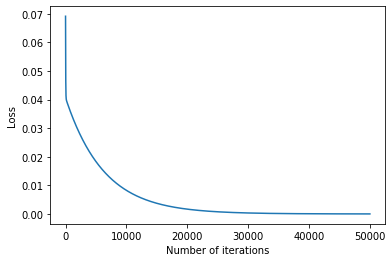

In [8]:
fig, ax = plt.subplots()
ax.plot(history.history["loss"])
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Loss")

In [24]:
data = history.history["loss"]
NUM_POINTS = 100
with open("../data/week6_shallow_network_loss.dat", "w") as f:
    for i, loss in enumerate(data, 1):
        if i % (len(data) // NUM_POINTS) == 1:
            f.write(f"{i}\t{loss}\n")

In [34]:
data = history.history["loss"]
NUM_POINTS = 300
with open("../data/week6_shallow_network_loss_1000.dat", "w") as f:
    for i, loss in enumerate(data, 1):
        if i % (1000 // NUM_POINTS) == 1:
            f.write(f"{i}\t{loss}\n")
        if i > 1000:
            break

In [10]:
model.get_weights()

[array([[ 1.4767438],
        [-2.8201437]], dtype=float32)]

In [11]:
model.predict(x_test)

array([[0.20798886],
       [0.7986863 ]], dtype=float32)

In [12]:
loss, accuracy = model.evaluate(x, y)
print(f"Accuracy: {accuracy*100:.0f}%, loss: {loss:.2f}")

5/1 [======================================================================================================================================================] - 0s 47ms/sample - loss: 1.4145e-05 - accuracy: 0.0000e+00
Accuracy: 0%, loss: 0.00


Text(0, 0.5, 'prediction for x[1]')

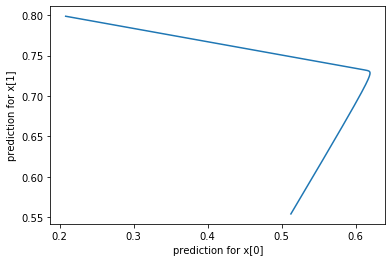

In [13]:
def predict_with_weights(x, weights):
    return np.matmul(x, weights) + bias

predictions = predict_with_weights(x_test, np.array(weights_history.weights)).T.squeeze()

fig, ax = plt.subplots()
ax.plot(*predictions)
ax.set_xlabel("prediction for x[0]")
ax.set_ylabel("prediction for x[1]")

In [35]:
NUM_POINTS = 500
data = predictions.T
with open("../data/week6_shallow_network_predictions.dat", "w") as f:
    for i, values in enumerate(data):
        if i % (len(data) // NUM_POINTS) == 0:
            f.write("\t".join(str(x) for x in values) + "\n")

In [36]:
NUM_POINTS = 500
for variable in range(predictions.shape[0]):
    with open(f"../data/week6_shallow_network_predictions_{chr(ord('a') + variable)}.dat", "w") as f:
        data = predictions[variable]
        for i, prediction in enumerate(data):
            if i % (len(data) // NUM_POINTS) == 0:
                f.write(f"{i}\t{prediction}\n")

In [73]:
NUM_POINTS = 500
data = np.array(weights_history.weights).squeeze()
with open(f"../data/week6_shallow_network_weights.dat", "w") as f:
    for i, weights in enumerate(data):
        if i % (len(data) // NUM_POINTS) == 0:
            f.write("\t".join(str(x) for x in weights) + "\n")

In [67]:
NUM_POINTS = 500
data = np.array(weights_history.weights).squeeze()
for weight in range(len(initial_weights)):
    values = data[:1000, weight]
    with open(f"../data/week6_shallow_network_weight_{weight}.dat", "w") as f:
        for i, value in enumerate(values):
            if i % (len(values) // NUM_POINTS) == 0:
                f.write(f"{i}\t{value}\n")

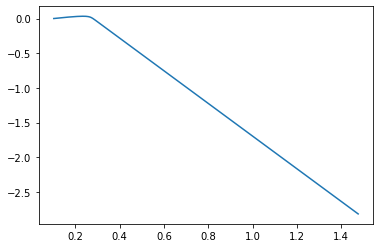

In [45]:
plt.plot(*data.T)

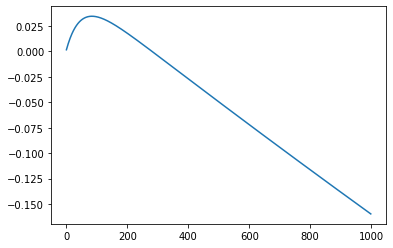

In [64]:
plt.plot(data[:1000, 1])

In [49]:
for x in data:
    print(x)

[0.10325232 0.0016024 ]
[0.10643981 0.00267734]
[0.10956379 0.00372537]
[0.11262558 0.00474706]
[0.11562645 0.00574295]
[0.11856765 0.00671356]
[0.12145042 0.00765942]
[0.12427595 0.00858103]
[0.12704542 0.0094789 ]
[0.12975998 0.01035351]
[0.13242076 0.01120535]
[0.13502887 0.01203488]
[0.13758539 0.01284255]
[0.14009137 0.01362883]
[0.14254788 0.01439414]
[0.1449559  0.01513893]
[0.14731646 0.01586361]
[0.1496305 0.0165686]
[0.151899  0.0172543]
[0.15412289 0.01792111]
[0.15630309 0.01856942]
[0.1584405 0.0191996]
[0.16053599 0.01981204]
[0.16259043 0.0204071 ]
[0.16460465 0.02098513]
[0.1665795  0.02154649]
[0.16851577 0.02209151]
[0.17041427 0.02262055]
[0.17227575 0.02313391]
[0.174101   0.02363193]
[0.17589074 0.02411493]
[0.17764573 0.0245832 ]
[0.17936665 0.02503707]
[0.18105422 0.02547681]
[0.18270913 0.02590272]
[0.18433204 0.0263151 ]
[0.18592361 0.0267142 ]
[0.18748449 0.02710032]
[0.1890153  0.02747371]
[0.19051667 0.02783465]
[0.1919892  0.02818337]
[0.19343348 0.02852014

[ 0.31590611 -0.08203316]
[ 0.31600046 -0.08225572]
[ 0.31609482 -0.08247826]
[ 0.31618917 -0.08270079]
[ 0.31628349 -0.0829233 ]
[ 0.31637782 -0.08314579]
[ 0.31647214 -0.08336826]
[ 0.31656647 -0.08359072]
[ 0.31666076 -0.08381316]
[ 0.31675506 -0.08403558]
[ 0.31684935 -0.08425798]
[ 0.31694365 -0.08448037]
[ 0.31703791 -0.08470274]
[ 0.31713217 -0.08492509]
[ 0.31722644 -0.08514742]
[ 0.3173207  -0.08536974]
[ 0.31741494 -0.08559203]
[ 0.31750917 -0.08581431]
[ 0.31760341 -0.08603657]
[ 0.31769764 -0.08625881]
[ 0.31779185 -0.08648104]
[ 0.31788605 -0.08670325]
[ 0.31798026 -0.08692544]
[ 0.31807446 -0.08714762]
[ 0.31816864 -0.08736977]
[ 0.31826282 -0.08759191]
[ 0.31835699 -0.08781403]
[ 0.31845117 -0.08803613]
[ 0.31854531 -0.08825821]
[ 0.31863946 -0.08848028]
[ 0.3187336  -0.08870233]
[ 0.31882775 -0.08892436]
[ 0.31892186 -0.08914638]
[ 0.31901598 -0.08936837]
[ 0.3191101  -0.08959035]
[ 0.31920421 -0.08981231]
[ 0.3192983  -0.09003425]
[ 0.31939238 -0.09025618]
[ 0.31948647

[ 0.35597667 -0.17654856]
[ 0.35606784 -0.17676359]
[ 0.356159  -0.1769786]
[ 0.35625014 -0.1771936 ]
[ 0.35634127 -0.17740858]
[ 0.35643241 -0.17762354]
[ 0.35652354 -0.17783849]
[ 0.35661465 -0.17805342]
[ 0.35670575 -0.17826834]
[ 0.35679686 -0.17848323]
[ 0.35688797 -0.17869811]
[ 0.35697907 -0.17891297]
[ 0.35707015 -0.17912781]
[ 0.35716122 -0.17934264]
[ 0.3572523  -0.17955746]
[ 0.35734338 -0.17977226]
[ 0.35743442 -0.17998703]
[ 0.35752547 -0.18020178]
[ 0.35761651 -0.18041652]
[ 0.35770756 -0.18063125]
[ 0.35779858 -0.18084596]
[ 0.35788959 -0.18106066]
[ 0.35798061 -0.18127532]
[ 0.35807163 -0.18148997]
[ 0.35816261 -0.18170461]
[ 0.3582536  -0.18191923]
[ 0.35834458 -0.18213384]
[ 0.35843557 -0.18234843]
[ 0.35852653 -0.18256301]
[ 0.35861748 -0.18277755]
[ 0.35870844 -0.18299209]
[ 0.3587994 -0.1832066]
[ 0.35889032 -0.18342111]
[ 0.35898125 -0.18363559]
[ 0.35907218 -0.18385006]
[ 0.35916311 -0.18406452]
[ 0.359254   -0.18427895]
[ 0.3593449  -0.18449336]
[ 0.3594358  -0.

[ 0.3902781  -0.25745663]
[ 0.39036652 -0.25766522]
[ 0.39045495 -0.25787377]
[ 0.39054337 -0.25808233]
[ 0.39063179 -0.25829086]
[ 0.39072019 -0.25849938]
[ 0.39080858 -0.25870788]
[ 0.39089698 -0.25891638]
[ 0.39098537 -0.25912485]
[ 0.39107373 -0.25933331]
[ 0.3911621  -0.25954175]
[ 0.39125046 -0.25975016]
[ 0.39133883 -0.25995857]
[ 0.39142716 -0.26016694]
[ 0.39151549 -0.26037532]
[ 0.39160383 -0.26058367]
[ 0.39169216 -0.26079202]
[ 0.39178047 -0.26100034]
[ 0.39186877 -0.26120862]
[ 0.39195707 -0.26141691]
[ 0.39204538 -0.26162517]
[ 0.39213368 -0.26183343]
[ 0.39222196 -0.26204166]
[ 0.39231023 -0.26224989]
[ 0.39239851 -0.26245809]
[ 0.39248678 -0.26266629]
[ 0.39257503 -0.26287445]
[ 0.39266327 -0.26308259]
[ 0.39275151 -0.26329073]
[ 0.39283976 -0.26349884]
[ 0.39292797 -0.26370695]
[ 0.39301619 -0.26391503]
[ 0.3931044  -0.26412311]
[ 0.39319262 -0.26433116]
[ 0.3932808  -0.26453921]
[ 0.39336899 -0.26474723]
[ 0.39345717 -0.26495522]
[ 0.39354536 -0.26516321]
[ 0.39363354

[ 0.45282641 -0.40499184]
[ 0.45290986 -0.40518865]
[ 0.4529933  -0.40538546]
[ 0.45307675 -0.40558225]
[ 0.45316017 -0.40577903]
[ 0.45324358 -0.40597579]
[ 0.453327   -0.40617254]
[ 0.45341042 -0.40636927]
[ 0.4534938  -0.40656599]
[ 0.45357719 -0.40676269]
[ 0.45366058 -0.40695938]
[ 0.45374396 -0.40715605]
[ 0.45382735 -0.40735272]
[ 0.45391071 -0.40754935]
[ 0.45399407 -0.40774599]
[ 0.45407742 -0.40794259]
[ 0.45416078 -0.4081392 ]
[ 0.45424411 -0.40833578]
[ 0.45432743 -0.40853235]
[ 0.45441076 -0.4087289 ]
[ 0.45449409 -0.40892541]
[ 0.45457742 -0.40912193]
[ 0.45466071 -0.40931842]
[ 0.45474401 -0.4095149 ]
[ 0.45482731 -0.40971136]
[ 0.45491061 -0.40990782]
[ 0.45499387 -0.41010424]
[ 0.45507714 -0.41030067]
[ 0.45516041 -0.41049707]
[ 0.45524368 -0.41069347]
[ 0.45532694 -0.41088983]
[ 0.45541018 -0.4110862 ]
[ 0.45549342 -0.41128254]
[ 0.45557666 -0.41147888]
[ 0.4556599  -0.41167518]
[ 0.4557431  -0.41187149]
[ 0.45582631 -0.41206777]
[ 0.45590952 -0.41226405]
[ 0.45599273

[ 0.48317114 -0.47656694]
[ 0.48325217 -0.47675806]
[ 0.4833332  -0.47694919]
[ 0.4834142  -0.47714028]
[ 0.48349521 -0.47733137]
[ 0.48357621 -0.47752243]
[ 0.48365721 -0.4777135 ]
[ 0.48373821 -0.47790453]
[ 0.48381919 -0.47809556]
[ 0.48390016 -0.47828656]
[ 0.48398113 -0.47847754]
[ 0.48406211 -0.47866851]
[ 0.48414305 -0.47885945]
[ 0.48422399 -0.4790504 ]
[ 0.48430493 -0.47924131]
[ 0.48438588 -0.47943223]
[ 0.48446682 -0.47962311]
[ 0.48454773 -0.47981399]
[ 0.48462865 -0.48000485]
[ 0.48470956 -0.4801957 ]
[ 0.48479047 -0.48038653]
[ 0.48487139 -0.48057735]
[ 0.48495227 -0.48076814]
[ 0.48503315 -0.48095894]
[ 0.48511404 -0.4811497 ]
[ 0.48519492 -0.48134047]
[ 0.48527578 -0.4815312 ]
[ 0.48535663 -0.48172194]
[ 0.48543748 -0.48191264]
[ 0.48551834 -0.48210335]
[ 0.48559919 -0.48229402]
[ 0.48568001 -0.4824847 ]
[ 0.48576084 -0.48267534]
[ 0.48584166 -0.48286599]
[ 0.48592249 -0.4830566 ]
[ 0.48600328 -0.48324722]
[ 0.48608407 -0.48343781]
[ 0.48616487 -0.48362839]
[ 0.48624566

[ 0.5114556  -0.54328293]
[ 0.51153439 -0.54346871]
[ 0.51161319 -0.5436545 ]
[ 0.51169193 -0.54384029]
[ 0.51177067 -0.54402608]
[ 0.5118494 -0.5442118]
[ 0.51192814 -0.54439753]
[ 0.51200688 -0.54458326]
[ 0.51208562 -0.54476899]
[ 0.51216435 -0.54495466]
[ 0.51224309 -0.54514033]
[ 0.51232183 -0.54532599]
[ 0.51240051 -0.54551166]
[ 0.51247919 -0.54569727]
[ 0.51255786 -0.54588288]
[ 0.51263654 -0.54606849]
[ 0.51271522 -0.5462541 ]
[ 0.5127939  -0.54643965]
[ 0.51287258 -0.5466252 ]
[ 0.51295125 -0.54681075]
[ 0.51302993 -0.5469963 ]
[ 0.51310861 -0.54718179]
[ 0.51318723 -0.54736727]
[ 0.51326585 -0.54755276]
[ 0.51334447 -0.54773825]
[ 0.51342309 -0.54792368]
[ 0.5135017  -0.54810911]
[ 0.51358032 -0.54829454]
[ 0.51365894 -0.54847997]
[ 0.51373756 -0.54866534]
[ 0.51381618 -0.54885072]
[ 0.51389474 -0.54903609]
[ 0.5139733  -0.54922146]
[ 0.51405185 -0.54940677]
[ 0.51413041 -0.54959208]
[ 0.51420897 -0.54977739]
[ 0.51428753 -0.5499627 ]
[ 0.51436609 -0.55014795]
[ 0.51444465 -

[ 0.54239351 -0.61625713]
[ 0.5424698  -0.61643714]
[ 0.54254609 -0.61661714]
[ 0.54262239 -0.61679709]
[ 0.54269868 -0.61697704]
[ 0.54277498 -0.61715698]
[ 0.54285127 -0.61733693]
[ 0.54292756 -0.61751682]
[ 0.54300386 -0.6176967 ]
[ 0.54308009 -0.61787659]
[ 0.54315633 -0.61805648]
[ 0.54323256 -0.6182363 ]
[ 0.54330879 -0.61841613]
[ 0.54338503 -0.61859596]
[ 0.54346126 -0.61877578]
[ 0.5435375  -0.61895555]
[ 0.54361373 -0.61913532]
[ 0.54368997 -0.61931509]
[ 0.5437662  -0.61949486]
[ 0.54384238 -0.61967456]
[ 0.54391855 -0.61985427]
[ 0.54399472 -0.62003398]
[ 0.5440709  -0.62021369]
[ 0.54414707 -0.62039334]
[ 0.54422325 -0.62057298]
[ 0.54429942 -0.62075263]
[ 0.5443756  -0.62093228]
[ 0.54445177 -0.62111193]
[ 0.54452795 -0.62129152]
[ 0.54460406 -0.62147111]
[ 0.54468018 -0.6216507 ]
[ 0.54475629 -0.62183028]
[ 0.54483241 -0.62200981]
[ 0.54490852 -0.62218934]
[ 0.54498464 -0.62236887]
[ 0.54506075 -0.6225484 ]
[ 0.54513687 -0.62272787]
[ 0.54521298 -0.62290734]
[ 0.54528904

[ 0.56962401 -0.6804865 ]
[ 0.56969815 -0.68066138]
[ 0.5697723  -0.68083626]
[ 0.56984645 -0.68101108]
[ 0.5699206 -0.6811859]
[ 0.56999469 -0.68136072]
[ 0.57006878 -0.68153554]
[ 0.57014287 -0.68171036]
[ 0.57021695 -0.68188512]
[ 0.57029104 -0.68205988]
[ 0.57036513 -0.68223464]
[ 0.57043922 -0.68240941]
[ 0.57051331 -0.68258411]
[ 0.5705874  -0.68275881]
[ 0.57066149 -0.68293351]
[ 0.57073551 -0.68310821]
[ 0.57080954 -0.68328285]
[ 0.57088357 -0.68345749]
[ 0.5709576  -0.68363214]
[ 0.57103163 -0.68380678]
[ 0.57110566 -0.68398136]
[ 0.57117969 -0.68415594]
[ 0.57125372 -0.68433052]
[ 0.57132775 -0.68450511]
[ 0.57140177 -0.68467969]
[ 0.57147574 -0.68485421]
[ 0.57154971 -0.68502873]
[ 0.57162368 -0.68520325]
[ 0.57169765 -0.68537778]
[ 0.57177162 -0.68555224]
[ 0.57184559 -0.6857267 ]
[ 0.57191956 -0.68590117]
[ 0.57199353 -0.68607563]
[ 0.5720675  -0.68625003]
[ 0.57214147 -0.68642443]
[ 0.57221538 -0.68659884]
[ 0.57228929 -0.68677324]
[ 0.5723632  -0.68694764]
[ 0.57243711 -

[ 0.59319407 -0.73608226]
[ 0.59326631 -0.73625273]
[ 0.59333855 -0.73642313]
[ 0.59341079 -0.73659354]
[ 0.59348303 -0.73676395]
[ 0.59355527 -0.73693436]
[ 0.59362751 -0.73710471]
[ 0.59369975 -0.73727506]
[ 0.59377199 -0.73744541]
[ 0.59384423 -0.73761576]
[ 0.59391642 -0.73778611]
[ 0.5939886 -0.7379564]
[ 0.59406078 -0.7381267 ]
[ 0.59413296 -0.73829699]
[ 0.59420514 -0.73846728]
[ 0.59427732 -0.73863751]
[ 0.5943495  -0.73880774]
[ 0.59442168 -0.73897797]
[ 0.59449387 -0.7391482 ]
[ 0.59456605 -0.73931837]
[ 0.59463823 -0.73948854]
[ 0.59471035 -0.73965871]
[ 0.59478247 -0.73982888]
[ 0.59485459 -0.73999906]
[ 0.59492671 -0.74016917]
[ 0.59499884 -0.74033928]
[ 0.59507096 -0.74050939]
[ 0.59514308 -0.7406795 ]
[ 0.5952152  -0.74084955]
[ 0.59528732 -0.74101961]
[ 0.59535944 -0.74118966]
[ 0.59543151 -0.74135971]
[ 0.59550357 -0.74152976]
[ 0.59557563 -0.74169976]
[ 0.59564769 -0.74186975]
[ 0.59571975 -0.74203974]
[ 0.59579182 -0.74220973]
[ 0.59586388 -0.74237967]
[ 0.59593594 -

[ 0.65709662 -0.88681167]
[ 0.6571638 -0.8869701]
[ 0.65723097 -0.88712853]
[ 0.65729815 -0.88728696]
[ 0.65736532 -0.88744533]
[ 0.6574325 -0.8876037]
[ 0.65749961 -0.88776207]
[ 0.65756673 -0.88792044]
[ 0.65763384 -0.88807881]
[ 0.65770096 -0.88823712]
[ 0.65776807 -0.88839543]
[ 0.65783519 -0.88855374]
[ 0.6579023  -0.88871205]
[ 0.65796942 -0.88887036]
[ 0.65803653 -0.88902861]
[ 0.65810364 -0.88918686]
[ 0.65817076 -0.88934511]
[ 0.65823781 -0.88950336]
[ 0.65830487 -0.88966155]
[ 0.65837193 -0.88981974]
[ 0.65843898 -0.88997793]
[ 0.65850604 -0.89013612]
[ 0.65857309 -0.89029431]
[ 0.65864015 -0.89045244]
[ 0.6587072  -0.89061058]
[ 0.65877426 -0.89076871]
[ 0.65884131 -0.89092684]
[ 0.65890837 -0.89108497]
[ 0.65897536 -0.89124304]
[ 0.65904236 -0.89140111]
[ 0.65910935 -0.89155918]
[ 0.65917635 -0.89171726]
[ 0.65924335 -0.89187533]
[ 0.65931034 -0.89203334]
[ 0.65937734 -0.89219135]
[ 0.65944433 -0.89234936]
[ 0.65951133 -0.89250737]
[ 0.65957832 -0.89266533]
[ 0.65964532 -0.

[ 0.67838526 -0.9370259 ]
[ 0.6784507  -0.93718034]
[ 0.67851615 -0.93733478]
[ 0.6785816  -0.93748921]
[ 0.67864704 -0.93764359]
[ 0.67871249 -0.93779796]
[ 0.67877793 -0.93795234]
[ 0.67884338 -0.93810672]
[ 0.67890882 -0.93826103]
[ 0.67897427 -0.93841535]
[ 0.67903972 -0.93856966]
[ 0.67910516 -0.93872398]
[ 0.67917055 -0.9388783 ]
[ 0.67923594 -0.93903255]
[ 0.67930132 -0.93918681]
[ 0.67936671 -0.93934107]
[ 0.67943209 -0.93949533]
[ 0.67949748 -0.93964958]
[ 0.67956287 -0.93980378]
[ 0.67962825 -0.93995798]
[ 0.67969364 -0.94011217]
[ 0.67975903 -0.94026637]
[ 0.67982441 -0.94042057]
[ 0.6798898  -0.94057471]
[ 0.67995512 -0.94072884]
[ 0.68002045 -0.94088298]
[ 0.68008578 -0.94103712]
[ 0.6801511  -0.94119126]
[ 0.68021643 -0.94134533]
[ 0.68028176 -0.94149941]
[ 0.68034708 -0.94165349]
[ 0.68041241 -0.94180757]
[ 0.68047774 -0.94196165]
[ 0.68054307 -0.94211566]
[ 0.68060839 -0.94226968]
[ 0.68067366 -0.9424237 ]
[ 0.68073893 -0.94257772]
[ 0.68080419 -0.94273174]
[ 0.68086946

[ 0.7049228  -0.99962103]
[ 0.70498616 -0.99977046]
[ 0.70504951 -0.99991989]
[ 0.70511287 -1.00006926]
[ 0.70517623 -1.00021863]
[ 0.70523959 -1.000368  ]
[ 0.70530295 -1.00051737]
[ 0.70536625 -1.00066674]
[ 0.70542955 -1.00081611]
[ 0.70549285 -1.00096548]
[ 0.70555615 -1.00111485]
[ 0.70561945 -1.00126421]
[ 0.70568275 -1.00141358]
[ 0.70574605 -1.00156283]
[ 0.70580935 -1.00171208]
[ 0.70587265 -1.00186133]
[ 0.70593596 -1.00201058]
[ 0.70599926 -1.00215983]
[ 0.7060625  -1.00230908]
[ 0.70612574 -1.00245833]
[ 0.70618898 -1.00260758]
[ 0.70625222 -1.00275683]
[ 0.70631546 -1.00290608]
[ 0.7063787  -1.00305521]
[ 0.70644194 -1.00320435]
[ 0.70650518 -1.00335348]
[ 0.70656842 -1.00350261]
[ 0.70663166 -1.00365174]
[ 0.7066949  -1.00380087]
[ 0.70675814 -1.00395   ]
[ 0.70682138 -1.00409913]
[ 0.70688456 -1.00424826]
[ 0.70694774 -1.00439739]
[ 0.70701092 -1.0045464 ]
[ 0.70707411 -1.00469542]
[ 0.70713729 -1.00484443]
[ 0.70720047 -1.00499344]
[ 0.70726365 -1.00514245]
[ 0.70732683

[ 0.73512715 -1.07086515]
[ 0.73518813 -1.07100892]
[ 0.73524904 -1.07115269]
[ 0.73530996 -1.07129645]
[ 0.73537087 -1.07144022]
[ 0.73543179 -1.07158399]
[ 0.73549271 -1.07172775]
[ 0.73555362 -1.0718714 ]
[ 0.73561454 -1.07201505]
[ 0.73567545 -1.07215869]
[ 0.73573637 -1.07230234]
[ 0.73579729 -1.07244599]
[ 0.7358582  -1.07258964]
[ 0.73591912 -1.07273328]
[ 0.73598003 -1.07287693]
[ 0.73604089 -1.07302058]
[ 0.73610175 -1.07316422]
[ 0.7361626  -1.07330775]
[ 0.73622346 -1.07345128]
[ 0.73628432 -1.07359481]
[ 0.73634517 -1.07373834]
[ 0.73640603 -1.07388186]
[ 0.73646688 -1.07402539]
[ 0.73652774 -1.07416892]
[ 0.7365886  -1.07431245]
[ 0.73664945 -1.07445598]
[ 0.73671031 -1.0745995 ]
[ 0.73677111 -1.07474303]
[ 0.7368319  -1.07488644]
[ 0.7368927  -1.07502985]
[ 0.7369535  -1.07517326]
[ 0.73701429 -1.07531667]
[ 0.73707509 -1.07546008]
[ 0.73713589 -1.07560349]
[ 0.73719668 -1.07574689]
[ 0.73725748 -1.0758903 ]
[ 0.73731828 -1.07603371]
[ 0.73737907 -1.07617712]
[ 0.73743987

[ 0.75823772 -1.12537718]
[ 0.75829685 -1.12551665]
[ 0.75835598 -1.12565601]
[ 0.7584151  -1.12579536]
[ 0.75847417 -1.12593472]
[ 0.75853324 -1.12607408]
[ 0.75859231 -1.12621343]
[ 0.75865138 -1.12635279]
[ 0.75871044 -1.12649214]
[ 0.75876951 -1.1266315 ]
[ 0.75882858 -1.12677085]
[ 0.75888765 -1.12691021]
[ 0.75894672 -1.12704957]
[ 0.75900578 -1.1271888 ]
[ 0.75906485 -1.12732804]
[ 0.75912392 -1.12746727]
[ 0.75918299 -1.12760651]
[ 0.759242   -1.12774575]
[ 0.75930101 -1.12788498]
[ 0.75936002 -1.12802422]
[ 0.75941902 -1.12816346]
[ 0.75947803 -1.12830269]
[ 0.75953704 -1.12844193]
[ 0.75959605 -1.12858117]
[ 0.75965506 -1.12872028]
[ 0.75971407 -1.1288594 ]
[ 0.75977308 -1.12899852]
[ 0.75983208 -1.12913764]
[ 0.75989109 -1.12927675]
[ 0.75995004 -1.12941587]
[ 0.76000899 -1.12955499]
[ 0.76006794 -1.1296941 ]
[ 0.76012689 -1.12983322]
[ 0.76018584 -1.12997234]
[ 0.76024479 -1.13011134]
[ 0.76030374 -1.13025033]
[ 0.76036268 -1.13038933]
[ 0.76042163 -1.13052833]
[ 0.76048058

[ 0.77869821 -1.17363787]
[ 0.77875566 -1.17377341]
[ 0.77881312 -1.17390895]
[ 0.77887058 -1.17404449]
[ 0.77892804 -1.17418003]
[ 0.7789855  -1.17431557]
[ 0.77904296 -1.17445111]
[ 0.77910042 -1.17458665]
[ 0.77915788 -1.17472219]
[ 0.77921534 -1.17485774]
[ 0.77927279 -1.17499316]
[ 0.77933025 -1.17512858]
[ 0.77938765 -1.175264  ]
[ 0.77944505 -1.17539942]
[ 0.77950245 -1.17553484]
[ 0.77955985 -1.17567027]
[ 0.77961725 -1.17580569]
[ 0.77967465 -1.17594111]
[ 0.77973205 -1.17607653]
[ 0.77978945 -1.17621195]
[ 0.77984685 -1.17634737]
[ 0.77990425 -1.17648268]
[ 0.77996165 -1.17661798]
[ 0.78001904 -1.17675328]
[ 0.78007644 -1.17688859]
[ 0.78013378 -1.17702389]
[ 0.78019112 -1.17715919]
[ 0.78024846 -1.17729449]
[ 0.7803058 -1.1774298]
[ 0.78036314 -1.1775651 ]
[ 0.78042048 -1.1777004 ]
[ 0.78047782 -1.1778357 ]
[ 0.78053516 -1.17797089]
[ 0.7805925  -1.17810607]
[ 0.78064984 -1.17824125]
[ 0.78070718 -1.17837644]
[ 0.78076452 -1.17851162]
[ 0.78082186 -1.1786468 ]
[ 0.78087914 -

[ 0.80913442 -1.24542904]
[ 0.8091895  -1.24555886]
[ 0.80924457 -1.24568868]
[ 0.80929959 -1.2458185 ]
[ 0.8093546  -1.24594831]
[ 0.80940962 -1.24607813]
[ 0.80946463 -1.24620795]
[ 0.80951965 -1.24633777]
[ 0.80957466 -1.24646759]
[ 0.80962968 -1.24659741]
[ 0.80968469 -1.24672723]
[ 0.80973971 -1.24685693]
[ 0.80979472 -1.24698663]
[ 0.80984974 -1.24711633]
[ 0.80990475 -1.24724603]
[ 0.80995977 -1.24737573]
[ 0.81001478 -1.24750543]
[ 0.81006974 -1.24763513]
[ 0.8101247  -1.24776483]
[ 0.81017965 -1.24789453]
[ 0.81023461 -1.24802423]
[ 0.81028956 -1.24815392]
[ 0.81034452 -1.24828351]
[ 0.81039947 -1.24841309]
[ 0.81045443 -1.24854267]
[ 0.81050938 -1.24867225]
[ 0.81056434 -1.24880183]
[ 0.81061929 -1.24893141]
[ 0.81067425 -1.24906099]
[ 0.81072921 -1.24919057]
[ 0.8107841  -1.24932015]
[ 0.810839   -1.24944973]
[ 0.81089389 -1.24957931]
[ 0.81094879 -1.24970889]
[ 0.81100368 -1.24983835]
[ 0.81105858 -1.24996781]
[ 0.81111348 -1.25009727]
[ 0.81116837 -1.25022674]
[ 0.81122327

[ 0.83612096 -1.30908322]
[ 0.83617389 -1.30920804]
[ 0.83622682 -1.30933285]
[ 0.83627969 -1.30945766]
[ 0.83633256 -1.30958247]
[ 0.83638543 -1.30970716]
[ 0.8364383  -1.30983186]
[ 0.83649117 -1.30995655]
[ 0.83654404 -1.31008124]
[ 0.83659691 -1.31020594]
[ 0.83664978 -1.31033063]
[ 0.83670264 -1.31045532]
[ 0.83675551 -1.31058002]
[ 0.83680838 -1.31070471]
[ 0.83686125 -1.3108294 ]
[ 0.83691412 -1.31095409]
[ 0.83696699 -1.31107879]
[ 0.8370198  -1.31120336]
[ 0.83707261 -1.31132793]
[ 0.83712542 -1.31145251]
[ 0.83717823 -1.31157708]
[ 0.83723104 -1.31170166]
[ 0.83728385 -1.31182623]
[ 0.83733666 -1.3119508 ]
[ 0.83738947 -1.31207538]
[ 0.83744228 -1.31219995]
[ 0.83749509 -1.31232452]
[ 0.8375479 -1.3124491]
[ 0.83760071 -1.31257367]
[ 0.83765352 -1.31269813]
[ 0.83770633 -1.31282258]
[ 0.83775908 -1.31294703]
[ 0.83781183 -1.31307149]
[ 0.83786458 -1.31319594]
[ 0.83791733 -1.3133204 ]
[ 0.83797008 -1.31344485]
[ 0.83802283 -1.31356931]
[ 0.83807558 -1.31369376]
[ 0.83812833 -

[ 0.86200255 -1.37013113]
[ 0.86205339 -1.37025106]
[ 0.86210424 -1.37037098]
[ 0.86215508 -1.37049091]
[ 0.86220592 -1.37061083]
[ 0.86225677 -1.37073076]
[ 0.86230761 -1.37085068]
[ 0.86235845 -1.37097049]
[ 0.86240923 -1.37109029]
[ 0.86246002 -1.3712101 ]
[ 0.8625108 -1.3713299]
[ 0.86256158 -1.37144971]
[ 0.86261237 -1.37156951]
[ 0.86266315 -1.37168932]
[ 0.86271393 -1.37180912]
[ 0.86276472 -1.37192893]
[ 0.8628155  -1.37204874]
[ 0.86286628 -1.37216854]
[ 0.86291707 -1.37228835]
[ 0.86296785 -1.37240815]
[ 0.86301863 -1.37252784]
[ 0.86306942 -1.37264752]
[ 0.8631202  -1.37276721]
[ 0.86317092 -1.3728869 ]
[ 0.86322165 -1.37300658]
[ 0.86327237 -1.37312627]
[ 0.86332309 -1.37324595]
[ 0.86337382 -1.37336564]
[ 0.86342454 -1.37348533]
[ 0.86347526 -1.37360501]
[ 0.86352599 -1.3737247 ]
[ 0.86357671 -1.37384439]
[ 0.86362743 -1.37396395]
[ 0.86367816 -1.37408352]
[ 0.86372888 -1.37420309]
[ 0.8637796  -1.37432265]
[ 0.86383033 -1.37444222]
[ 0.86388105 -1.37456179]
[ 0.86393172 -

[ 0.88692391 -1.42891419]
[ 0.88697278 -1.42902946]
[ 0.88702166 -1.42914474]
[ 0.88707054 -1.42926002]
[ 0.88711935 -1.42937517]
[ 0.88716817 -1.42949033]
[ 0.88721699 -1.42960548]
[ 0.8872658  -1.42972064]
[ 0.88731462 -1.4298358 ]
[ 0.88736343 -1.42995095]
[ 0.88741225 -1.43006611]
[ 0.88746107 -1.43018126]
[ 0.88750988 -1.43029642]
[ 0.8875587  -1.43041158]
[ 0.88760751 -1.43052673]
[ 0.88765633 -1.43064189]
[ 0.88770515 -1.43075705]
[ 0.88775396 -1.43087208]
[ 0.88780278 -1.43098712]
[ 0.88785154 -1.43110216]
[ 0.88790029 -1.43121719]
[ 0.88794905 -1.43133223]
[ 0.88799781 -1.43144727]
[ 0.88804656 -1.4315623 ]
[ 0.88809532 -1.43167734]
[ 0.88814408 -1.43179238]
[ 0.88819283 -1.43190742]
[ 0.88824159 -1.43202245]
[ 0.88829035 -1.43213749]
[ 0.8883391  -1.43225241]
[ 0.88838786 -1.43236732]
[ 0.88843662 -1.43248224]
[ 0.88848537 -1.43259716]
[ 0.88853413 -1.43271208]
[ 0.88858283 -1.432827  ]
[ 0.88863152 -1.43294191]
[ 0.88868022 -1.43305683]
[ 0.88872892 -1.43317175]
[ 0.88877761

[ 0.90851969 -1.47985291]
[ 0.90856683 -1.47996414]
[ 0.90861398 -1.48007536]
[ 0.90866113 -1.48018646]
[ 0.90870827 -1.48029757]
[ 0.90875542 -1.48040867]
[ 0.90880251 -1.48051977]
[ 0.9088496  -1.48063087]
[ 0.90889668 -1.48074198]
[ 0.90894377 -1.48085308]
[ 0.90899086 -1.48096418]
[ 0.90903795 -1.48107529]
[ 0.90908504 -1.48118639]
[ 0.90913212 -1.48129749]
[ 0.90917921 -1.4814086 ]
[ 0.9092263 -1.4815197]
[ 0.90927339 -1.48163068]
[ 0.90932047 -1.48174167]
[ 0.90936756 -1.48185265]
[ 0.90941465 -1.48196363]
[ 0.90946174 -1.48207462]
[ 0.90950876 -1.4821856 ]
[ 0.90955579 -1.48229659]
[ 0.90960282 -1.48240757]
[ 0.90964985 -1.48251855]
[ 0.90969688 -1.48262954]
[ 0.90974391 -1.48274052]
[ 0.90979093 -1.48285151]
[ 0.90983796 -1.48296249]
[ 0.90988499 -1.48307347]
[ 0.90993202 -1.48318434]
[ 0.90997905 -1.4832952 ]
[ 0.91002607 -1.48340607]
[ 0.9100731  -1.48351693]
[ 0.91012013 -1.4836278 ]
[ 0.91016716 -1.48373866]
[ 0.91021419 -1.48384953]
[ 0.91026115 -1.48396039]
[ 0.91030812 -

[ 0.93148792 -1.53402901]
[ 0.93153322 -1.53413582]
[ 0.93157852 -1.53424263]
[ 0.93162382 -1.53434944]
[ 0.93166912 -1.53445625]
[ 0.93171442 -1.53456306]
[ 0.93175972 -1.53466988]
[ 0.93180501 -1.53477669]
[ 0.93185031 -1.5348835 ]
[ 0.93189561 -1.53499031]
[ 0.93194091 -1.53509712]
[ 0.93198615 -1.53520393]
[ 0.93203139 -1.53531075]
[ 0.93207663 -1.53541756]
[ 0.93212187 -1.53552425]
[ 0.93216711 -1.53563094]
[ 0.93221235 -1.53573763]
[ 0.93225759 -1.53584433]
[ 0.93230283 -1.53595102]
[ 0.93234807 -1.53605771]
[ 0.93239331 -1.5361644 ]
[ 0.93243855 -1.5362711 ]
[ 0.93248379 -1.53637779]
[ 0.93252903 -1.53648448]
[ 0.93257427 -1.53659117]
[ 0.93261951 -1.53669786]
[ 0.93266475 -1.53680456]
[ 0.93270993 -1.53691125]
[ 0.93275511 -1.53701782]
[ 0.93280029 -1.5371244 ]
[ 0.93284547 -1.53723097]
[ 0.93289065 -1.53733754]
[ 0.93293583 -1.53744411]
[ 0.93298101 -1.53755069]
[ 0.93302619 -1.53765726]
[ 0.93307137 -1.53776383]
[ 0.93311656 -1.53787041]
[ 0.93316174 -1.53797698]
[ 0.93320692

[ 0.94901669 -1.57537472]
[ 0.94906062 -1.57547832]
[ 0.94910455 -1.57558191]
[ 0.94914848 -1.5756855 ]
[ 0.94919235 -1.57578909]
[ 0.94923621 -1.57589257]
[ 0.94928008 -1.57599604]
[ 0.94932395 -1.57609951]
[ 0.94936782 -1.57620299]
[ 0.94941169 -1.57630646]
[ 0.94945556 -1.57640994]
[ 0.94949943 -1.57651341]
[ 0.9495433  -1.57661688]
[ 0.94958717 -1.57672036]
[ 0.94963104 -1.57682383]
[ 0.9496749 -1.5769273]
[ 0.94971877 -1.57703078]
[ 0.94976264 -1.57713425]
[ 0.94980651 -1.57723773]
[ 0.94985038 -1.5773412 ]
[ 0.94989425 -1.57744455]
[ 0.94993806 -1.57754791]
[ 0.94998187 -1.57765126]
[ 0.95002568 -1.57775462]
[ 0.95006949 -1.57785797]
[ 0.9501133  -1.57796133]
[ 0.95015711 -1.57806468]
[ 0.95020092 -1.57816803]
[ 0.95024472 -1.57827139]
[ 0.95028853 -1.57837474]
[ 0.95033234 -1.5784781 ]
[ 0.95037615 -1.57858145]
[ 0.95041996 -1.57868481]
[ 0.95046377 -1.57878816]
[ 0.95050758 -1.5788914 ]
[ 0.95055139 -1.57899463]
[ 0.9505952  -1.57909787]
[ 0.95063901 -1.5792011 ]
[ 0.95068276 -

[ 0.96464163 -1.61222994]
[ 0.96468431 -1.61233056]
[ 0.96472698 -1.61243117]
[ 0.96476966 -1.61253178]
[ 0.96481234 -1.61263239]
[ 0.96485502 -1.61273301]
[ 0.96489763 -1.61283362]
[ 0.96494025 -1.61293423]
[ 0.96498287 -1.61303484]
[ 0.96502548 -1.61313546]
[ 0.9650681  -1.61323607]
[ 0.96511072 -1.61333656]
[ 0.96515334 -1.61343706]
[ 0.96519595 -1.61353755]
[ 0.96523857 -1.61363804]
[ 0.96528119 -1.61373854]
[ 0.96532381 -1.61383903]
[ 0.96536642 -1.61393952]
[ 0.96540904 -1.61404002]
[ 0.96545166 -1.61414051]
[ 0.96549428 -1.614241  ]
[ 0.96553689 -1.6143415 ]
[ 0.96557951 -1.61444199]
[ 0.96562207 -1.61454248]
[ 0.96566463 -1.61464298]
[ 0.96570718 -1.61474347]
[ 0.96574974 -1.61484385]
[ 0.9657923  -1.61494422]
[ 0.96583486 -1.61504459]
[ 0.96587741 -1.61514497]
[ 0.96591997 -1.61524534]
[ 0.96596253 -1.61534572]
[ 0.96600509 -1.61544609]
[ 0.96604764 -1.61554646]
[ 0.9660902  -1.61564684]
[ 0.96613276 -1.61574721]
[ 0.96617532 -1.61584759]
[ 0.96621788 -1.61594796]
[ 0.96626043

[ 0.9897995 -1.6715709]
[ 0.98984015 -1.67166674]
[ 0.9898808  -1.67176259]
[ 0.98992145 -1.67185843]
[ 0.9899621  -1.67195427]
[ 0.99000275 -1.67205012]
[ 0.9900434  -1.67214596]
[ 0.99008405 -1.67224181]
[ 0.9901247  -1.67233765]
[ 0.99016535 -1.6724335 ]
[ 0.990206   -1.67252934]
[ 0.99024665 -1.67262518]
[ 0.99028724 -1.67272103]
[ 0.99032784 -1.67281687]
[ 0.99036843 -1.67291272]
[ 0.99040902 -1.67300856]
[ 0.99044961 -1.67310429]
[ 0.9904902  -1.67320001]
[ 0.99053079 -1.67329574]
[ 0.99057138 -1.67339146]
[ 0.99061197 -1.67348719]
[ 0.99065256 -1.67358291]
[ 0.99069315 -1.67367864]
[ 0.99073374 -1.67377436]
[ 0.99077433 -1.67387009]
[ 0.99081492 -1.67396581]
[ 0.99085552 -1.67406154]
[ 0.99089611 -1.67415726]
[ 0.9909367  -1.67425299]
[ 0.99097729 -1.67434871]
[ 0.99101788 -1.67444444]
[ 0.99105841 -1.67454016]
[ 0.99109894 -1.67463577]
[ 0.99113947 -1.67473137]
[ 0.99118    -1.67482698]
[ 0.99122053 -1.67492259]
[ 0.99126107 -1.67501819]
[ 0.9913016 -1.6751138]
[ 0.99134213 -1.

[ 1.01361966 -1.72775698]
[ 1.0136584  -1.72784841]
[ 1.01369715 -1.72793984]
[ 1.01373589 -1.72803128]
[ 1.01377463 -1.72812271]
[ 1.01381338 -1.72821414]
[ 1.01385212 -1.72830558]
[ 1.01389086 -1.72839689]
[ 1.01392961 -1.72848821]
[ 1.01396835 -1.72857952]
[ 1.01400709 -1.72867084]
[ 1.01404583 -1.72876215]
[ 1.01408458 -1.72885346]
[ 1.01412332 -1.72894478]
[ 1.01416206 -1.72903609]
[ 1.01420081 -1.72912741]
[ 1.01423955 -1.72921872]
[ 1.01427829 -1.72931004]
[ 1.01431704 -1.72940135]
[ 1.01435578 -1.72949266]
[ 1.01439452 -1.72958398]
[ 1.01443326 -1.72967529]
[ 1.01447201 -1.72976661]
[ 1.01451075 -1.72985792]
[ 1.01454949 -1.72994912]
[ 1.01458812 -1.73004031]
[ 1.01462674 -1.73013151]
[ 1.01466537 -1.7302227 ]
[ 1.01470399 -1.7303139 ]
[ 1.01474261 -1.73040509]
[ 1.01478124 -1.73049629]
[ 1.01481986 -1.73058748]
[ 1.01485848 -1.73067868]
[ 1.01489711 -1.73076987]
[ 1.01493573 -1.73086107]
[ 1.01497436 -1.73095226]
[ 1.01501298 -1.73104346]
[ 1.0150516  -1.73113465]
[ 1.01509023

[ 1.0388335  -1.78722966]
[ 1.03887022 -1.78731632]
[ 1.03890693 -1.78740299]
[ 1.03894365 -1.78748965]
[ 1.03898036 -1.78757632]
[ 1.03901708 -1.78766298]
[ 1.0390538  -1.78774965]
[ 1.03909051 -1.78783631]
[ 1.03912723 -1.78792298]
[ 1.03916395 -1.78800964]
[ 1.03920066 -1.78809631]
[ 1.03923738 -1.78818297]
[ 1.0392741  -1.78826952]
[ 1.03931081 -1.78835607]
[ 1.03934753 -1.78844261]
[ 1.03938425 -1.78852916]
[ 1.03942096 -1.7886157 ]
[ 1.03945768 -1.78870225]
[ 1.0394944 -1.7887888]
[ 1.03953111 -1.78887534]
[ 1.03956783 -1.78896189]
[ 1.03960454 -1.78904843]
[ 1.03964126 -1.78913498]
[ 1.03967798 -1.78922153]
[ 1.03971469 -1.78930807]
[ 1.03975141 -1.78939462]
[ 1.03978813 -1.78948116]
[ 1.03982484 -1.78956771]
[ 1.03986156 -1.78965425]
[ 1.03989828 -1.7897408 ]
[ 1.03993499 -1.78982723]
[ 1.03997171 -1.78991365]
[ 1.04000843 -1.79000008]
[ 1.04004502 -1.79008651]
[ 1.04008162 -1.79017293]
[ 1.04011822 -1.79025936]
[ 1.04015481 -1.79034579]
[ 1.04019141 -1.79043221]
[ 1.04022801 -

[ 1.05475867 -1.82479262]
[ 1.05479419 -1.82487631]
[ 1.05482972 -1.82495999]
[ 1.05486524 -1.82504368]
[ 1.05490077 -1.82512736]
[ 1.05493629 -1.82521105]
[ 1.05497169 -1.82529473]
[ 1.0550071  -1.82537842]
[ 1.05504251 -1.8254621 ]
[ 1.05507791 -1.82554579]
[ 1.05511332 -1.82562947]
[ 1.05514872 -1.82571304]
[ 1.05518413 -1.8257966 ]
[ 1.05521953 -1.82588017]
[ 1.05525494 -1.82596374]
[ 1.05529034 -1.8260473 ]
[ 1.05532575 -1.82613087]
[ 1.05536115 -1.82621443]
[ 1.05539656 -1.826298  ]
[ 1.05543196 -1.82638156]
[ 1.05546737 -1.82646513]
[ 1.05550277 -1.8265487 ]
[ 1.05553818 -1.82663226]
[ 1.05557358 -1.82671583]
[ 1.05560899 -1.82679939]
[ 1.05564439 -1.82688296]
[ 1.0556798  -1.82696652]
[ 1.0557152  -1.82705009]
[ 1.05575061 -1.82713354]
[ 1.05578601 -1.82721698]
[ 1.05582142 -1.82730043]
[ 1.05585682 -1.82738388]
[ 1.05589223 -1.82746732]
[ 1.05592763 -1.82755077]
[ 1.05596304 -1.82763422]
[ 1.05599844 -1.82771766]
[ 1.05603385 -1.82780111]
[ 1.05606925 -1.82788455]
[ 1.05610466

[ 1.07037318 -1.86162388]
[ 1.07040739 -1.86170459]
[ 1.0704416  -1.86178529]
[ 1.07047582 -1.861866  ]
[ 1.07051003 -1.8619467 ]
[ 1.07054424 -1.86202741]
[ 1.07057846 -1.86210811]
[ 1.07061267 -1.86218882]
[ 1.07064688 -1.86226952]
[ 1.0706811  -1.86235023]
[ 1.07071531 -1.86243093]
[ 1.07074952 -1.86251163]
[ 1.07078373 -1.86259234]
[ 1.07081795 -1.86267304]
[ 1.07085216 -1.86275375]
[ 1.07088637 -1.86283445]
[ 1.07092059 -1.86291516]
[ 1.0709548  -1.86299586]
[ 1.07098901 -1.86307645]
[ 1.07102323 -1.86315703]
[ 1.07105744 -1.86323762]
[ 1.07109165 -1.8633182 ]
[ 1.07112586 -1.86339879]
[ 1.07116008 -1.86347938]
[ 1.07119429 -1.86355996]
[ 1.0712285  -1.86364055]
[ 1.07126272 -1.86372113]
[ 1.07129693 -1.86380172]
[ 1.07133114 -1.8638823 ]
[ 1.07136536 -1.86396289]
[ 1.07139957 -1.86404347]
[ 1.07143366 -1.86412406]
[ 1.07146776 -1.86420465]
[ 1.07150185 -1.86428523]
[ 1.07153594 -1.86436582]
[ 1.07157004 -1.8644464 ]
[ 1.07160413 -1.86452699]
[ 1.07163823 -1.86460745]
[ 1.07167232

[ 1.09503984 -1.91980577]
[ 1.09507215 -1.91988182]
[ 1.09510446 -1.91995788]
[ 1.09513676 -1.92003393]
[ 1.09516907 -1.92010999]
[ 1.09520137 -1.92018604]
[ 1.09523368 -1.9202621 ]
[ 1.09526598 -1.92033815]
[ 1.09529829 -1.92041421]
[ 1.0953306  -1.92049026]
[ 1.09536278 -1.92056632]
[ 1.09539497 -1.92064238]
[ 1.09542716 -1.92071843]
[ 1.09545934 -1.92079449]
[ 1.09549153 -1.92087054]
[ 1.09552372 -1.9209466 ]
[ 1.0955559  -1.92102265]
[ 1.09558809 -1.92109871]
[ 1.09562027 -1.92117476]
[ 1.09565246 -1.92125082]
[ 1.09568465 -1.92132688]
[ 1.09571683 -1.92140281]
[ 1.09574902 -1.92147875]
[ 1.09578121 -1.92155468]
[ 1.09581339 -1.92163062]
[ 1.09584558 -1.92170656]
[ 1.09587777 -1.92178249]
[ 1.09590995 -1.92185843]
[ 1.09594214 -1.92193437]
[ 1.09597433 -1.9220103 ]
[ 1.09600651 -1.92208624]
[ 1.0960387  -1.92216218]
[ 1.09607089 -1.92223811]
[ 1.09610307 -1.92231405]
[ 1.09613526 -1.92238998]
[ 1.09616745 -1.92246592]
[ 1.09619963 -1.92254186]
[ 1.09623182 -1.92261779]
[ 1.096264  

[ 1.10973954 -1.95447898]
[ 1.10977066 -1.95455229]
[ 1.10980177 -1.95462561]
[ 1.10983288 -1.95469892]
[ 1.109864   -1.95477223]
[ 1.10989511 -1.95484555]
[ 1.10992622 -1.95491886]
[ 1.10995734 -1.95499218]
[ 1.10998845 -1.95506549]
[ 1.11001956 -1.9551388 ]
[ 1.11005068 -1.95521212]
[ 1.11008179 -1.95528543]
[ 1.11011291 -1.95535874]
[ 1.11014402 -1.95543206]
[ 1.11017513 -1.95550537]
[ 1.11020625 -1.95557868]
[ 1.11023736 -1.955652  ]
[ 1.11026847 -1.95572531]
[ 1.11029959 -1.95579863]
[ 1.1103307  -1.95587182]
[ 1.1103617  -1.95594501]
[ 1.11039269 -1.95601821]
[ 1.11042368 -1.9560914 ]
[ 1.11045468 -1.9561646 ]
[ 1.11048567 -1.95623779]
[ 1.11051667 -1.95631099]
[ 1.11054766 -1.95638418]
[ 1.11057866 -1.95645738]
[ 1.11060965 -1.95653057]
[ 1.11064065 -1.95660377]
[ 1.11067164 -1.95667696]
[ 1.11070263 -1.95675015]
[ 1.11073363 -1.95682335]
[ 1.11076462 -1.95689654]
[ 1.11079562 -1.95696974]
[ 1.11082661 -1.95704293]
[ 1.11085761 -1.95711613]
[ 1.1108886  -1.95718932]
[ 1.11091959

[ 1.12819743 -1.99801481]
[ 1.12822711 -1.99808466]
[ 1.12825668 -1.99815452]
[ 1.12828624 -1.99822438]
[ 1.12831581 -1.99829423]
[ 1.12834537 -1.99836409]
[ 1.12837493 -1.99843395]
[ 1.1284045 -1.9985038]
[ 1.12843406 -1.99857366]
[ 1.12846363 -1.99864352]
[ 1.12849319 -1.99871337]
[ 1.12852275 -1.99878323]
[ 1.12855232 -1.99885309]
[ 1.12858188 -1.99892294]
[ 1.12861145 -1.9989928 ]
[ 1.12864101 -1.99906266]
[ 1.12867057 -1.99913239]
[ 1.12870014 -1.99920213]
[ 1.1287297  -1.99927187]
[ 1.12875926 -1.99934161]
[ 1.12878883 -1.99941134]
[ 1.12881839 -1.99948108]
[ 1.12884796 -1.99955082]
[ 1.12887752 -1.99962056]
[ 1.12890708 -1.99969029]
[ 1.12893665 -1.99976003]
[ 1.12896621 -1.99982977]
[ 1.12899578 -1.99989951]
[ 1.12902534 -1.99996924]
[ 1.1290549  -2.00003886]
[ 1.12908447 -2.00010848]
[ 1.12911403 -2.0001781 ]
[ 1.1291436  -2.00024772]
[ 1.12917316 -2.00031734]
[ 1.12920272 -2.00038695]
[ 1.12923229 -2.00045657]
[ 1.12926185 -2.00052619]
[ 1.12929142 -2.00059581]
[ 1.12932098 -

[ 1.14648545 -2.04115295]
[ 1.14651358 -2.04121947]
[ 1.14654171 -2.04128599]
[ 1.14656985 -2.04135251]
[ 1.14659798 -2.04141903]
[ 1.14662611 -2.04148555]
[ 1.14665425 -2.04155207]
[ 1.14668238 -2.04161859]
[ 1.14671052 -2.0416851 ]
[ 1.14673865 -2.04175138]
[ 1.14676678 -2.04181767]
[ 1.14679492 -2.04188395]
[ 1.14682305 -2.04195023]
[ 1.14685118 -2.04201651]
[ 1.14687932 -2.04208279]
[ 1.14690745 -2.04214907]
[ 1.14693558 -2.04221535]
[ 1.14696372 -2.04228163]
[ 1.14699185 -2.04234791]
[ 1.14701998 -2.04241419]
[ 1.14704812 -2.04248047]
[ 1.14707625 -2.04254675]
[ 1.14710438 -2.04261303]
[ 1.14713252 -2.04267931]
[ 1.14716065 -2.04274559]
[ 1.14718878 -2.04281187]
[ 1.14721692 -2.04287815]
[ 1.14724505 -2.04294443]
[ 1.14727318 -2.04301071]
[ 1.14730132 -2.04307699]
[ 1.14732945 -2.04314327]
[ 1.14735758 -2.04320955]
[ 1.14738572 -2.04327583]
[ 1.14741385 -2.04334211]
[ 1.14744198 -2.04340839]
[ 1.14747012 -2.04347467]
[ 1.14749825 -2.04354095]
[ 1.14752638 -2.04360723]
[ 1.14755452

[ 1.16194034 -2.07760835]
[ 1.16196728 -2.07767177]
[ 1.16199422 -2.07773519]
[ 1.16202116 -2.0777986 ]
[ 1.1620481  -2.07786202]
[ 1.16207504 -2.07792544]
[ 1.16210198 -2.07798886]
[ 1.16212893 -2.07805228]
[ 1.16215587 -2.0781157 ]
[ 1.16218281 -2.07817912]
[ 1.16220975 -2.07824254]
[ 1.16223669 -2.07830596]
[ 1.16226363 -2.07836938]
[ 1.16229057 -2.0784328 ]
[ 1.16231751 -2.07849622]
[ 1.16234446 -2.07855964]
[ 1.1623714  -2.07862306]
[ 1.16239834 -2.07868648]
[ 1.16242528 -2.0787499 ]
[ 1.16245222 -2.07881331]
[ 1.16247916 -2.07887673]
[ 1.1625061  -2.07894015]
[ 1.16253304 -2.07900357]
[ 1.16255999 -2.07906699]
[ 1.16258693 -2.07913041]
[ 1.16261387 -2.07919383]
[ 1.16264069 -2.07925725]
[ 1.16266751 -2.07932067]
[ 1.16269433 -2.07938409]
[ 1.16272116 -2.07944751]
[ 1.16274798 -2.07951093]
[ 1.1627748  -2.07957435]
[ 1.16280162 -2.07963777]
[ 1.16282845 -2.07970119]
[ 1.16285527 -2.0797646 ]
[ 1.16288209 -2.07982802]
[ 1.16290891 -2.07989144]
[ 1.16293573 -2.07995486]
[ 1.16296256

[ 1.17415929 -2.10642791]
[ 1.17418528 -2.10648918]
[ 1.17421126 -2.10655046]
[ 1.17423725 -2.10661173]
[ 1.17426324 -2.106673  ]
[ 1.17428923 -2.10673428]
[ 1.17431521 -2.10679555]
[ 1.1743412  -2.10685682]
[ 1.17436719 -2.1069181 ]
[ 1.17439318 -2.10697937]
[ 1.17441916 -2.10704064]
[ 1.17444515 -2.10710192]
[ 1.17447114 -2.10716319]
[ 1.17449713 -2.10722446]
[ 1.17452312 -2.10728574]
[ 1.1745491  -2.10734701]
[ 1.17457509 -2.10740829]
[ 1.17460108 -2.10746956]
[ 1.17462707 -2.10753083]
[ 1.17465305 -2.10759211]
[ 1.17467904 -2.10765314]
[ 1.17470491 -2.10771418]
[ 1.17473078 -2.10777521]
[ 1.17475665 -2.10783625]
[ 1.17478251 -2.10789728]
[ 1.17480838 -2.10795832]
[ 1.17483425 -2.10801935]
[ 1.17486012 -2.10808039]
[ 1.17488599 -2.10814142]
[ 1.17491186 -2.10820246]
[ 1.17493773 -2.10826349]
[ 1.17496359 -2.10832453]
[ 1.17498946 -2.10838556]
[ 1.17501533 -2.1084466 ]
[ 1.1750412  -2.10850763]
[ 1.17506707 -2.10856867]
[ 1.17509294 -2.1086297 ]
[ 1.1751188  -2.10869074]
[ 1.17514467

[ 1.18636227 -2.13521099]
[ 1.1863873  -2.13526988]
[ 1.18641233 -2.13532877]
[ 1.18643737 -2.13538766]
[ 1.1864624  -2.13544655]
[ 1.18648744 -2.13550544]
[ 1.18651247 -2.13556433]
[ 1.1865375  -2.13562322]
[ 1.18656242 -2.13568211]
[ 1.18658733 -2.135741  ]
[ 1.18661225 -2.13579988]
[ 1.18663716 -2.13585877]
[ 1.18666208 -2.13591766]
[ 1.18668699 -2.13597655]
[ 1.18671191 -2.13603544]
[ 1.18673682 -2.13609433]
[ 1.18676174 -2.13615322]
[ 1.18678665 -2.13621211]
[ 1.18681157 -2.136271  ]
[ 1.18683648 -2.13632989]
[ 1.1868614  -2.13638878]
[ 1.18688631 -2.13644767]
[ 1.18691123 -2.13650656]
[ 1.18693614 -2.13656545]
[ 1.18696105 -2.13662434]
[ 1.18698597 -2.13668323]
[ 1.18701088 -2.13674212]
[ 1.1870358 -2.136801 ]
[ 1.18706071 -2.13685989]
[ 1.18708563 -2.13691878]
[ 1.18711054 -2.13697767]
[ 1.18713546 -2.13703656]
[ 1.18716037 -2.13709545]
[ 1.18718529 -2.13715434]
[ 1.1872102  -2.13721323]
[ 1.18723512 -2.13727212]
[ 1.18726003 -2.13733101]
[ 1.18728495 -2.1373899 ]
[ 1.18730986 -

[ 1.1973846  -2.16121149]
[ 1.19740868 -2.16126847]
[ 1.19743276 -2.16132545]
[ 1.19745684 -2.16138244]
[ 1.19748092 -2.16143918]
[ 1.197505   -2.16149592]
[ 1.19752908 -2.16155267]
[ 1.19755316 -2.16160941]
[ 1.19757724 -2.16166615]
[ 1.19760132 -2.1617229 ]
[ 1.1976254  -2.16177964]
[ 1.19764948 -2.16183639]
[ 1.19767356 -2.16189313]
[ 1.19769764 -2.16194987]
[ 1.19772172 -2.16200662]
[ 1.1977458  -2.16206336]
[ 1.19776988 -2.1621201 ]
[ 1.19779396 -2.16217685]
[ 1.19781804 -2.16223359]
[ 1.19784212 -2.16229033]
[ 1.1978662  -2.16234708]
[ 1.19789028 -2.16240382]
[ 1.19791436 -2.16246057]
[ 1.19793844 -2.16251731]
[ 1.19796252 -2.16257405]
[ 1.1979866 -2.1626308]
[ 1.19801068 -2.16268754]
[ 1.19803476 -2.16274428]
[ 1.19805884 -2.16280103]
[ 1.19808292 -2.16285777]
[ 1.198107   -2.16291451]
[ 1.19813108 -2.16297126]
[ 1.19815516 -2.163028  ]
[ 1.19817924 -2.16308475]
[ 1.19820333 -2.16314149]
[ 1.19822741 -2.16319823]
[ 1.19825149 -2.16325498]
[ 1.19827557 -2.16331172]
[ 1.19829965 -

[ 1.20959783 -2.19001818]
[ 1.20962095 -2.19007277]
[ 1.20964408 -2.19012737]
[ 1.20966721 -2.19018197]
[ 1.20969033 -2.19023657]
[ 1.20971346 -2.19029117]
[ 1.20973659 -2.19034576]
[ 1.20975971 -2.19040036]
[ 1.20978284 -2.19045496]
[ 1.20980597 -2.19050956]
[ 1.20982909 -2.19056416]
[ 1.20985222 -2.19061875]
[ 1.20987535 -2.19067335]
[ 1.20989847 -2.19072795]
[ 1.2099216  -2.19078255]
[ 1.20994473 -2.19083714]
[ 1.20996785 -2.19089174]
[ 1.20999098 -2.19094634]
[ 1.2100141  -2.19100094]
[ 1.21003723 -2.19105554]
[ 1.21006036 -2.19111013]
[ 1.21008348 -2.19116473]
[ 1.21010661 -2.19121933]
[ 1.21012974 -2.19127393]
[ 1.21015286 -2.19132829]
[ 1.21017599 -2.19138265]
[ 1.21019912 -2.19143701]
[ 1.21022224 -2.19149137]
[ 1.21024537 -2.19154572]
[ 1.2102685  -2.19160008]
[ 1.21029162 -2.19165444]
[ 1.21031475 -2.1917088 ]
[ 1.21033788 -2.19176316]
[ 1.210361   -2.19181752]
[ 1.21038413 -2.19187188]
[ 1.21040726 -2.19192624]
[ 1.21043038 -2.1919806 ]
[ 1.21045351 -2.19203496]
[ 1.21047664

[ 1.22445333 -2.22505832]
[ 1.22447526 -2.22511005]
[ 1.2244972  -2.22516179]
[ 1.22451913 -2.22521353]
[ 1.22454107 -2.22526526]
[ 1.224563 -2.225317]
[ 1.22458494 -2.22536874]
[ 1.22460687 -2.22542048]
[ 1.22462881 -2.22547221]
[ 1.22465074 -2.22552395]
[ 1.22467268 -2.22557569]
[ 1.22469461 -2.22562742]
[ 1.22471654 -2.22567916]
[ 1.22473848 -2.2257309 ]
[ 1.22476041 -2.22578263]
[ 1.22478235 -2.22583437]
[ 1.22480428 -2.22588611]
[ 1.22482622 -2.22593784]
[ 1.22484815 -2.22598958]
[ 1.22487009 -2.22604132]
[ 1.22489202 -2.22609305]
[ 1.22491395 -2.22614479]
[ 1.22493589 -2.22619653]
[ 1.22495782 -2.22624826]
[ 1.22497976 -2.2263    ]
[ 1.22500169 -2.22635174]
[ 1.22502363 -2.22640347]
[ 1.22504556 -2.22645521]
[ 1.2250675  -2.22650695]
[ 1.22508943 -2.22655869]
[ 1.22511137 -2.22661042]
[ 1.2251333  -2.22666216]
[ 1.22515523 -2.2267139 ]
[ 1.22517717 -2.22676563]
[ 1.2251991  -2.22681737]
[ 1.22522104 -2.22686911]
[ 1.22524297 -2.22692084]
[ 1.22526491 -2.22697258]
[ 1.22528684 -2.

[ 1.23479319 -2.24944687]
[ 1.23481429 -2.2494967 ]
[ 1.23483539 -2.24954653]
[ 1.23485649 -2.24959636]
[ 1.23487759 -2.24964619]
[ 1.23489869 -2.24969602]
[ 1.23491979 -2.24974585]
[ 1.23494089 -2.24979568]
[ 1.23496199 -2.2498455 ]
[ 1.23498309 -2.24989533]
[ 1.23500419 -2.24994516]
[ 1.23502529 -2.24999499]
[ 1.23504639 -2.25004482]
[ 1.23506749 -2.25009465]
[ 1.23508859 -2.25014448]
[ 1.23510969 -2.25019431]
[ 1.23513079 -2.25024414]
[ 1.23515189 -2.25029397]
[ 1.23517299 -2.2503438 ]
[ 1.23519409 -2.25039363]
[ 1.23521519 -2.25044346]
[ 1.23523629 -2.25049329]
[ 1.23525739 -2.25054312]
[ 1.23527849 -2.25059295]
[ 1.23529959 -2.25064278]
[ 1.23532069 -2.25069261]
[ 1.23534179 -2.25074244]
[ 1.23536289 -2.25079226]
[ 1.23538399 -2.25084209]
[ 1.23540509 -2.25089192]
[ 1.23542619 -2.25094175]
[ 1.23544729 -2.25099158]
[ 1.23546839 -2.25104141]
[ 1.23548949 -2.25109124]
[ 1.23551059 -2.25114107]
[ 1.23553169 -2.25119066]
[ 1.23555279 -2.25124025]
[ 1.23557389 -2.25128984]
[ 1.23559499

[ 1.24620485 -2.27636385]
[ 1.24622512 -2.27641153]
[ 1.24624538 -2.27645922]
[ 1.24626565 -2.2765069 ]
[ 1.24628592 -2.27655458]
[ 1.24630618 -2.27660227]
[ 1.24632645 -2.27664995]
[ 1.24634671 -2.27669764]
[ 1.24636698 -2.27674532]
[ 1.24638712 -2.276793  ]
[ 1.24640727 -2.27684069]
[ 1.24642742 -2.27688837]
[ 1.24644756 -2.27693605]
[ 1.24646771 -2.27698374]
[ 1.24648786 -2.27703142]
[ 1.246508   -2.27707911]
[ 1.24652815 -2.27712679]
[ 1.2465483  -2.27717447]
[ 1.24656844 -2.27722216]
[ 1.24658859 -2.27726984]
[ 1.24660873 -2.27731752]
[ 1.24662888 -2.27736521]
[ 1.24664903 -2.27741289]
[ 1.24666917 -2.27746058]
[ 1.24668932 -2.27750826]
[ 1.24670947 -2.27755594]
[ 1.24672961 -2.27760363]
[ 1.24674976 -2.27765131]
[ 1.24676991 -2.27769899]
[ 1.24679005 -2.27774668]
[ 1.2468102  -2.27779436]
[ 1.24683034 -2.27784204]
[ 1.24685049 -2.27788973]
[ 1.24687064 -2.27793741]
[ 1.24689078 -2.2779851 ]
[ 1.24691093 -2.27803254]
[ 1.24693108 -2.27807999]
[ 1.24695122 -2.27812743]
[ 1.24697137

[ 1.25619376 -2.299927  ]
[ 1.25621319 -2.29997277]
[ 1.25623262 -2.30001855]
[ 1.25625205 -2.30006433]
[ 1.25627148 -2.3001101 ]
[ 1.25629091 -2.30015588]
[ 1.25631034 -2.30020165]
[ 1.25632977 -2.30024743]
[ 1.25634921 -2.30029321]
[ 1.25636864 -2.30033898]
[ 1.25638807 -2.30038476]
[ 1.2564075  -2.30043054]
[ 1.25642693 -2.30047631]
[ 1.25644636 -2.30052209]
[ 1.25646579 -2.30056787]
[ 1.25648522 -2.30061364]
[ 1.25650465 -2.30065942]
[ 1.25652409 -2.30070519]
[ 1.25654352 -2.30075097]
[ 1.25656295 -2.30079675]
[ 1.25658238 -2.30084252]
[ 1.25660181 -2.3008883 ]
[ 1.25662124 -2.30093408]
[ 1.25664067 -2.30097985]
[ 1.2566601  -2.30102563]
[ 1.25667953 -2.30107141]
[ 1.25669897 -2.30111718]
[ 1.2567184  -2.30116296]
[ 1.25673783 -2.30120873]
[ 1.25675726 -2.30125451]
[ 1.25677669 -2.30130029]
[ 1.25679612 -2.30134606]
[ 1.25681555 -2.30139184]
[ 1.25683498 -2.30143762]
[ 1.25685441 -2.30148339]
[ 1.25687385 -2.30152917]
[ 1.25689328 -2.30157495]
[ 1.25691271 -2.30162072]
[ 1.25693202

[ 1.26633143 -2.323838  ]
[ 1.26635003 -2.32388186]
[ 1.26636863 -2.32392573]
[ 1.26638722 -2.3239696 ]
[ 1.26640582 -2.32401347]
[ 1.26642442 -2.32405734]
[ 1.26644301 -2.32410121]
[ 1.26646161 -2.32414508]
[ 1.26648021 -2.32418895]
[ 1.2664988  -2.32423282]
[ 1.2665174  -2.32427669]
[ 1.266536   -2.32432055]
[ 1.26655459 -2.32436442]
[ 1.26657319 -2.32440829]
[ 1.26659179 -2.32445216]
[ 1.26661038 -2.32449603]
[ 1.26662898 -2.3245399 ]
[ 1.26664758 -2.32458377]
[ 1.26666617 -2.32462764]
[ 1.26668477 -2.32467151]
[ 1.26670337 -2.32471538]
[ 1.26672196 -2.32475924]
[ 1.26674056 -2.32480311]
[ 1.26675916 -2.32484698]
[ 1.26677775 -2.32489085]
[ 1.26679635 -2.32493472]
[ 1.26681495 -2.32497859]
[ 1.26683354 -2.32502246]
[ 1.26685214 -2.32506633]
[ 1.26687074 -2.3251102 ]
[ 1.26688933 -2.32515407]
[ 1.26690793 -2.32519794]
[ 1.26692653 -2.3252418 ]
[ 1.26694512 -2.32528567]
[ 1.26696372 -2.32532954]
[ 1.26698232 -2.32537341]
[ 1.26700091 -2.32541728]
[ 1.26701951 -2.32546115]
[ 1.26703811

[ 1.27542162 -2.34527898]
[ 1.2754395  -2.34532118]
[ 1.27545738 -2.34536338]
[ 1.27547526 -2.34540558]
[ 1.27549314 -2.34544778]
[ 1.27551103 -2.34548998]
[ 1.27552891 -2.34553218]
[ 1.27554679 -2.34557438]
[ 1.27556467 -2.34561658]
[ 1.27558255 -2.34565878]
[ 1.27560043 -2.34570098]
[ 1.27561831 -2.34574318]
[ 1.2756362  -2.34578538]
[ 1.27565408 -2.34582758]
[ 1.27567196 -2.34586978]
[ 1.27568984 -2.34591198]
[ 1.27570772 -2.34595418]
[ 1.2757256  -2.34599638]
[ 1.27574348 -2.34603858]
[ 1.27576137 -2.34608078]
[ 1.27577925 -2.34612298]
[ 1.27579713 -2.34616518]
[ 1.27581501 -2.34620738]
[ 1.27583289 -2.34624958]
[ 1.27585077 -2.34629178]
[ 1.27586865 -2.34633398]
[ 1.27588654 -2.34637618]
[ 1.27590442 -2.34641838]
[ 1.2759223  -2.34646058]
[ 1.27594018 -2.34650278]
[ 1.27595806 -2.34654498]
[ 1.27597594 -2.34658718]
[ 1.27599382 -2.34662938]
[ 1.27601171 -2.34667158]
[ 1.27602959 -2.34671378]
[ 1.27604747 -2.34675598]
[ 1.27606535 -2.34679818]
[ 1.27608323 -2.34684038]
[ 1.27610111

[ 1.28329623 -2.36385345]
[ 1.28331351 -2.36389422]
[ 1.2833308  -2.36393499]
[ 1.28334808 -2.36397576]
[ 1.28336537 -2.36401653]
[ 1.28338265 -2.3640573 ]
[ 1.28339994 -2.36409807]
[ 1.28341722 -2.36413884]
[ 1.28343451 -2.36417961]
[ 1.2834518  -2.36422038]
[ 1.28346908 -2.36426115]
[ 1.28348637 -2.36430192]
[ 1.28350365 -2.36434269]
[ 1.28352094 -2.36438346]
[ 1.28353822 -2.36442423]
[ 1.28355551 -2.364465  ]
[ 1.28357279 -2.36450577]
[ 1.28359008 -2.36454654]
[ 1.28360736 -2.36458731]
[ 1.28362465 -2.36462808]
[ 1.28364193 -2.36466885]
[ 1.28365922 -2.36470962]
[ 1.28367651 -2.36475039]
[ 1.28369379 -2.36479115]
[ 1.28371108 -2.36483192]
[ 1.28372836 -2.36487269]
[ 1.28374565 -2.36491323]
[ 1.28376293 -2.36495376]
[ 1.28378022 -2.36499429]
[ 1.2837975  -2.36503482]
[ 1.28381479 -2.36507535]
[ 1.28383195 -2.36511588]
[ 1.28384912 -2.36515641]
[ 1.28386629 -2.36519694]
[ 1.28388345 -2.36523747]
[ 1.28390062 -2.36527801]
[ 1.28391778 -2.36531854]
[ 1.28393495 -2.36535907]
[ 1.28395212

[ 1.29022706 -2.38020253]
[ 1.29024374 -2.38024187]
[ 1.29026043 -2.38028121]
[ 1.29027712 -2.38032055]
[ 1.29029381 -2.38035989]
[ 1.2903105  -2.38039923]
[ 1.29032719 -2.38043857]
[ 1.29034388 -2.38047791]
[ 1.29036057 -2.38051724]
[ 1.29037726 -2.38055658]
[ 1.29039395 -2.38059592]
[ 1.29041064 -2.38063526]
[ 1.29042733 -2.3806746 ]
[ 1.29044402 -2.38071394]
[ 1.29046071 -2.38075328]
[ 1.2904774  -2.38079262]
[ 1.29049408 -2.38083196]
[ 1.29051077 -2.3808713 ]
[ 1.29052746 -2.38091063]
[ 1.29054415 -2.38094997]
[ 1.29056084 -2.38098931]
[ 1.29057753 -2.38102865]
[ 1.29059422 -2.38106799]
[ 1.29061091 -2.38110733]
[ 1.2906276  -2.38114667]
[ 1.29064429 -2.38118601]
[ 1.29066098 -2.38122535]
[ 1.29067767 -2.38126469]
[ 1.29069436 -2.38130403]
[ 1.29071105 -2.38134336]
[ 1.29072773 -2.3813827 ]
[ 1.29074442 -2.38142204]
[ 1.29076111 -2.38146138]
[ 1.2907778  -2.38150072]
[ 1.29079449 -2.38154006]
[ 1.29081118 -2.3815794 ]
[ 1.29082787 -2.38161874]
[ 1.29084456 -2.38165808]
[ 1.29086125

[ 1.29816186 -2.39891839]
[ 1.29817796 -2.3989563 ]
[ 1.29819405 -2.39899421]
[ 1.29821014 -2.39903212]
[ 1.29822624 -2.39907002]
[ 1.29824233 -2.39910793]
[ 1.29825842 -2.39914584]
[ 1.29827452 -2.39918375]
[ 1.29829061 -2.39922166]
[ 1.2983067  -2.39925957]
[ 1.2983228  -2.39929748]
[ 1.29833889 -2.39933538]
[ 1.29835498 -2.39937329]
[ 1.29837108 -2.3994112 ]
[ 1.29838717 -2.39944911]
[ 1.29840326 -2.39948702]
[ 1.29841936 -2.39952493]
[ 1.29843545 -2.39956284]
[ 1.29845154 -2.39960074]
[ 1.29846764 -2.39963865]
[ 1.29848373 -2.39967656]
[ 1.29849982 -2.39971447]
[ 1.29851592 -2.39975238]
[ 1.29853201 -2.39979029]
[ 1.2985481 -2.3998282]
[ 1.2985642 -2.3998661]
[ 1.29858029 -2.39990401]
[ 1.29859638 -2.39994192]
[ 1.29861248 -2.39997983]
[ 1.29862857 -2.40001774]
[ 1.29864466 -2.40005565]
[ 1.29866076 -2.40009356]
[ 1.29867685 -2.40013146]
[ 1.29869294 -2.40016937]
[ 1.29870903 -2.40020728]
[ 1.29872513 -2.40024519]
[ 1.29874122 -2.4002831 ]
[ 1.29875731 -2.40032101]
[ 1.29877341 -2.

[ 1.30973327 -2.4262116 ]
[ 1.30974841 -2.42624736]
[ 1.30976355 -2.42628312]
[ 1.30977869 -2.42631888]
[ 1.30979383 -2.42635465]
[ 1.30980897 -2.42639041]
[ 1.30982411 -2.42642617]
[ 1.30983925 -2.42646194]
[ 1.30985439 -2.4264977 ]
[ 1.30986953 -2.42653346]
[ 1.30988467 -2.42656922]
[ 1.30989981 -2.42660499]
[ 1.30991495 -2.42664075]
[ 1.30993009 -2.42667651]
[ 1.30994523 -2.42671227]
[ 1.30996037 -2.42674804]
[ 1.3099755 -2.4267838]
[ 1.30999064 -2.42681956]
[ 1.31000578 -2.42685533]
[ 1.31002092 -2.42689109]
[ 1.31003606 -2.42692685]
[ 1.3100512  -2.42696261]
[ 1.31006634 -2.42699838]
[ 1.31008148 -2.42703414]
[ 1.31009662 -2.4270699 ]
[ 1.31011176 -2.42710567]
[ 1.3101269  -2.42714143]
[ 1.31014204 -2.42717719]
[ 1.31015718 -2.42721295]
[ 1.31017232 -2.42724872]
[ 1.31018746 -2.42728448]
[ 1.3102026  -2.42732024]
[ 1.31021774 -2.427356  ]
[ 1.31023288 -2.42739177]
[ 1.31024802 -2.42742753]
[ 1.31026316 -2.42746329]
[ 1.3102783  -2.42749906]
[ 1.31029344 -2.42753482]
[ 1.31030858 -

[ 1.31754184 -2.44463038]
[ 1.31755638 -2.44466472]
[ 1.31757092 -2.44469905]
[ 1.31758547 -2.44473338]
[ 1.31760001 -2.44476771]
[ 1.31761456 -2.44480205]
[ 1.3176291  -2.44483638]
[ 1.31764364 -2.44487071]
[ 1.31765819 -2.44490504]
[ 1.31767273 -2.44493937]
[ 1.31768727 -2.44497371]
[ 1.31770182 -2.44500804]
[ 1.31771636 -2.44504237]
[ 1.3177309 -2.4450767]
[ 1.31774545 -2.44511104]
[ 1.31775999 -2.44514537]
[ 1.31777453 -2.4451797 ]
[ 1.31778908 -2.44521403]
[ 1.31780362 -2.44524837]
[ 1.31781816 -2.4452827 ]
[ 1.31783271 -2.44531703]
[ 1.31784725 -2.44535136]
[ 1.3178618  -2.44538569]
[ 1.31787634 -2.44542003]
[ 1.31789088 -2.44545436]
[ 1.31790543 -2.44548869]
[ 1.31791997 -2.44552302]
[ 1.31793451 -2.44555736]
[ 1.31794906 -2.44559169]
[ 1.3179636  -2.44562578]
[ 1.31797814 -2.44565988]
[ 1.31799269 -2.44569397]
[ 1.31800723 -2.44572806]
[ 1.31802177 -2.44576216]
[ 1.31803632 -2.44579625]
[ 1.31805086 -2.44583035]
[ 1.3180654  -2.44586444]
[ 1.31807995 -2.44589853]
[ 1.31809449 -

[ 1.32482052 -2.46179819]
[ 1.32483447 -2.46183109]
[ 1.32484841 -2.46186399]
[ 1.32486236 -2.4618969 ]
[ 1.32487631 -2.4619298 ]
[ 1.32489026 -2.4619627 ]
[ 1.3249042 -2.4619956]
[ 1.32491815 -2.4620285 ]
[ 1.3249321  -2.46206141]
[ 1.32494605 -2.46209431]
[ 1.32495999 -2.46212721]
[ 1.32497394 -2.46216011]
[ 1.32498789 -2.46219301]
[ 1.32500184 -2.46222591]
[ 1.32501578 -2.46225882]
[ 1.32502973 -2.46229172]
[ 1.32504368 -2.46232462]
[ 1.32505763 -2.46235752]
[ 1.32507157 -2.46239042]
[ 1.32508552 -2.46242332]
[ 1.32509947 -2.46245623]
[ 1.32511342 -2.46248913]
[ 1.32512736 -2.46252203]
[ 1.32514131 -2.46255493]
[ 1.32515526 -2.46258783]
[ 1.32516921 -2.46262074]
[ 1.32518315 -2.46265364]
[ 1.3251971  -2.46268654]
[ 1.32521105 -2.46271944]
[ 1.325225   -2.46275234]
[ 1.32523894 -2.46278524]
[ 1.32525289 -2.46281815]
[ 1.32526684 -2.46285105]
[ 1.32528079 -2.46288395]
[ 1.32529473 -2.46291685]
[ 1.32530868 -2.46294975]
[ 1.32532263 -2.46298265]
[ 1.32533658 -2.46301556]
[ 1.32535052 -

[ 1.33084059 -2.47600007]
[ 1.33085406 -2.47603178]
[ 1.33086753 -2.47606349]
[ 1.330881  -2.4760952]
[ 1.33089447 -2.47612691]
[ 1.33090794 -2.47615862]
[ 1.33092141 -2.47619033]
[ 1.33093488 -2.47622204]
[ 1.33094835 -2.47625375]
[ 1.33096182 -2.47628546]
[ 1.33097529 -2.47631717]
[ 1.33098876 -2.47634888]
[ 1.33100224 -2.47638059]
[ 1.33101571 -2.4764123 ]
[ 1.33102918 -2.47644401]
[ 1.33104265 -2.47647572]
[ 1.33105612 -2.47650743]
[ 1.33106959 -2.47653913]
[ 1.33108306 -2.47657084]
[ 1.33109653 -2.47660255]
[ 1.33111    -2.47663426]
[ 1.33112347 -2.47666597]
[ 1.33113694 -2.47669768]
[ 1.33115041 -2.47672939]
[ 1.33116388 -2.4767611 ]
[ 1.33117735 -2.47679281]
[ 1.33119082 -2.47682452]
[ 1.3312043  -2.47685623]
[ 1.33121777 -2.47688794]
[ 1.33123124 -2.47691965]
[ 1.33124471 -2.47695136]
[ 1.33125818 -2.47698307]
[ 1.33127165 -2.47701478]
[ 1.33128512 -2.47704649]
[ 1.33129859 -2.4770782 ]
[ 1.33131206 -2.47710991]
[ 1.33132553 -2.47714162]
[ 1.331339   -2.47717333]
[ 1.33135247 -

[ 1.3381052  -2.49313688]
[ 1.33811808 -2.4931674 ]
[ 1.33813095 -2.49319792]
[ 1.33814383 -2.49322844]
[ 1.3381567  -2.49325895]
[ 1.33816957 -2.49328947]
[ 1.33818245 -2.49331999]
[ 1.33819532 -2.49335051]
[ 1.3382082  -2.49338078]
[ 1.33822107 -2.49341106]
[ 1.33823395 -2.49344134]
[ 1.33824682 -2.49347162]
[ 1.3382597 -2.4935019]
[ 1.33827257 -2.49353218]
[ 1.33828545 -2.49356246]
[ 1.33829832 -2.49359274]
[ 1.3383112  -2.49362302]
[ 1.33832407 -2.4936533 ]
[ 1.33833694 -2.49368358]
[ 1.33834982 -2.49371386]
[ 1.33836269 -2.49374413]
[ 1.33837557 -2.49377441]
[ 1.33838844 -2.49380469]
[ 1.33840132 -2.49383497]
[ 1.33841419 -2.49386525]
[ 1.33842707 -2.49389553]
[ 1.33843994 -2.49392581]
[ 1.33845282 -2.49395609]
[ 1.33846569 -2.49398637]
[ 1.33847857 -2.49401665]
[ 1.33849144 -2.49404693]
[ 1.33850431 -2.49407721]
[ 1.33851719 -2.49410748]
[ 1.33853006 -2.49413776]
[ 1.33854294 -2.49416804]
[ 1.33855581 -2.49419832]
[ 1.33856869 -2.4942286 ]
[ 1.33858156 -2.49425888]
[ 1.33859444 -

[ 1.34435296 -2.50787306]
[ 1.34436536 -2.50790238]
[ 1.34437776 -2.50793171]
[ 1.34439015 -2.50796103]
[ 1.34440255 -2.50799036]
[ 1.34441495 -2.50801969]
[ 1.34442735 -2.50804901]
[ 1.34443974 -2.50807834]
[ 1.34445214 -2.50810766]
[ 1.34446454 -2.50813699]
[ 1.34447694 -2.50816631]
[ 1.34448934 -2.50819564]
[ 1.34450173 -2.50822496]
[ 1.34451413 -2.50825429]
[ 1.34452653 -2.50828362]
[ 1.34453893 -2.50831294]
[ 1.34455132 -2.50834203]
[ 1.34456372 -2.50837111]
[ 1.34457612 -2.5084002 ]
[ 1.34458852 -2.50842929]
[ 1.34460092 -2.50845838]
[ 1.34461331 -2.50848746]
[ 1.34462571 -2.50851655]
[ 1.34463811 -2.50854564]
[ 1.34465051 -2.50857472]
[ 1.3446629  -2.50860381]
[ 1.3446753 -2.5086329]
[ 1.3446877  -2.50866199]
[ 1.3447001  -2.50869107]
[ 1.3447125  -2.50872016]
[ 1.34472489 -2.50874925]
[ 1.34473729 -2.50877833]
[ 1.34474969 -2.50880742]
[ 1.34476209 -2.50883651]
[ 1.34477448 -2.50886559]
[ 1.34478688 -2.50889468]
[ 1.34479928 -2.50892377]
[ 1.34481168 -2.50895286]
[ 1.34482408 -

[ 1.35004961 -2.52130699]
[ 1.35006154 -2.52133512]
[ 1.35007346 -2.52136326]
[ 1.35008538 -2.52139139]
[ 1.3500973  -2.52141953]
[ 1.35010922 -2.52144766]
[ 1.35012114 -2.52147579]
[ 1.35013306 -2.52150393]
[ 1.35014498 -2.52153206]
[ 1.3501569  -2.52156019]
[ 1.35016882 -2.52158833]
[ 1.35018075 -2.52161646]
[ 1.35019267 -2.52164459]
[ 1.35020459 -2.52167273]
[ 1.35021651 -2.52170086]
[ 1.35022843 -2.52172899]
[ 1.35024035 -2.52175713]
[ 1.35025227 -2.52178526]
[ 1.35026419 -2.52181339]
[ 1.35027611 -2.52184153]
[ 1.35028803 -2.52186966]
[ 1.35029995 -2.52189779]
[ 1.35031188 -2.52192593]
[ 1.3503238  -2.52195406]
[ 1.35033572 -2.52198219]
[ 1.35034764 -2.52201033]
[ 1.35035956 -2.52203846]
[ 1.35037148 -2.52206659]
[ 1.3503834  -2.52209473]
[ 1.35039532 -2.52212286]
[ 1.35040724 -2.52215099]
[ 1.35041916 -2.52217913]
[ 1.35043108 -2.52220726]
[ 1.35044301 -2.52223539]
[ 1.35045493 -2.52226353]
[ 1.35046685 -2.52229166]
[ 1.35047877 -2.52231979]
[ 1.35049069 -2.52234793]
[ 1.35050261

[ 1.35523653 -2.53354168]
[ 1.35524809 -2.53356886]
[ 1.35525966 -2.53359604]
[ 1.35527122 -2.53362322]
[ 1.35528278 -2.5336504 ]
[ 1.35529435 -2.53367758]
[ 1.35530591 -2.53370476]
[ 1.35531747 -2.53373194]
[ 1.35532904 -2.53375912]
[ 1.3553406 -2.5337863]
[ 1.35535216 -2.53381348]
[ 1.35536373 -2.53384066]
[ 1.35537529 -2.53386784]
[ 1.35538685 -2.53389502]
[ 1.35539842 -2.5339222 ]
[ 1.35540998 -2.53394938]
[ 1.35542154 -2.53397655]
[ 1.35543311 -2.53400373]
[ 1.35544467 -2.53403091]
[ 1.35545623 -2.53405809]
[ 1.3554678  -2.53408527]
[ 1.35547936 -2.53411245]
[ 1.35549092 -2.53413963]
[ 1.35550249 -2.53416681]
[ 1.35551405 -2.53419399]
[ 1.35552549 -2.53422117]
[ 1.35553694 -2.53424835]
[ 1.3555485  -2.53427553]
[ 1.35555995 -2.53430271]
[ 1.35557139 -2.53432989]
[ 1.35558283 -2.53435707]
[ 1.35559428 -2.53438425]
[ 1.35560584 -2.53441143]
[ 1.35561728 -2.53443861]
[ 1.35562873 -2.53446579]
[ 1.35564017 -2.53449297]
[ 1.35565162 -2.53452015]
[ 1.35566318 -2.53454733]
[ 1.35567462 -

[ 1.35930705 -2.54314375]
[ 1.35931826 -2.54317021]
[ 1.35932946 -2.54319668]
[ 1.35934067 -2.54322314]
[ 1.35935187 -2.54324961]
[ 1.35936308 -2.54327607]
[ 1.35937428 -2.54330254]
[ 1.35938549 -2.543329  ]
[ 1.3593967  -2.54335546]
[ 1.3594079  -2.54338193]
[ 1.35941911 -2.54340839]
[ 1.35943031 -2.54343486]
[ 1.35944152 -2.54346132]
[ 1.35945272 -2.54348779]
[ 1.35946393 -2.54351425]
[ 1.35947514 -2.54354072]
[ 1.35948634 -2.54356718]
[ 1.35949755 -2.54359365]
[ 1.35950875 -2.54362011]
[ 1.35951996 -2.54364657]
[ 1.35953116 -2.54367304]
[ 1.35954237 -2.5436995 ]
[ 1.35955358 -2.54372597]
[ 1.35956478 -2.54375243]
[ 1.35957599 -2.5437789 ]
[ 1.35958719 -2.54380536]
[ 1.3595984  -2.54383183]
[ 1.3596096  -2.54385829]
[ 1.35962081 -2.54388475]
[ 1.35963202 -2.54391122]
[ 1.35964322 -2.54393768]
[ 1.35965443 -2.54396415]
[ 1.35966563 -2.54399061]
[ 1.35967684 -2.54401708]
[ 1.35968804 -2.54404354]
[ 1.35969925 -2.54407001]
[ 1.35971045 -2.54409647]
[ 1.35972166 -2.54412293]
[ 1.35973287

[ 1.36799312 -2.5636313 ]
[ 1.36800361 -2.56365609]
[ 1.3680141  -2.56368089]
[ 1.36802459 -2.56370568]
[ 1.36803508 -2.56373048]
[ 1.36804557 -2.56375527]
[ 1.36805606 -2.56378007]
[ 1.36806655 -2.56380486]
[ 1.36807704 -2.56382966]
[ 1.36808753 -2.56385446]
[ 1.36809802 -2.56387925]
[ 1.36810851 -2.56390405]
[ 1.368119   -2.56392884]
[ 1.36812949 -2.56395364]
[ 1.36813998 -2.56397843]
[ 1.36815047 -2.56400323]
[ 1.36816096 -2.56402802]
[ 1.36817145 -2.56405282]
[ 1.36818194 -2.56407762]
[ 1.36819243 -2.56410241]
[ 1.36820292 -2.56412721]
[ 1.36821342 -2.564152  ]
[ 1.36822391 -2.5641768 ]
[ 1.3682344  -2.56420159]
[ 1.36824489 -2.56422639]
[ 1.36825538 -2.56425118]
[ 1.36826587 -2.56427598]
[ 1.36827636 -2.56430078]
[ 1.36828685 -2.56432557]
[ 1.36829734 -2.56435037]
[ 1.36830783 -2.56437516]
[ 1.36831832 -2.56439996]
[ 1.36832881 -2.56442475]
[ 1.3683393  -2.56444955]
[ 1.36834979 -2.56447434]
[ 1.36836028 -2.56449914]
[ 1.36837077 -2.56452394]
[ 1.36838126 -2.56454873]
[ 1.36839175

[ 1.37379253 -2.57731128]
[ 1.37380254 -2.57733488]
[ 1.37381256 -2.57735848]
[ 1.37382257 -2.57738209]
[ 1.37383258 -2.57740569]
[ 1.3738426  -2.57742929]
[ 1.37385261 -2.5774529 ]
[ 1.37386262 -2.5774765 ]
[ 1.37387264 -2.5775001 ]
[ 1.37388265 -2.57752371]
[ 1.37389266 -2.57754731]
[ 1.37390268 -2.57757092]
[ 1.37391269 -2.57759452]
[ 1.37392271 -2.57761812]
[ 1.37393272 -2.57764173]
[ 1.37394273 -2.57766533]
[ 1.37395275 -2.57768893]
[ 1.37396276 -2.57771254]
[ 1.37397277 -2.57773614]
[ 1.37398279 -2.57775974]
[ 1.3739928  -2.57778335]
[ 1.37400281 -2.57780695]
[ 1.37401283 -2.57783055]
[ 1.37402284 -2.57785416]
[ 1.37403286 -2.57787776]
[ 1.37404287 -2.57790136]
[ 1.37405288 -2.57792497]
[ 1.3740629  -2.57794857]
[ 1.37407291 -2.57797217]
[ 1.37408292 -2.57799578]
[ 1.37409294 -2.57801938]
[ 1.37410295 -2.57804298]
[ 1.37411296 -2.57806659]
[ 1.37412298 -2.57809019]
[ 1.37413299 -2.57811379]
[ 1.374143  -2.5781374]
[ 1.37415302 -2.578161  ]
[ 1.37416303 -2.5781846 ]
[ 1.37417305 -

[ 1.37854433 -2.58852267]
[ 1.37855399 -2.58854556]
[ 1.37856364 -2.58856845]
[ 1.3785733  -2.58859134]
[ 1.37858295 -2.58861423]
[ 1.37859261 -2.58863711]
[ 1.37860227 -2.58866   ]
[ 1.37861192 -2.58868289]
[ 1.3786217  -2.58870578]
[ 1.37863135 -2.58872867]
[ 1.37864101 -2.58875155]
[ 1.37865067 -2.58877444]
[ 1.37866032 -2.58879733]
[ 1.37866998 -2.58882022]
[ 1.37867963 -2.58884311]
[ 1.37868929 -2.588866  ]
[ 1.37869895 -2.58888888]
[ 1.3787086  -2.58891177]
[ 1.37871826 -2.58893466]
[ 1.37872791 -2.58895755]
[ 1.37873757 -2.58898044]
[ 1.37874722 -2.58900332]
[ 1.37875688 -2.58902597]
[ 1.37876654 -2.58904862]
[ 1.37877619 -2.58907127]
[ 1.37878585 -2.58909392]
[ 1.3787955  -2.58911657]
[ 1.37880516 -2.58913922]
[ 1.37881482 -2.58916187]
[ 1.37882447 -2.58918452]
[ 1.37883413 -2.58920717]
[ 1.37884378 -2.58922982]
[ 1.37885344 -2.58925247]
[ 1.3788631  -2.58927512]
[ 1.37887275 -2.58929777]
[ 1.37888241 -2.58932042]
[ 1.37889206 -2.58934307]
[ 1.37890172 -2.58936572]
[ 1.37891138

[ 1.383129   -2.59933281]
[ 1.3831383  -2.59935474]
[ 1.3831476  -2.59937668]
[ 1.3831569  -2.59939861]
[ 1.38316619 -2.59942055]
[ 1.38317549 -2.59944248]
[ 1.38318479 -2.59946442]
[ 1.38319409 -2.59948635]
[ 1.38320339 -2.59950829]
[ 1.38321269 -2.59953022]
[ 1.38322198 -2.59955215]
[ 1.38323128 -2.59957409]
[ 1.38324058 -2.59959602]
[ 1.38324988 -2.59961796]
[ 1.38325918 -2.59963989]
[ 1.38326848 -2.59966183]
[ 1.38327777 -2.59968376]
[ 1.38328707 -2.5997057 ]
[ 1.38329637 -2.59972763]
[ 1.38330567 -2.59974957]
[ 1.38331497 -2.5997715 ]
[ 1.38332427 -2.59979343]
[ 1.38333356 -2.59981537]
[ 1.38334286 -2.5998373 ]
[ 1.38335216 -2.59985924]
[ 1.38336146 -2.59988117]
[ 1.38337076 -2.59990311]
[ 1.38338006 -2.59992504]
[ 1.38338935 -2.59994698]
[ 1.38339865 -2.59996891]
[ 1.38340795 -2.59999084]
[ 1.38341725 -2.60001278]
[ 1.38342655 -2.60003471]
[ 1.38343585 -2.60005665]
[ 1.38344514 -2.60007858]
[ 1.38345444 -2.60010052]
[ 1.38346374 -2.60012245]
[ 1.38347304 -2.60014439]
[ 1.38348234

[ 1.38762796 -2.60994959]
[ 1.3876369  -2.60997081]
[ 1.38764584 -2.60999203]
[ 1.38765478 -2.61001301]
[ 1.38766372 -2.61003399]
[ 1.38767266 -2.61005497]
[ 1.3876816  -2.61007595]
[ 1.38769054 -2.61009693]
[ 1.38769948 -2.61011791]
[ 1.38770843 -2.61013889]
[ 1.38771737 -2.61015987]
[ 1.38772631 -2.61018085]
[ 1.38773525 -2.61020184]
[ 1.38774419 -2.61022282]
[ 1.38775313 -2.6102438 ]
[ 1.38776207 -2.61026478]
[ 1.38777101 -2.61028576]
[ 1.38777995 -2.61030674]
[ 1.38778889 -2.61032772]
[ 1.38779783 -2.6103487 ]
[ 1.38780677 -2.61036968]
[ 1.38781571 -2.61039066]
[ 1.38782465 -2.61041164]
[ 1.3878336  -2.61043262]
[ 1.38784254 -2.61045361]
[ 1.38785148 -2.61047459]
[ 1.38786042 -2.61049557]
[ 1.38786936 -2.61051655]
[ 1.3878783  -2.61053753]
[ 1.38788724 -2.61055851]
[ 1.38789618 -2.61057949]
[ 1.38790512 -2.61060047]
[ 1.38791406 -2.61062145]
[ 1.387923   -2.61064243]
[ 1.38793194 -2.61066341]
[ 1.38794088 -2.61068439]
[ 1.38794982 -2.61070538]
[ 1.38795877 -2.61072636]
[ 1.38796771

[ 1.39192164 -2.62007213]
[ 1.39193022 -2.62009239]
[ 1.39193881 -2.62011266]
[ 1.39194739 -2.62013292]
[ 1.39195597 -2.62015319]
[ 1.39196455 -2.62017345]
[ 1.39197314 -2.62019372]
[ 1.39198172 -2.62021399]
[ 1.3919903  -2.62023425]
[ 1.39199889 -2.62025452]
[ 1.39200747 -2.62027478]
[ 1.39201605 -2.62029505]
[ 1.39202464 -2.62031531]
[ 1.39203322 -2.62033558]
[ 1.3920418  -2.62035584]
[ 1.39205039 -2.62037611]
[ 1.39205897 -2.62039638]
[ 1.39206755 -2.62041664]
[ 1.39207613 -2.62043691]
[ 1.39208472 -2.62045717]
[ 1.3920933  -2.62047744]
[ 1.39210188 -2.6204977 ]
[ 1.39211047 -2.62051797]
[ 1.39211905 -2.62053823]
[ 1.39212763 -2.6205585 ]
[ 1.39213622 -2.62057877]
[ 1.3921448  -2.62059903]
[ 1.39215338 -2.6206193 ]
[ 1.39216197 -2.62063956]
[ 1.39217055 -2.62065983]
[ 1.39217913 -2.62068009]
[ 1.39218771 -2.62070036]
[ 1.3921963  -2.62072062]
[ 1.39220488 -2.62074089]
[ 1.39221346 -2.62076116]
[ 1.39222205 -2.62078142]
[ 1.39223063 -2.62080169]
[ 1.39223921 -2.62082195]
[ 1.3922478 

[ 1.39560068 -2.6287508 ]
[ 1.39560902 -2.62877035]
[ 1.39561737 -2.6287899 ]
[ 1.39562571 -2.62880945]
[ 1.39563406 -2.628829  ]
[ 1.3956424  -2.62884855]
[ 1.39565074 -2.6288681 ]
[ 1.39565909 -2.62888765]
[ 1.39566743 -2.6289072 ]
[ 1.39567578 -2.62892675]
[ 1.39568412 -2.6289463 ]
[ 1.39569247 -2.62896585]
[ 1.39570081 -2.6289854 ]
[ 1.39570916 -2.62900496]
[ 1.3957175  -2.62902451]
[ 1.39572585 -2.62904406]
[ 1.39573419 -2.62906361]
[ 1.39574254 -2.62908316]
[ 1.39575088 -2.62910271]
[ 1.39575922 -2.62912226]
[ 1.39576757 -2.62914181]
[ 1.39577591 -2.62916136]
[ 1.39578426 -2.62918091]
[ 1.3957926  -2.62920046]
[ 1.39580095 -2.62922001]
[ 1.39580929 -2.62923956]
[ 1.39581764 -2.62925911]
[ 1.39582598 -2.62927866]
[ 1.39583433 -2.62929821]
[ 1.39584255 -2.62931776]
[ 1.3958509  -2.62933731]
[ 1.39585912 -2.62935686]
[ 1.39586735 -2.62937641]
[ 1.39587557 -2.62939596]
[ 1.39588392 -2.62941551]
[ 1.39589214 -2.62943506]
[ 1.39590037 -2.62945461]
[ 1.39590859 -2.62947416]
[ 1.39591682

[ 1.39900422 -2.63677716]
[ 1.39901233 -2.63679624]
[ 1.39902031 -2.63681531]
[ 1.39902842 -2.63683438]
[ 1.39903641 -2.63685346]
[ 1.39904451 -2.63687253]
[ 1.3990525 -2.6368916]
[ 1.39906061 -2.63691068]
[ 1.39906859 -2.63692975]
[ 1.3990767  -2.63694882]
[ 1.39908469 -2.6369679 ]
[ 1.39909279 -2.63698697]
[ 1.39910078 -2.63700604]
[ 1.39910889 -2.63702512]
[ 1.39911687 -2.63704419]
[ 1.39912498 -2.63706326]
[ 1.39913297 -2.63708234]
[ 1.39914107 -2.63710141]
[ 1.39914906 -2.63712025]
[ 1.39915705 -2.63713908]
[ 1.39916503 -2.63715792]
[ 1.39917302 -2.63717675]
[ 1.39918101 -2.63719559]
[ 1.399189   -2.63721442]
[ 1.39919698 -2.63723326]
[ 1.39920497 -2.63725209]
[ 1.39921296 -2.63727093]
[ 1.39922094 -2.63728976]
[ 1.39922893 -2.6373086 ]
[ 1.39923692 -2.63732743]
[ 1.3992449  -2.63734627]
[ 1.39925289 -2.6373651 ]
[ 1.39926088 -2.63738394]
[ 1.39926887 -2.63740277]
[ 1.39927685 -2.63742161]
[ 1.39928484 -2.63744044]
[ 1.39929283 -2.63745928]
[ 1.39930081 -2.63747811]
[ 1.3993088  -

[ 1.40209222 -2.64406157]
[ 1.40209997 -2.64407992]
[ 1.40210772 -2.64409828]
[ 1.40211546 -2.64411664]
[ 1.40212321 -2.644135  ]
[ 1.40213096 -2.64415336]
[ 1.40213871 -2.64417171]
[ 1.40214646 -2.64419007]
[ 1.40215421 -2.64420843]
[ 1.40216196 -2.64422679]
[ 1.4021697  -2.64424515]
[ 1.40217745 -2.64426351]
[ 1.4021852  -2.64428186]
[ 1.40219295 -2.64430022]
[ 1.4022007  -2.64431858]
[ 1.40220845 -2.64433694]
[ 1.4022162 -2.6443553]
[ 1.40222394 -2.64437366]
[ 1.40223169 -2.64439201]
[ 1.40223944 -2.64441037]
[ 1.40224719 -2.64442873]
[ 1.40225494 -2.64444709]
[ 1.40226269 -2.64446545]
[ 1.40227044 -2.6444838 ]
[ 1.40227818 -2.64450216]
[ 1.40228593 -2.64452052]
[ 1.40229368 -2.64453888]
[ 1.40230143 -2.64455724]
[ 1.40230918 -2.6445756 ]
[ 1.40231693 -2.64459395]
[ 1.40232468 -2.64461231]
[ 1.40233243 -2.64463067]
[ 1.40234017 -2.64464903]
[ 1.40234792 -2.64466739]
[ 1.40235567 -2.64468575]
[ 1.40236342 -2.6447041 ]
[ 1.40237117 -2.64472246]
[ 1.40237892 -2.64474082]
[ 1.40238667 -

[ 1.40604794 -2.65339017]
[ 1.40605545 -2.65340781]
[ 1.40606296 -2.65342546]
[ 1.40607047 -2.6534431 ]
[ 1.40607798 -2.65346074]
[ 1.40608549 -2.65347838]
[ 1.406093   -2.65349603]
[ 1.40610051 -2.65351367]
[ 1.40610802 -2.65353131]
[ 1.40611553 -2.65354896]
[ 1.40612304 -2.6535666 ]
[ 1.40613055 -2.65358424]
[ 1.40613806 -2.65360188]
[ 1.40614557 -2.65361953]
[ 1.40615308 -2.65363717]
[ 1.40616059 -2.65365481]
[ 1.4061681  -2.65367246]
[ 1.40617561 -2.6536901 ]
[ 1.40618312 -2.65370774]
[ 1.40619063 -2.65372539]
[ 1.40619814 -2.65374303]
[ 1.40620565 -2.65376067]
[ 1.40621316 -2.65377831]
[ 1.40622067 -2.65379596]
[ 1.40622818 -2.6538136 ]
[ 1.40623558 -2.65383124]
[ 1.40624297 -2.65384889]
[ 1.40625036 -2.65386653]
[ 1.40625787 -2.65388417]
[ 1.40626538 -2.65390182]
[ 1.40627277 -2.65391946]
[ 1.40628016 -2.6539371 ]
[ 1.40628767 -2.65395474]
[ 1.40629518 -2.65397239]
[ 1.40630257 -2.65399003]
[ 1.40630996 -2.65400767]
[ 1.40631747 -2.65402532]
[ 1.40632486 -2.65404296]
[ 1.40633237

[ 1.41104972 -2.66518998]
[ 1.41105676 -2.66520667]
[ 1.41106379 -2.66522336]
[ 1.41107082 -2.66524005]
[ 1.41107786 -2.66525674]
[ 1.41108501 -2.66527343]
[ 1.41109204 -2.66529012]
[ 1.41109908 -2.66530681]
[ 1.41110611 -2.6653235 ]
[ 1.41111314 -2.66534019]
[ 1.41112018 -2.66535687]
[ 1.41112721 -2.66537356]
[ 1.41113424 -2.66539025]
[ 1.41114128 -2.66540694]
[ 1.41114831 -2.66542363]
[ 1.41115534 -2.66544032]
[ 1.41116238 -2.66545701]
[ 1.41116953 -2.6654737 ]
[ 1.41117656 -2.66549039]
[ 1.4111836  -2.66550708]
[ 1.41119063 -2.66552377]
[ 1.41119766 -2.66554046]
[ 1.4112047  -2.66555715]
[ 1.41121173 -2.66557384]
[ 1.41121876 -2.66559052]
[ 1.4112258  -2.66560721]
[ 1.41123283 -2.6656239 ]
[ 1.41123986 -2.66564059]
[ 1.4112469  -2.66565728]
[ 1.41125393 -2.66567397]
[ 1.41126108 -2.66569066]
[ 1.41126812 -2.66570735]
[ 1.41127515 -2.66572404]
[ 1.41128218 -2.66574073]
[ 1.41128922 -2.66575742]
[ 1.41129625 -2.66577411]
[ 1.41130328 -2.6657908 ]
[ 1.41131032 -2.66580749]
[ 1.41131735

[ 1.41397476 -2.67208886]
[ 1.41398168 -2.67210507]
[ 1.41398847 -2.67212129]
[ 1.41399527 -2.6721375 ]
[ 1.41400218 -2.67215371]
[ 1.41400898 -2.67216992]
[ 1.41401589 -2.67218614]
[ 1.41402268 -2.67220235]
[ 1.41402948 -2.67221856]
[ 1.41403639 -2.67223477]
[ 1.41404319 -2.67225099]
[ 1.4140501 -2.6722672]
[ 1.4140569  -2.67228341]
[ 1.41406369 -2.67229962]
[ 1.41407061 -2.67231584]
[ 1.4140774  -2.67233205]
[ 1.41408432 -2.67234826]
[ 1.41409111 -2.67236447]
[ 1.41409791 -2.67238069]
[ 1.41410482 -2.6723969 ]
[ 1.41411161 -2.67241311]
[ 1.41411853 -2.67242932]
[ 1.41412532 -2.67244554]
[ 1.41413212 -2.67246175]
[ 1.41413903 -2.67247796]
[ 1.41414583 -2.67249417]
[ 1.41415274 -2.67251039]
[ 1.41415954 -2.6725266 ]
[ 1.41416633 -2.67254281]
[ 1.41417325 -2.67255902]
[ 1.41418004 -2.67257524]
[ 1.41418695 -2.67259145]
[ 1.41419375 -2.67260766]
[ 1.41420054 -2.67262387]
[ 1.41420746 -2.67264009]
[ 1.41421425 -2.6726563 ]
[ 1.41422117 -2.67267251]
[ 1.41422796 -2.67268872]
[ 1.41423476 -

[ 1.41745794 -2.68030667]
[ 1.41746449 -2.68032217]
[ 1.41747105 -2.68033767]
[ 1.41747761 -2.68035316]
[ 1.41748416 -2.68036866]
[ 1.41749072 -2.68038416]
[ 1.41749728 -2.68039966]
[ 1.41750383 -2.68041515]
[ 1.41751039 -2.68043065]
[ 1.41751695 -2.68044615]
[ 1.4175235  -2.68046165]
[ 1.41753006 -2.68047714]
[ 1.41753662 -2.68049264]
[ 1.41754317 -2.68050814]
[ 1.41754973 -2.68052363]
[ 1.41755629 -2.68053913]
[ 1.41756284 -2.68055463]
[ 1.4175694  -2.68057013]
[ 1.41757596 -2.68058562]
[ 1.41758251 -2.68060112]
[ 1.41758907 -2.68061662]
[ 1.41759562 -2.68063211]
[ 1.41760218 -2.68064761]
[ 1.41760874 -2.68066311]
[ 1.41761529 -2.68067861]
[ 1.41762185 -2.6806941 ]
[ 1.41762841 -2.6807096 ]
[ 1.41763496 -2.6807251 ]
[ 1.41764152 -2.68074059]
[ 1.41764808 -2.68075609]
[ 1.41765463 -2.68077159]
[ 1.41766119 -2.68078709]
[ 1.41766775 -2.68080258]
[ 1.4176743  -2.68081808]
[ 1.41768086 -2.68083358]
[ 1.41768742 -2.68084908]
[ 1.41769397 -2.68086457]
[ 1.41770053 -2.68088007]
[ 1.41770709

[ 1.42043734 -2.6873374 ]
[ 1.42044365 -2.68735242]
[ 1.42045009 -2.68736744]
[ 1.42045641 -2.68738246]
[ 1.42046273 -2.68739748]
[ 1.42046905 -2.6874125 ]
[ 1.42047536 -2.68742752]
[ 1.4204818  -2.68744254]
[ 1.42048812 -2.68745756]
[ 1.42049444 -2.68747258]
[ 1.42050076 -2.6874876 ]
[ 1.42050707 -2.68750262]
[ 1.42051339 -2.68751764]
[ 1.42051971 -2.68753266]
[ 1.42052603 -2.68754768]
[ 1.42053246 -2.6875627 ]
[ 1.42053878 -2.68757772]
[ 1.4205451  -2.68759274]
[ 1.42055142 -2.68760777]
[ 1.42055774 -2.68762279]
[ 1.42056417 -2.68763781]
[ 1.42057049 -2.68765283]
[ 1.42057681 -2.68766785]
[ 1.42058313 -2.68768287]
[ 1.42058945 -2.68769789]
[ 1.42059588 -2.68771291]
[ 1.4206022  -2.68772793]
[ 1.42060852 -2.68774295]
[ 1.42061484 -2.68775773]
[ 1.42062116 -2.68777251]
[ 1.42062747 -2.68778729]
[ 1.42063379 -2.68780208]
[ 1.42064011 -2.68781686]
[ 1.42064643 -2.68783164]
[ 1.42065275 -2.68784642]
[ 1.42065907 -2.6878612 ]
[ 1.42066538 -2.68787599]
[ 1.4206717  -2.68789077]
[ 1.42067802

[ 1.42372549 -2.69508791]
[ 1.42373157 -2.69510221]
[ 1.42373765 -2.69511652]
[ 1.42374372 -2.69513083]
[ 1.4237498  -2.69514513]
[ 1.42375588 -2.69515944]
[ 1.42376196 -2.69517374]
[ 1.42376804 -2.69518805]
[ 1.42377412 -2.69520235]
[ 1.4237802  -2.69521666]
[ 1.42378628 -2.69523096]
[ 1.42379236 -2.69524527]
[ 1.42379844 -2.69525957]
[ 1.42380452 -2.69527388]
[ 1.4238106  -2.69528818]
[ 1.42381668 -2.69530249]
[ 1.42382276 -2.69531679]
[ 1.42382884 -2.6953311 ]
[ 1.42383492 -2.6953454 ]
[ 1.423841   -2.69535971]
[ 1.42384708 -2.69537401]
[ 1.42385316 -2.69538832]
[ 1.42385924 -2.69540262]
[ 1.42386532 -2.69541693]
[ 1.4238714  -2.69543123]
[ 1.42387748 -2.69544554]
[ 1.42388356 -2.69545984]
[ 1.42388964 -2.69547415]
[ 1.42389572 -2.69548845]
[ 1.4239018  -2.69550276]
[ 1.42390788 -2.69551706]
[ 1.42391396 -2.69553137]
[ 1.42392004 -2.69554567]
[ 1.42392612 -2.69555998]
[ 1.42393219 -2.69557428]
[ 1.42393827 -2.69558859]
[ 1.42394435 -2.69560289]
[ 1.42395043 -2.6956172 ]
[ 1.42395651

[ 1.42671931 -2.70215607]
[ 1.42672515 -2.7021699 ]
[ 1.42673099 -2.70218372]
[ 1.42673683 -2.70219755]
[ 1.42674267 -2.70221138]
[ 1.42674851 -2.70222521]
[ 1.42675436 -2.70223904]
[ 1.4267602  -2.70225286]
[ 1.42676604 -2.70226669]
[ 1.42677188 -2.70228052]
[ 1.42677772 -2.70229435]
[ 1.42678356 -2.70230818]
[ 1.4267894  -2.70232201]
[ 1.42679524 -2.70233583]
[ 1.42680109 -2.70234966]
[ 1.42680693 -2.70236349]
[ 1.42681277 -2.70237732]
[ 1.42681861 -2.70239115]
[ 1.42682445 -2.70240498]
[ 1.42683029 -2.7024188 ]
[ 1.42683613 -2.70243263]
[ 1.42684197 -2.70244646]
[ 1.42684782 -2.70246029]
[ 1.42685366 -2.70247412]
[ 1.4268595  -2.70248795]
[ 1.42686534 -2.70250177]
[ 1.42687118 -2.7025156 ]
[ 1.42687702 -2.70252943]
[ 1.42688286 -2.70254326]
[ 1.4268887  -2.70255709]
[ 1.42689455 -2.70257092]
[ 1.42690039 -2.70258474]
[ 1.42690623 -2.70259857]
[ 1.42691207 -2.7026124 ]
[ 1.42691791 -2.70262623]
[ 1.42692375 -2.70264006]
[ 1.42692959 -2.70265388]
[ 1.42693543 -2.70266747]
[ 1.42694128

[ 1.42907739 -2.70771337]
[ 1.42908299 -2.70772672]
[ 1.42908859 -2.70774007]
[ 1.4290942  -2.70775342]
[ 1.42909992 -2.70776677]
[ 1.42910552 -2.70778012]
[ 1.42911124 -2.70779347]
[ 1.42911685 -2.70780683]
[ 1.42912245 -2.70782018]
[ 1.42912805 -2.70783353]
[ 1.42913377 -2.70784688]
[ 1.42913938 -2.70786023]
[ 1.42914498 -2.70787358]
[ 1.42915058 -2.70788693]
[ 1.4291563  -2.70790029]
[ 1.42916191 -2.70791364]
[ 1.42916751 -2.70792699]
[ 1.42917311 -2.70794034]
[ 1.42917871 -2.70795369]
[ 1.42918444 -2.70796704]
[ 1.42919004 -2.70798039]
[ 1.42919576 -2.70799375]
[ 1.42920136 -2.7080071 ]
[ 1.42920697 -2.70802045]
[ 1.42921257 -2.7080338 ]
[ 1.42921829 -2.70804715]
[ 1.4292239 -2.7080605]
[ 1.4292295  -2.70807385]
[ 1.4292351  -2.70808721]
[ 1.42924082 -2.70810056]
[ 1.42924643 -2.70811391]
[ 1.42925203 -2.70812726]
[ 1.42925763 -2.70814061]
[ 1.42926323 -2.70815396]
[ 1.42926896 -2.70816731]
[ 1.42927456 -2.70818067]
[ 1.42928028 -2.70819402]
[ 1.42928588 -2.70820737]
[ 1.42929149 -

[ 1.43117476 -2.71265888]
[ 1.43118024 -2.71267176]
[ 1.43118572 -2.71268463]
[ 1.43119121 -2.71269751]
[ 1.43119669 -2.71271038]
[ 1.43120217 -2.71272326]
[ 1.43120766 -2.71273613]
[ 1.43121314 -2.712749  ]
[ 1.43121862 -2.71276188]
[ 1.43122411 -2.71277475]
[ 1.43122959 -2.71278763]
[ 1.43123507 -2.7128005 ]
[ 1.43124056 -2.71281338]
[ 1.43124604 -2.71282625]
[ 1.43125153 -2.71283913]
[ 1.43125701 -2.712852  ]
[ 1.43126249 -2.71286488]
[ 1.43126798 -2.71287775]
[ 1.43127346 -2.71289062]
[ 1.43127894 -2.7129035 ]
[ 1.43128443 -2.71291637]
[ 1.43128991 -2.71292925]
[ 1.43129539 -2.71294212]
[ 1.43130088 -2.712955  ]
[ 1.43130636 -2.71296787]
[ 1.43131185 -2.71298075]
[ 1.43131733 -2.71299362]
[ 1.43132281 -2.7130065 ]
[ 1.4313283  -2.71301937]
[ 1.43133378 -2.71303225]
[ 1.43133926 -2.71304512]
[ 1.43134475 -2.71305799]
[ 1.43135023 -2.71307087]
[ 1.43135571 -2.71308374]
[ 1.4313612  -2.71309662]
[ 1.43136668 -2.71310949]
[ 1.43137217 -2.71312237]
[ 1.43137765 -2.71313524]
[ 1.43138313

[ 1.43364608 -2.71848917]
[ 1.43365133 -2.71850157]
[ 1.43365657 -2.71851397]
[ 1.43366182 -2.71852636]
[ 1.43366706 -2.71853876]
[ 1.43367231 -2.71855116]
[ 1.43367755 -2.71856356]
[ 1.4336828  -2.71857595]
[ 1.43368804 -2.71858835]
[ 1.43369329 -2.71860075]
[ 1.43369853 -2.71861315]
[ 1.43370378 -2.71862555]
[ 1.43370903 -2.71863794]
[ 1.43371427 -2.71865034]
[ 1.43371952 -2.71866274]
[ 1.43372476 -2.71867514]
[ 1.43373001 -2.71868753]
[ 1.43373525 -2.71869993]
[ 1.4337405  -2.71871233]
[ 1.43374574 -2.71872473]
[ 1.43375099 -2.71873713]
[ 1.43375623 -2.71874952]
[ 1.43376148 -2.71876192]
[ 1.43376672 -2.71877432]
[ 1.43377197 -2.71878672]
[ 1.43377721 -2.71879911]
[ 1.43378246 -2.71881151]
[ 1.4337877  -2.71882391]
[ 1.43379295 -2.71883631]
[ 1.43379819 -2.71884871]
[ 1.43380344 -2.7188611 ]
[ 1.43380868 -2.7188735 ]
[ 1.43381393 -2.7188859 ]
[ 1.43381917 -2.7188983 ]
[ 1.43382442 -2.71891069]
[ 1.43382967 -2.71892309]
[ 1.43383491 -2.71893549]
[ 1.43384016 -2.71894789]
[ 1.4338454 

[ 1.43695855 -2.72630739]
[ 1.43696368 -2.72631931]
[ 1.43696868 -2.72633123]
[ 1.43697369 -2.72634315]
[ 1.4369787  -2.72635508]
[ 1.4369837 -2.726367 ]
[ 1.43698883 -2.72637892]
[ 1.43699384 -2.72639084]
[ 1.43699884 -2.72640276]
[ 1.43700385 -2.72641468]
[ 1.43700886 -2.7264266 ]
[ 1.43701398 -2.72643852]
[ 1.43701899 -2.72645044]
[ 1.437024   -2.72646236]
[ 1.437029   -2.72647429]
[ 1.43703401 -2.72648621]
[ 1.43703914 -2.72649813]
[ 1.43704414 -2.72651005]
[ 1.43704915 -2.72652197]
[ 1.43705416 -2.72653389]
[ 1.43705916 -2.72654581]
[ 1.43706429 -2.72655773]
[ 1.4370693  -2.72656965]
[ 1.4370743  -2.72658157]
[ 1.43707931 -2.72659349]
[ 1.43708432 -2.72660542]
[ 1.43708944 -2.72661734]
[ 1.43709445 -2.72662926]
[ 1.43709946 -2.72664094]
[ 1.43710446 -2.72665262]
[ 1.43710947 -2.7266643 ]
[ 1.43711448 -2.72667599]
[ 1.43711948 -2.72668767]
[ 1.43712449 -2.72669935]
[ 1.4371295  -2.72671103]
[ 1.4371345  -2.72672272]
[ 1.43713951 -2.7267344 ]
[ 1.43714452 -2.72674608]
[ 1.43714952 -

[ 1.43930781 -2.7318418 ]
[ 1.43931258 -2.73185325]
[ 1.43931746 -2.73186469]
[ 1.43932235 -2.73187613]
[ 1.43932712 -2.73188758]
[ 1.43933201 -2.73189902]
[ 1.43933678 -2.73191047]
[ 1.43934166 -2.73192191]
[ 1.43934643 -2.73193336]
[ 1.4393512 -2.7319448]
[ 1.43935609 -2.73195624]
[ 1.43936098 -2.73196769]
[ 1.43936586 -2.73197913]
[ 1.43937063 -2.73199058]
[ 1.4393754  -2.73200202]
[ 1.43938029 -2.73201346]
[ 1.43938506 -2.73202491]
[ 1.43938994 -2.73203635]
[ 1.43939471 -2.7320478 ]
[ 1.43939948 -2.73205924]
[ 1.43940437 -2.73207068]
[ 1.43940926 -2.73208213]
[ 1.43941414 -2.73209357]
[ 1.43941891 -2.73210502]
[ 1.43942368 -2.73211646]
[ 1.43942857 -2.7321279 ]
[ 1.43943334 -2.73213935]
[ 1.43943822 -2.73215079]
[ 1.43944311 -2.73216224]
[ 1.43944788 -2.73217368]
[ 1.43945277 -2.73218513]
[ 1.43945754 -2.73219657]
[ 1.43946242 -2.73220801]
[ 1.43946719 -2.73221946]
[ 1.43947196 -2.7322309 ]
[ 1.43947685 -2.73224235]
[ 1.43948162 -2.73225379]
[ 1.4394865  -2.73226523]
[ 1.43949139 -

[ 1.44162464 -2.73730874]
[ 1.44162929 -2.73731971]
[ 1.44163394 -2.73733068]
[ 1.44163859 -2.73734164]
[ 1.44164324 -2.73735261]
[ 1.44164789 -2.73736358]
[ 1.44165254 -2.73737454]
[ 1.44165719 -2.73738551]
[ 1.44166183 -2.73739648]
[ 1.44166648 -2.73740745]
[ 1.44167113 -2.73741841]
[ 1.44167578 -2.73742938]
[ 1.44168043 -2.73744035]
[ 1.44168508 -2.73745131]
[ 1.44168973 -2.73746228]
[ 1.44169438 -2.73747325]
[ 1.44169903 -2.73748422]
[ 1.44170368 -2.73749518]
[ 1.44170833 -2.73750615]
[ 1.44171298 -2.73751712]
[ 1.44171762 -2.73752809]
[ 1.44172227 -2.73753905]
[ 1.44172692 -2.73755002]
[ 1.44173157 -2.73756099]
[ 1.44173622 -2.73757195]
[ 1.44174087 -2.73758292]
[ 1.44174552 -2.73759389]
[ 1.44175017 -2.73760486]
[ 1.44175482 -2.73761582]
[ 1.44175947 -2.73762679]
[ 1.44176412 -2.73763776]
[ 1.44176877 -2.73764873]
[ 1.44177341 -2.73765969]
[ 1.44177806 -2.73767066]
[ 1.44178271 -2.73768163]
[ 1.44178736 -2.73769259]
[ 1.44179201 -2.73770356]
[ 1.44179666 -2.73771453]
[ 1.44180131

[ 1.44387984 -2.74262667]
[ 1.44388425 -2.74263716]
[ 1.44388866 -2.74264765]
[ 1.44389307 -2.74265814]
[ 1.44389749 -2.74266863]
[ 1.4439019  -2.74267912]
[ 1.44390631 -2.74268961]
[ 1.44391072 -2.7427001 ]
[ 1.44391525 -2.74271059]
[ 1.44391966 -2.74272108]
[ 1.44392407 -2.74273157]
[ 1.44392848 -2.74274206]
[ 1.44393289 -2.74275255]
[ 1.44393742 -2.74276304]
[ 1.44394183 -2.74277353]
[ 1.44394624 -2.74278402]
[ 1.44395065 -2.74279451]
[ 1.44395506 -2.742805  ]
[ 1.44395947 -2.74281549]
[ 1.44396389 -2.74282598]
[ 1.4439683  -2.74283648]
[ 1.44397271 -2.74284697]
[ 1.44397712 -2.74285746]
[ 1.44398165 -2.74286795]
[ 1.44398606 -2.74287844]
[ 1.44399047 -2.74288893]
[ 1.44399488 -2.74289942]
[ 1.44399929 -2.74290991]
[ 1.44400382 -2.7429204 ]
[ 1.44400823 -2.74293089]
[ 1.44401264 -2.74294138]
[ 1.44401705 -2.74295187]
[ 1.44402146 -2.74296236]
[ 1.44402587 -2.74297285]
[ 1.44403028 -2.74298334]
[ 1.4440347  -2.74299383]
[ 1.44403911 -2.74300432]
[ 1.44404352 -2.74301481]
[ 1.44404805

[ 1.44605029 -2.74775147]
[ 1.44605458 -2.74776149]
[ 1.44605887 -2.7477715 ]
[ 1.44606316 -2.74778152]
[ 1.44606745 -2.74779153]
[ 1.44607174 -2.74780154]
[ 1.44607604 -2.74781156]
[ 1.44608033 -2.74782157]
[ 1.44608462 -2.74783158]
[ 1.44608891 -2.7478416 ]
[ 1.4460932  -2.74785161]
[ 1.44609749 -2.74786162]
[ 1.44610178 -2.74787164]
[ 1.44610608 -2.74788165]
[ 1.44611037 -2.74789166]
[ 1.44611466 -2.74790168]
[ 1.44611895 -2.74791169]
[ 1.44612324 -2.74792171]
[ 1.44612753 -2.74793172]
[ 1.44613183 -2.74794173]
[ 1.44613612 -2.74795175]
[ 1.44614041 -2.74796176]
[ 1.4461447  -2.74797177]
[ 1.44614899 -2.74798179]
[ 1.44615328 -2.7479918 ]
[ 1.44615757 -2.74800181]
[ 1.44616187 -2.74801183]
[ 1.44616616 -2.74802184]
[ 1.44617045 -2.74803185]
[ 1.44617474 -2.74804187]
[ 1.44617903 -2.74805188]
[ 1.44618332 -2.7480619 ]
[ 1.44618762 -2.74807191]
[ 1.44619191 -2.74808192]
[ 1.4461962  -2.74809194]
[ 1.44620049 -2.74810195]
[ 1.44620478 -2.74811196]
[ 1.44620907 -2.74812198]
[ 1.44621336

[ 1.44812202 -2.75263047]
[ 1.44812608 -2.75264025]
[ 1.44813025 -2.75265002]
[ 1.44813442 -2.7526598 ]
[ 1.44813859 -2.75266957]
[ 1.44814265 -2.75267935]
[ 1.4481467  -2.75268912]
[ 1.44815087 -2.7526989 ]
[ 1.44815505 -2.75270867]
[ 1.44815922 -2.75271845]
[ 1.44816327 -2.75272822]
[ 1.44816732 -2.752738  ]
[ 1.4481715  -2.75274777]
[ 1.44817567 -2.75275755]
[ 1.44817984 -2.75276732]
[ 1.44818401 -2.7527771 ]
[ 1.44818807 -2.75278687]
[ 1.44819212 -2.75279665]
[ 1.44819629 -2.75280643]
[ 1.44820046 -2.7528162 ]
[ 1.44820464 -2.75282598]
[ 1.44820869 -2.75283575]
[ 1.44821274 -2.75284553]
[ 1.44821692 -2.7528553 ]
[ 1.44822109 -2.75286508]
[ 1.44822526 -2.75287485]
[ 1.44822931 -2.75288463]
[ 1.44823337 -2.7528944 ]
[ 1.44823754 -2.75290418]
[ 1.44824171 -2.75291395]
[ 1.44824588 -2.75292373]
[ 1.44824994 -2.7529335 ]
[ 1.44825399 -2.75294328]
[ 1.44825816 -2.75295305]
[ 1.44826233 -2.75296283]
[ 1.44826651 -2.7529726 ]
[ 1.44827056 -2.75298238]
[ 1.44827461 -2.75299215]
[ 1.44827878

[ 1.45007622 -2.75724363]
[ 1.45008016 -2.75725293]
[ 1.45008409 -2.75726223]
[ 1.45008802 -2.75727153]
[ 1.45009196 -2.75728083]
[ 1.45009589 -2.75729012]
[ 1.45009983 -2.75729942]
[ 1.45010376 -2.75730872]
[ 1.45010769 -2.75731802]
[ 1.45011163 -2.75732732]
[ 1.45011556 -2.75733662]
[ 1.4501195  -2.75734591]
[ 1.45012343 -2.75735521]
[ 1.45012736 -2.75736451]
[ 1.4501313  -2.75737381]
[ 1.45013523 -2.75738311]
[ 1.45013916 -2.75739241]
[ 1.4501431 -2.7574017]
[ 1.45014703 -2.757411  ]
[ 1.45015097 -2.7574203 ]
[ 1.4501549 -2.7574296]
[ 1.45015883 -2.7574389 ]
[ 1.45016277 -2.7574482 ]
[ 1.4501667  -2.75745749]
[ 1.45017064 -2.75746679]
[ 1.45017457 -2.75747609]
[ 1.4501785  -2.75748539]
[ 1.45018244 -2.75749469]
[ 1.45018637 -2.75750399]
[ 1.45019031 -2.75751328]
[ 1.45019424 -2.75752258]
[ 1.45019817 -2.75753188]
[ 1.45020211 -2.75754118]
[ 1.45020604 -2.75755048]
[ 1.45020998 -2.75755978]
[ 1.45021391 -2.75756907]
[ 1.45021784 -2.75757837]
[ 1.45022178 -2.75758767]
[ 1.45022571 -2.

[ 1.45162594 -2.76090074]
[ 1.45162976 -2.7609098 ]
[ 1.45163357 -2.76091886]
[ 1.45163751 -2.76092792]
[ 1.45164132 -2.76093698]
[ 1.45164514 -2.76094604]
[ 1.45164895 -2.7609551 ]
[ 1.45165277 -2.76096416]
[ 1.45165658 -2.76097322]
[ 1.45166039 -2.76098228]
[ 1.45166421 -2.76099133]
[ 1.45166802 -2.76100039]
[ 1.45167184 -2.76100945]
[ 1.45167577 -2.76101851]
[ 1.45167959 -2.76102757]
[ 1.4516834  -2.76103663]
[ 1.45168722 -2.76104569]
[ 1.45169103 -2.76105475]
[ 1.45169485 -2.76106381]
[ 1.45169866 -2.76107287]
[ 1.45170248 -2.76108193]
[ 1.45170629 -2.76109099]
[ 1.4517101  -2.76110005]
[ 1.45171392 -2.76110911]
[ 1.45171773 -2.76111817]
[ 1.45172155 -2.76112723]
[ 1.45172536 -2.76113629]
[ 1.45172918 -2.76114535]
[ 1.45173311 -2.76115441]
[ 1.45173693 -2.76116347]
[ 1.45174074 -2.76117253]
[ 1.45174456 -2.76118159]
[ 1.45174837 -2.76119065]
[ 1.45175219 -2.76119971]
[ 1.451756   -2.76120877]
[ 1.45175982 -2.76121783]
[ 1.45176363 -2.76122689]
[ 1.45176744 -2.76123595]
[ 1.45177126

[ 1.45374095 -2.76588845]
[ 1.45374465 -2.76589704]
[ 1.45374835 -2.76590562]
[ 1.45375204 -2.7659142 ]
[ 1.45375574 -2.76592278]
[ 1.45375943 -2.76593137]
[ 1.45376313 -2.76593995]
[ 1.45376682 -2.76594853]
[ 1.45377052 -2.76595712]
[ 1.45377421 -2.7659657 ]
[ 1.45377791 -2.76597428]
[ 1.4537816  -2.76598287]
[ 1.4537853  -2.76599145]
[ 1.453789   -2.76600003]
[ 1.45379269 -2.76600862]
[ 1.45379639 -2.7660172 ]
[ 1.45380008 -2.76602578]
[ 1.45380378 -2.76603436]
[ 1.45380747 -2.76604295]
[ 1.45381117 -2.76605153]
[ 1.45381486 -2.76606011]
[ 1.45381856 -2.7660687 ]
[ 1.45382226 -2.76607728]
[ 1.45382595 -2.76608586]
[ 1.45382965 -2.76609445]
[ 1.45383334 -2.76610303]
[ 1.45383704 -2.76611161]
[ 1.45384073 -2.7661202 ]
[ 1.45384443 -2.76612878]
[ 1.45384812 -2.76613736]
[ 1.45385182 -2.76614594]
[ 1.45385551 -2.76615453]
[ 1.45385921 -2.76616311]
[ 1.45386291 -2.76617169]
[ 1.4538666  -2.76618028]
[ 1.4538703  -2.76618886]
[ 1.45387399 -2.76619744]
[ 1.45387769 -2.76620603]
[ 1.45388138

[ 1.45588887 -2.77095342]
[ 1.45589232 -2.77096176]
[ 1.4558959  -2.77097011]
[ 1.45589936 -2.77097845]
[ 1.45590293 -2.7709868 ]
[ 1.45590639 -2.77099514]
[ 1.45590997 -2.77100348]
[ 1.45591342 -2.77101183]
[ 1.455917   -2.77102017]
[ 1.45592058 -2.77102852]
[ 1.45592403 -2.77103686]
[ 1.45592761 -2.77104521]
[ 1.45593107 -2.77105355]
[ 1.45593464 -2.7710619 ]
[ 1.4559381  -2.77107024]
[ 1.45594168 -2.77107859]
[ 1.45594513 -2.77108693]
[ 1.45594871 -2.77109528]
[ 1.45595217 -2.77110362]
[ 1.45595574 -2.77111197]
[ 1.4559592  -2.77112031]
[ 1.45596278 -2.77112865]
[ 1.45596635 -2.771137  ]
[ 1.45596981 -2.77114534]
[ 1.45597339 -2.77115369]
[ 1.45597684 -2.77116203]
[ 1.45598042 -2.77117038]
[ 1.45598388 -2.77117872]
[ 1.45598745 -2.77118707]
[ 1.45599091 -2.77119541]
[ 1.45599449 -2.77120376]
[ 1.45599794 -2.7712121 ]
[ 1.45600152 -2.77122045]
[ 1.4560051  -2.77122879]
[ 1.45600855 -2.77123713]
[ 1.45601213 -2.77124548]
[ 1.45601559 -2.77125382]
[ 1.45601916 -2.77126217]
[ 1.45602262

[ 1.45772159 -2.77527714]
[ 1.45772493 -2.77528501]
[ 1.45772827 -2.77529287]
[ 1.4577316  -2.77530074]
[ 1.45773494 -2.77530861]
[ 1.45773828 -2.77531648]
[ 1.45774162 -2.77532434]
[ 1.45774496 -2.77533221]
[ 1.45774829 -2.77534008]
[ 1.45775163 -2.77534795]
[ 1.45775497 -2.77535582]
[ 1.45775831 -2.77536368]
[ 1.45776165 -2.77537155]
[ 1.45776498 -2.77537942]
[ 1.45776832 -2.77538729]
[ 1.45777166 -2.77539515]
[ 1.457775   -2.77540302]
[ 1.45777833 -2.77541089]
[ 1.45778167 -2.77541876]
[ 1.45778501 -2.77542663]
[ 1.45778835 -2.77543449]
[ 1.45779169 -2.77544236]
[ 1.45779502 -2.77545023]
[ 1.45779836 -2.7754581 ]
[ 1.4578017  -2.77546597]
[ 1.45780504 -2.77547383]
[ 1.45780838 -2.7754817 ]
[ 1.45781171 -2.77548957]
[ 1.45781505 -2.77549744]
[ 1.45781839 -2.7755053 ]
[ 1.45782173 -2.77551317]
[ 1.45782506 -2.77552104]
[ 1.4578284  -2.77552891]
[ 1.45783174 -2.77553678]
[ 1.45783508 -2.77554464]
[ 1.45783842 -2.77555251]
[ 1.45784175 -2.77556038]
[ 1.45784509 -2.77556825]
[ 1.45784843

[ 1.45937908 -2.77919102]
[ 1.4593823  -2.77919865]
[ 1.45938551 -2.77920628]
[ 1.45938873 -2.77921391]
[ 1.45939195 -2.77922153]
[ 1.45939517 -2.77922916]
[ 1.45939839 -2.77923679]
[ 1.45940161 -2.77924442]
[ 1.45940483 -2.77925205]
[ 1.45940804 -2.77925968]
[ 1.45941126 -2.77926731]
[ 1.45941448 -2.77927494]
[ 1.4594177  -2.77928257]
[ 1.45942092 -2.7792902 ]
[ 1.45942414 -2.77929783]
[ 1.45942736 -2.77930546]
[ 1.45943058 -2.77931309]
[ 1.45943379 -2.77932072]
[ 1.45943701 -2.77932835]
[ 1.45944023 -2.77933598]
[ 1.45944345 -2.77934361]
[ 1.45944667 -2.77935123]
[ 1.45944989 -2.77935886]
[ 1.45945311 -2.77936649]
[ 1.45945632 -2.77937412]
[ 1.45945954 -2.77938175]
[ 1.45946276 -2.77938938]
[ 1.45946598 -2.77939701]
[ 1.4594692  -2.77940464]
[ 1.45947242 -2.77941227]
[ 1.45947564 -2.7794199 ]
[ 1.45947886 -2.77942753]
[ 1.45948207 -2.77943516]
[ 1.45948529 -2.77944279]
[ 1.45948851 -2.77945042]
[ 1.45949173 -2.77945805]
[ 1.45949495 -2.77946568]
[ 1.45949817 -2.7794733 ]
[ 1.45950139

[ 1.46101093 -2.78304172]
[ 1.46101403 -2.78304911]
[ 1.46101713 -2.7830565 ]
[ 1.46102023 -2.78306389]
[ 1.46102333 -2.78307128]
[ 1.46102643 -2.78307867]
[ 1.46102965 -2.78308606]
[ 1.46103275 -2.78309345]
[ 1.46103585 -2.78310084]
[ 1.46103895 -2.78310823]
[ 1.46104205 -2.78311563]
[ 1.46104527 -2.78312302]
[ 1.46104836 -2.78313041]
[ 1.46105146 -2.7831378 ]
[ 1.46105456 -2.78314519]
[ 1.46105766 -2.78315258]
[ 1.46106076 -2.78315997]
[ 1.46106386 -2.78316736]
[ 1.46106696 -2.78317475]
[ 1.46107018 -2.78318214]
[ 1.46107328 -2.78318954]
[ 1.46107638 -2.78319693]
[ 1.46107948 -2.78320432]
[ 1.46108258 -2.78321171]
[ 1.46108568 -2.7832191 ]
[ 1.4610889  -2.78322649]
[ 1.461092   -2.78323388]
[ 1.46109509 -2.78324127]
[ 1.46109819 -2.78324866]
[ 1.46110129 -2.78325605]
[ 1.46110451 -2.78326344]
[ 1.46110761 -2.78327084]
[ 1.46111071 -2.78327823]
[ 1.46111381 -2.78328562]
[ 1.46111691 -2.78329301]
[ 1.46112001 -2.7833004 ]
[ 1.46112323 -2.78330779]
[ 1.46112633 -2.78331518]
[ 1.46112943

[ 1.46254015 -2.78664565]
[ 1.46254313 -2.78665257]
[ 1.46254611 -2.78665948]
[ 1.46254909 -2.78666639]
[ 1.46255207 -2.78667331]
[ 1.46255505 -2.78668022]
[ 1.46255803 -2.78668714]
[ 1.46256101 -2.78669405]
[ 1.46256399 -2.78670096]
[ 1.46256697 -2.78670788]
[ 1.46256995 -2.78671479]
[ 1.46257293 -2.78672171]
[ 1.46257591 -2.78672862]
[ 1.46257889 -2.78673553]
[ 1.46258187 -2.78674245]
[ 1.46258485 -2.78674936]
[ 1.46258783 -2.78675628]
[ 1.46259081 -2.78676319]
[ 1.46259379 -2.78677011]
[ 1.46259677 -2.78677702]
[ 1.46259975 -2.78678393]
[ 1.46260273 -2.78679085]
[ 1.46260571 -2.78679776]
[ 1.4626087  -2.78680468]
[ 1.46261168 -2.78681159]
[ 1.46261466 -2.7868185 ]
[ 1.46261764 -2.78682542]
[ 1.46262062 -2.78683233]
[ 1.4626236  -2.78683925]
[ 1.46262658 -2.78684616]
[ 1.46262956 -2.78685308]
[ 1.46263254 -2.78685999]
[ 1.46263552 -2.7868669 ]
[ 1.4626385  -2.78687382]
[ 1.46264148 -2.78688073]
[ 1.46264446 -2.78688765]
[ 1.46264744 -2.78689456]
[ 1.46265042 -2.78690147]
[ 1.4626534 

[ 1.46398282 -2.79004407]
[ 1.46398568 -2.79005075]
[ 1.46398854 -2.79005742]
[ 1.4639914 -2.7900641]
[ 1.46399426 -2.79007077]
[ 1.46399713 -2.79007745]
[ 1.46399999 -2.79008412]
[ 1.46400285 -2.7900908 ]
[ 1.46400571 -2.79009748]
[ 1.46400857 -2.79010415]
[ 1.46401143 -2.79011083]
[ 1.46401429 -2.7901175 ]
[ 1.46401715 -2.79012418]
[ 1.46402001 -2.79013085]
[ 1.46402287 -2.79013753]
[ 1.46402574 -2.79014421]
[ 1.4640286  -2.79015088]
[ 1.46403146 -2.79015756]
[ 1.46403432 -2.79016423]
[ 1.46403718 -2.79017091]
[ 1.46404004 -2.79017758]
[ 1.4640429  -2.79018426]
[ 1.46404576 -2.79019094]
[ 1.46404862 -2.79019761]
[ 1.46405149 -2.79020429]
[ 1.46405435 -2.79021096]
[ 1.46405721 -2.79021764]
[ 1.46406007 -2.79022431]
[ 1.46406293 -2.79023099]
[ 1.46406579 -2.79023767]
[ 1.46406865 -2.79024434]
[ 1.46407151 -2.79025102]
[ 1.46407437 -2.79025769]
[ 1.46407723 -2.79026437]
[ 1.4640801  -2.79027104]
[ 1.46408296 -2.79027772]
[ 1.46408582 -2.7902844 ]
[ 1.46408868 -2.79029107]
[ 1.46409154 -

[ 1.46530163 -2.79315543]
[ 1.46530437 -2.79316187]
[ 1.46530712 -2.79316831]
[ 1.46530986 -2.79317474]
[ 1.4653126  -2.79318118]
[ 1.46531534 -2.79318762]
[ 1.46531808 -2.79319406]
[ 1.46532083 -2.79320049]
[ 1.46532357 -2.79320693]
[ 1.46532631 -2.79321337]
[ 1.46532905 -2.7932198 ]
[ 1.46533179 -2.79322624]
[ 1.46533453 -2.79323268]
[ 1.46533728 -2.79323912]
[ 1.46534002 -2.79324555]
[ 1.46534276 -2.79325199]
[ 1.4653455  -2.79325843]
[ 1.46534824 -2.79326487]
[ 1.46535099 -2.7932713 ]
[ 1.46535373 -2.79327774]
[ 1.46535647 -2.79328418]
[ 1.46535921 -2.79329062]
[ 1.46536195 -2.79329705]
[ 1.46536469 -2.79330349]
[ 1.46536744 -2.79330993]
[ 1.46537018 -2.79331636]
[ 1.46537292 -2.7933228 ]
[ 1.46537566 -2.79332924]
[ 1.4653784  -2.79333568]
[ 1.46538115 -2.79334211]
[ 1.46538389 -2.79334855]
[ 1.46538663 -2.79335499]
[ 1.46538937 -2.79336143]
[ 1.46539211 -2.79336786]
[ 1.46539485 -2.7933743 ]
[ 1.4653976  -2.79338074]
[ 1.46540034 -2.79338717]
[ 1.46540308 -2.79339361]
[ 1.46540582

[ 1.46649241 -2.79596496]
[ 1.46649504 -2.79597116]
[ 1.46649766 -2.79597735]
[ 1.46650028 -2.79598355]
[ 1.4665029  -2.79598975]
[ 1.46650553 -2.79599595]
[ 1.46650815 -2.79600215]
[ 1.46651077 -2.79600835]
[ 1.4665134  -2.79601455]
[ 1.46651602 -2.79602075]
[ 1.46651864 -2.79602695]
[ 1.46652126 -2.79603314]
[ 1.46652389 -2.79603934]
[ 1.46652651 -2.79604554]
[ 1.46652913 -2.79605174]
[ 1.46653175 -2.79605794]
[ 1.46653438 -2.79606414]
[ 1.466537   -2.79607034]
[ 1.46653962 -2.79607654]
[ 1.46654224 -2.79608274]
[ 1.46654487 -2.79608893]
[ 1.46654749 -2.79609513]
[ 1.46655011 -2.79610133]
[ 1.46655273 -2.79610753]
[ 1.46655536 -2.79611373]
[ 1.46655798 -2.79611993]
[ 1.4665606  -2.79612613]
[ 1.46656322 -2.79613233]
[ 1.46656585 -2.79613853]
[ 1.46656847 -2.79614472]
[ 1.46657109 -2.79615092]
[ 1.46657372 -2.79615712]
[ 1.46657634 -2.79616332]
[ 1.46657896 -2.79616952]
[ 1.46658158 -2.79617572]
[ 1.46658421 -2.79618192]
[ 1.46658683 -2.79618812]
[ 1.46658945 -2.79619431]
[ 1.46659207

[ 1.46795487 -2.79941487]
[ 1.46795738 -2.79942083]
[ 1.46795988 -2.79942679]
[ 1.46796238 -2.79943275]
[ 1.46796489 -2.79943871]
[ 1.46796739 -2.79944468]
[ 1.46796989 -2.79945064]
[ 1.4679724 -2.7994566]
[ 1.46797502 -2.79946256]
[ 1.46797752 -2.79946852]
[ 1.46798003 -2.79947448]
[ 1.46798253 -2.79948044]
[ 1.46798503 -2.7994864 ]
[ 1.46798754 -2.79949236]
[ 1.46799004 -2.79949832]
[ 1.46799254 -2.79950428]
[ 1.46799505 -2.79951024]
[ 1.46799755 -2.7995162 ]
[ 1.46800017 -2.79952216]
[ 1.46800268 -2.79952812]
[ 1.46800518 -2.79953408]
[ 1.46800768 -2.79954004]
[ 1.46801019 -2.799546  ]
[ 1.46801269 -2.79955196]
[ 1.46801519 -2.79955792]
[ 1.4680177  -2.79956388]
[ 1.4680202  -2.79956985]
[ 1.4680227  -2.79957581]
[ 1.46802533 -2.79958177]
[ 1.46802783 -2.79958773]
[ 1.46803033 -2.79959369]
[ 1.46803284 -2.79959965]
[ 1.46803534 -2.79960561]
[ 1.46803784 -2.79961157]
[ 1.46804035 -2.79961753]
[ 1.46804285 -2.79962349]
[ 1.46804535 -2.79962945]
[ 1.46804786 -2.79963541]
[ 1.46805048 -

[ 1.46960354 -2.80330539]
[ 1.46960592 -2.80331111]
[ 1.46960831 -2.80331683]
[ 1.46961081 -2.80332255]
[ 1.46961319 -2.80332828]
[ 1.46961558 -2.803334  ]
[ 1.46961796 -2.80333972]
[ 1.46962035 -2.80334544]
[ 1.46962285 -2.80335116]
[ 1.46962523 -2.80335689]
[ 1.46962762 -2.80336261]
[ 1.46963    -2.80336833]
[ 1.46963239 -2.80337405]
[ 1.46963489 -2.80337977]
[ 1.46963739 -2.8033855 ]
[ 1.46963978 -2.80339122]
[ 1.46964216 -2.80339694]
[ 1.46964455 -2.80340266]
[ 1.46964705 -2.80340838]
[ 1.46964943 -2.80341411]
[ 1.46965182 -2.80341983]
[ 1.4696542  -2.80342555]
[ 1.46965659 -2.80343127]
[ 1.46965909 -2.80343699]
[ 1.46966147 -2.80344272]
[ 1.46966386 -2.80344844]
[ 1.46966624 -2.80345416]
[ 1.46966863 -2.80345988]
[ 1.46967113 -2.8034656 ]
[ 1.46967351 -2.80347133]
[ 1.4696759  -2.80347705]
[ 1.46967828 -2.80348277]
[ 1.46968067 -2.80348849]
[ 1.46968317 -2.80349422]
[ 1.46968567 -2.80349994]
[ 1.46968806 -2.80350566]
[ 1.46969044 -2.80351138]
[ 1.46969283 -2.8035171 ]
[ 1.46969533

[ 1.47080028 -2.80612516]
[ 1.47080266 -2.80613065]
[ 1.47080493 -2.80613613]
[ 1.47080731 -2.80614161]
[ 1.47080958 -2.8061471 ]
[ 1.47081184 -2.80615258]
[ 1.47081423 -2.80615807]
[ 1.47081649 -2.80616355]
[ 1.47081888 -2.80616903]
[ 1.47082114 -2.80617452]
[ 1.47082341 -2.80618   ]
[ 1.47082579 -2.80618548]
[ 1.47082806 -2.80619097]
[ 1.47083044 -2.80619645]
[ 1.47083271 -2.80620193]
[ 1.47083497 -2.80620742]
[ 1.47083735 -2.8062129 ]
[ 1.47083962 -2.80621839]
[ 1.470842   -2.80622387]
[ 1.47084427 -2.80622935]
[ 1.47084653 -2.80623484]
[ 1.47084892 -2.80624032]
[ 1.47085118 -2.8062458 ]
[ 1.47085357 -2.80625129]
[ 1.47085583 -2.80625677]
[ 1.4708581  -2.80626225]
[ 1.47086048 -2.80626774]
[ 1.47086275 -2.80627322]
[ 1.47086513 -2.80627871]
[ 1.4708674  -2.80628419]
[ 1.47086966 -2.80628967]
[ 1.47087204 -2.80629516]
[ 1.47087431 -2.80630064]
[ 1.47087669 -2.80630612]
[ 1.47087896 -2.80631161]
[ 1.47088122 -2.80631709]
[ 1.47088361 -2.80632257]
[ 1.47088587 -2.80632806]
[ 1.47088826

[ 1.47193635 -2.8088007 ]
[ 1.47193849 -2.80880594]
[ 1.47194064 -2.80881119]
[ 1.4719429  -2.80881643]
[ 1.47194505 -2.80882168]
[ 1.47194731 -2.80882692]
[ 1.47194946 -2.80883217]
[ 1.47195172 -2.80883741]
[ 1.47195399 -2.80884266]
[ 1.47195613 -2.8088479 ]
[ 1.4719584  -2.80885315]
[ 1.47196054 -2.80885839]
[ 1.47196281 -2.80886364]
[ 1.47196507 -2.80886889]
[ 1.47196722 -2.80887413]
[ 1.47196949 -2.80887938]
[ 1.47197163 -2.80888462]
[ 1.4719739  -2.80888987]
[ 1.47197616 -2.80889511]
[ 1.47197831 -2.80890036]
[ 1.47198057 -2.8089056 ]
[ 1.47198272 -2.80891085]
[ 1.47198498 -2.80891609]
[ 1.47198725 -2.80892134]
[ 1.47198939 -2.80892658]
[ 1.47199166 -2.80893183]
[ 1.4719938  -2.80893707]
[ 1.47199607 -2.80894232]
[ 1.47199833 -2.80894756]
[ 1.47200048 -2.80895281]
[ 1.47200274 -2.80895805]
[ 1.47200489 -2.8089633 ]
[ 1.47200704 -2.80896854]
[ 1.4720093  -2.80897379]
[ 1.47201145 -2.80897903]
[ 1.47201371 -2.80898428]
[ 1.47201586 -2.80898952]
[ 1.47201812 -2.80899477]
[ 1.47202039

[ 1.47293711 -2.81116247]
[ 1.47293925 -2.81116748]
[ 1.4729414  -2.81117249]
[ 1.47294354 -2.81117749]
[ 1.47294569 -2.8111825 ]
[ 1.47294784 -2.81118751]
[ 1.47294998 -2.81119251]
[ 1.47295213 -2.81119752]
[ 1.47295427 -2.81120253]
[ 1.47295642 -2.81120753]
[ 1.47295856 -2.81121254]
[ 1.47296071 -2.81121755]
[ 1.47296286 -2.81122255]
[ 1.472965   -2.81122756]
[ 1.47296715 -2.81123257]
[ 1.47296929 -2.81123757]
[ 1.47297144 -2.81124258]
[ 1.47297359 -2.81124759]
[ 1.47297573 -2.81125259]
[ 1.47297788 -2.8112576 ]
[ 1.47298002 -2.81126261]
[ 1.47298217 -2.81126761]
[ 1.47298431 -2.81127262]
[ 1.47298646 -2.81127763]
[ 1.47298861 -2.81128263]
[ 1.47299075 -2.81128764]
[ 1.4729929  -2.81129265]
[ 1.47299504 -2.81129766]
[ 1.47299719 -2.81130266]
[ 1.47299933 -2.81130767]
[ 1.47300148 -2.81131268]
[ 1.47300363 -2.81131768]
[ 1.47300577 -2.81132269]
[ 1.47300792 -2.8113277 ]
[ 1.47301006 -2.8113327 ]
[ 1.47301221 -2.81133771]
[ 1.47301435 -2.81134272]
[ 1.4730165  -2.81134772]
[ 1.47301865

[ 1.47402763 -2.81373906]
[ 1.47402966 -2.81374383]
[ 1.47403169 -2.8137486 ]
[ 1.47403371 -2.81375337]
[ 1.47403574 -2.81375813]
[ 1.47403777 -2.8137629 ]
[ 1.47403979 -2.81376767]
[ 1.47404182 -2.81377244]
[ 1.47404385 -2.81377721]
[ 1.47404587 -2.81378198]
[ 1.4740479  -2.81378675]
[ 1.47404993 -2.81379151]
[ 1.47405195 -2.81379628]
[ 1.47405398 -2.81380105]
[ 1.47405601 -2.81380582]
[ 1.47405803 -2.81381059]
[ 1.47406006 -2.81381536]
[ 1.47406209 -2.81382012]
[ 1.47406411 -2.81382489]
[ 1.47406614 -2.81382966]
[ 1.47406816 -2.81383443]
[ 1.47407019 -2.8138392 ]
[ 1.47407222 -2.81384397]
[ 1.47407424 -2.81384873]
[ 1.47407627 -2.8138535 ]
[ 1.4740783  -2.81385827]
[ 1.47408032 -2.81386304]
[ 1.47408235 -2.81386781]
[ 1.47408438 -2.81387258]
[ 1.4740864  -2.81387734]
[ 1.47408843 -2.81388211]
[ 1.47409046 -2.81388688]
[ 1.47409248 -2.81389165]
[ 1.47409451 -2.81389642]
[ 1.47409654 -2.81390119]
[ 1.47409856 -2.81390595]
[ 1.47410059 -2.81391072]
[ 1.47410262 -2.81391549]
[ 1.47410464

[ 1.47500193 -2.81603265]
[ 1.47500396 -2.81603742]
[ 1.47500598 -2.81604218]
[ 1.47500801 -2.81604695]
[ 1.47501004 -2.81605172]
[ 1.47501194 -2.81605649]
[ 1.47501397 -2.81606126]
[ 1.475016   -2.81606603]
[ 1.47501802 -2.8160708 ]
[ 1.47502005 -2.81607556]
[ 1.47502208 -2.81608033]
[ 1.4750241 -2.8160851]
[ 1.47502613 -2.81608987]
[ 1.47502804 -2.81609464]
[ 1.47503006 -2.81609941]
[ 1.47503209 -2.81610417]
[ 1.47503412 -2.81610894]
[ 1.47503614 -2.81611371]
[ 1.47503817 -2.81611848]
[ 1.4750402  -2.81612325]
[ 1.47504222 -2.81612802]
[ 1.47504425 -2.81613278]
[ 1.47504616 -2.81613755]
[ 1.47504818 -2.81614232]
[ 1.47505021 -2.81614709]
[ 1.47505224 -2.81615186]
[ 1.47505426 -2.81615663]
[ 1.47505629 -2.81616139]
[ 1.47505832 -2.81616616]
[ 1.47506034 -2.81617093]
[ 1.47506225 -2.8161757 ]
[ 1.47506428 -2.81618047]
[ 1.4750663  -2.81618524]
[ 1.47506833 -2.81619   ]
[ 1.47507036 -2.81619477]
[ 1.47507238 -2.81619954]
[ 1.47507441 -2.81620431]
[ 1.47507644 -2.81620908]
[ 1.47507846 -

[ 1.47588551 -2.8181262 ]
[ 1.47588754 -2.81813073]
[ 1.47588944 -2.81813526]
[ 1.47589135 -2.81813979]
[ 1.47589326 -2.81814432]
[ 1.47589517 -2.81814885]
[ 1.47589707 -2.81815338]
[ 1.47589898 -2.81815791]
[ 1.47590089 -2.81816244]
[ 1.4759028  -2.81816697]
[ 1.4759047 -2.8181715]
[ 1.47590661 -2.81817603]
[ 1.47590852 -2.81818056]
[ 1.47591043 -2.81818509]
[ 1.47591233 -2.81818962]
[ 1.47591424 -2.81819415]
[ 1.47591615 -2.81819868]
[ 1.47591805 -2.81820321]
[ 1.47591996 -2.81820774]
[ 1.47592187 -2.81821227]
[ 1.47592378 -2.8182168 ]
[ 1.47592568 -2.81822133]
[ 1.47592759 -2.81822586]
[ 1.4759295  -2.81823039]
[ 1.47593141 -2.81823492]
[ 1.47593331 -2.81823945]
[ 1.47593534 -2.81824398]
[ 1.47593725 -2.81824851]
[ 1.47593915 -2.81825304]
[ 1.47594106 -2.81825757]
[ 1.47594297 -2.8182621 ]
[ 1.47594488 -2.81826663]
[ 1.47594678 -2.81827116]
[ 1.47594869 -2.81827569]
[ 1.4759506  -2.81828022]
[ 1.47595251 -2.81828475]
[ 1.47595441 -2.81828928]
[ 1.47595632 -2.81829381]
[ 1.47595823 -

[ 1.47670579 -2.82005358]
[ 1.47670758 -2.82005787]
[ 1.47670937 -2.82006216]
[ 1.47671127 -2.82006645]
[ 1.47671306 -2.82007074]
[ 1.47671485 -2.82007504]
[ 1.47671664 -2.82007933]
[ 1.47671843 -2.82008362]
[ 1.47672021 -2.82008791]
[ 1.476722  -2.8200922]
[ 1.47672379 -2.82009649]
[ 1.4767257  -2.82010078]
[ 1.47672749 -2.82010508]
[ 1.47672927 -2.82010937]
[ 1.47673106 -2.82011366]
[ 1.47673285 -2.82011795]
[ 1.47673476 -2.82012224]
[ 1.47673655 -2.82012653]
[ 1.47673833 -2.82013083]
[ 1.47674012 -2.82013512]
[ 1.47674191 -2.82013941]
[ 1.47674382 -2.8201437 ]
